<img src="../../images/wt4.png" align="right" width="70"/>

  #     Notebook for early bearing fault detection for WT04



## Table of contents
1. Raw signal
2. Resampled signal
3. Filtered signal with optimal bandpass based on SK
4. Demodulasation using EEMD signals
5. Selecting IMF: Correlation coefficient
6. Envelope spectral analyis
7. Frequency study

In [1]:
%load_ext autoreload

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os,os.path
ROOT_PATH = os.path.abspath("..").split("data_processing")[0]
module_paths = []
module_paths.append(os.path.abspath(os.path.join(ROOT_PATH+"/data_processing/")))
module_paths.append(os.path.abspath(os.path.join(ROOT_PATH+"/hybrid_analysis_process_functions/")))
module_paths.append(os.path.abspath(os.path.join(ROOT_PATH+"/utils/")))
for module_path in module_paths:
    if module_path not in sys.path:
        print("appended")
        sys.path.append(module_path)
%autoreload
import functions as f
import wt_data, ff_transform, explore_fft_time_data, envelope, build_dataset, load_raw_signals, envelope, envelope_emd,plotting_methods
import resample_signals, filter_signals, plotting_methods,filters,correlation_coeff, feature_extraction

appended
appended
appended
ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
/Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src


## 1. Raw signal 

In [3]:
_, times, op_data_intervals, _ = load_raw_signals.load_raw('gearbox','wt04')

File exist


In [ ]:
envelope.plot_vib_consecutive(vib_signal)

In [ ]:
# One interval:
plt.plot(times[0][0:10000],vib_signal[0][0:10000])

In [71]:
# Reading filtered from disk
filtered_path = '/Volumes/OsvikExtra/signal_data/raw_filtered_6000Hz/gearbox/wt04/filtered/'

num_csvs = len([f for f in os.listdir(filtered_path) 
     if f.endswith('.csv') and os.path.isfile(os.path.join(filtered_path, f)) and f[0]=='f'])

filtered_signals = []
filtered_freqs = []
columns = []
for i in range(num_csvs):
    acc=pd.read_csv(filtered_path+'filtered_raw_6000_'+str(i)+'.csv')
    columns.append('filtered_' + str(i))
    filtered_signals.append(acc.values.T[0])
    filtered_freqs.append(acc.shape[0] / times[i][-1])
    print(f'Reading {i} / {num_csvs} files', end='\r')

In [82]:
np.asarray(filtered_signals).shape


(424, 262143)

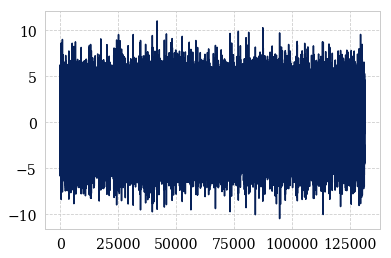

In [83]:
i = 0
plt.plot(filtered_signals[i][0:(len(filtered_signals[0])//2)])
use_signal = filtered_signals[i][0:(len(filtered_signals[0])//2)]

### Optimal bandwidth (filtered raw)

In [84]:
# Finding the optimal bandwidth by taking the mean from the SK
fc_and_bw_path = '/Volumes/OsvikExtra/signal_data/raw_filtered_6000Hz/gearbox/wt04/center_frequencies_&_bandwidth/fc_and_bw_data.csv'
# Finding the optimal bandwidth by taking the mean from the SK
fc_and_bw_data = pd.read_csv(fc_and_bw_path)
fc_and_bw_data

,File,Frequencies,Bandwidths
0,filtered_raw_6000_0.csv,9600.036621,6400.024414
1,filtered_raw_6000_1.csv,5975.022793,50.000191
2,filtered_raw_6000_10.csv,9600.036621,6400.024414
3,filtered_raw_6000_100.csv,9600.036621,6400.024414
4,filtered_raw_6000_101.csv,9600.036621,6400.024414
5,filtered_raw_6000_102.csv,8925.034046,50.000191
6,filtered_raw_6000_103.csv,8675.033093,50.000191
7,filtered_raw_6000_104.csv,5525.021076,50.000191
8,filtered_raw_6000_105.csv,9600.036621,6400.024414
9,filtered_raw_6000_106.csv,9600.036621,6400.024414


Before filter shape: (424, 9)
After filtering: (322, 9)


,Unnamed: 0,AvgPower,ActPower,WindSpeed,NacelleDirection,AvgSpeed,File,Frequencies,Bandwidths
1,1,2697.461426,2332.100098,9.100000,256.100006,1456.464986,6000,9600.036621,6400.024414
2,2,2606.151855,2843.500000,10.000000,240.199997,1468.503663,6000,5675.021648,50.000191
3,3,2541.849854,2694.100098,10.500000,71.099998,1458.875183,6000,9600.036621,6400.024414
4,4,2853.304199,3293.399902,12.700000,269.399994,1460.635409,6000,9600.036621,6400.024414
6,6,2752.077881,3040.300049,9.700000,143.899994,1490.140485,6000,6075.023174,50.000191
7,7,558.968140,-1000.000000,-10.000000,-500.000000,1485.840981,6000,9600.036621,6400.024414
8,8,3301.744629,3325.800049,14.700000,264.899994,1482.815723,6000,9600.036621,6400.024414
9,9,3034.307373,2961.899902,10.500000,301.600006,1486.301831,6000,9600.036621,6400.024414
10,10,2509.034180,2320.300049,9.400000,137.000000,1456.406440,6000,12300.046921,66.666921
12,12,3224.229492,3260.399902,13.500000,249.500000,1479.297918,6000,9600.036621,6400.024414


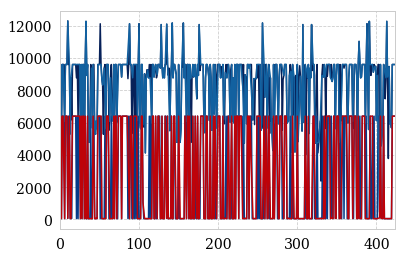

In [85]:
# Make the file column to an int
fc_and_bw_data['File']=fc_and_bw_data['File'].apply(lambda x: int((str(x).split('_'))[2].split('.csv')[0]))
# Sort the df based on this
fc_and_bw_data=fc_and_bw_data.sort_values('File',ascending=True)
fc_and_bw_data = fc_and_bw_data.reset_index(drop=True)

# How the frequencies and bandwidths vary across the intervals for wt4:
fc_and_bw_data['Frequencies'].plot()
fc_and_bw_data['Bandwidths'].plot()

op_data_intervals
concated = pd.concat([op_data_intervals, fc_and_bw_data],axis=1)

print(f"Before filter shape: {concated.shape}")
filter_concated = concated.loc[(concated['AvgSpeed'] >= 1400)]
print(f"After filtering: {filter_concated.shape}")
mean_freq = filter_concated['Frequencies'].mean()
mean_bw = filter_concated['Bandwidths'].mean()
filter_concated['Frequencies'].plot()
filter_concated['Bandwidths'].plot()
filter_concated

In [86]:
# Doing some filtering
# Removing outliers:
print(f'Shape before filtering {filter_concated.shape}')
filter_concated = filter_concated.loc[(filter_concated['Frequencies'] < 10000)]
print(f'Shape after filtering {filter_concated.shape}')

# Filtering away the ones below 6000Hz
print(f'Shape before filtering {filter_concated.shape}')
filter_concated = filter_concated.loc[(filter_concated['Frequencies'] > 7000 )]
print(f'Shape after filtering {filter_concated.shape}')

filter_concated

Shape before filtering (322, 9)
Shape after filtering (306, 9)
Shape before filtering (306, 9)
Shape after filtering (222, 9)


,Unnamed: 0,AvgPower,ActPower,WindSpeed,NacelleDirection,AvgSpeed,File,Frequencies,Bandwidths
1,1,2697.461426,2332.100098,9.100000,256.100006,1456.464986,6000,9600.036621,6400.024414
3,3,2541.849854,2694.100098,10.500000,71.099998,1458.875183,6000,9600.036621,6400.024414
4,4,2853.304199,3293.399902,12.700000,269.399994,1460.635409,6000,9600.036621,6400.024414
7,7,558.968140,-1000.000000,-10.000000,-500.000000,1485.840981,6000,9600.036621,6400.024414
8,8,3301.744629,3325.800049,14.700000,264.899994,1482.815723,6000,9600.036621,6400.024414
9,9,3034.307373,2961.899902,10.500000,301.600006,1486.301831,6000,9600.036621,6400.024414
12,12,3224.229492,3260.399902,13.500000,249.500000,1479.297918,6000,9600.036621,6400.024414
14,14,2993.638428,3313.600098,10.800000,272.600006,1483.000272,6000,8775.033474,50.000191
16,16,2523.422119,2458.800049,10.000000,163.300003,1446.104496,6000,9600.036621,6400.024414
18,18,2549.238037,2449.399902,8.700000,120.800003,1466.408252,6000,9600.036621,6400.024414


Before filter shape: (424, 9)
After filtering: (222, 9)


222

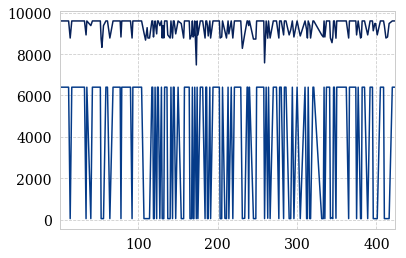

In [87]:
# Finding the average optimal now.
op_data_intervals
concated = pd.concat([op_data_intervals, fc_and_bw_data],axis=1)
print(f"Before filter shape: {concated.shape}")
filter_concated = filter_concated.loc[(filter_concated['AvgSpeed'] >= 1400)]
print(f"After filtering: {filter_concated.shape}")
mean_freq = filter_concated['Frequencies'].mean()
mean_bw = filter_concated['Bandwidths'].mean()
filter_concated['Frequencies'].plot()
filter_concated['Bandwidths'].plot()
len(filter_concated)


In [88]:
print(int(round(mean_freq)))
print(int(round(mean_bw))) # set this to 500?

9338
4055


In [90]:
np.asarray(filter_concated).shape

(222, 9)

## 2. Resampled signal

### Reading from file

In [ ]:
# The resampled signal is filtered (Lowcut at 200 Hz (highpass))
filtered_resampled_path = '/Volumes/OsvikExtra/signal_data/resampled_filtered_2000Hz/gearbox/wt04/filtered_resampled/'

num_csvs = len([f for f in os.listdir(filtered_resampled_path) 
     if f.endswith('.csv') and os.path.isfile(os.path.join(filtered_resampled_path, f)) and f[0]=='f'])

filtered_resampled_signals = []
resample_freqs = []
columns = []
for i in range(num_csvs):
    acc=pd.read_csv(filtered_resampled_path+'filtered_resampled_'+str(i)+'.csv')
    columns.append('filtered_resampled_' + str(i))
    filtered_resampled_signals.append(acc.values)
    resample_freqs.append(acc.shape[0] / times[i][-1])

In [ ]:
resample_freqs
resample_freqs = pd.DataFrame(resample_freqs,columns)

## 3. Filtered, resampled signal with optimal bandpass based on SK

# Read kurtogram data

In [ ]:
'''
fc_and_bw_path = '/Volumes/OsvikExtra/signal_data/resampled_filtered_2000Hz/gearbox/wt04/center_frequencies_&_bandwidth/fc_and_bw_data.csv';
frequencies_path = '/Volumes/OsvikExtra/signal_data/resampled_filtered_2000Hz/gearbox/wt04/center_frequencies_&_bandwidth/frequencies.csv';
file_names_path = '/Volumes/OsvikExtra/signal_data/resampled_filtered_2000Hz/gearbox/wt04/center_frequencies_&_bandwidth/file_name.txt';

fc_and_bw = pd.read_csv(fc_and_bw_path)
frequencies = pd.read_csv(frequencies_path)
file_names = pd.read_csv(file_names_path, header=None)

frequencies_numpy = np.asarray(frequencies).T
frequencies = pd.DataFrame(frequencies_numpy, columns= frequencies_numpy[0])
frequencies = frequencies.drop(frequencies.index[0]).reset_index(drop=True)
'''

In [ ]:
'''
kurt_path = '/Volumes/OsvikExtra/signal_data/resampled_filtered_2000Hz/gearbox/wt04/kurtograms/';
kurt_file = f'{kurt_path}kgram_filtered_resampled_1.csv'
kurtogram = pd.read_csv(kurt_file, header=None)
plotting_methods.plot_kurtogram(kurtogram, frequencies['filtered_resampled_1.csv'])
'''

In [ ]:
'''
# Finding the optimal bandwidth by taking the mean from the SK
fc_and_bw_data = '/Volumes/OsvikExtra/signal_data/resampled_filtered_2000Hz/gearbox/wt04/center_frequencies_&_bandwidth/fc_and_bw_data.csv'
fc_and_bw_data = pd.read_csv(fc_and_bw_data)
# Make the file column to an int
fc_and_bw_data['File']=fc_and_bw_data['File'].apply(lambda x: int((str(x).split('_'))[2].split('.csv')[0]))
# Sort the df based on this
fc_and_bw_data=fc_and_bw_data.sort_values('File',ascending=True)
fc_and_bw_data = fc_and_bw_data.reset_index(drop=True)
'''

In [ ]:
'''
# How the frequencies and bandwidths vary across the intervals for wt4:
fc_and_bw_data['Frequencies'].plot()
fc_and_bw_data['Bandwidths'].plot()
'''

In [ ]:
'''
op_data_intervals
concated = pd.concat([op_data_intervals, fc_and_bw_data],axis=1)
print(f"Before filter shape: {concated.shape}")
filter_concated = concated.loc[(concated['AvgSpeed'] >= 1400)]
print(f"After filtering: {filter_concated.shape}")
mean_freq = filter_concated['Frequencies'].mean()
mean_bw = filter_concated['Bandwidths'].mean()
filter_concated['Frequencies'].plot()
filter_concated['Bandwidths'].plot()
filter_concated
'''

In [ ]:
'''
filter_concated = concated.loc[(concated['Frequencies'] > 18000)]
filter_concated
'''

In [ ]:
'''
# Remove higher peaks than 15000 Hz.
filter_concated = filter_concated.loc[(filter_concated['Frequencies'] <= 15000)]
'''

In [ ]:
'''
print(mean_freq)
print(mean_bw)
optimal_bandpass = {'highcut':mean_freq-mean_bw/2,'lowcut':mean_freq+mean_bw/2}
'''

In [ ]:
'''print(f'Low: {round(int(optimal_bandpass["highcut"]))}, High: {int(round(optimal_bandpass["lowcut"]))}')'''


In [ ]:
#resample_freqs=resample_freqs.rename(columns={0:'ResampleFreq'})

In [21]:
signal = filtered_resampled_csvs[1]
signal = filtered_resampled_csvs[1]
plt.plot(signal)
signal = np.array(signal)
signal.shape

NameError: name 'filtered_resampled_csvs' is not defined

In [ ]:
'''
# Perform bandpass filtering

optimal_bandpass_signals = []
i=1

low = round(int(optimal_bandpass["highcut"]))
high = round(int(optimal_bandpass["lowcut"]))
fs_resample = resample_freqs['ResampleFreq'].iloc[i]
signal = filtered_resampled_csvs[i]
y = filters.butter_bandpass_filter(signal,low,high,fs_resample)
optimal_bandpass.append(y)

plt.plot(signal)
plt.margins(0)
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()
plt.title('Resampled signal with highpass filtering')
plt.plot(y)
plt.xlabel("Samples")
plt.margins(0)
plt.ylabel("Amplitude")
plt.title(f'Interval {i} from WT04 filtered with average optimal bandpass from SK \n Component: Gearbox')
plt.title(f'Interval {i} from WT04 filtered with average optimal bandpass from SK \n Component: Gearbox')
'''

## Bandpass on raw signal with results from the spectral kurtosis

In [73]:
np.asarray(filtered_signals).shape

(424, 262143)

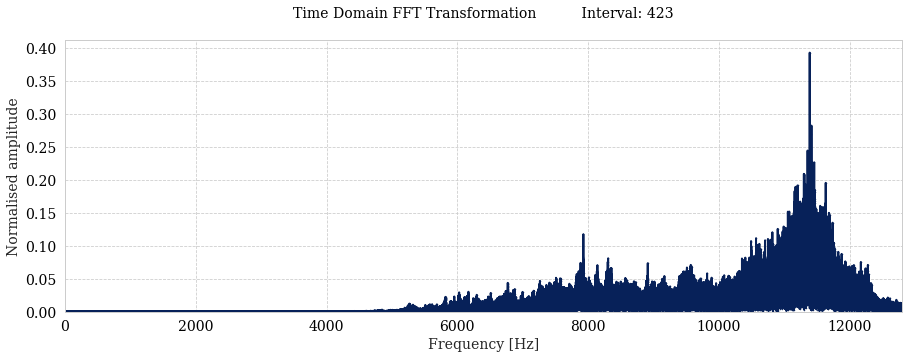

[array([-4.57777821e+00,  6.23560111e+00, -5.30728750e+00, ...,
         7.92317555e-01, -6.30238488e-01,  3.89325714e-04]),
 array([ 1.20317167e+00,  4.57116881e-01,  1.50268513e+00, ...,
        -1.19551097e+01,  1.33247075e+01, -6.10191483e-03]),
 array([ 1.46732061e+01, -7.92884955e+00, -8.37618139e+00, ...,
        -1.72580956e+01,  1.61627542e+01, -7.48026389e-03]),
 array([-1.22136100e+01,  1.56610476e+01, -1.47352757e+01, ...,
        -1.15417916e+01,  7.32931561e+00, -1.01113354e-02]),
 array([-2.94830183e-01, -1.18924156e+00,  2.29666473e+00, ...,
        -2.38299895e+01,  1.88837006e+01,  1.72635663e-02]),
 array([-1.1433978 ,  1.60664482, -0.97497593, ..., -1.03694865,
         0.78045079, -0.00399829]),
 array([  2.07418672,   4.36904712, -12.4083302 , ..., -10.42331396,
          8.57480328,   0.02501039]),
 array([-1.78219538e+01,  1.95001607e+01, -1.12606882e+01, ...,
        -2.05453939e+01,  1.77692957e+01,  8.99854007e-03]),
 array([-3.12370452e+00,  1.09336187e+01, 

In [74]:
plotting_methods.plot_fft(times[i], filtered_signals[i], interval_num=i)
filtered_signals

In [92]:
# Perform bandpass filtering on the raw signal!
def filter_based_on_optimal_bw(low,high,sig,time,plot=False):
    use_signal = sig
    signal = use_signal
    fs, _, _, _ =  envelope.get_sampling_freq(signal, time)

    #### Hardcoding the filters
    y = filters.butter_bandpass_filter(signal,low,high,fs)
    if plot:
        plt.plot(signal)
        plt.margins(0)
        plt.xlabel("Samples")
        plt.ylabel("Amplitude")
        plt.show()
        plt.title('Resampled signal with highpass filtering')
        plt.plot(y)
        plt.xlabel("Samples")
        plt.margins(0)
        plt.ylabel("Amplitude")
        plt.title(f'Interval {i} from WT04 filtered with average optimal bandpass from SK \n Component: Gearbox')
    return y

# Just loop through
optimal_bandpass_signals = []
signal_size = len(filtered_signals)
for i in range(len(filtered_signals)):
    use_signal = filtered_signals[i][0:(len(filtered_signals[i])//2)]
    time = times[i][0:(len(filtered_signals[i])//2)]
    low = mean_freq - mean_bw/2
    high = mean_freq + mean_bw/2
    y = filter_based_on_optimal_bw(low,high,use_signal, time)
    optimal_bandpass_signals.append(y)
    #plotting_methods.plot_fft(time, use_signal, interval_num=i)
    print(f'Filtering {i} / {signal_size} signals', end='\r')
#del filtered_signals

In [97]:
%autoreload
plotting_methods

ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
/Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src


<module 'plotting_methods' from '/Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src/hybrid_analysis_process_functions/plotting_methods.py'>

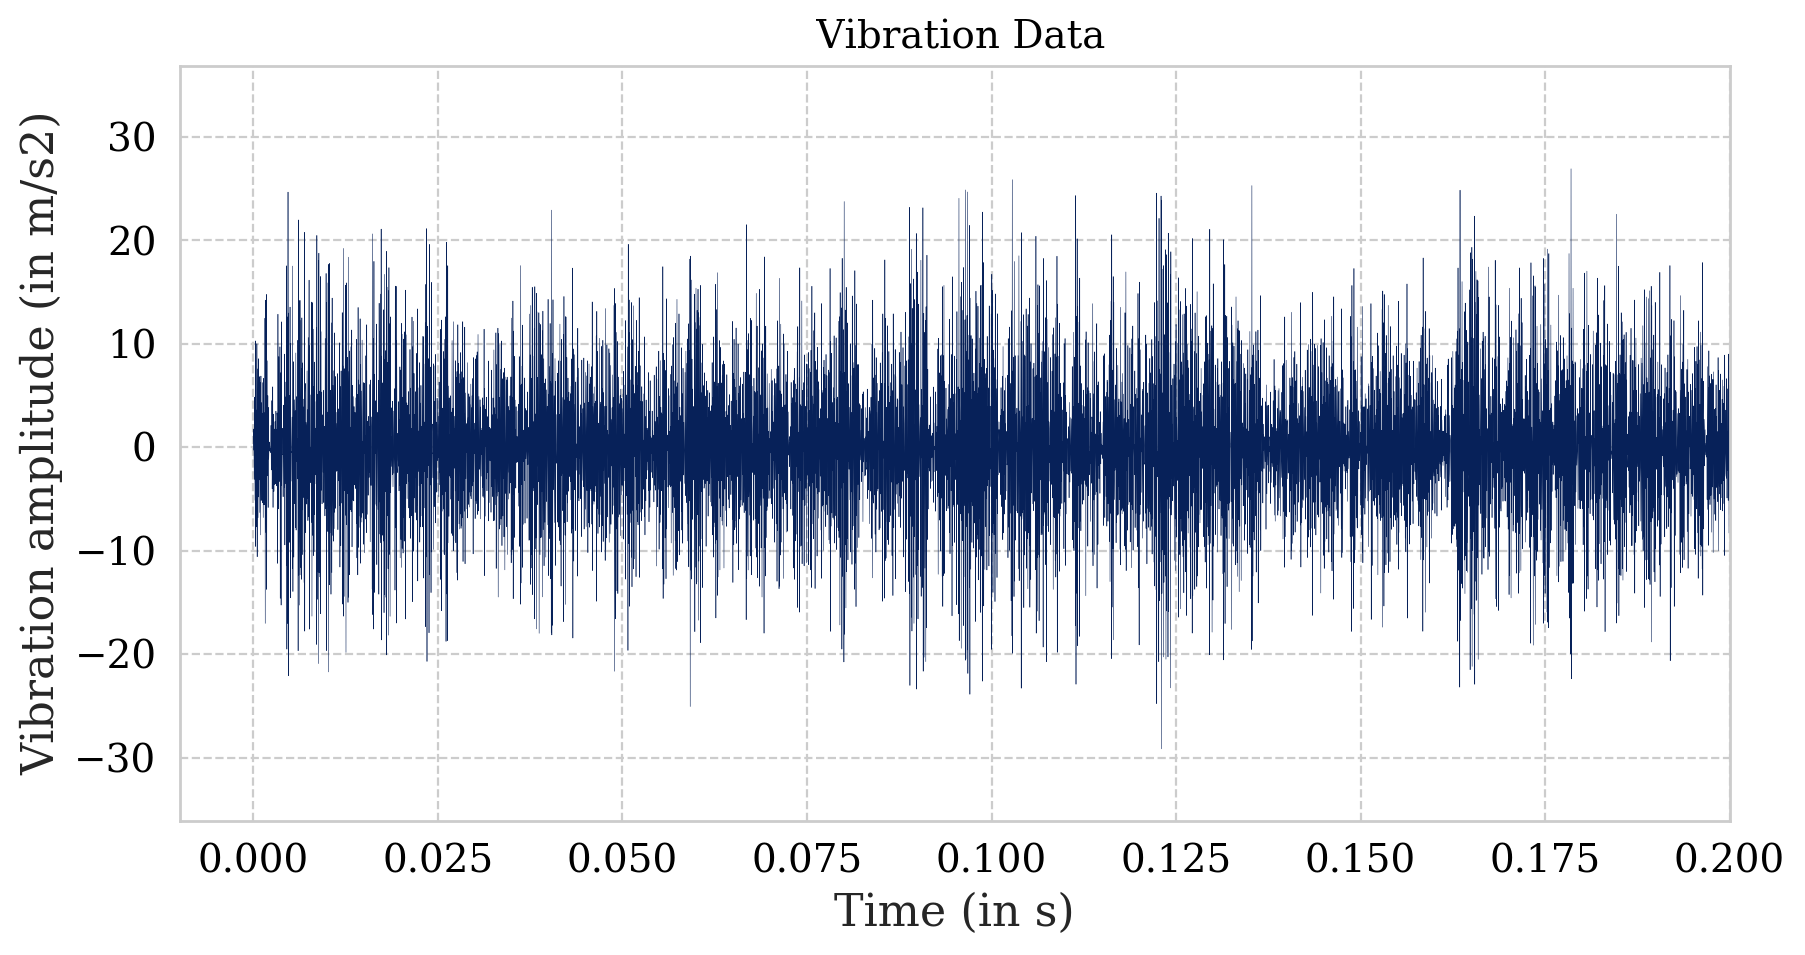

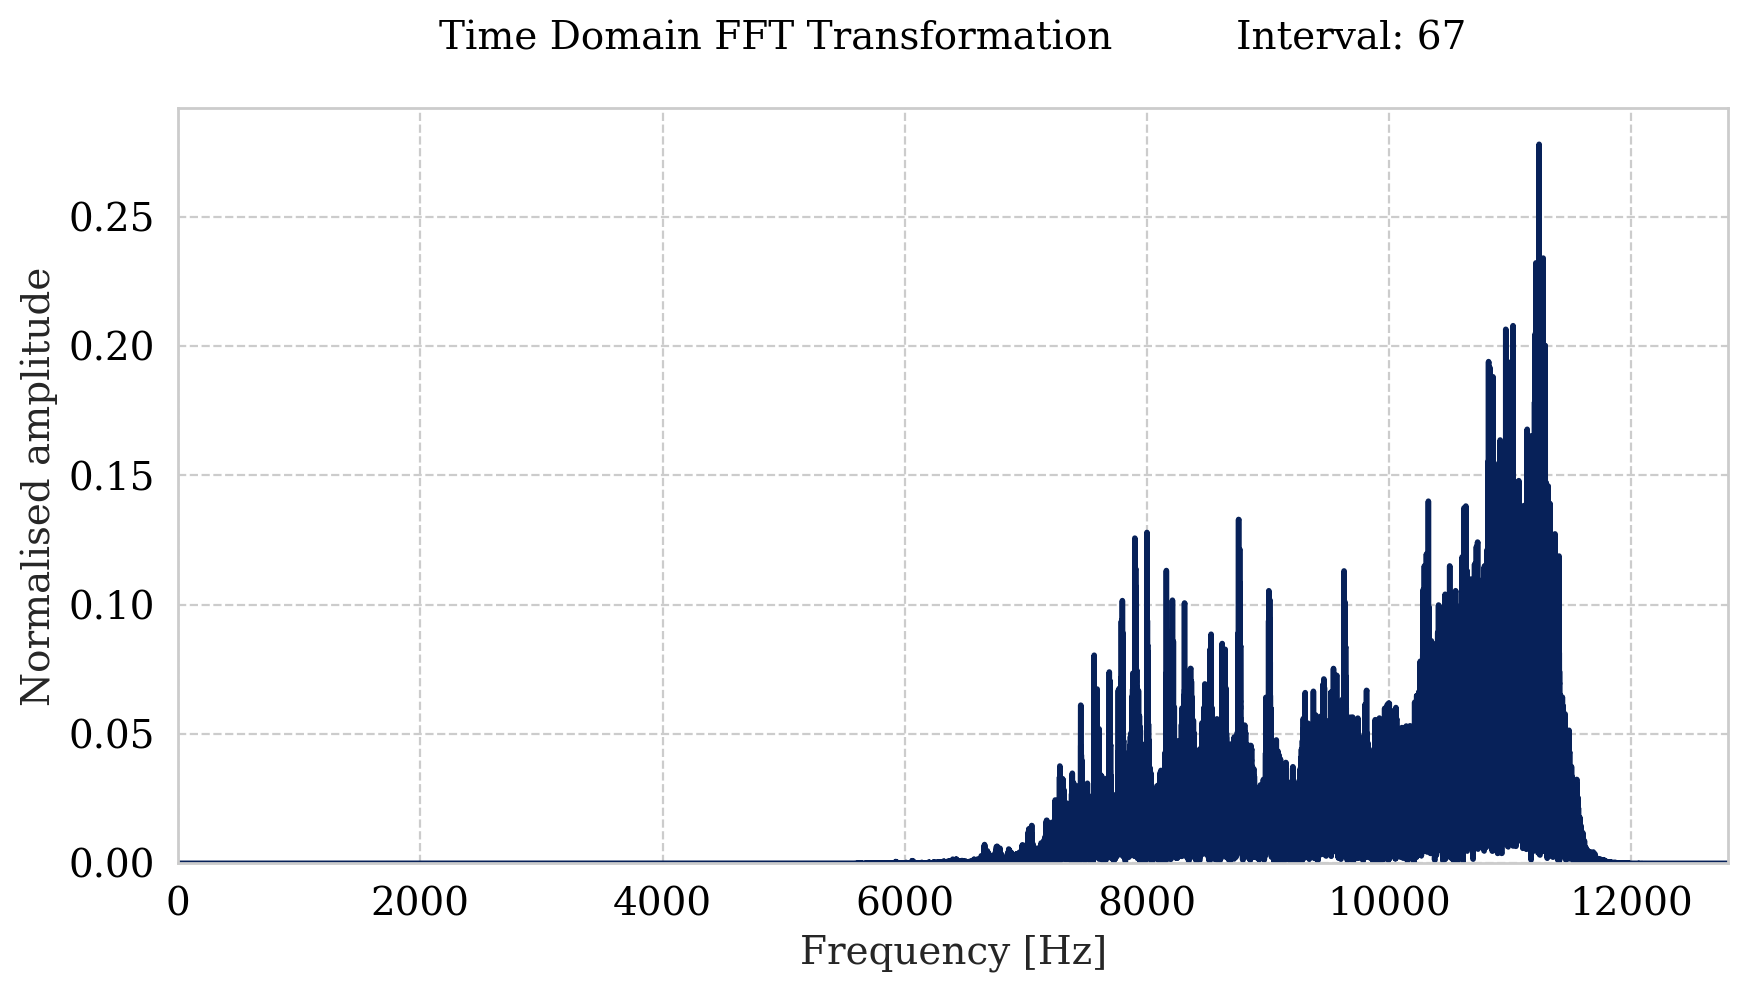

In [101]:
i = 67
plotting_methods.plot_signal(times[i][0:(len(filtered_signals[i])//2)], optimal_bandpass_signals[i], x_min=-0.01, x_max=0.2, name='')
plotting_methods.plot_fft(times[i][0:(len(filtered_signals[i])//2)], optimal_bandpass_signals[i], interval_num=i)

## 4. Demodulasation using EEMD signals

In [94]:
from PyEMD import EEMD
import numpy as np
import pylab as plt

In [95]:
j = 0 # The index in the optimal bandpass array. Which interval is this actually?

#all_eIMFS = []
array_size = len(optimal_bandpass_signals)

for j in range(len(optimal_bandpass_signals)):
    print(f'EEMD of {j+1} / {array_size} signals', end='\r')
    
    signal = (optimal_bandpass_signals[j]).reshape((len((optimal_bandpass_signals[j])), ))[0:20000]
    eIMFs=envelope_emd.eemd('WT04',j,'gearbox',signal,times[j][0:20000],False)
    eIMFs = np.asarray(eIMFs)
    local_path = f"../../../../../../signal_data/raw_filtered_6000Hz/gearbox/wt04/eemd_signals/interval_number_{j}.csv"
    external_path = f"/Volumes/OsvikExtra/signal_data/raw_filtered_6000Hz/gearbox/wt04/eemd_signals/interval_number_{j}.csv"
    np.savetxt(local_path, eIMFs, delimiter=",")
    #all_eIMFS.append(eIMFs)

print(f'Completed EEMD of {j+1} / {array_size} signals', end='\r')

## 5. Selecting IMF: Correlation coefficient

In [106]:
#Load eIMF
i = 67
path = f"../../../../../../signal_data/raw_filtered_6000Hz/gearbox/wt04/eemd_signals/interval_number_{i}.csv"
imf = np.loadtxt(path)

ValueError: could not convert string to float: '2.762362419144045234e+00,4.350607397737296544e+00,3.454353544174710411e+00,-4.911299218194288052e+00,5.761625801201756047e+00,-3.577950376051205250e+00,-6.071973357500724866e+00,7.408997925070483603e+00,-7.250223837755917167e+00,3.080146516504669751e+00,6.644563371818105857e+00,-8.888749587415297526e+00,1.062574993647467458e+01,-1.209741927757394109e+01,1.126967229759680045e+01,4.005974855779414590e+00,-9.891527396834220554e+00,7.844139788076754272e+00,-6.611493915813371203e+00,6.246831491185914409e+00,-6.658020903098644361e+00,7.614252214995084422e+00,-8.875650043522457011e+00,1.700475113386082482e+00,9.910659835698107045e+00,-1.021961699649796351e+01,8.556422529503754149e+00,-5.905225743442702679e+00,3.219499621246598053e+00,-1.615712169336458670e+00,1.221542872207975527e+00,-4.398440298764850348e-02,-2.729309814954484104e+00,4.513258675600964054e+00,-5.216619177407422647e+00,5.022404257746926781e+00,-4.768237856361904115e+00,3.420560553595595188e+00,5.091325127391773009e+00,-1.014097296484339772e+01,1.428867858516855627e+01,-1.753334893366127645e+01,1.896388066501520697e+01,-7.728706544303244996e+00,-1.659762302892335484e+01,1.599574903395074621e+01,-1.368548273408305427e+01,1.105191690473498234e+01,-5.575510581381348807e+00,-6.969891651500649488e+00,6.765466050059818492e+00,-6.412863444232232091e+00,5.991714370953108215e+00,-4.872565666665593653e+00,3.187602658865734018e+00,-1.847743105842824418e+00,1.410430123305145056e+00,-1.874854399333940380e+00,1.005243562378679512e+00,3.448744864317251135e+00,-4.965570355487728627e+00,5.332532427085997284e+00,-4.668401398957488624e+00,-2.068502973035216908e+00,5.105145267818041788e+00,-3.502356842782393009e+00,-4.698687868434843651e+00,6.376906062285468302e+00,-6.625549367552899582e+00,4.375487206854760558e+00,5.293971676314685126e+00,-4.071161742175832821e+00,-3.417366263933404813e+00,4.773958850762657136e+00,-5.325778300470464188e+00,4.253020290568385597e+00,5.207030990540192583e+00,-5.595172571467929679e+00,4.072586442012664065e+00,-2.880753797016061490e+00,2.838334974235471542e+00,-4.159662275000260756e+00,7.131458847030254233e+00,7.169563814177803529e+00,-1.123406691181892469e+01,1.141847294218407427e+01,-7.015891828262841301e+00,-7.867370079994762122e+00,5.269680014593984829e+00,-3.116047289171337553e+00,2.232190436388689747e+00,-2.774383234512102892e+00,5.230404546927844400e+00,-9.328937991088530168e+00,1.226627330739668231e+01,9.833811760618111464e+00,-1.438609967948794477e+01,1.139925056269211368e+01,-7.660301921437016048e+00,4.804452398008052683e+00,-3.488482261909078286e+00,3.227961589301667100e+00,7.805153231697928851e-01,-4.767568900175819024e+00,6.417225825976633047e+00,-5.103554977511223001e+00,-8.268013489925799320e+00,-5.495214956224003799e+00,8.011144889491790266e+00,-6.735961133921973598e+00,5.476657986336654460e+00,-5.107584419688922850e+00,1.312500432837698350e+00,7.635057018059339562e+00,-1.276417085106588090e+01,1.673456492837088305e+01,-1.970600397083393318e+01,1.998731934578728442e+01,9.869585373816782692e+00,-2.353949690319132415e+01,2.329745800628761287e+01,-2.053561940701051824e+01,1.434778001583390328e+01,-3.261036060107747603e-01,-7.251248510248498924e+00,5.321646036131244095e+00,-6.267439001098637164e+00,8.753028236734165191e+00,-1.096611948242090939e+01,1.175525920883135100e+01,-1.061474963627484414e+01,-1.914495573251798755e+00,3.370650562627287794e+00,5.734091882890261616e+00,8.765894086224655268e+00,-1.146600394984787030e+01,1.253778911192146595e+01,-1.241694268846892868e+01,3.244409911567724958e+00,9.507648934924446849e+00,-6.110577428746342576e+00,1.957300608189463276e+00,2.953358288930877151e+00,-3.035016112291108570e+00,9.983957774706755384e-01,5.094833580280305085e+00,-8.048846699137120808e+00,9.209450425671095175e+00,-8.305087850135585370e+00,5.386397385158833373e+00,-1.722072189529861852e+00,-8.665227750815902574e-01,1.741344517651271184e+00,-4.694898949686945322e+00,1.030809964233491627e+01,-1.575864637653746669e+01,1.871302463456522602e+01,-1.767405158471912330e+01,-2.462322734038876249e+00,1.557934112177697905e+01,-1.399323414041631608e+01,1.292034854458538362e+01,-1.239813026565048659e+01,1.245562709065157136e+01,-1.310924869523612379e+01,6.676133850737040909e+00,1.309655149530454388e+01,-1.498251367951927016e+01,1.357310855438506536e+01,-1.068045553254100533e+01,6.910618550393030191e+00,-3.754136677353239193e+00,2.548552401696191350e+00,-3.448708322456050634e+00,4.546041939368152818e+00,8.519857473769461009e+00,-1.576735945168274533e+01,1.809044977646772523e+01,-1.619735987452484594e+01,4.046823294396175719e+00,9.820847500171337785e+00,-5.445116836857902598e+00,2.545485874105567703e+00,3.806177742798071417e+00,-2.219912470037970209e+00,-5.603757854868100630e+00,7.130878527499365127e+00,-6.620414728852548336e+00,5.736348994478122520e+00,-5.700170159798179981e+00,7.303784776298015480e+00,-7.185121724407355970e+00,-9.844390321157900914e+00,1.478002523080332864e+01,-1.470357970817356552e+01,1.133982170646731191e+01,2.348472801646407149e+00,-6.789389675876578600e+00,-5.174294979294189467e+00,7.178679635827196925e+00,-6.351129020670773784e+00,-8.562254930521824292e+00,1.417217404056282426e+01,-1.586791919497226822e+01,1.569628291175559021e+01,-1.295312422624626336e+01,-2.477888435563075031e+00,1.094378712906384798e+01,-9.743793474020433720e+00,8.946529902454237515e+00,-8.195375332425546944e+00,7.201343112159666937e+00,-5.870758888163624789e+00,4.406603962347660719e+00,-3.387125680279723827e+00,3.447323662721621051e+00,-2.762375289286638225e+00,-5.708884260062983884e+00,1.130595556427070569e+01,-1.476225392127231117e+01,1.591059983244123543e+01,-1.510292766182417878e+01,1.306616658794407115e+01,9.873751284940509576e-01,-1.377175049634995929e+01,1.575471960401129934e+01,-1.619641982549097392e+01,1.513750761359574959e+01,-1.272663722026354272e+01,7.382661032919058952e-01,1.211932741595692775e+01,-1.464240574176892018e+01,1.631368288518531529e+01,-1.639165784601617304e+01,1.407578763780096409e+01,-5.052581097934919718e+00,-9.154502324852364481e+00,7.778196463456084508e+00,-7.052040034516234179e+00,6.566167865607139831e+00,-3.173901727883844170e+00,-5.820164086052499464e+00,-5.658315169103160791e+00,6.332069724949792366e+00,-6.601995329609360752e+00,4.509557171320524027e+00,6.831248085198281750e+00,6.492163637134965803e+00,-7.796027811309158118e+00,9.162313108283138163e+00,-1.041475932976195473e+01,-9.073645624546852417e+00,1.539878560975942534e+01,-1.580643867773822464e+01,1.399560383267705532e+01,-1.073790516395888694e+01,2.977213146858958215e+00,8.053684754475741059e+00,-1.118347203139806645e+01,1.487162735687008386e+01,-1.828135708218951905e+01,1.932969634425541017e+01,-3.853440531932978530e+00,-1.673208856824754420e+01,1.506492480942505985e+01,-1.161313423798446820e+01,-4.556187126748515226e+00,8.722982080872259125e-01,1.071085755331285583e+01,-1.110753545850401913e+01,1.044638616651842966e+01,1.855402210549677244e+00,-1.095640942158863851e+01,1.099536323954558448e+01,-9.733475892759059889e+00,4.145150854367122273e-01,8.130946176449663554e+00,-7.827644954678012468e+00,7.999006474740090411e+00,-1.551389518855737615e+00,-9.401346745142971528e+00,1.149323902114919349e+01,-9.211530384679145200e+00,-9.288942501663571605e+00,9.538025071630379159e+00,-7.270497041668715354e+00,4.559073194704122756e+00,1.241207858371638828e+00,-3.772048493544919001e+00,4.196818767812259487e+00,-4.867564808068035376e+00,-2.763828893057418412e+00,6.644830897561977423e+00,-7.282746561762709625e+00,5.275840062964047839e+00,7.657993599720507305e+00,3.154468344501371924e+00,-1.601394704559556015e+00,-8.248376061732990649e+00,9.611502081260452357e+00,-1.019131225443788402e+01,6.537385769421791615e+00,9.020934329710060595e+00,-1.069985472640567181e+01,9.749354178954634520e+00,2.890181032731335975e+00,9.696496683022637342e-02,-1.048812294260095968e+01,1.183177767755523924e+01,-1.309058762578947821e+01,1.367864312228539525e+01,7.660911882374088044e+00,-1.716931617514235242e+01,1.663531390654246422e+01,-1.342562078352737132e+01,8.476767886194911839e+00,-4.542159517743770358e+00,3.449495260897608162e+00,-5.778414172385810232e+00,-5.706042497350835241e+00,1.217377991762085010e+01,-1.339237097586715919e+01,1.036938094493654994e+01,-5.925556736277254544e+00,3.229463043413296042e+00,-4.400476424940318876e-01,-4.701846613915105166e+00,8.904180695466150652e+00,-1.196992579391629796e+01,1.347787504410234050e+01,-1.324177471701129960e+01,8.324238605929238366e-01,1.170518423918283091e+01,-8.694186158397771536e+00,5.040341538775820140e+00,-2.578722075970349081e+00,2.291212683245305914e+00,-4.023613801544929203e+00,7.540659340811125766e+00,-9.621715682038916029e+00,-7.271309682943523534e+00,1.062288233074693444e+01,-8.874607177441166783e+00,5.028376723640800350e+00,5.861457994472107913e+00,-4.479355819001893835e+00,-3.297048797349325433e+00,4.627919831294820874e+00,-4.150549792135919347e+00,3.766220309860953908e+00,-3.477855361849341520e+00,3.023857616562826145e+00,2.644741739780398504e-02,-2.820552388593719595e+00,3.441479333017964493e+00,-4.444761186282566001e+00,5.735170096783081206e+00,-6.778192440326622936e+00,7.533392970020250878e+00,-8.634168778764401253e+00,1.047401653291945145e+01,4.907676910539847448e+00,-1.495276545522680856e+01,1.589667047342482142e+01,-1.383061967487205202e+01,9.978486424648282949e+00,-6.515371092673716724e+00,4.545164882017316721e+00,2.262695695566125376e-01,-6.069982255283366435e+00,8.373329925312541278e+00,-9.133175198762305769e+00,8.553624473354714652e+00,-7.559377780616282294e+00,6.808425559971771790e+00,-6.565960605431887531e-01,-7.425334557307935235e+00,8.634763482361027087e+00,-7.563535961281931286e+00,-4.898639198564084474e+00,-4.887492630559555629e-01,7.614489714577538315e+00,-7.881967132474753335e+00,3.641109382180654386e+00,7.665564180594393484e+00,-8.954994936976957476e+00,8.783752434979540169e+00,-2.021254093771829741e+00,-5.913400673678506081e+00,-8.270075650347164853e+00,1.132589247231179996e+01,5.310087085147428887e+00,-1.374604163689262037e+01,1.257592014866001762e+01,-8.980250396990211215e+00,4.531333285866351979e+00,-1.566991407712779338e+00,6.645685829502451236e-01,-5.774204424490529952e-01,7.182189394189555376e-01,-1.236151303259486633e+00,-4.117271590979505458e-01,3.032006640101049033e+00,-5.562616548948828843e+00,7.747473039351953972e+00,-8.858063393035227051e+00,8.947658675825771013e+00,-3.835251339060066211e+00,-9.488605126160877035e+00,-5.450847158036636664e+00,8.856811806808851273e+00,1.045289952371411424e+01,-1.570019280777994197e+01,1.713924799418777312e+01,-1.773100404545697018e+01,1.291492855615412694e+01,1.452743890970031693e+01,-1.798324978525403495e+01,1.707429029223271755e+01,-1.452724891507025262e+01,7.945035126613525733e+00,5.781101617369801104e+00,-4.925213061145981897e+00,3.910590438965589222e+00,-3.777014660464089513e+00,-5.880480462397600583e+00,-2.140183801394790475e+00,9.069382927585278864e+00,-9.813947111452565153e+00,8.079497595347142180e+00,4.848385872914820816e+00,-3.171518523544171408e+00,-8.953695362665477830e+00,8.158267794409196583e+00,9.642383542000635188e+00,-1.280562509627870682e+01,1.120268203715423816e+01,-8.165284211683427884e+00,6.091678597954922836e+00,-6.521015512064379571e+00,1.012133602449252834e+01,-1.256032924232568604e+01,-1.444690612562360599e+01,1.935404061891814820e+01,-1.508057859320228467e+01,9.150882126520853532e+00,-5.166003832842943844e+00,4.052886597246977196e+00,-4.838167802721966559e+00,7.088647591073896415e+00,-3.515638636562870900e+00,-9.420707136753996735e+00,1.276899048986319762e+01,-1.400185356283548543e+01,1.386331659962950624e+01,-1.207322393725574372e+01,9.456261799571400672e+00,-5.717658338176827115e+00,-5.938938940870901462e+00,1.042299591630387035e+01,-1.459681681311642620e+01,1.809682774390563864e+01,-1.866621530445677379e+01,1.611046011637866116e+01,-1.169676766870202833e+01,8.709676486541580998e-01,9.491743343542795586e+00,-1.226513575997616989e+01,1.569249082916985394e+01,-1.863560671724348694e+01,1.966503827764717371e+01,-1.716360703110416708e+01,-3.222368409561232827e+00,1.442589745494827902e+01,-1.165795236049543604e+01,8.942741414666782518e+00,-3.531336732593254091e+00,-5.194696445940437890e+00,3.375053025653658612e+00,-2.731412491905075957e+00,2.826166955463802921e+00,1.372303188070005175e+00,-4.721727033456715183e+00,5.691683485380128360e+00,-4.893681469584961086e+00,-6.002115812385023785e-01,2.598217108895140015e+00,-1.503718559801768384e+00,1.959126748204596424e+00,-4.483006065714122634e+00,9.046957345220986824e+00,-1.339479977322661597e+01,1.585298026775920377e+01,-1.466048516294129200e+01,-6.083597603124494491e+00,1.443213092425298250e+01,-1.309792940312356713e+01,1.134493062432850508e+01,-4.716400901295684456e+00,-8.409249849354758055e+00,1.430588190296618878e-01,5.073115048588351605e+00,1.622735713587834416e+00,-3.721775389802421508e+00,3.517045028249733640e+00,-3.355822817336951314e+00,3.267295203451886731e+00,-3.712543654993222031e+00,5.132123005208082844e+00,-7.360562331535787983e+00,9.529093579874022168e+00,-2.217007991601520178e+00,-9.729524903140138292e+00,9.314662837972944587e+00,-8.421946931500169597e+00,8.145762220764508399e+00,-8.436449926040266334e+00,3.382630462275398653e+00,8.547792092375141593e+00,-9.811282043873029934e+00,9.982727410611486718e+00,-1.035001765790581807e+01,1.096808940364096330e+01,-1.160941111780071466e+01,1.201274532970638198e+01,-5.036191278274386285e+00,-1.140793208011725923e+01,1.300566422260456001e+01,-1.270649640541220826e+01,1.135422740618015069e+01,-5.840205593612077806e+00,-7.268060176823309071e+00,4.966348417434020668e+00,-3.473022503508863768e+00,2.728455415421712438e+00,-2.594176745982798682e+00,2.951256758464714469e+00,-3.747685416720794915e+00,4.912502537898259192e+00,-6.355991818582301889e+00,7.843758020870573944e+00,2.650019751476577312e+00,-9.873142529763045516e+00,9.696842475345784251e+00,-7.968901833778097910e+00,5.692627043133494880e+00,-3.479640973808743709e+00,-2.255395763958851330e+00,5.655314417584353492e+00,-8.634700701034068615e+00,1.141211683196516802e+01,-1.304838706130796666e+01,1.243896638709465918e+01,4.260021766082726202e+00,-1.315393539518238342e+01,1.302581220931885753e+01,-1.207832806704361239e+01,1.014513885914254132e+01,-6.848104514838121659e+00,-9.327103540866041875e-01,4.566778069567138942e+00,-4.098353248728798803e+00,4.357704189971233433e+00,-4.912871886701051238e+00,5.628036766873793617e+00,-6.637390667116380705e+00,7.979570491514436092e+00,-9.246752142103757066e+00,-1.038370365636939630e+00,1.051264010718046649e+01,-1.054030398842766836e+01,7.237111672036461663e+00,6.406046193946929534e+00,-5.677683808887383776e+00,-3.737198338537742970e+00,2.592857770717812205e+00,3.995820601364926450e+00,-4.755483093229085689e+00,5.412567918959084956e+00,-1.428955619677499733e+00,-6.260427025150602454e+00,7.218942060094374114e+00,-7.254308294800805079e+00,6.728279806700892429e+00,2.668560121524933049e+00,-8.645374763855750544e+00,1.102593739518636973e+01,-1.272546611352050405e+01,-6.732560188034459436e+00,1.527760210263703122e+01,-1.326591372626783283e+01,8.287205969027704455e+00,1.281582745519712851e+00,-4.006184732410343230e+00,3.824629719741263312e+00,-5.856276114322400694e+00,9.357476936599399053e+00,-1.256230132300854585e+01,1.492782680041271526e+01,-4.664249172593383896e+00,-1.626325583002473607e+01,1.900627956426051668e+01,-1.793282326637426749e+01,1.308043510863385350e+01,-5.441641734725849666e+00,9.381882564663895918e-01,-1.016927711498918363e+00,1.865537142653202585e+00,9.237036488777791376e+00,-1.653299794053275562e+01,1.738031862803502392e+01,-1.339154108714494917e+01,4.855808786285009226e+00,6.611143062704964990e+00,-6.596127242930832857e+00,8.652830560169720187e+00,-1.150175694699541040e+01,1.256850799053213841e+01,-1.085061003476082497e+01,4.274963168504614330e+00,6.602317559568862571e+00,7.170413205978418691e-01,-3.571842936440207783e+00,2.766848013905054859e+00,2.913312459544959765e+00,-3.879386398752373122e+00,3.599058814635001990e+00,-3.542471588764493973e+00,4.515983763793384398e+00,-5.385543021810109465e+00,-6.273142844159449005e+00,9.564523353179538390e+00,-8.135851296209580141e+00,4.997539156419193773e+00,-2.462460697205932636e+00,1.692713731875895355e+00,-2.024886649653666382e+00,2.566840515894993402e+00,-2.111427852272092398e+00,1.338865594996393238e+00,-1.310179336598533917e+00,3.475742563309933253e+00,2.600675221905162982e+00,-7.205198499233471665e+00,8.120965900931983228e+00,-7.088841144466794475e+00,5.866808721177914521e+00,-5.935718036562473543e+00,7.706708952424034642e+00,-1.108204469819907168e+01,4.698279749155061857e+00,1.315713159267513177e+01,-1.292362735656525530e+01,9.620167607705530699e+00,-6.255002798029639877e+00,4.448395261998940420e+00,-4.536115509525131095e+00,5.166256240301049907e+00,6.153541194786566138e+00,-1.123262710315715829e+01,1.239221832183873140e+01,-1.174619032098690496e+01,1.041180680135504666e+01,-9.639338958922705203e+00,1.004287244092233955e+01,-1.089305948290676440e+01,-5.761183156576179520e+00,1.463610662954246067e+01,-1.609629070976076903e+01,1.678563828100188005e+01,-1.600561129417809170e+01,-5.846288245813742179e+00,1.778849256352174990e+01,-1.753976989592728941e+01,1.600432379840260566e+01,-1.251456077539003253e+01,-1.368100989457143868e-02,7.715775326446220106e+00,-3.369311431407142621e+00,1.575802634983810790e+00,-1.191461063450532487e+00,6.649168413426513602e-02,3.246789636750458286e+00,-5.477614992141170980e+00,6.543764397216367712e+00,-6.937952442170821854e+00,6.110227504511146712e+00,4.543628457619560024e+00,-7.763015813877103710e+00,8.532708173141370978e+00,-9.582924832096411549e+00,-3.226344921425692847e-01,1.205209758449678326e+01,-1.372957541637476453e+01,1.285413105609270623e+01,-9.030121449624978425e+00,-5.329362810810850393e-01,4.275161386010820408e+00,-3.036414584493803304e+00,3.925384931579589676e+00,-6.283480921195757851e+00,8.772452447598416470e+00,-1.037988670555762560e+01,5.435879760372761993e+00,9.832002767200696880e+00,-1.180174508047058168e+01,1.104633451862103044e+01,7.057625868376238287e+00,-1.345772778367539146e+01,1.332113600245247831e+01,-9.001125013941987163e+00,-9.606803201044497698e+00,8.591798712530669846e+00,-6.500736658607626950e+00,5.246899640125161746e+00,-5.152678561089711451e+00,6.176407969576758639e+00,3.414255268631466222e+00,-9.321253758232266762e+00,9.890318013696971278e+00,-8.671870180234952485e+00,6.933305139122353467e+00,-6.152024248459147415e+00,7.114790078492197800e+00,-6.062245680811241044e+00,-9.404356461072923778e+00,1.328243066293262942e+01,-1.225818527002652303e+01,9.150360802836505769e+00,-5.826859441100688208e+00,3.031703821967882018e+00,2.699108110952636697e+00,-5.259310204185099202e+00,7.380137259897984414e+00,-8.911027676456594548e+00,6.869231980007149296e+00,6.393645428770196482e+00,-6.121427077469243194e+00,4.425889044453540144e+00,-3.774162877510335523e+00,4.303889336712090952e+00,-5.958617934295753926e+00,8.048952693674776171e+00,-9.414588159907445686e+00,1.979697998058477904e+00,8.422995319616573440e+00,-6.094083282436704607e+00,3.561634110105652340e+00,-1.867804387298217073e+00,1.442819273974979222e+00,-2.014641232027569284e+00,3.830288480046196931e+00,-3.220133708009047968e+00,-5.601120484415442746e+00,6.930821791863837511e+00,-6.267807086621136392e+00,5.331439636562609330e+00,-4.765758591359484875e+00,4.923741811701390247e+00,-6.032728370555060060e+00,1.393059451500006984e+00,8.095346215205074358e+00,-9.948158863709972266e+00,9.911052624152254964e+00,-6.204667681033661175e+00,-8.081824857410389029e+00,-1.711809777923085640e+00,5.405509713350635792e+00,4.935246423475731170e+00,-6.586663614400959155e+00,7.512062746867595564e+00,-2.806675330515681299e+00,-7.949416661945378770e+00,8.842881319678552288e+00,-3.036947639201319937e+00,-8.156781778532943505e+00,9.239617658005128575e+00,-3.411651858060033238e+00,-8.633717942016540192e+00,8.268290680775606916e+00,-5.899389285218194168e+00,-1.726092779971083013e+00,4.965117629480747752e+00,-2.164813174995707801e+00,-6.292405041248128050e+00,-4.815630322084190063e+00,8.970132978750170238e+00,-9.970370441971574849e+00,8.011269863492648469e+00,4.378548651286681803e+00,-5.853315646270640826e+00,3.595932624427456759e+00,-2.641685200582117421e+00,2.777749861519985597e+00,-4.013118546675156217e+00,6.047136892421415055e+00,-8.066112683046268828e+00,9.570303830224506925e+00,-3.918449943985610417e+00,-9.736022633483001343e+00,1.145970662899048165e+01,-1.179983048888660235e+01,9.011752013537746464e+00,8.013215619887349206e+00,-8.258201737055294700e+00,5.003157425320964968e+00,-2.422891591534132250e+00,1.358790670926570021e+00,-1.487980271939707722e+00,2.617743458175005422e+00,-4.202663435470115338e+00,5.536076959178886092e+00,-6.599251928939910528e+00,7.404551614564033102e+00,9.316840950057447834e-01,-8.474070449820146678e+00,8.451741864488981903e+00,-7.341516433250822260e+00,4.386914351779025445e+00,3.744755655752326717e+00,-5.809605374408856049e-01,-3.966011943316839261e+00,2.489146943107208632e+00,4.298811161560361249e+00,-6.125011756694914489e+00,6.576907838815110097e+00,-5.381790957754516214e+00,-4.076089427470702020e+00,6.655777744620579917e+00,-2.415030819457713473e+00,-8.198465159962404769e+00,5.583588132169614582e+00,9.638423012494200748e+00,-1.044906583803092559e+01,7.989695319008125907e+00,-5.062378094766526004e+00,3.493273993168047653e+00,-3.792256810657381738e+00,4.550194131048048263e+00,6.111203065077838836e+00,-1.010388274838316924e+01,9.526200202589993893e+00,-6.725761635274229988e+00,3.829865924849098047e+00,-2.650917489406873440e+00,3.134469578443831672e+00,-6.317130207293200961e+00,-5.030956109312012536e+00,1.044823789025295291e+01,-1.035474335058316520e+01,7.920919090552161812e+00,-3.769187511375621025e+00,-2.186797818518443126e+00,2.872842933325385317e+00,-3.628476286259632033e+00,5.448481923330341203e+00,-7.925286513950708489e+00,-3.607297733891982272e+00,1.109730098246586927e+01,-1.049547473260860464e+01,-8.179114292814313458e+00,1.192171241437965357e+01,-9.233954025078103811e+00,-1.989984543437711917e+00,6.437327295978779063e+00,-4.426956475002372215e+00,3.690100985323945260e+00,-3.864846240414574918e+00,4.836405045682567128e+00,-6.541182178257522573e+00,-1.162283743960291327e+00,8.787457256125881244e+00,-9.526123644588659900e+00,8.180612332308671242e+00,9.676496101143912121e-01,-6.698388719703973315e+00,2.561142589858719010e+00,5.544789802559422220e+00,-8.192198866684746505e+00,4.817759956904910545e+00,9.834987067443201170e+00,-1.089082723136491104e+01,8.003571039615621885e+00,-3.720114975010873959e+00,8.812343543137279855e-01,-5.456430140485158953e-01,1.199178724835423759e+00,-2.968125160842784105e+00,3.923429172478975602e+00,-3.824527524657794775e+00,3.873282339827711862e+00,-5.053256818402477535e+00,-1.031295019702723054e-01,7.946875088186715175e+00,-9.374996080354549122e+00,8.923678041493532831e+00,-8.338588007550951531e+00,8.319827377397103874e+00,5.562529039096538952e+00,-1.382263109552202351e+01,1.718244626957037724e+01,-1.791831067621485118e+01,1.560188926826823952e+01,-7.184773510859607804e+00,-9.357669866989446916e+00,7.284323128561151606e+00,-6.351985515664341442e+00,5.579406664855963704e+00,7.536914456260649375e-01,-1.727476038046915185e+00,-4.147214792204180434e+00,-1.339045926633215311e+00,1.934888615437132087e+00,3.927140830537026450e-02,-1.322340191808435206e+00,2.014589652626310734e+00,-3.307450101746377324e+00,1.896954108104914050e-01,4.403702274161215513e+00,-4.549446417467492232e+00,4.275383512333802649e+00,-4.490071678204985872e+00,5.607781727245525261e+00,-8.130774623203278040e+00,4.295027680678304982e+00,1.122301904059688304e+01,-1.455699664121221026e+01,1.437426461560760949e+01,-1.244112928839847143e+01,9.340594828751902057e+00,-2.320864787173833932e+00,-6.569268600040046202e+00,7.936448153453277143e+00,-9.529872331724057233e+00,1.042449855531264369e+01,-9.233241118185423701e+00,5.920665380578851611e+00,-1.007726253056094867e+00,-2.149947989653467673e+00,1.774299560805539189e+00,-2.921944992378621819e+00,4.900836748432324974e+00,-6.062144044136470455e+00,4.165905492280155720e+00,3.425548842377795111e+00,-2.746509799126463314e+00,2.021772277333723888e+00,-2.234276068319439368e+00,3.168628024679286614e+00,-4.373825553776039321e+00,5.500949702115637940e+00,-5.917803208449982755e+00,-4.373465081988753944e+00,3.543945975875373744e+00,9.155173230006546703e+00,6.519880201714769008e+00,-1.046385914476774381e+01,1.119379152046295722e+01,-1.058181142582942158e+01,-5.986233039819421897e+00,1.241674586527483193e+01,-1.213724865473894177e+01,1.125851332046173603e+01,-1.067037946579977614e+01,1.107227166063363200e+01,-2.512634875311405280e-01,-1.424991751015167196e+01,1.641444458918682869e+01,-1.444308507285055576e+01,9.394242073372911506e+00,-4.548900591773348268e+00,2.733924482100178022e+00,-1.167052628584840823e+00,-5.607291117590017748e+00,1.096543327992925221e+01,-1.317811927107239001e+01,1.225595457818215195e+01,-9.911864294712499301e+00,4.149734014132815396e+00,8.002850533213639039e+00,-1.185982849448610743e+01,1.457297462352001993e+01,-1.542967122972407701e+01,1.294048673556532769e+01,-2.657167813302661052e+00,-7.482333687965063262e+00,5.196567812468813052e+00,-4.661269696646809457e+00,-4.493154707862855979e+00,-2.962413208574819379e+00,1.164195392686267638e+01,-1.436352106190377320e+01,1.344757059988749148e+01,5.987879599441223277e+00,-1.222252020966000607e+01,9.344051370784740129e+00,-7.131108415846557413e+00,5.996995759256036784e+00,-6.118966478070932524e+00,7.256238634641364094e+00,-8.269440573304757791e+00,-4.581810392188287118e+00,9.871765444281072277e+00,-8.984265337314841560e+00,7.362691454380783540e+00,-4.643407935297363842e+00,-3.256278157997775313e+00,5.204008135464719409e+00,-5.941763773587580566e+00,6.905145182947154403e+00,1.708071810855841699e+00,-8.651108498076757414e+00,9.397106764063921647e-01,7.709209675901973924e+00,-6.426007038972793239e+00,3.210770871313457064e+00,4.033470799455926681e+00,-4.734014799488985403e+00,-1.099062264510311859e+00,7.959409748340251944e+00,-1.896025436426213906e+00,-1.086119265971160353e+01,1.258100995528784516e+01,-1.154699906373937424e+01,4.388884912438978603e+00,8.305328780385620391e+00,-8.108092527323291776e+00,8.186974019542645920e+00,-8.728651982481183680e+00,9.451157000869072178e+00,-1.064205370361183967e+01,1.279132606220811752e+01,1.448636824993076111e+00,-1.722789081216063067e+01,2.020201377857416958e+01,-2.031126007866849648e+01,8.492754311922427135e+00,1.636945268628739925e+01,-1.398820532451085441e+01,1.001599112843016393e+01,-5.617667733603359359e+00,2.074396250326915325e+00,-9.141846414196378445e-01,1.030539395356451671e+00,-5.232793521717039376e+00,-2.294697022773052097e+00,1.037393595916321765e+01,-1.170115150292306438e+01,9.823659224710583615e+00,-5.583017532261236315e-01,-6.112196574176018693e+00,-2.808858675011771666e+00,4.110067447060163914e+00,3.012103960808279801e+00,-6.225842430032608732e+00,7.819683599321288092e+00,1.041339828328303518e+00,-8.709792974875428584e+00,8.450853166450761123e+00,-7.809865457129681054e+00,2.030785468290359219e+00,8.163842596935630525e+00,-1.102106341351396424e+01,1.300535875072053216e+01,-1.419488630267338891e+01,4.870773874913868262e+00,1.285450897510563628e+01,-1.155551216342686516e+01,8.960618410855911264e+00,-5.583924526966153934e+00,-5.693924952676082896e+00,-3.128479480247337463e+00,5.796928623996690177e+00,-8.857967154404262189e+00,-2.706040429399246161e+00,1.408056514610028209e+01,-1.617931723245556341e+01,1.505452379723766576e+01,-1.095399196362987304e+01,-1.578830968804206591e+00,8.364165194857690722e+00,-9.295417367487623039e+00,1.170756475929251295e+01,-1.433585453167901314e+01,1.530078059388280742e+01,-1.154001512840338961e+01,-6.322437245217815693e+00,7.998531943646648656e+00,-4.907921685194151173e+00,3.632108812413833210e+00,-3.548951981831712121e+00,4.286488116171828011e+00,-5.419899628506867906e+00,3.729380081151138615e+00,5.755055058206481888e+00,-6.721418917731740272e+00,-1.576287274048875364e+00,4.765072149104624621e+00,4.955062060484763720e+00,-4.609384688625299376e+00,3.840859855168618164e+00,-3.812713012954433989e+00,4.832496785710589826e+00,-6.937575320001162282e+00,1.011275693134825815e+01,-5.515821772586565253e+00,-1.263512420093275246e+01,1.598412469395755053e+01,-1.626184784527459115e+01,1.203093550310174820e+01,1.086216695107896335e+01,-1.269592046718814871e+01,1.006815506879889277e+01,-4.895751961884595715e-01,-7.810977519558341520e+00,1.772105361567386517e+00,4.976298419890043512e+00,-3.175775053668877579e+00,1.738181110713614252e+00,-9.658582307603336137e-01,9.349154355796077676e-01,-3.939543604481134498e+00,-3.573303380138311613e+00,9.176906989326768738e+00,-1.265697506835939024e+01,1.383961263697430155e+01,-7.612446877903264131e+00,-9.931584120742654065e+00,4.995481878965223110e+00,-1.796283222131420665e+00,5.989269112734446621e-01,-5.833010548958346142e-01,1.239460161824641249e+00,-2.253625198062942481e+00,3.291512834389301201e+00,-4.549244569381413861e+00,4.639309071916954075e+00,5.047856125623527923e+00,-7.275796149856545547e+00,7.224278124554683878e+00,-5.862796920823950764e+00,-3.422570161910295283e+00,3.091430321307353069e+00,5.733276419986054862e+00,-6.825541699682577068e+00,1.010107502213314801e+00,7.119364512316534110e+00,-7.837283851114535516e+00,3.170428776858824627e+00,8.327667256727837142e+00,1.503163427288174425e+00,-8.870057866212700759e+00,9.591741952702820484e+00,-5.089357960071819953e+00,-8.563219083019166789e+00,8.990101128753540394e+00,-5.053203840990693863e+00,-7.239617760480160591e+00,2.540728057120354322e+00,6.611272384210407971e+00,-8.048687390132956310e+00,6.584478801810857540e+00,7.384137046683341588e+00,-8.958500947269644854e+00,7.526576728959290641e+00,-5.378433420487453986e+00,2.485900180236710000e+00,2.638762536276834769e+00,-3.116231182978787650e+00,4.623268117780283681e+00,1.687014283128738468e+00,-7.767436520348873330e+00,9.640984728714563801e+00,-8.268798999884864998e+00,-7.558887308542276529e+00,9.762817511552862371e+00,-9.389677577382682827e+00,8.707757271044362923e+00,1.346565960799606110e+00,-9.228957763176596885e+00,9.392745290234726596e+00,-8.629661482554720209e+00,7.123325292185779034e+00,-5.367451358351659430e+00,4.208971758852443124e+00,-4.104623241792633159e+00,5.280809819635517322e+00,-2.988813918521338930e+00,-7.523045126066214117e+00,1.057463407642805997e+01,-1.147971676549420650e+01,1.129678750921468833e+01,-6.101756829476006061e+00,-8.560215066499951675e+00,8.029758945322887698e+00,-6.404363227672998704e+00,-1.723143518330769730e+00,7.127935423185355113e+00,1.984699365386233483e+00,-8.142095505457630722e+00,8.337020519231908011e+00,-7.136433758867529953e+00,1.081266912240640421e+00,5.389997385387399476e+00,-5.946952351657547098e+00,7.182982830975777944e+00,-8.695411826315655901e+00,9.466258481136176073e+00,-9.304272099586544442e+00,7.178814656355256396e+00,5.845366107520236554e+00,-8.864343987750233467e+00,9.045261411984624189e+00,-8.538835330165390758e+00,7.112133818914458949e+00,-5.316228684315429831e+00,4.028286795012770760e+00,-3.491052232192414451e+00,-7.104065034334263729e-01,5.300099572411627769e+00,-7.714996146548818601e+00,9.781058487887237973e+00,-1.149195802651898646e+01,9.088154134400983963e+00,1.025294900650558283e+01,-1.164527521028503720e+01,9.457950922534216431e+00,-6.368315754415451835e+00,3.379111292030249292e+00,-1.858113485892004535e+00,1.879201803134709969e+00,-2.748880813471542339e+00,-4.256384008062623181e+00,9.065692028353735665e+00,-1.176844822482121877e+01,2.352509489750423288e+00,1.218783329551366279e+01,-1.116731773622965385e+01,1.448364602302720794e+00,8.388380592509259159e+00,-6.835736942064728261e+00,5.031504867096320055e+00,2.196070388589847600e+00,-5.011471008592992327e+00,4.469921161186785952e+00,-3.498089385603500912e+00,2.452604747155448184e+00,-2.119093967657923905e+00,3.114512028327926174e+00,-4.197636448123562403e+00,-6.843724056920224008e+00,1.333617262260479208e+01,-1.654368627878331210e+01,1.680965739465129971e+01,8.847411994106884059e-01,-1.518239588995331957e+01,1.230169733651155006e+01,1.720711480488233525e+00,-1.196918646613178439e+01,2.205828249227352433e+00,1.243131327011540321e+01,-1.516660595544702339e+01,4.217247216330446413e+00,1.553586939718063320e+01,-1.565387351021877471e+01,1.093350688519922009e+01,6.375839118549115447e+00,-8.451437595310373752e+00,4.498763133115304846e+00,4.722900263969393997e+00,-5.900165905716977299e+00,5.678418558627364554e+00,5.948042358064992818e+00,-1.001209824851719254e+01,4.244452909338764179e+00,9.572102741415134730e+00,-7.972303614314308007e+00,4.830515403881523895e+00,-2.312996291224267864e+00,1.555973780172044130e+00,-2.407557051734015463e+00,2.225500017203251968e+00,5.583536550696634571e+00,-7.136517554966116172e+00,5.210568890102263317e+00,-2.760544831044031699e+00,2.016230725367873955e+00,-3.636635138622538843e+00,3.029854757856379699e+00,9.614901113211287154e+00,-1.443339385856521595e+01,1.426294454634353315e+01,-8.124092776751004052e+00,-7.011385624084598867e+00,4.906394848497490080e-01,4.276988473824685499e+00,-5.856482185283237385e+00,3.242132654809643633e+00,1.061973313546103981e+01,-1.603185712049555534e+01,1.778434902311708754e+01,-1.643417174975689576e+01,-2.629852682640406503e+00,1.476519232031538564e+01,-1.228509190041174648e+01,9.315473313561227542e+00,-6.406307436055498350e+00,4.786111931649887907e+00,-5.001539756925127200e+00,7.872003812057791095e+00,-9.131202109292216873e-01,-1.283935858632366767e+01,1.514210978157031917e+01,-1.375169778720092673e+01,1.097488502026909174e+01,-8.232192214434952859e+00,1.062719912634377151e+00,8.171119722287359721e+00,-1.125563562834054387e+01,1.320478016963677703e+01,-1.287353020140053772e+01,8.404785750096387176e+00,1.916907642820369517e+00,-2.871970357076671476e+00,1.847702653887352886e+00,-3.217605483579098813e+00,7.240582119420309049e+00,-1.152767427294795866e+01,1.353642218614525561e+01,-1.213172548090604330e+01,-7.033163759831229100e-02,8.866557943895152505e+00,-7.097097474263778238e+00,6.579849424215312936e+00,-7.005983158036872993e+00,8.227616219802930786e+00,-9.404349474969103895e+00,-6.455538687313980617e+00,1.287993563351394144e+01,-1.267370270679409749e+01,4.155010276974263839e+00,8.774805399836138164e+00,-4.198149685416283639e+00,2.126108913361824726e+00,-1.860822851720655757e+00,3.365958583782861613e+00,-6.464425211701837704e+00,8.851162856534958934e+00,1.150726027665882834e+00,-7.813623197726118796e+00,4.799452639123032327e+00,-2.912197186297072804e+00,2.430108876727905542e+00,-3.170237653783869014e+00,5.299562978998831220e+00,4.564131093335946687e+00,-8.487957359899498400e+00,9.465643721721987092e+00,-8.906086919431693616e+00,-1.705682215439773275e+00,7.989093201365562003e+00,-6.101939414225662439e+00,4.121031683764403653e+00,-2.493413354907829671e+00,1.617579152548699106e+00,-1.359949094608241538e+00,1.483164148101395297e+00,-1.910632639501559149e+00,2.685420921804334782e+00,-3.971049532095605183e+00,-5.124688665789953884e-02,5.255597403495240627e+00,-5.374234453166878644e+00,3.719232244607842297e+00,1.825750497330062005e+00,-2.526251556485220373e+00,1.710834025910483502e+00,-1.038891490478121904e+00,-7.952191773472691017e-01,1.172157568855468845e+00,-1.418292801104658718e+00,2.012040901578046714e+00,-2.804228495365691742e+00,3.144454346598359873e+00,-2.696726127438842990e+00,2.078221143894268597e+00,-1.994476467885427207e+00,1.544136814949592651e+00,2.776756239026521467e+00,-4.499862058551729049e+00,4.901610849507902934e+00,-4.668890501521506309e+00,1.086664574980914955e+00,5.246000234615959101e+00,2.480835243725203920e+00,-7.932838493972999672e+00,-5.637301608414421850e+00,1.130468321330183912e+01,-1.215366127173426314e+01,9.778642872297981015e+00,4.223637198065436138e+00,-6.646565267866431981e+00,-1.754797063447026240e+00,3.825559751128598140e+00,-5.300659912326999290e-02,-3.369640821699700250e+00,4.341739281515275550e+00,-5.390747021927100313e+00,6.946140823193641012e+00,-3.772794803386834150e+00,-8.169301839636238682e+00,8.128590459331924478e+00,-5.266749921830865766e+00,2.890978094795287223e+00,-2.558354537072091706e+00,4.103171371145895030e+00,-7.440840979411709633e+00,5.284863640355170311e+00,9.574023375974919148e+00,-1.311111144385197846e+01,1.459200208735616577e+01,-1.512742967166416896e+01,5.739151984552490759e+00,1.242752267543730760e+01,-1.024043372130998186e+01,6.362718259933549447e+00,4.566876035473553586e+00,1.726607741763586334e+00,-7.788984584287810264e+00,9.052378772179965338e+00,5.393484597621523768e+00,-1.161709241666822656e+01,1.135771639176368986e+01,-9.454564670933649495e+00,1.275064473973529955e+00,6.295001233518142669e+00,4.470196273864289971e+00,-1.998475512078838889e+00,-4.113771807091378463e+00,4.524954500979280425e+00,-4.424427227159056564e+00,4.052654869591886921e+00,-3.432146700837966691e+00,1.001475748162492074e+00,2.840407249284622182e+00,-3.499049587832454122e+00,4.316614312023221878e+00,-5.551751682737900317e+00,6.852253817581339668e+00,-7.473826953515868787e+00,6.925173827211924760e+00,-5.043778972588143894e+00,-1.162183300122010543e+00,4.706067151179596841e+00,-6.163757066505350934e+00,8.219184347267637136e+00,-9.770509938123957738e+00,9.761878303864255813e+00,-6.795376637595268221e+00,-4.383317530904036197e+00,6.183624228654176491e+00,-6.241192362057928378e+00,7.375714356369683422e+00,-9.225407768516765472e+00,1.119639249763473110e+01,-1.291070643619855396e+01,1.251406291486478217e+01,8.310922447501612353e+00,-1.456861777973987770e+01,1.327208335976981601e+01,-1.071982555744808252e+01,7.663941153301530917e+00,-5.401397512961922054e+00,3.956720277319054624e+00,3.203130206526985102e+00,-6.866656824016981631e+00,8.744004247164664179e+00,-9.562621016126485074e+00,8.746948403478453926e+00,9.749185947719531953e-01,-2.587178783540933225e+00,-7.023542916569194716e+00,6.537682210511311709e+00,4.937628196344360454e+00,-8.657342255228254402e+00,9.390800340796628731e+00,-9.849887795036719851e+00,8.353676336838923078e+00,7.771766427388534737e+00,-1.087965494567677460e+01,1.070782477302918068e+01,-8.052045759257444146e+00,-5.313212656717889892e+00,4.439744795265820443e+00,5.741758764658536407e+00,-1.855815692677699635e+00,-4.475312939637246856e+00,5.967133222649398050e+00,-5.719893552631374334e+00,-6.463787990390229332e+00,9.811548542100810621e+00,-9.550106776701824174e+00,-2.376898661539478042e+00,9.519509297565035055e+00,3.515383216148583401e+00,-9.911049448148309793e+00,1.040056156436562773e+01,3.659657339731722470e+00,-1.225886309513688133e+01,1.224623257379450969e+01,-1.155467555800684210e+01,1.117041826958325856e+01,-1.382976360706037688e+00,-1.350688304495066205e+01,1.814861844052894924e+01,-2.081803592986169349e+01,2.124292861644698505e+01,-6.301357916297763317e+00,-1.770467617193003562e+01,1.567161191382382412e+01,-1.296975928386859955e+01,1.024484904012146735e+01,-7.196154758764504500e+00,3.960707818997509122e+00,-1.363868070186992520e+00,3.271115185614739684e-01,8.291638188599870229e-01,1.267784043447139686e+00,2.048696916258856859e+00,-7.459756512270010909e+00,1.315106397688675699e+01,-1.737315701668847012e+01,1.759360689495355956e+01,1.391564025520295900e+00,-1.429599580927849978e+01,1.168122534312353622e+01,-1.092264510598912430e+01,1.185859268156272073e+01,-1.367340772888085354e+01,1.529392121222165812e+01,-1.393064502360969570e+01,-9.679474741526398418e+00,1.601523080892093276e+01,-1.531990821517661594e+01,1.399584836879314409e+01,-1.236967728278205669e+01,1.137152893653728114e+01,-1.157838034452005793e+01,8.655748007730749150e-01,1.433316947148461473e+01,-1.626409651676424062e+01,1.483936945870119040e+01,-1.190099487015585744e+01,9.526183342905712337e+00,-8.330826215067451912e+00,-2.204365998024818918e+00,1.088561265493720320e+01,-1.153059842200534391e+01,9.517563435772126823e+00,-6.243666103346869001e+00,3.810684216017648396e+00,-3.039831325209433555e+00,3.545322591879199070e+00,-5.017590215893736882e+00,-4.076768977596128884e+00,7.880849349141388238e+00,-7.505447291601629267e+00,-6.013717758256688306e+00,5.314723168317938118e+00,7.003192872530906499e+00,-6.461866096587288943e+00,3.934233362160971303e+00,3.305074905674706631e+00,-4.555947793985414052e+00,5.161474535187664081e+00,-5.936781503785670822e+00,6.195540043867445945e+00,-5.824866182514723434e+00,4.763151751922411137e+00,2.397306279854824140e+00,-5.925208909821436443e+00,6.766355913123594412e+00,-6.856309378686770373e+00,3.785147477490379053e+00,4.753062856191934138e+00,-3.633158888031909228e+00,2.886586158296916338e+00,1.673457144453793788e-02,-3.745041558013103788e+00,5.281065054970212280e+00,-6.371653986230296773e+00,7.257925418144625773e+00,-8.214513073690200784e+00,8.024883762966085854e+00,6.836319013290947488e+00,-1.032741623453054736e+01,9.638597236666242907e+00,-8.181171133665769091e+00,6.957545752017576746e+00,-6.923466976812729712e+00,8.164573223802369384e+00,6.415376659876651289e+00,-1.332061738556922847e+01,1.480248871774454500e+01,-1.390359960682273055e+01,1.182075583559198328e+01,-9.898644856228287381e+00,2.306122315424488978e+00,1.007827070953235271e+01,-1.288111618697046268e+01,1.339836860565673504e+01,-1.147646440436620452e+01,7.794764823970362855e+00,-4.693323674555199609e+00,3.439657733960128194e+00,-1.037312796767093509e-01,-5.981229239081017113e+00,9.382499975414363647e+00,-1.029554129802726692e+01,8.210939496920184766e+00,-4.604472220885452494e+00,2.352378834589238021e+00,-2.170627038247490592e+00,1.433618743738637402e+00,5.020074917433348993e+00,-7.993697314523648956e+00,8.195924752655828982e+00,-7.026642202439420615e+00,5.941498643820684933e+00,-5.755942504794850478e+00,5.941125774814469906e+00,4.519265621512816189e+00,-8.555746468960785833e+00,9.099802227208360961e+00,-7.512997202667481389e+00,-4.459108433180160702e+00,7.691087915336225933e+00,-4.272871290094017560e+00,-6.773535227962192096e+00,3.659063810879672918e+00,6.919532852414468138e+00,-7.778860122915403963e+00,6.610085683753369246e+00,1.441580721664251108e+00,-5.871671294976298583e+00,2.726139349986683058e+00,4.492635575095278888e+00,-4.681947843069448112e+00,3.913486358965944767e+00,-2.777789520731916539e+00,1.982187956248660621e+00,-2.019118707242794297e+00,2.898292943843127301e+00,-4.029376177923595037e+00,4.168045792099751345e+00,2.448423597191187184e-01,-3.004292602792554501e+00,2.222754394892979768e+00,-2.083719020603836736e+00,-6.657869956999529215e-01,3.534263178345594891e+00,-5.105934062490733005e+00,6.493285140342470285e+00,-7.943494968448171711e+00,8.583079118486780956e+00,6.032206202139670737e+00,-1.085356519595265645e+01,1.006757416659865356e+01,-8.066406664501064583e+00,5.945972824605292750e+00,-4.958887411454568905e+00,5.653412816409967512e+00,-1.842142623792312639e+00,-8.508562358916494262e+00,1.063270999144756779e+01,-9.457757358713108076e+00,6.712737973687539217e+00,-4.468787659058079065e+00,3.936196644764169861e+00,-5.512744400739332029e+00,3.339616284465308227e-01,9.356579357678581843e+00,-1.147011982355366122e+01,1.044561693444086536e+01,-1.598405004922827333e+00,-7.226862602437071459e+00,2.305172143863019940e+00,3.699211607758131404e+00,-3.299288650271131385e+00,1.940908519336836946e-02,4.162280749174626315e+00,-5.308360754650101043e+00,-7.588407695400003483e-01,4.716494517865328362e+00,5.061997988425328998e+00,-6.100903221978871471e+00,5.667976804686002623e+00,-1.212561288434585327e+00,-5.330624678053697885e+00,5.996217232122648788e+00,-6.258532844332270528e+00,6.439004579607102485e+00,-6.642812608253629847e+00,6.964284519208799651e+00,9.313813392037201266e-01,5.695603115245116699e-02,-1.077447743943140068e+01,1.395324173600723761e+01,2.289506406497514579e+00,-1.674873320969838630e+01,1.713762290990460713e+01,-1.398097019694129273e+01,-3.146334582414305192e+00,1.173483753304026145e+01,-1.107011450063886038e+01,1.130906816786078295e+01,-1.161951526561960968e+01,1.101901021847278805e+01,-6.853314906555696417e+00,-7.401271747416256375e+00,7.589957922027756432e+00,-7.662545097267783767e+00,8.594177552270339859e+00,-9.982336301375546839e+00,1.146690932361955007e+01,-1.053042047711429241e+01,-9.679004946825669364e+00,1.298290152810113973e+01,-1.160229149068254806e+01,9.096281594371355084e+00,-3.795850090118297437e+00,-4.957026001892817391e+00,-3.635407118554609962e+00,1.911672384820541026e+00,1.512927963539749676e+00,-3.122759692945770826e+00,4.166503341184014886e+00,-1.166069603343322103e-01,-4.847593221422638265e+00,5.416495425984411582e+00,-6.364012159949425929e+00,2.530697855134435681e+00,9.045455216846878699e+00,-1.388072268685125366e+01,1.649891545188318176e+01,-1.642898102041270292e+01,3.489877165963187089e+00,1.191445689560259957e+01,-7.076991374397191947e+00,4.424839553769585265e+00,-3.627233068274717809e+00,4.511961301912622346e+00,-6.685654925170869234e+00,8.808740579847690100e+00,4.112979682609990029e+00,-1.014742141534384068e+01,8.807987542408488579e+00,-4.248138931299519250e+00,-6.348751608750375475e+00,-3.486831085961617505e-01,6.260838096752767257e+00,-8.615437123470426783e+00,2.117799983819870668e+00,1.038014212221699317e+01,-9.302599282861590879e+00,5.543845786600072323e+00,-2.534622312307497793e+00,2.004960153329961248e+00,-4.524693738070592275e+00,3.186741075328364925e+00,1.165714958920623445e+01,-1.668619142505849240e+01,1.669663659079855833e+01,-1.106238527381924719e+01,-9.016493650264125748e+00,1.074367362147563476e+01,-1.002418036206450580e+01,9.822521543836296942e+00,-8.978585993257608422e+00,4.464510291896305105e+00,5.880087294690500954e+00,-4.800522037624276095e+00,4.123095861621135505e+00,-3.755687893671165067e+00,3.328860187893990741e+00,-2.956916280117303231e+00,9.590350403486819220e-01,3.399031371713796990e+00,-5.123559548808587216e+00,5.621597229638454429e+00,-4.654057327185868509e+00,3.170406315416550047e+00,-2.336000073404306487e+00,-1.772071363701588798e+00,5.465814997529792052e+00,-8.769023244137200024e+00,1.094918439888409978e+01,-5.970632712761735128e+00,-9.324279051177201794e+00,8.221120744843696926e+00,-6.648579811402217210e+00,5.190598693382354689e+00,1.895597625932197161e+00,4.477199834062989825e-01,-7.256066489747134973e+00,-1.198151552049608881e-02,8.403146960521178599e+00,-8.774799066570729167e+00,7.522993955859428539e+00,-4.717130927332676471e+00,-7.947382659995071430e-01,3.830978539750618667e-02,2.391394427015675728e+00,-5.776013528387819562e+00,1.725871682356946879e+00,1.221718368320868109e+01,-1.662576100281695801e+01,1.606046558857389073e+01,-1.261218729264593819e+01,8.813155400919674420e+00,-4.952457672015615486e+00,-5.306973145460447405e+00,8.341869170747820306e+00,-1.021724747586418403e+01,1.133513729093988509e+01,-1.175276606028114479e+01,7.343444213003561316e+00,1.045817968473923365e+01,-1.292047376279524329e+01,1.233658156381888560e+01,-1.002148334604341962e+01,6.206339697051885373e+00,-2.649578139918813413e+00,1.175346870650158415e+00,-1.189375334645138560e+00,4.499075735507346074e+00,2.285310829711452163e-01,-1.059208385243741368e+01,1.440955941659589001e+01,-1.502255798364150685e+01,1.328609774963159040e+01,-7.944979247438367587e+00,-5.565034854883268878e+00,6.339403178574683828e+00,-5.775329563805822630e+00,6.447291674459927791e+00,-7.733812048782085391e+00,8.816858782432284158e+00,-9.231244312655551454e+00,9.126204682631819054e+00,-6.978032982604987389e+00,-6.690235401939832904e+00,8.750923670199169280e+00,-8.361569144042277912e+00,6.809162220660864406e+00,6.647416722113205223e-01,-2.127279668061734075e+00,-3.528787026621464484e+00,7.725870434336128412e-01,2.275628630138379460e+00,-3.370737121381028434e+00,-3.182487180590039877e+00,1.869993391353527379e+00,6.945962697252223705e+00,-8.527309402116655335e+00,7.779397733621557620e+00,-1.958913766261595413e+00,-5.111241701788788561e+00,3.395716412836655262e+00,-2.871258038680447378e+00,3.276622821644461947e+00,-4.580516019146838147e+00,6.847099355490439798e+00,3.821692314098167564e+00,-1.054877826138602437e+01,9.784387838388534320e+00,9.886045244130514220e+00,-1.232265817552720399e+01,1.691408695905596560e-01,1.013721524527542961e+01,-7.766815066920147892e+00,5.814853489053652069e+00,-4.937694357245347554e+00,5.549240049744638803e+00,-7.868133543512470851e+00,7.505722992264851179e+00,9.939977967509753043e+00,-1.196480074237729418e+01,8.966199005991590809e+00,-5.375250088478306765e+00,3.657508050970367908e+00,-4.567848434550187520e+00,2.850305058110486733e+00,9.949331829957479556e+00,-1.521980113794845835e+01,1.544568521816995421e+01,-1.175858033527574520e+01,3.034104957133172409e+00,5.584398979471001390e+00,-4.610360539299391824e+00,6.320479673170435575e+00,-9.940411787179614933e+00,1.287859455324724145e+01,-1.171605262218099597e+01,-9.099058746532524555e-01,5.701232344302639810e+00,-1.085519593389027149e+00,8.880633727223004037e-01,-2.093871254622392541e+00,5.668724688596471495e+00,-8.756496313845584467e+00,9.116300672350657663e+00,-2.477342343539988168e+00,-6.250385689287440094e+00,2.755573452843238513e+00,3.280618121047093716e+00,-4.654519425795968779e+00,-1.318889577104598532e+00,7.133961361537824786e+00,-8.217729419699454141e+00,7.617421167727258968e+00,-3.183293492762311327e+00,-5.487085587996642921e+00,6.449424524571997885e+00,-7.692518053145741774e+00,9.122777812056030555e+00,-9.535430224542785993e+00,8.369075138610433839e+00,-4.945058648157040437e+00,-3.388086393472468316e+00,4.662026434918244533e+00,-5.488379430687429839e+00,7.518221274842850299e+00,-1.022168699010034487e+01,1.176490499942373624e+01,7.617560364554728736e+00,-1.420243148647386278e+01,1.284070908576350334e+01,-9.439974920023244565e+00,1.472808640279241965e+00,4.569514557170690772e+00,-2.617171182829734377e+00,3.000640449574722091e+00,-5.179992421645805756e+00,8.778563664759865048e+00,-1.196608581302839447e+01,-6.938822162111480729e+00,1.448236633203563350e+01,-1.317459959747522902e+01,1.092575629194667108e+01,-8.503098303106982669e+00,2.503823119613336701e+00,6.731206172358453976e+00,-8.131132519531860225e+00,9.228763440369560200e+00,-9.998661987032592791e+00,9.788092411330701736e+00,-6.428091051036516568e+00,-5.585370305576888406e+00,5.650301720159962571e+00,-4.505810871902439452e+00,3.997911304210451267e+00,-3.854881735831854339e+00,4.004332902312666143e+00,-3.572924519871950810e+00,-5.538076149434118634e+00,-1.971187290646545298e+00,9.974528145408037005e+00,3.038072088553809835e-01,-1.291341698523322101e+01,1.371465385507547552e+01,-1.160613614731492405e+01,6.563182184353614446e+00,3.274539209079670776e+00,-4.748010351910917137e+00,5.550328002318184240e+00,-7.872289414611932656e+00,9.759725162553985811e+00,-9.164981403406242677e+00,6.447517004946224262e+00,-3.293932347794321203e+00,-4.129552014877590493e-01,2.843124242287083270e+00,-4.943312832741367124e+00,7.760254815409107110e+00,-9.798086442080625957e+00,9.745465737316861166e+00,-6.937188594949287079e+00,-8.791799254317189671e-01,3.882480898504353295e+00,-3.449640134873562136e+00,4.401114017120338673e+00,-5.740214847259899500e+00,5.974785773162086144e+00,-5.175955784763913492e+00,4.860212406094891691e+00,-5.999361380984407965e+00,9.555538600155523810e+00,5.463925739949911708e+00,-1.501706078245389797e+01,1.642762942830273332e+01,-1.576914070380075650e+01,1.334801773134713976e+01,1.377075521381375678e+00,-1.160240544485312242e+01,9.288600380910104093e+00,-6.377461199489744992e+00,3.792422379303543867e+00,-2.804439373994536577e+00,3.504856678966694616e+00,-5.857631670456652451e+00,9.077405322459746628e+00,-3.983020411516104531e+00,-9.838026166620323920e+00,8.102597845757374628e+00,-4.755110664400760356e+00,2.317899538856663000e+00,-1.678673053470086218e+00,6.340442228959006776e-01,4.127471380223998842e+00,-8.202754835459124649e+00,1.077263405417054187e+01,-1.119011424015016765e+01,5.574688121777726657e+00,7.787849670796919810e+00,-5.559025910388567304e+00,4.344013041674046782e+00,-4.353472622159073602e+00,5.636548045076510860e+00,-8.167488804124017676e+00,1.161877750978033141e+01,-1.542360309888756831e+01,-5.060715910800237083e+00,1.937810029575297222e+01,-1.862153649547166978e+01,1.498030909140652334e+01,-1.069911547191017220e+01,8.171391703606980528e+00,-8.059962114758727481e+00,-2.681682939071126093e+00,1.342798514590549352e+01,-1.653653552684459882e+01,1.582347938193673542e+01,-1.263559621530013644e+01,9.084158943771173611e+00,-1.537801215007322586e+00,-8.821210591092347286e+00,1.345013775808957490e+01,-1.706591230923800495e+01,1.799010788469604805e+01,-1.559193879592514342e+01,1.088640933312936809e+01,3.950930744635434699e-01,-8.732655484512713784e+00,1.061009620562241551e+01,-1.282221530883165705e+01,1.382844267292195894e+01,-1.286305294759486273e+01,1.036663023304615727e+01,-6.901096567974337459e-01,-8.718919706940376102e+00,8.851709439605876639e+00,-8.311960818259988670e+00,6.319723793846049098e+00,1.102891519543902854e+00,-4.599659149008008541e+00,-1.329999689195587864e+00,5.981496053040802785e+00,-1.873472152467049234e+00,-8.952416438326306292e+00,1.096103588698898434e+01,-9.831034185231290579e+00,7.524994288843109835e+00,-5.663915031115225318e+00,7.308395963218576874e-01,6.903538916502538036e+00,-1.072771245109757743e+01,1.333561376423251410e+01,-1.402553724563077964e+01,4.095711020150431203e+00,1.236067381752984318e+01,-1.400313923250915638e+00,-1.002838288089549934e+01,9.854587513192889503e+00,5.911618405974993884e+00,-1.317858451157324495e+01,1.469293482437795006e+01,-1.431443947677415274e+01,-2.957877811447537475e+00,1.439587303177025923e+01,-1.395971390339133933e+01,1.311379984137072441e+01,-1.062833050249400202e+01,-4.040504634735161638e+00,9.514621461576204808e+00,-7.923392646367122261e+00,5.327860645858209843e+00,4.182157188347065180e+00,-6.023830543588243991e+00,6.096035737947882893e+00,-6.086368986149071958e+00,4.340193577562046379e+00,3.951573439517404029e+00,-3.942215055730952322e+00,2.736950715701711445e+00,-1.932305547997932749e+00,1.662531836450816369e+00,-1.962738086195961573e+00,2.828313422348773365e+00,-4.053997906174874544e+00,5.431337744933601108e+00,-3.290788355511075292e+00,-5.957944531405712674e+00,6.948616004037379668e+00,-6.248234541860367308e+00,4.839743517898383196e+00,-2.757088093760299952e+00,-3.539213708375833489e-01,1.379143096191016937e+00,-1.481630267588198713e+00,2.260678544552653602e+00,-3.346814477991534975e+00,4.180494486236451479e+00,-4.664465643021632246e+00,5.039225432904398616e+00,-5.475223603612220380e+00,5.919178977075643111e+00,-5.667315074039882994e+00,-1.834892235273863248e+00,5.512254198896822999e+00,-4.666229583779962553e+00,3.169088932974835959e+00,2.094829750928078216e+00,-3.415354842997938345e+00,-2.845143826107567442e+00,5.128327489688547125e+00,4.013221399446256221e+00,-7.186647647868158906e+00,6.614932597291654837e+00,2.979800476280070054e+00,-2.614294923648067037e+00,-5.025953285097504164e+00,3.877177195247891728e+00,3.796083208719112090e+00,-6.934698993022042401e+00,1.000318167272314440e+01,1.687594103726175465e+00,-1.379612616870438657e+01,1.464092316067014288e+01,-7.659764866345390999e+00,-1.041677766667372929e+01,7.446228263767957323e+00,-5.203286923766484051e+00,4.186171932710631260e+00,-4.284829037233297555e+00,5.327925490618955706e+00,-6.984261721289993119e+00,-4.994067661531673252e+00,1.024347870214387335e+01,-1.064380260018262980e+01,9.497827008243126201e+00,-7.605403655248741401e+00,5.360821990736614140e+00,1.383109621624542429e+00,-5.517262703918050626e+00,6.355739888483230793e+00,-6.890009324892423237e+00,2.381216173348497112e+00,2.805998405634055004e+00,6.236672638893915988e+00,-6.842431614818334396e+00,5.933437422814262341e+00,4.366149720152703750e+00,-7.040295308855899492e+00,6.339678123244320673e+00,-5.123443137778152412e+00,4.079075135509771854e+00,-3.898309645966777648e+00,4.839478639967807361e+00,-7.217019863947680136e+00,3.288814162649054129e+00,9.695586473670347871e+00,-1.081576031761415635e+01,8.908450223048014038e+00,-6.252413912073495617e+00,4.358577753486709838e+00,-2.281718626873632694e+00,-4.252357379027598583e+00,8.629061738544921312e+00,-1.224097107806271190e+01,1.434511826510674659e+01,-1.314980453019242823e+01,-1.803216703877781990e+00,1.031295570975057707e+01,-8.270698482228910464e+00,6.564495325044809704e+00,3.130027969718677916e+00,-1.038421176753432151e+00,-8.199898474844426133e+00,9.091038964498919128e+00,-8.959576570406852625e+00,7.502617394301032583e+00,5.133464571656884523e+00,-9.281881404251945966e+00,9.691789069342265250e+00,-9.239545344257203752e+00,7.268996147176986611e+00,-8.107058357239030899e-01,-4.352199318321656740e+00,3.449253901539630629e+00,-3.718889422916731746e+00,4.979157481131948337e+00,-2.543096720715338321e+00,-6.600324875151965642e+00,8.928011023776214472e+00,-9.939784758853413393e+00,7.411297238594070080e+00,8.779423704059043487e+00,-1.048136190814622815e+01,9.582088789676413754e+00,-4.853933122477600115e+00,-7.187520717398084180e+00,7.278325134879072067e+00,-3.748683549751376520e-01,-7.812297721299196418e+00,-8.025184536430832738e-01,8.100718722916903758e+00,-8.198788551904611310e+00,6.070952384302993110e+00,4.519356668843783176e+00,-5.894651256637986059e+00,5.050489585873503273e+00,-4.431232273963136237e+00,1.305672433294915669e+00,4.721135636903182053e+00,2.700683943133845855e+00,-6.080854296543257043e+00,3.321454603287938845e+00,6.575044192290317113e+00,-8.108433485962370568e+00,8.354546830315912942e+00,-7.861317962704075235e+00,-3.694913231195647185e+00,1.006234377748648967e+01,-9.796806826082474773e-01,-1.092130869528637760e+01,1.148536736535889702e+01,-8.530028387290251146e+00,-6.031128610722249483e+00,6.584673049194107008e+00,5.736225799406106773e+00,-6.871390295448544627e+00,-4.510232708602758045e+00,8.563465865247588127e+00,-8.087471635112935431e+00,5.900542299542204105e+00,-2.887838686200804972e+00,2.888070957321682841e-01,1.627997508302343244e+00,-4.112249486761169415e+00,8.189521061051216577e+00,-1.163561441518398709e+01,1.282636234943129949e+01,-9.304250287678405229e+00,-7.644617284124961998e+00,8.539631764543976544e+00,-6.466443085112090650e+00,4.685723511248905737e+00,-3.367166643578569207e+00,3.017809482861588233e+00,-3.951680265688100935e+00,6.570690537220377436e+00,-1.068956739709233439e+01,1.639733230255326291e+01,1.140742937220736275e+00,-2.158222906976083166e+01,2.226095190612063135e+01,-1.894976205507896694e+01,1.445925059403887047e+01,-1.061118467897325601e+01,1.494668703735659632e+00,1.086686169323593454e+01,-1.540848148153503416e+01,1.819215192458068131e+01,-1.803247091551218517e+01,1.490084585689213093e+01,-1.104928957645804921e+01,6.659418682369205200e+00,6.903218129963295979e+00,-1.206778389692635933e+01,1.601033554209400833e+01,-1.831555293031015452e+01,1.703397196152155502e+01,-1.202882547493292797e+01,2.688528233592363037e+00,5.776657557303909840e+00,-6.479764631557825005e+00,1.021845860951000695e+01,-1.602969619614032482e+01,2.034702524050270256e+01,-2.126611786895927736e+01,1.939422612078015007e+01,-5.836375901570971081e+00,-1.635666635673102931e+01,1.831278438753560778e+01,-1.855381131189007249e+01,1.680872803414838401e+01,-1.196652311688681003e+01,3.039400092845091272e+00,4.871777525581038937e+00,-2.820940192286053083e+00,4.955736038641986418e+00,6.814883543249823816e+00,4.031292493389741161e+00,-1.391853275872538376e+01,1.468836962244229838e+01,-1.103569026096523409e+01,5.832568140866396078e+00,-3.050681542458823614e+00,2.811811100836486776e+00,3.497526466467432371e+00,-1.226503871057277628e+01,1.967679961264781596e+01,-2.361876555933804056e+01,1.368024545836609640e+01,1.900588655441920238e+01,-1.623803573431974101e+01,1.087099474309738589e+01,5.292821057907469928e+00,-1.219392739098591427e+01,5.659682639931320480e+00,1.373526533245806291e+01,-1.777530386810234120e+01,1.762505030598778433e+01,6.629656721802412722e-01,-1.613228165247551615e+01,1.446945031250422886e+01,-1.037970213080333970e+01,-6.828012148043594465e+00,9.948586592820811703e+00,-7.743647934125184484e+00,4.947040350108635742e+00,-1.525138289191952490e+00,-8.710127248070738126e-01,4.401193175132884772e-01,-1.461792659727261245e+00,-1.674505909194012876e+00,6.023600425656079338e+00,-8.620688782879904366e+00,8.498900340709722556e+00,-6.026962556005353022e+00,3.286921067279761743e+00,-1.757460786605121505e+00,-3.664265934472479835e-01,-7.618924831304241252e-02,5.054555346778841773e+00,-2.149886610872412618e+00,-7.006520793084932919e+00,7.163943535070313118e+00,-5.436924854534027851e+00,2.913319463367959550e+00,9.051956029331775788e-01,-1.911967047940978270e+00,2.225584277159449620e+00,-3.146861295068907882e+00,4.210095574382290984e+00,-4.775907065237547044e+00,4.542193350711515976e+00,-3.725009560200645442e+00,2.922768412086901968e+00,-2.699133703067042589e+00,3.515695514009925748e+00,-2.598554379505430223e+00,-5.911978520347201282e+00,9.656233046707596301e+00,-1.103898991290291320e+01,9.963478151684626027e+00,2.169377903193265567e-01,-7.105929343152336486e+00,5.669757034533931872e+00,-5.798643017161944968e+00,7.165479353303218168e+00,-8.745914816509987588e+00,9.069308623799990698e+00,-7.813379964490982488e+00,5.084508033523333914e+00,2.794707977054619708e+00,-5.977701771872258263e+00,8.098463394063967868e+00,-1.077449113696959770e+01,1.298991649195629350e+01,-1.438747450131129568e+01,1.323590206361063970e+01,9.300801698565798858e+00,-1.557833623212080454e+01,1.391158987899006938e+01,-1.035114833248462851e+01,6.011926759966163658e+00,-3.113137756950885571e+00,2.294277319216318389e+00,-2.957978641486028515e+00,-6.044554289936613367e-01,4.849733229143449620e+00,-5.499887266873101588e+00,5.057487983121302655e+00,1.181851469869027671e+00,-5.800605008355393721e+00,-2.806051047688900457e+00,6.959895386478852863e+00,-7.095100539213303747e+00,6.373203806650610481e+00,-5.096814565125954211e+00,-5.227791103687895458e-01,5.652483593201733214e+00,-7.794877707776628029e+00,9.448060632900961764e+00,-9.190356454936674524e+00,6.294389882094946209e+00,-2.835978138677521798e+00,1.602869134233022796e+00,-2.877633554430778950e+00,1.288601928446950318e+00,9.676105972139197320e+00,-1.541738444804559371e+01,1.628784704579404163e+01,-1.209955883045245351e+01,1.061180128096896880e-01,5.457219859194940348e+00,-3.724175322256863652e+00,4.985458673438698973e+00,-8.057232586703920063e+00,9.971348226559259231e+00,-8.293999044875597804e+00,4.072395028721250476e+00,-1.060885254396424893e+00,6.668881059240999720e-01,-3.308908033456703368e+00,-2.613013353385576387e+00,8.379213069098680577e+00,-1.094679405375578618e+01,1.170939209861669283e+01,-1.129838924798256272e+01,-1.362849226006005443e+00,5.369603526390623216e+00,1.502885866647168811e+01,8.255393571672392738e+00,-1.803056401525329022e+01,1.872275708348864498e+01,-1.639424756905598812e+01,7.485381486824469022e+00,7.021817995232448872e+00,-3.510999942244101835e+00,3.684219191101139934e+00,-7.398344378473294292e+00,1.330360979316217218e+01,-1.663899241655576233e+01,1.563867710336036687e+01,-1.117557997441713091e+01,-6.986091831597609492e-01,8.657241569731361608e+00,-1.092875372045670268e+01,1.469329875129253793e+01,-1.787352659606608540e+01,1.775052661966333645e+01,-1.431263831834007227e+01,9.840701092978171971e+00,-3.260514029359400823e+00,-7.153689847836216309e+00,1.170603869746710046e+01,-1.614089888012791008e+01,1.830579957695522708e+01,-1.621198072923290923e+01,1.093165853949565580e+01,-1.322445221529260584e+00,-7.648323405194796365e+00,1.202834501462347561e+01,-1.823109182036653664e+01,2.266468402108031555e+01,-2.165414683119848505e+01,1.592870928622432025e+01,-5.494816911234566170e+00,-8.576569800431222745e+00,1.070800107374313725e+01,-1.469433106830666880e+01,1.880212160263300092e+01,-1.996362420548803485e+01,1.662720349736042635e+01,2.463391185954718898e-01,-1.208485302127404992e+01,1.076291136452915254e+01,-1.074676947461865240e+01,1.089610168903604048e+01,-1.020926488126210607e+01,8.727132130040779145e+00,-5.562273079224103078e+00,-4.833237546781435690e+00,5.159567909844725797e+00,5.072985444895663498e+00,-6.531984388367848560e+00,5.621151964043912486e+00,3.932804536936867379e+00,-7.352877950829718401e+00,9.617268939913520498e+00,-1.320092436561751548e+01,1.708591255908460482e+01,-1.906755126276766177e+01,1.742826904034814461e+01,-6.342339039046248850e+00,-1.090897332098961670e+01,7.764664321738904640e+00,-7.043302406563388018e+00,8.025563404396429235e+00,-9.936273651464482271e+00,1.161080418511778767e+01,-1.168794505572314613e+01,-3.878450705573666113e-02,1.007004345853115979e+01,-8.101033557255391315e+00,6.765811697259199065e+00,-6.637693657955753501e+00,7.872089944064557976e+00,-9.972801747091578406e+00,1.192975961567359633e+01,-1.319037334973040032e+01,5.641026816790533971e+00,1.308574662818698009e+01,-1.647611040943593608e+01,1.837266831379635335e+01,-1.985419757054161138e+01,2.003953734070609016e+01,-1.482612579268727160e+01,-1.092749573242301331e+01,1.291620457725550253e+01,-9.563789869748884342e+00,7.630834739812288881e+00,-7.062211720122721914e+00,7.348844443144542105e+00,-7.317400100543856034e+00,5.800914787119560323e+00,-1.146497756496060338e+00,-3.223956760310805247e+00,3.738263324739174109e+00,-5.881824183165057285e+00,9.341303991847210497e+00,-1.220919255989353580e+01,1.329881778974382556e+01,-8.026291938969173145e+00,-1.217456321333058433e+01,-4.072752693068952823e+00,4.040289027259163390e+00,9.269912933128464871e+00,-1.027653270764710847e+01,9.832933063293461728e+00,-6.417494146738359717e+00,-4.188625918787464819e+00,3.546828637777158733e+00,-2.585797249192438141e+00,3.523085168371283160e+00,-6.780797536533863301e+00,1.119367955879669552e+01,-1.450245551355366125e+01,1.574638405272851571e+01,-5.104734545814211266e+00,-1.428139639244979442e+01,1.467524319499792185e+01,-1.362732032123169290e+01,1.195518159738300668e+01,-9.930183107007422905e+00,8.607373215738649108e+00,-8.615206717399667369e+00,9.820798167402233769e-01,1.116205938879774529e+01,-1.336682690263639373e+01,1.266133601012862009e+01,-1.043152814376068882e+01,8.366053696998953626e+00,-7.396736639680049130e+00,2.312895154925875829e-01,9.442737096836943067e+00,-1.197385105196453914e+01,1.252434631261871623e+01,-1.084032908312306986e+01,-6.932022562160961021e-02,7.668862519363414343e+00,2.756510791136917771e+00,-5.161940514612241238e+00,4.074294032080743477e+00,2.486270530941822710e+00,-5.120597756977701920e+00,5.174034016554514004e+00,-4.537954873190809479e+00,3.396412842758876227e+00,-2.347440059855976369e+00,1.967775467816103907e+00,-2.661228015181728690e+00,-4.705791853540284841e-01,2.319303942554936881e+00,8.815950331235059778e+00,4.274354678194073109e+00,-1.155026967156118012e+01,1.177025876990897046e+01,-9.922216465768974203e+00,6.174813924491487915e-01,7.141696112614309477e+00,-5.792525086587561489e+00,5.198020014063730265e+00,-4.991045770654128688e+00,4.868495429299627197e+00,-4.674737588338913064e+00,4.211304882305893393e+00,-8.457534022212150893e-01,-3.433586758116440318e+00,2.450793529839302209e+00,1.394919477192773538e+00,-2.774232181058784885e+00,-8.878097170707612840e-01,4.264086627614399383e+00,-6.313127366151705111e+00,8.248719720032680058e+00,-9.784913275776291997e+00,1.019203647252472678e+01,1.203874504488738006e+00,-1.017283230535383787e+01,9.315113546324139904e+00,-7.428942782051197291e+00,-5.068089834427519369e-01,5.001905976512404095e-01,7.531301542491632084e+00,-1.151172756179812495e+01,1.686363672292396032e+01,6.754264909800814287e+00,-2.293755914165381427e+01,2.146681997291214827e+01,-1.560793238106704806e+01,8.738740607285675921e+00,-2.278182661641976026e+00,-4.464795862189649966e+00,7.701218942215510843e+00,-1.199797707197219587e+01,1.513166582663757076e+01,-1.405919309132719519e+01,-2.552187808442767381e+00,1.052120509008045879e+01,-7.220537883199805052e+00,2.726563685559518557e+00,4.970461151001871691e+00,3.336387362464376505e+00,-4.066509240961767802e+00,3.651230991263622272e+00,-3.588460437554264804e+00,4.425092693233478869e+00,-6.463917310944034433e+00,9.781505634951395578e+00,-2.779135927092391434e+00,-1.223233005295348264e+01,1.310352385424910082e+01,-1.163036085859418023e+01,4.939782985047884267e+00,1.022899010003848552e+01,3.918807308103222198e+00,-1.310657297555460410e+01,-3.161435986192849601e+00,1.801880439184378346e+01,-2.121099490969407242e+01,2.083936533677620062e+01,-1.222827334409780420e+01,-1.160946097868966476e+01,8.290360085546355506e+00,-5.697179033743470455e+00,5.754040330059133623e+00,-8.085506899532893144e+00,1.167869178941562680e+01,-1.454000135832060359e+01,1.160790482618835284e+01,1.021714808783770501e+01,-8.994177189295694319e+00,4.880252179013610636e+00,-3.282139827815377497e+00,4.016957158976823372e+00,-7.151429790900007966e+00,1.054065350095402387e+01,-1.153951287069493858e+01,9.360134980090128565e+00,2.484727885864678854e+00,-8.857378408425265803e+00,1.033680121789350714e+01,-1.211614092575193347e+01,1.280383200757685280e+01,-1.185465651617770533e+01,9.447100768910187796e+00,1.831505488375314350e+00,-9.581954041964655389e+00,1.111751506277366808e+01,-1.254796817419378918e+01,1.110741982751165580e+01,9.572129856244826485e+00,-1.263676263390083854e+01,1.096629271428597363e+01,-7.490574004656187057e+00,-3.568813894057276670e+00,-1.866513508966139434e-01,4.076745481549735040e+00,3.502805622756758996e+00,-4.684326699032070884e+00,5.805544064689732942e+00,-3.503931307127914341e+00,-6.314816699033587888e+00,6.062251685144633306e+00,-4.448468031425421465e+00,3.745027979446602817e+00,-4.739367323097568807e+00,9.527328975083607432e+00,-1.128372981661645014e-01,-1.650124668597298694e+01,1.925607677514453897e+01,-1.753991897211875184e+01,1.296285219951346157e+01,6.053042430603098323e-01,-9.721429339759659172e+00,9.854804506946150511e+00,-1.087544008550398367e+01,1.212321495241687863e+01,-1.299445394689678146e+01,5.339782184672520415e+00,1.235882355489181883e+01,-1.296313994808203951e+01,1.141390007959946828e+01,-9.307372271357417404e+00,7.031993249881214325e+00,-7.664784637547801260e-01,-6.241131921986037945e+00,7.343344807792246520e+00,-7.691383969682959787e+00,7.106808790787373376e+00,-6.176196149654625600e+00,6.090324282854148841e+00,-7.811966040353468976e+00,2.738061696731191486e+00,1.169868582900026510e+01,-1.522947850394960412e+01,1.503278072360696527e+01,-1.060953154498564999e+01,-4.771922547651330504e+00,6.768678736517618866e+00,-4.635816195421581298e+00,4.513305695153049690e+00,-5.998312716335943762e+00,8.810212902012574787e+00,-1.242857132328633085e+01,2.173556127248651215e+00,1.468914343010957424e+01,-1.487913540552788838e+01,1.245651898959411241e+01,-7.780576722082478192e+00,-3.249949629239954341e+00,5.539599322749681143e+00,-5.049829731271015199e+00,5.670078374626492668e+00,-6.818164324181565483e+00,7.782230291883101891e+00,1.163478577263997726e+00,-4.154344293264032650e+00,-9.331246020641151162e+00,-7.828017382233374732e+00,9.271075228926299872e+00,-8.552764119865635450e+00,6.445569262934998100e+00,2.365705408723983272e+00,-1.733639815976612208e+00,-4.224205483216731949e+00,4.995891336099929525e+00,-6.319376176388982636e+00,-3.759462512931633693e+00,9.652530486270045174e+00,-1.033880376649242017e+01,9.163158264039937606e+00,-5.433280006767104098e+00,-5.014542361808140392e+00,7.391795828042888594e+00,-1.018115576973698921e+01,1.389407477145898184e+01,-1.596647967841408366e+01,1.512809870544417024e+01,-1.309701288261803498e+01,1.155597862802892628e+01,7.420056646073960316e-01,-1.422302413957669920e+01,1.686488259052400807e+01,-1.610192626390449178e+01,1.226449259393780444e+01,-6.224282350476756598e+00,-1.634655553360999214e+00,3.540059319053966203e+00,-4.617647299758460555e+00,7.439449079692848521e+00,-1.032696978973205937e+01,1.149995041391517603e+01,-9.717905868703125449e+00,-2.203251105273695387e+00,7.362371754765605125e+00,-4.403241396187580925e+00,-2.335745771666751569e+00,-1.175336032254545193e+00,3.875345259122942032e+00,-3.818935445427821485e+00,3.520764200090697571e+00,-3.012446914170898271e+00,2.646369232497135737e+00,-1.328591267064357373e+00,-3.117874650414984128e+00,6.039260509021690204e+00,-8.728963286235773111e+00,1.084739615804542545e+01,-9.707176524910693161e+00,-8.072906521120332357e+00,1.089644094809580999e+01,-1.016150379530441228e+01,5.616377936882755328e+00,8.365810143214964967e+00,-8.271323827001547002e+00,6.116925999306655370e+00,-3.461512322566798971e+00,1.588565330060875969e+00,-1.091806960913629387e+00,1.472160585130041222e+00,-3.034947097251738946e+00,1.205227299459323609e+00,5.324025107683272751e+00,-2.374264811001885800e+00,-6.103855793807825947e+00,5.092860067162733095e+00,4.110299847891707437e+00,-5.010500711047373379e+00,4.109855800193958686e+00,-1.822634446988321555e+00,-3.806655804056048975e+00,-3.001839760097117171e+00,5.556055990948618017e+00,-3.991288786775796904e+00,-7.244791090545837697e+00,1.094137106945222904e+01,-1.285352115186106658e+01,1.302835506634445828e+01,6.674543952593545271e+00,-1.425371959154335322e+01,1.198885335443278422e+01,-8.953430426960387933e+00,6.940301421119824177e+00,-7.202756618154924517e+00,-7.950873198509499362e-01,1.302151360000082114e+01,-1.879267278120527962e+01,2.127869680644060679e+01,-2.112795159828328551e+01,1.901258212175095252e+01,-2.260086029622101922e+00,-1.766495093489606560e+01,1.862888249695062370e+01,-1.753620015563432943e+01,1.476191132466525957e+01,-1.143485728545002900e+01,8.815277484939199937e+00,-1.707872134419845533e-01,-1.004535797349208082e+01,1.320521905704024945e+01,-1.465702941698435602e+01,1.415169638520115569e+01,-8.432650246005543693e+00,-9.483896452208908201e+00,7.874774643482251868e+00,-6.077613152857351153e+00,4.552748774990461378e+00,-2.367043302942840377e+00,-2.344612795702480934e+00,1.110399025887319091e+00,-9.840822253828054311e-01,2.097559011055066591e+00,1.403853279593788805e+00,-4.948668312191103702e+00,6.709435233519196906e+00,-6.624735176283127913e+00,4.872174964603845915e+00,-3.140017824860439788e+00,2.875124899565270731e+00,-1.011532334037798853e+00,-6.239555182295601021e+00,1.137122382868096615e+01,-1.398472568493269108e+01,1.327086546039079096e+01,-8.468974330256488159e+00,-2.257921659851995777e+00,4.561375474222857385e+00,-4.595687643581372051e+00,6.961781110151987306e+00,-1.053781443739992874e+01,1.252971637840210128e+01,-1.154447453331531870e+00,-9.893613322296145540e+00,5.077794974359289171e+00,-2.362263688994211908e+00,1.662310160969069806e+00,-2.507130746262562937e+00,4.875897699515337358e+00,-7.036518816696418099e+00,7.377609537512856086e+00,-6.219661857341028721e+00,5.145418702685062406e+00,-5.283927679586709836e+00,5.754347059338821069e+00,5.987741117036990524e+00,-1.061551485249233551e+01,1.157276198028100822e+01,-1.137524960946358021e+01,1.022398655813142909e+01,6.435334247378463601e-01,-1.025276115590588866e+01,1.047358393453454006e+01,-9.162115717836284645e+00,6.052106483949716065e+00,-2.207420575356649817e+00,3.670964280715575123e-01,-2.952300243083743059e-01,2.812359672783650399e+00,-2.458980168582235226e+00,-8.531427106137892125e+00,1.265723914242667369e+01,-1.350385485802942043e+01,9.261898971319935114e+00,9.872850015733432016e+00,-9.308719795149833942e+00,6.927421279801129650e+00,6.275753004551503089e-01,-5.496101951246045836e+00,-1.235925495456765333e+00,3.933153753506190231e+00,-2.539239792845542798e+00,6.202848165313472606e-01,1.118361537850417697e+00,-8.204052132768281380e-01,1.023259120396626365e+00,-1.405287851847857317e+00,1.635754560107312239e+00,-1.856421925143716400e+00,2.521532668958137435e+00,-2.880542181262535806e+00,-4.278641307759641244e+00,4.004401069284523551e+00,6.966152530572303547e+00,-9.356485981764755877e+00,9.622157354548136254e+00,-5.053595132178021032e+00,-8.018493948219008516e+00,7.765499731964042418e+00,-6.322467688972095878e+00,4.967463516510009391e+00,-4.220672842922904344e+00,4.312440445392777377e+00,-5.139775088965463645e+00,8.123028522706760013e-01,6.266567407332454209e+00,-7.008737431539760365e+00,6.989180076037083467e+00,-7.048524193472413657e+00,7.221396613141667586e+00,-7.199689550864376564e+00,6.507327134309082162e+00,-1.636636294574386197e-01,-6.212753148610314469e+00,7.454057392521090009e+00,-8.744651743331052884e+00,9.620976038022856613e+00,-9.555447494967786781e+00,9.219390789163185218e+00,-8.568511779751441182e+00,-6.925113144860266523e+00,1.366745147181904763e+01,-1.655854992867211095e+01,1.781666741522183983e+01,-1.740599690590266491e+01,1.384284422966189787e+01,8.012075009799183078e+00,-1.485728094932384913e+01,1.439546438772648074e+01,-1.318719183901477621e+01,1.089459426367286810e+01,-6.992517891675777975e+00,-1.771081576652383971e+00,4.341638377125820014e+00,-3.354356298474333364e+00,3.438123334267624287e+00,-4.301764431096615660e+00,5.724576690774208387e+00,-7.043945025225607282e+00,7.556639566641101702e+00,-7.279794593151233784e+00,5.927528419178355712e+00,3.787364153106678177e+00,-7.738746361803995555e+00,9.027761681301877061e+00,-9.497570886283167368e+00,8.364764185304350619e+00,-6.105793215776875726e+00,4.427244343286528050e+00,-4.326109935383940730e+00,6.609575063374793835e+00,3.493563028078422672e+00,-1.181058241856498370e+01,1.400385349304753824e+01,-1.332747166862713328e+01,6.893135224330084299e+00,8.496319712892379528e+00,-6.241962227046197853e+00,5.362498672677983080e+00,-5.794081352701708987e+00,7.120237676099802293e+00,-6.414736553282565090e+00,-6.866939266605069037e+00,6.611276046770696802e+00,-3.716922391400301340e+00,1.683355043487598568e+00,-1.421722148395768492e+00,2.955089824654635322e+00,-7.057476056484769167e+00,1.276554759389411586e+01,-7.564845906566687539e+00,-1.548222552874382885e+01,1.599334464594018534e+01,-1.234839321897220366e+01,7.618919976269778793e+00,-5.785953536825710897e-01,-4.450960861633673993e+00,5.244836060476431250e+00,-7.117488586589614918e+00,9.263000212606927519e+00,-1.080978054558667800e+01,2.827880469088427606e+00,1.180425673265275499e+01,4.334983965863333566e+00,-1.117098788327343772e+00,-9.683855707931790846e+00,8.464562582281578429e+00,-6.970090323607866623e+00,5.399302354969552020e+00,3.805160285453539348e-01,-5.628991347154779668e+00,7.367023279772748623e+00,-9.174208904849699309e+00,1.086418468053179431e+01,-5.491912613671956933e+00,-1.046035455524588720e+01,9.903858542187640168e+00,-7.248849215213787112e+00,4.447021959938736835e+00,-2.585051986443373195e+00,2.000416621483006363e+00,-2.501531370134507881e+00,-1.554045405748780029e+00,4.768649690564230603e+00,-6.566116065979381133e+00,3.902485659200423118e+00,7.284047831114738969e+00,-9.454649559345028820e+00,2.885808600817167502e+00,9.491820794001453621e+00,-1.052474696225394091e+01,9.939852572607174253e+00,2.660200652640929864e+00,-1.146251054785610535e+01,1.332339033850273324e+01,-1.498557361741957727e+01,1.103554509719253041e+01,1.359419092604722401e+01,-1.528951251215583440e+01,1.292236356489752858e+01,-7.317998300329121797e+00,-7.722819140280572370e+00,5.862670156697150858e+00,-4.561503605440634601e+00,1.901846234923290746e+00,4.139955901911604563e+00,-4.206154522097103943e+00,-6.345489158446528499e+00,-1.642208559057962480e+00,8.205602261287166854e+00,-8.789340884027980749e+00,7.220317603527146133e+00,3.450532133491373443e+00,-6.005055690359349718e+00,4.247823516474967143e+00,-2.896127007544516019e+00,6.513810975582629004e-01,2.601438948139823015e+00,2.396520609702555760e+00,-1.833926755590370883e+00,-4.816847010494595516e+00,7.303643778931172115e+00,-8.321097316135135813e+00,-1.452261939816383296e-01,8.384424970551199507e+00,-7.744585887954221093e+00,6.502203043214885625e+00,-1.454301023181667762e+00,-5.678436412192995775e+00,-3.147143427677895122e+00,5.986938311121508427e+00,-6.404437487138591401e+00,5.620138017345770010e+00,3.554665611159935068e+00,-6.066875521421175144e+00,6.095913873496282775e+00,-6.692328594874208392e+00,7.857237074108980757e+00,-9.018247789561632644e+00,8.571799743029748342e+00,3.207505471128460961e+00,-8.115034821836038859e+00,7.481462637432506391e+00,-7.448615548588576551e+00,7.771999261626803879e+00,-7.743841065616571484e+00,7.031171214064411146e+00,-4.330424141476997058e+00,-5.100153878659217099e+00,8.152874703841314741e+00,-1.089689177535987241e+01,1.316118640422859976e+01,-1.312617084153728264e+01,1.093648945893164814e+01,-8.970378677101505716e+00,8.888858951644003525e+00,2.299137460258755983e+00,-1.482167159176726301e+01,1.941950764858250977e+01,-1.905257524341305952e+01,1.314584743323021421e+01,-5.057508670776140747e+00,1.352656421697733924e+00,-2.009623027899096304e+00,-8.973905230431286073e-01,1.071231706131356276e+01,-1.773274008987339911e+01,1.848556033856045389e+01,-1.355830794012147322e+01,7.378871661434915019e+00,-4.600939751189272009e+00,6.320878697754700681e+00,4.264990543930610833e+00,-1.668217391690535578e+01,2.449946726563011623e+01,-2.664212686021123844e+01,2.292182571248121903e+01,-1.625116579583611554e+01,8.783468253090974898e+00,5.286989440204717283e+00,-1.122284106853816610e+01,1.555737185002461054e+01,-1.923712283783492794e+01,1.911990409888443310e+01,-1.481573187903382482e+01,9.644724063984625673e+00,-6.971135518710988244e+00,7.039984790681168114e+00,7.086732501974862153e+00,-1.475420474051700737e+01,1.892475510954181672e+01,-1.947825775904060208e+01,1.658698988781499395e+01,-1.258315661901806592e+01,9.679423890608715553e+00,-3.022800277338963060e+00,-1.021735024817408544e+01,1.558861275274004576e+01,-1.859234662047908060e+01,1.811804381278392739e+01,-1.356821782112024977e+01,7.656327509303110901e+00,-4.304705249636352704e+00,4.256711463152214492e+00,-5.135655612841443229e+00,-8.998382722538970313e+00,1.725468520761245728e+01,-2.009503851491575332e+01,1.881647552461070916e+01,-8.721204148344334328e+00,-1.178990255822489175e+01,6.979309726920373436e+00,-4.584649307496932558e+00,3.425653336313380759e+00,-2.848547346546207670e+00,2.325729913899693191e+00,-2.055407035172211128e+00,2.547367680944326196e+00,-4.245974723802873108e+00,6.849129535868893726e+00,-9.069761666256793475e+00,9.706332296517295788e+00,7.642863346908144173e-01,-9.701613561842007627e+00,1.046546861138395634e+01,-1.129903895513634282e+01,1.179278773299929028e+01,-1.081618368819034259e+01,7.172065662465218594e+00,1.585017003480973630e+00,-3.824225899927246264e+00,3.557606591551162101e+00,-5.295674453832661221e+00,8.601448083240230247e+00,-1.145250100856035047e+01,1.226029517666506585e+01,-1.092028965952019703e+01,1.750608079821319718e+00,9.300268906647936262e+00,-1.097466434506370270e+01,1.273813819671810776e+01,-1.410761852395611271e+01,1.417841322167873130e+01,-1.214411763043790238e+01,-9.753317086866960528e-01,1.005019795196870014e+01,-8.708536409662540834e+00,7.868798636733230545e+00,-7.785390944512649014e+00,8.694656855992095146e+00,-1.057485952435614962e+01,7.029772419512834603e+00,1.126534043183917433e+01,-1.261072969755150730e+01,1.094576037287379400e+01,-9.234752639076562630e+00,6.115085567509365383e+00,7.002688014483363865e+00,-1.125477953812773180e+01,1.393144700907730993e+01,-1.568951311290515882e+01,3.138022807224337019e+00,1.449721622209381344e+01,-1.207175311353537417e+01,9.108396304652726982e+00,-5.082911182968942398e+00,-5.740142415178412172e+00,8.086839372603924048e+00,-9.347688999307001367e+00,9.479612187685376057e+00,-7.977061359988729450e+00,5.603227889728324307e+00,-8.308419537318394443e-01,-4.718528392232668622e+00,7.358345806220083496e+00,-1.034639648225902597e+01,1.254416212283991428e+01,-1.304712796008166364e+01,1.254583943497686249e+01,-1.123957524492071869e+01,-3.943515484028167872e+00,1.362095409031045001e+01,-1.550323866643771176e+01,1.599285992294698566e+01,-1.458755956451134495e+01,9.467974028829646116e+00,4.469172000452700466e+00,-6.242006601785193176e+00,5.485610175517766862e+00,-6.747754922176446790e+00,9.242215294423626659e+00,-1.094556507577090798e+01,1.023061307441912327e+01,-7.764631536789429411e+00,4.919022340032371154e+00,1.468398364839960335e+00,-6.025653607820450119e+00,8.867685797843678941e+00,-1.136965542751772063e+01,1.247099544436635199e+01,-1.229709037001950911e+01,9.848434924103223409e+00,7.064942228547424818e+00,-1.124595222917926307e+01,9.897965887905366245e+00,-6.986995621273617729e+00,3.548254671958281925e+00,-1.891473916059389415e+00,2.154763462898925397e+00,-4.407707362766415393e+00,8.407528042896240450e+00,-2.658018258441352533e+00,-9.958118849260500838e+00,8.469820783353751992e+00,-5.525779530321147881e+00,3.170693254539803441e+00,-2.066084513416165169e+00,1.908787692949373893e+00,-2.536319180130845563e+00,-8.058895238567542751e-01,4.398822575636528676e+00,-6.306829975161271307e+00,8.338981331101422256e+00,-2.968924473647712503e+00,-1.022712147473089495e+01,1.170455900490001788e+01,5.744011141657503927e+00,-1.341239222549008936e+01,1.353018810835031438e+01,-1.002130923503431781e+01,-1.036951111355755728e+01,1.207939022642949389e+01,-1.123461487434054717e+01,1.017157970814218260e+01,-3.846283243684634368e+00,-8.340807105764811880e+00,8.532025355548624290e+00,-8.323896286561728530e+00,8.811426275352694404e+00,-1.055739042444371911e+01,2.011016715907516073e+00,1.410831717581603684e+01,-1.758501148595065899e+01,1.781817913379403251e+01,-1.294428364142889265e+01,-8.990657417474299251e+00,1.140091187338041578e+01,-8.466357809413350921e+00,-2.794396151602167588e+00,-8.779529925466260376e-02,1.013465596488185838e+01,-1.240336488521811731e+01,1.299009925915903096e+01,3.930466044059967690e+00,-1.389829837435074822e+01,1.238570283074604816e+01,-9.608850949032586186e+00,6.453267886899206829e+00,-4.142596697836512298e+00,3.086851304998071477e+00,2.952453217962154597e-02,-4.365232113103957090e+00,5.745013176206383854e+00,-5.547699085411129438e+00,4.195297453644129426e+00,-2.944981135288196938e+00,2.730366836634313898e+00,-1.519619495127443320e+00,-4.501484573885822016e+00,7.728582713092436052e+00,-9.224573677506979763e+00,8.804930898225988400e+00,-6.079534372274489895e-01,-6.774883698231711548e+00,5.644838664700435160e+00,-5.241363977686151365e+00,5.394768354464973825e+00,-5.769482675275906303e+00,6.194346619525730624e+00,-6.762849234601429949e+00,2.041988721479981894e+00,7.516410000474241571e+00,-8.739426313655856760e+00,8.367504093380491170e+00,-7.400086375213088985e+00,6.798690752528460557e+00,-7.516781180346843172e+00,7.600491039543810778e+00,8.986700307473737936e+00,-1.577697030079836615e+01,1.811785949636561455e+01,-1.878999630688893774e+01,1.752981260865296065e+01,5.894775509614192943e-01,-1.674463875336825325e+01,1.642776639595938448e+01,-1.508024996840981125e+01,1.308352053542316540e+01,-1.016901272369546660e+01,-2.662240986865401782e-01,9.003853094594067130e+00,-1.034004784809848587e+01,1.179990259912667838e+01,-1.268501610451016326e+01,1.205891712833401463e+01,-8.336073497664949983e+00,-4.189757537650607766e+00,6.141557683146222857e+00,-5.011563118737810463e+00,4.998849239534252753e+00,-5.418213843810533170e+00,5.401861497726840433e+00,-4.380954523654465582e+00,1.747667667320060625e+00,2.344244567310517002e+00,-2.894337869100487737e+00,-1.892391161761506790e+00,3.269617443957595349e+00,8.274226354082324875e+00,-1.377321555614534354e+01,1.611049727061320525e+01,-3.302774725251009791e+00,-1.392355470853748933e+01,9.341678200159579504e+00,-5.714344843393181606e+00,4.214670787197218438e+00,-4.663402483875062288e+00,6.267730796701506790e+00,-5.950058463070871717e+00,-5.697116443665397156e+00,6.052899901482009959e+00,-5.430296416222163636e+00,6.215152042002115351e+00,-8.591169918388921189e+00,1.162523747072971858e+01,-1.321348088258816666e+01,-3.925117379052604605e+00,1.400568124010464288e+01,-1.344185804485012170e+01,1.280906650568476302e+01,-1.257574143853117477e+01,1.285759312691880751e+01,-1.248872776517644567e+01,-6.213619893053089704e+00,1.504501777952266828e+01,-1.481881303727641885e+01,1.304989649963567189e+01,-1.076644587434487832e+01,9.284870731334656568e+00,-7.723215555718266678e+00,-7.386856655733251564e+00,1.170590936154983552e+01,-1.224866865418503181e+01,1.080458866663457052e+01,-3.974992171624859516e+00,-7.183677447529436932e+00,-1.006362052175702848e+00,4.671957905354985563e+00,1.594431329024888822e+00,-5.940484474581731789e+00,7.443562256081204254e+00,-7.483724947420949292e+00,-1.480857516080473557e+00,6.786646286525535032e+00,-6.349767397288697879e+00,6.260031807260398651e+00,-5.783462286407947683e-01,-6.568898097461713270e+00,5.650642841136849448e+00,-3.203619754739445380e+00,-8.646816349160828530e-01,2.453966783755639813e+00,-4.328651494480485695e+00,8.095736917661804810e+00,-1.173395344662730544e+01,1.267452335665948304e+01,-1.070232894540934154e+01,7.144666604574962498e+00,-4.037473922258690839e-01,-5.129501570680357503e+00,6.469668154814147698e+00,-8.151097255502655514e+00,8.991435686574137165e+00,-8.455456127310860381e+00,7.771375021353030377e+00,-7.881531234777291672e+00,-4.767509162096545516e+00,1.349719206459667653e+01,-1.770264264960876943e+01,1.964092277916729401e+01,-1.838796090767390012e+01,4.507144450353693266e+00,1.382568078676612267e+01,-1.222696681080073944e+01,1.112511039405626256e+01,-1.017773376193326129e+01,8.714222940925312244e+00,-6.999861825355115030e+00,5.880779678536556254e+00,-5.866739149133469056e+00,7.244587448375992444e+00,8.104165981347777326e-01,-1.075395283094576548e+01,1.291556819329025707e+01,-1.216657749414039280e+01,8.934933737840985657e+00,-5.277505349075968688e+00,3.747924952611809690e+00,-4.995923866058720186e+00,-2.141858318788897098e+00,1.035278093224247442e+01,-1.151651040774103230e+01,8.133286100846781608e+00,-3.661847015638008074e+00,1.973608383761557894e+00,-2.500372617201124470e+00,6.371221530611260064e+00,-4.229325839958234745e+00,-1.090523109262485768e+01,1.293749546348558610e+01,-1.130147997921607583e+01,3.176961625888052865e+00,8.594077827483969756e+00,2.087580409809959292e+00,-6.851355228069916592e+00,1.976819551413852016e+00,5.824700100108099576e+00,-5.375702667474062224e+00,3.157153848857035872e+00,2.367518071409428604e+00,-2.018754018669035144e+00,5.067959978494421813e-01,1.214231971300435253e+00,-1.790415322317405078e+00,2.638099286971857804e+00,-3.757565965510214046e+00,1.884951350939396475e+00,4.193343503175202436e+00,-4.144571979165522002e+00,3.308310933952878230e+00,-2.256919882720067605e+00,-1.384515256053230337e+00,3.525983518044716547e+00,8.559708406593672381e-01,-4.289296254054023372e+00,-5.947381463187399575e+00,8.626728156964500016e+00,-7.049710663112630726e+00,-4.998416160411178311e+00,5.703363599072291734e+00,-3.326825130582412804e+00,1.959515708413087864e+00,-1.738905763917180103e+00,2.630846164261350761e+00,-4.457672924284907801e+00,6.243225821757516947e+00,-4.647843206409659977e+00,-6.283117637970165426e+00,2.234781146612079272e+00,2.904715197262937032e+00,3.909453619051717510e+00,-4.334021623173354154e-01,-3.112111883576863747e+00,4.329011938673148485e+00,-3.888498323334729778e-01,-6.233509929984617060e+00,7.783972655901297166e+00,-7.893479505818995712e+00,2.168710490616853281e+00,6.734784195544197161e+00,-6.492700745568265930e+00,6.059818125075062234e+00,-5.492726460891272922e+00,2.155962687939093625e-01,5.011721783146072973e+00,-4.731310264499087204e+00,4.416725419225614679e+00,-4.419009010273059701e+00,4.815221386356753008e+00,-5.477514680862895169e+00,5.268874977564678375e+00,4.217582962311309025e+00,-6.477738595872396310e+00,4.808237703507370675e+00,4.655397092958977190e+00,-5.571769892082683029e+00,1.326906467276471879e+00,4.790533422878171521e+00,-4.736474759711756910e+00,4.172926884094864342e+00,4.701647187147224849e-01,-3.570033596221621419e+00,-3.812513002766765080e+00,6.715080927064447813e+00,-1.905480958412797410e+00,-8.301116993426838064e+00,9.641069234192853443e+00,-9.254211767122431098e+00,8.495798013160888118e+00,-7.532158404838734000e+00,-1.745806484939929515e+00,8.897480282844405508e+00,-1.028968725151250574e+01,1.082359135479954659e+01,-1.057622180985560334e+01,9.246285903259801486e+00,-7.550875359069947335e-01,-7.664496585641103366e+00,7.065120200816860319e+00,-5.632866000446155041e+00,-3.060652092709369665e+00,-2.716683065385215312e-01,4.451354651221962833e+00,5.134244756768453932e+00,-4.772676988472768222e+00,-4.923811985258496726e+00,6.197791993237959041e+00,-3.406609295527081915e+00,-5.037920970734884207e+00,5.206930457602811479e+00,-4.826065049435056764e+00,4.856443796557653236e+00,-5.228007076215074100e+00,-4.304934857591929287e+00,8.949001117540285932e+00,-1.149995728219005997e+01,1.315534912956149327e+01,-1.303665604041541393e+01,4.455106683490843267e+00,9.592959135052415931e+00,-6.716420714475781040e+00,4.801140586204898142e+00,-4.011391052175511618e+00,4.268929119027235153e+00,-5.321615849694085298e+00,6.882074176570004198e+00,-7.826037317796846082e+00,-6.645066173318024738e+00,1.085102455804823940e+01,-1.091644766918691190e+01,9.732024211076121034e+00,-7.725666555721917739e+00,5.656356614104604219e+00,-3.247876520152908064e+00,-2.754716155302182390e+00,4.148448730048589717e+00,-4.861251092434641485e+00,3.615483200471201197e-01,6.323729154343062930e+00,3.111989863288216807e+00,-6.472837428603918752e+00,4.840296752759740251e+00,1.314652288861499096e+00,-3.001766581911395892e+00,2.207233223199090322e+00,-2.726012504205988840e+00,4.912954783214164678e+00,-8.417081721052428023e+00,1.123444892309861842e+01,-1.179739193283959331e+01,8.427928918911534950e+00,4.303875169756678609e+00,-5.759233504410349980e+00,4.269359956241829401e+00,-4.159441928304304703e+00,4.961142823835030136e+00,-4.735949281208778672e+00,-5.162114544619442746e+00,6.791717710988669943e+00,-5.744476193953345522e+00,-1.220054353747489495e+00,5.839650013564274822e+00,-2.979116357062670417e+00,-6.542117530436177830e+00,9.102673825459955737e+00,-9.463383193841307772e+00,7.633104725945222491e+00,7.472861558832744056e-01,-5.551525539606926962e+00,5.800322995992408970e+00,-7.231311778257537348e+00,9.025030445012166780e+00,-1.006513043755840009e+01,1.019345712827887773e+01,-4.238684791857568968e+00,-9.215665996433820339e+00,1.000984394847137260e+01,-9.249910812654865921e+00,8.115312071426282969e+00,-7.196558483498134429e+00,3.168568514154799676e+00,6.965517273082728167e+00,-8.930897275380623057e+00,8.793462333856643554e+00,-7.377182628390974273e+00,5.934482091807280035e+00,-5.811203965453890063e+00,3.220849965460068187e+00,8.176515543507548500e+00,-1.279970509882489260e+01,1.412253996767610964e+01,-9.257228991629519399e+00,-8.736939627008521114e+00,6.990180711197093721e+00,-5.063718243918216899e+00,5.021429234484684478e+00,-6.471360462541688285e+00,8.583427132860608211e+00,-6.934144041221008692e+00,-8.220766614610624856e+00,8.198053738898956055e+00,-6.079073974381910439e+00,4.444921837373370543e+00,-3.827212910396953216e+00,3.024034243676394951e+00,4.086117793661567354e+00,-7.425963045250558281e+00,9.134430707528084170e+00,-9.196039331253480498e+00,-1.328439457627610176e+00,7.886677240182051740e+00,-6.012231812220749205e+00,4.865239049397817261e+00,-4.722361344332299815e+00,5.617129496215008011e+00,-7.521331597359232291e+00,5.836532001614941345e-01,9.856236141914365589e+00,-1.136412980604700174e+01,1.111251930605127392e+01,-7.416440426981393941e+00,-6.841686211939118856e+00,7.190021670997114533e+00,-6.386709290244994897e+00,6.699444038128262058e+00,-8.013557726570157413e+00,9.702340752054517736e+00,-1.092843271441792297e+01,1.080858029683349919e+01,1.047360118100122556e-01,-9.816575556787713097e+00,8.256259843603167781e+00,-6.118672109120288027e+00,4.038460778928311790e+00,-2.986924869633184709e+00,3.460923789482934776e+00,-2.564757738863621128e+00,-6.368555488732601688e+00,1.012496563241643521e+01,-1.074725535644469332e+01,9.393010980086470951e+00,-7.372632036230355901e+00,6.064578588898950073e+00,-5.613761799729599211e+00,-1.360073496169519780e+00,7.416050695080645738e+00,-8.442496017862000102e+00,8.470450940806465212e+00,-8.238611436156938694e+00,8.160992632110273703e+00,-8.094526008858878185e+00,7.648880630995789964e+00,-6.831618174496600027e+00,2.898574417587044039e+00,6.175912731315110982e+00,-9.319846976643134440e+00,1.189967495796443053e+01,-1.359965279099198376e+01,1.357905038916079121e+01,-7.702168908279794834e+00,-1.025878351376013775e+01,1.156305588112764049e+01,-1.171562938903343820e+01,1.144308686148919563e+01,-9.498717449785681666e+00,1.616662497374619756e+00,5.936452194726417275e+00,-4.617983525377963083e+00,4.643051239354975657e+00,-5.438349735347170366e+00,6.266024127469063565e+00,-6.376253446681980463e+00,1.297275233557087182e+00,5.507821522345278886e+00,-5.378185054397146558e+00,4.439648066564473083e+00,3.826422083035383448e+00,-6.070186349351618382e+00,-9.718466653386161891e-01,6.364297805420628507e+00,-5.521178064472967328e+00,3.959444094858366903e+00,-2.495461175191735048e+00,1.782364340483042708e+00,-1.852060319149612999e+00,2.632480753637274073e+00,-4.192847274395149704e+00,4.726629789444128704e+00,5.738546713264899068e+00,-9.572877162229367798e+00,1.073986243916922412e+01,-1.029480520215397910e+01,-2.024906173832218936e+00,1.021151640127561500e+01,-1.033781247555714167e+01,1.042063835406212924e+01,-8.455999102327162120e+00,-6.732883474113618760e+00,8.747066045012696023e+00,-5.824428011701192176e+00,-2.623464084214667924e+00,-1.004413926945194602e+00,2.968296458361089574e+00,-1.087139121016477583e+00,-2.082611293734933700e+00,2.913451628302197616e+00,-3.366583465905628181e+00,3.348869796805162835e+00,-2.951480400752133804e+00,2.613102834996702928e+00,7.961608293627374378e-02,-3.676018301904268704e+00,5.550277743900904781e+00,-6.396661723496887220e+00,-1.466049894761299877e+00,5.191318695076120981e+00,-2.368941936255852809e+00,1.222817316085507811e+00,-1.470801554263585720e+00,3.856453232527162100e+00,-7.998182987779605568e+00,1.169830607675167045e+01,-1.426580239606580314e+01,6.363787067028170874e+00,1.433544552916638359e+01,-1.510005575736432171e+01,1.276279731017425512e+01,-9.395048455301896695e+00,6.490756630846012953e+00,-4.588679211508125633e+00,-3.492258384164022900e+00,8.551408097584278778e+00,-1.211033664550111588e+01,1.434421713533454046e+01,-1.402444843368038363e+01,2.354422325408906502e+00,1.079502684267824719e+01,-8.462551197951743376e+00,7.044498083026827118e+00,-6.699573170161476021e+00,7.365038516516062117e+00,-8.579047368488538439e+00,9.557058976427502017e+00,-5.353759280768992213e+00,-8.297965076374454796e+00,8.297125604335853666e+00,-6.713418657158705116e+00,-3.924527395051377598e-01,5.583233868928245691e+00,-3.763831671592000827e+00,-1.195926019054905920e+00,2.535090986308462302e+00,-2.184713578556683800e+00,1.295269494445310476e+00,3.142358384674760252e+00,-6.085192717672007312e+00,8.035583330313924577e+00,-8.671068191158278538e+00,8.203358442760977809e+00,-7.692141078192443082e+00,6.931619480888871365e+00,5.337273836037284447e+00,-9.950891714181379299e+00,1.060490944248195078e+01,-9.698115651930750758e+00,7.021098929983477177e+00,-4.920333026426605971e-01,-3.784577264352851689e+00,2.723243110013791046e+00,-2.852621520482665041e+00,3.505597949934688096e+00,-4.104591683129019231e+00,4.283777626812834249e+00,-1.992883644422505762e+00,-3.732364431924280357e+00,4.407579028989171199e+00,-4.683119792102441892e+00,2.660063398220023245e+00,4.303535638268399133e+00,-4.921855659976301034e+00,5.148099516587929969e+00,-6.034449032755719422e+00,1.729494627222320169e+00,7.800886622971773932e+00,-9.604686450591882974e+00,8.530516695806683813e+00,2.177672096417020864e+00,-6.704694942789537038e+00,-1.714362749888765358e-01,5.350748227699782866e+00,-7.607404853450732141e+00,-1.602861599273581072e+00,1.270900302498421119e+01,-1.656715318874096354e+01,1.468551013997224075e+01,9.854090499652675916e+00,-1.255403988733359988e+01,8.686037916432953310e+00,-6.821005770857895278e+00,6.918869142025789287e+00,-8.159449434504599807e+00,8.712776156827205298e+00,-6.822048615677586803e+00,-3.740564350802232374e-01,3.635805269343772572e+00,-1.036844609795578798e+00,-2.562965844137350402e+00,-2.109968252065289873e-01,4.744569924195050525e+00,-6.073051570959352219e+00,5.788610026020716504e+00,-5.022368497031149737e+00,5.047374190673235006e+00,-1.794714127048310681e+00,-7.403687710152431656e+00,1.123034766332465750e+01,-1.250702049212759626e+01,1.135447859618458111e+01,-7.149499284620571160e+00,-2.657914109360185684e+00,4.548057726970980319e+00,-4.362468251447226386e+00,5.588209867528231456e+00,-7.362021217186110356e+00,8.467305194888687936e+00,-8.432313811253353109e+00,7.658562803408242026e+00,-4.915982042361474846e+00,-5.605998264504149731e+00,8.434832248543445488e+00,-1.088237289615094205e+01,1.376142761200928888e+01,-1.604536915256789698e+01,1.702816928350688741e+01,-1.484826073832686610e+01,-7.047870676808396517e+00,1.508987052143826801e+01,-1.404185818058160073e+01,1.268929682333487285e+01,-1.096365431182604944e+01,8.933820740082522249e+00,-2.100665908760307232e+00,-7.708970391651289056e+00,9.525791053136002162e+00,-1.067370894056295327e+01,1.067597701138323529e+01,-9.149517811616640017e+00,7.363165857960106031e+00,-6.771086839648554623e+00,3.534391199738666334e+00,8.480076112856943737e+00,-1.294737672538940210e+01,1.403032330454372101e+01,-1.218918121342639793e+01,5.962687693566360636e+00,6.580638434539647363e+00,-6.112138784401497382e+00,7.577829120382139294e+00,-1.078166044640556009e+01,1.362619347500253930e+01,-1.364856176042985858e+01,1.250408957019001344e+00,1.032451144023852585e+01,-7.746411660734453086e+00,6.299434542593826514e+00,-5.267648118032256299e+00,-6.496267665585989670e-01,5.654107908044808006e+00,-6.663700696964123260e+00,7.695369818328607892e+00,-8.131960390293471619e+00,-3.224095752326411990e+00,8.525305435836580514e+00,-6.808793077144847494e+00,4.941968678018653804e+00,-3.973927384562994547e+00,4.320917553073794437e+00,-5.817992151212703078e+00,7.931676619529301142e+00,-4.073160661262424931e+00,-8.668695610379247185e+00,9.461304841279320144e+00,-8.640143909886781159e+00,7.746023931824623787e+00,-6.957540404046539173e+00,2.798338724942828648e+00,6.166031704769624255e+00,-7.259136481921355966e+00,7.427164748731723165e+00,-4.850678041319227418e+00,-5.905970321206533313e+00,6.421555631590989854e+00,-6.111898948035664247e+00,1.004355966383290832e+00,7.373601979428972442e+00,-1.170155415661323195e+00,-8.402511404881691348e+00,8.609071082753041892e+00,-6.812396601942930729e+00,2.022057735203501405e+00,3.437197993709917743e+00,-2.140742650172293704e+00,2.447711950581981544e+00,-3.901802661257813831e+00,6.540555498940682000e+00,-1.963007143275584454e+00,-8.671226099060818981e+00,1.016032967035232026e+01,-1.016625898147162665e+01,3.877107812806453335e+00,9.361197901173911262e+00,-1.028368213693261879e+01,9.998688713372212433e+00,-9.778023512313891885e+00,9.949793872417467711e+00,-3.737652450793760295e-02,-1.211860271591840998e+01,1.379115519583417537e+01,-1.262436200887802862e+01,9.332914483831238783e+00,-5.279523560243760905e+00,3.276934019757646865e-01,3.525290846227411734e+00,-5.363235837323641952e+00,7.617765854611084464e+00,-8.873978300875617009e+00,7.317119684422740633e+00,3.171531774191616915e+00,-5.937466444671422039e+00,4.980702095313514377e+00,-4.529802081325327912e+00,4.020755493979894624e+00,-3.310160376679881278e+00,2.331318206412845040e+00,1.405852493971539996e+00,-3.182926526085850139e+00,3.945157705300293749e+00,3.525985922463880762e+00,-5.849378263548931756e+00,6.160545021036954338e+00,-5.442281639869394283e+00,-1.850030547021927596e+00,5.610864461253114222e+00,-5.173410522485820451e+00,-3.357913529241439043e+00,2.809315944611001203e+00,6.997253544452899376e+00,-4.344142488479409536e+00,-7.286348193894799152e+00,7.475737190814772504e+00,2.193626395389807637e+00,-6.648233465048187796e+00,5.636528415215149579e+00,-5.021553872244907346e+00,3.837385400285033832e+00,4.044512735497491462e+00,-6.108594683732564867e+00,6.325205469694648031e+00,-5.557492765603907259e+00,4.242700087331273018e+00,-2.926817619328629050e+00,-2.441832710216486291e+00,5.957026297514894431e+00,-9.796386963244094304e+00,1.306577370018090534e+01,-1.342743449122938237e+01,1.047567183108787070e+01,-6.518156618206037756e+00,3.533328859391913213e+00,1.988882046627876710e+00,-6.416083329897262821e+00,1.078192020938990936e+01,-1.453568094815750733e+01,1.595346054966126026e+01,-1.378628691737108802e+01,7.729098352870792388e-01,9.142528003260313341e+00,-6.593520044924150447e+00,6.057622668518026998e+00,-6.849996536078500675e+00,8.303417939234725154e+00,-9.411074886023696351e+00,9.693818946493108157e+00,-8.504574177774623323e+00,-3.101923365189234616e+00,8.924146653148259389e+00,-9.142524347458099498e+00,9.024143134894611507e+00,-8.336075513595007536e+00,7.227913906525404109e+00,-6.414481739823489015e+00,6.535890420654324906e+00,-6.989225594389163021e+00,-6.916590154564338455e+00,1.110782003464500356e+01,-1.170753595156687688e+01,1.045852206145625196e+01,-7.950026608515479154e+00,4.524194842823518137e+00,2.259395832212506505e+00,-4.540827986722773879e+00,5.800810076482308730e+00,-7.583534353904192393e+00,8.644213764139294653e+00,2.502203066043954482e+00,-8.846227351574491138e+00,7.162441114326346892e+00,-2.445201883838499679e+00,-4.284740332149284292e+00,2.344910031153490948e+00,-1.331838790582370313e+00,8.951252563033967879e-01,-1.130112418813269848e+00,2.411735997672537213e+00,-4.588024170843994831e+00,6.119797352637757371e+00,-5.891037338871908169e+00,4.449565853550511818e+00,-3.119413675073706038e+00,1.595845257026968778e+00,2.548359999540734222e+00,-4.523081804113190607e+00,6.059593015143443395e+00,-6.127672059235001356e+00,-5.294567671212758952e+00,7.319033925444728084e+00,-6.447866813319035550e+00,4.957372057196206327e+00,-2.980973191376483644e+00,1.212699289806426606e+00,-5.298235271836283511e-01,6.530268208519894868e-01,-1.879141859882963894e+00,4.412828878525386855e+00,-4.820169500410160346e+00,-6.194469713879358075e+00,8.169349529668151533e+00,-7.400038938890968865e+00,4.245801528482957110e+00,4.257570512630720394e+00,2.291777202129003488e+00,2.665956646132094376e-01,-1.901718693309296659e+00,1.559610061297601602e+00,-1.682975284019829099e+00,2.115580436742703352e+00,-2.695752008459010529e+00,3.201194106438884912e+00,-3.475302512609930616e+00,3.339023914465961251e+00,-2.405576000596311437e-01,-2.988374420919660768e+00,3.126332944339706987e+00,-3.553474878394033531e+00,4.666147946754207076e+00,1.154840023009044536e+00,-6.927280365497008319e+00,8.259692782301927494e+00,-5.451199651241227073e+00,-7.026909927480121887e+00,7.397983154692640007e+00,-4.245330894771658592e+00,-5.512781578820574069e+00,4.467641605091841051e+00,3.025953626111400396e+00,-3.912043700838087279e+00,2.818696562632167613e+00,-2.260873898538108495e+00,2.658643782872367911e+00,7.883094579254974477e-01,-5.552889286592627371e+00,8.373212536064182032e+00,-9.808679715479199146e+00,-7.897279098392952223e-02,9.497096769811031791e+00,-8.616752445149129969e+00,7.853903512053077129e+00,-7.763843163884189380e+00,4.924834753718484670e+00,7.536244099396298246e+00,-9.778891274249764010e+00,8.225285864030832172e+00,5.692371269557911617e+00,-8.319259078618904013e+00,7.368695674530261641e+00,-6.015857160781697743e+00,-4.054039126789636072e+00,8.230734301744982773e+00,-9.941465749515282724e+00,1.163863364281883328e+01,-1.316944304185215131e+01,1.765633762588758593e+00,1.439861643597328289e+01,-1.522726531609130696e+01,1.394891925852000014e+01,-1.210684729044965735e+01,1.117696606419301375e+01,-1.256120302579748049e+01,7.038429938284016529e+00,1.671727107327181372e+01,-2.244744546316562861e+01,2.115049550502481424e+01,-1.578580468627431443e+01,9.557034342162749496e+00,-4.924155533949605257e+00,-2.427394257968609192e+00,7.539779016566970249e+00,-1.116928132832686238e+01,1.292061951575139567e+01,-1.122424166907810772e+01,6.968935331332813732e+00,-3.127751358765352929e+00,1.784113038706160781e+00,-2.917403840882708543e+00,-1.513152395907439773e+00,8.471074077343901720e+00,-1.315069540297030848e+01,1.521962096600048930e+01,-1.454028929343073884e+01,1.220983954120108450e+01,-9.683185418445331649e+00,4.852233539170170751e+00,6.992122639377393867e+00,-8.589389098777902021e+00,9.228435466745175120e+00,-9.645307242946813631e+00,9.769312362252208004e+00,-9.657135231081866777e+00,9.103667043255313729e+00,-5.719810561337947519e+00,-6.210196324213871577e+00,5.011055117600039743e+00,-4.426549018263987278e+00,5.581442850004288303e+00,-9.258758174707251598e+00,1.477187591212282491e+01,-1.919391485503506445e+01,2.026475125538627609e+01,-1.698582002176425831e+01,-1.087054435892919502e+00,1.368981871260302619e+01,-1.401739795713925574e+01,1.550476535277787704e+01,-1.674489655046273029e+01,1.581646653841426264e+01,-1.246924959950033340e+01,6.421238882352668931e+00,6.481144151663251307e+00,-8.191462447619983323e+00,1.160363729282928702e+01,-1.683322733443378993e+01,2.106843177192859429e+01,-2.205875337630207511e+01,1.771145394023731967e+01,6.083348053287929602e+00,-1.536185812603417844e+01,1.485518143517339773e+01,-1.551557383744072638e+01,1.606735105944837372e+01,-1.577268770692989897e+01,1.538666008360740811e+01,-1.490966010301418088e+01,-4.315237316115765331e+00,1.769498375377135346e+01,-1.751264879746252490e+01,1.455365163259292594e+01,-1.051020647597988322e+01,7.493237414487689207e+00,-6.256592295751453037e+00,6.228530619715842320e+00,-4.839809929945332101e+00,-5.455940048852944813e+00,7.009722928690738541e+00,-7.006511146004289259e+00,-7.113821112133880131e-01,3.416488539056993456e+00,8.552463420327708121e+00,-1.090898924994824171e+01,1.166822865930180519e+01,-5.746126537671605305e+00,-1.061121734382016690e+01,1.155181605460211181e+01,-1.090927088515402765e+01,1.001270930696117034e+01,-8.903853716739824620e+00,7.463533769774169713e+00,-5.299811977369323079e-01,-6.920826889751911182e+00,7.841272703804897937e+00,-8.260717960778691804e+00,7.806741887561920556e+00,-6.190200973646778237e+00,4.220861700582628551e+00,-2.774283828598300250e+00,-4.650090995854233022e-01,4.933488643528677109e+00,9.511430680196754084e-01,-8.663201865720071559e-01,-1.210028211225071715e+01,1.557814736623974561e+01,-1.439142687699115264e+01,-8.071162105057196001e+00,1.420183919488083824e+01,-1.156071637166996702e+01,3.523078333463274259e+00,8.666063806797497548e+00,1.474076546167661039e+00,-6.203051343988692068e+00,5.327386862887282248e+00,-4.755998254682141102e+00,3.430283153172808408e+00,3.748493473431588896e+00,-5.780317458416094567e+00,6.626948747678706120e+00,-6.390788788109705187e+00,-1.651846621293827644e+00,5.681438831671315803e+00,-4.750058997871167144e+00,4.355659155493014190e+00,-4.718046934168286022e+00,6.002285141167780225e+00,-8.128392550535531669e+00,-8.068755629432869725e+00,1.396255971251723693e+01,-1.588562641599098768e+01,-5.686779721971346291e+00,1.705367706812267770e+01,-1.380724604339752482e+01,7.397269558862044292e+00,2.315405853808128356e+00,-1.568259747715831542e+00,9.338200772844552633e-01,-2.176992848981335715e+00,6.358315386560959404e+00,-1.108038257594684417e+01,1.358585107222097754e+01,-9.695605806497953338e+00,-8.251841945086626495e+00,6.035654834791142065e+00,-2.634198878859110859e+00,1.463810773202394167e+00,-1.598495163453804713e+00,2.682838468735894377e+00,-3.817522548299792984e+00,4.096974997551472875e+00,-5.667160643356295990e-01,-3.704823146177697701e+00,4.371020536211234209e+00,-5.318562394153505402e+00,6.471122323548116562e+00,-7.264106005420290835e+00,7.318176515046124209e+00,-5.010828117705899309e+00,-5.154444311135773837e+00,3.966175631220651088e+00,-2.418531542973232806e+00,1.522044711828158592e+00,-1.473669215259673315e+00,2.327730564264725910e+00,-3.877547259372947419e+00,5.079385276192184939e+00,-4.306374481584665403e+00,-2.992584508408463684e+00,4.219467973984210474e+00,-4.554127016172401454e+00,5.910577812216653015e+00,-7.942954930191413077e+00,9.763992702564793902e+00,-1.100895862199468134e+01,8.403144576312877589e+00,9.796157769085107603e+00,-1.292101416180767792e+01,1.293284495174777859e+01,-1.208768512933761308e+01,1.078422117112919310e+01,-8.010693392838255988e+00,-6.970428658444616232e+00,1.103672290592314553e+01,-1.198042128280073726e+01,1.135658415815160716e+01,-8.848088886879734716e+00,6.166196113672828716e+00,-5.233182051302885718e+00,6.854299161437478638e+00,1.288832088156641520e+00,-1.191348690310101155e+01,1.359215692507707196e+01,-1.104136741856793691e+01,6.194941149796400204e+00,-2.187931154831773473e+00,9.254817981118464987e-01,-1.086615201855551271e+00,3.486375509538374384e+00,4.373913459364871414e+00,-1.036987511267932938e+01,1.304624479266839820e+01,-1.293473656240885461e+01,1.028101788646620385e+01,-5.669907317221474230e+00,-2.747748737034649391e+00,5.824388377048304477e+00,-8.708277888533523026e+00,1.287745302252938728e+01,-1.592050743744941421e+01,1.630856222872422734e+01,-1.054877702468436773e+01,-1.159545940149414989e+01,1.265185464452587816e+01,-8.196030986136172203e+00,-1.086917812168818287e+01,1.354520098520804616e+01,2.081536098126351320e+00,-1.370247800759937107e+01,1.271015449875904046e+01,-5.916068669319316520e+00,-9.418786389996201436e+00,8.462999072711193449e+00,-6.686340333022608107e+00,4.260800439189368127e+00,7.155126229998687304e-01,-2.446027400460998980e+00,2.065326672290324961e+00,-2.463924557696033357e+00,3.577109752642171348e+00,-1.262886089266785028e+00,-4.139828069747278683e+00,-4.885148800198063412e+00,6.724398123882495248e+00,-7.002477632099035176e+00,6.992583451122495575e+00,1.405406599991966710e+00,-8.319556702526936576e+00,9.540376060105957734e+00,-9.223109471225599876e+00,-3.448797957507514056e+00,9.242820437473278972e+00,-7.996363749427501055e+00,6.065868152426599380e+00,7.445236962042770523e-01,-5.050685803230706483e+00,5.016273054240913076e+00,-5.555312889983500924e+00,7.060548285622271436e+00,-1.035373011959856804e+01,7.111334357070935752e+00,1.433586019203237605e+01,-1.827586267251324870e+01,1.602616264186151440e+01,-1.026213586567052793e+01,2.000764583379577743e+00,3.282086701205702894e+00,-2.261067238636059518e+00,4.324587082576823782e+00,-9.111759439117829373e+00,1.361784929763756047e+01,-1.571746498719585183e+01,1.578069879622937144e+01,-1.502922784798571598e+01,8.291975839017631245e+00,1.289506843265273872e+01,-1.627257648632439313e+01,1.717228117341846527e+01,-1.697903356657116447e+01,1.526671318909825636e+01,-1.216622766621601848e+01,3.255698211027385103e+00,8.924255630017537300e+00,-1.027669589817830165e+01,1.165265711075176291e+01,-1.216778005575146793e+01,1.047158790527919159e+01,-7.337756354522898761e+00,4.653992182674827838e+00,-2.146031801289156604e+00,-3.002317826551541557e+00,3.726409053649641479e+00,-3.298069142251636610e+00,2.408630719139603027e+00,-2.184191542864427404e+00,3.262141232865299223e+00,-5.862609064687640981e+00,8.530701290480092069e+00,-9.675127407924014378e+00,3.034293378181819989e+00,8.408749315177916017e+00,-8.586876149129922808e+00,1.652680375158868786e+00,1.028112461124109878e+01,-1.849960979207142309e+00,-1.235785047421745908e+01,1.449316701415479436e+01,-1.496410641476836467e+01,1.386636250986741992e+01,5.159048864078825680e+00,-1.532054884361497216e+01,1.525049040985010329e+01,-1.381823381586878163e+01,1.123177067588813038e+01,-8.528320266249018289e+00,6.712301551678438116e+00,-1.219375282534358895e+00,-7.896036663333811489e+00,1.222228161090545662e+01,-1.577226408775870325e+01,1.825715229647703808e+01,-1.921384002958957282e+01,1.540626179469911960e+01,1.141728780904183083e+01,-1.555944917290571006e+01,1.266512781201118543e+01,-9.676718067626348230e+00,7.174162201785900805e+00,-5.761342048312891428e+00,1.908534068753814150e+00,6.347894804160023163e+00,-8.987915557211074713e+00,9.661378185713031641e+00,-8.106787351058450497e+00,2.014232033223037899e+00,4.145138902036150874e+00,-1.644265447164162230e+00,3.671278726385505120e-01,1.515081056781298008e+00,1.958277602528797789e+00,-4.143560743191755158e+00,4.965526714673276665e+00,-3.428207732531368901e+00,-3.127837666119791749e+00,2.655246804181305542e+00,-2.093387205157511755e+00,2.299231607351039930e+00,-3.526796313560924379e+00,1.497580217636463873e+00,5.905881898887290760e+00,-5.200400651324216916e+00,-6.815439380189745044e+00,8.120172309575432124e+00,-7.642391514403244379e+00,7.528629432571924518e+00,-3.578119386157408766e+00,-8.428657668512729018e+00,1.239214447821202647e+01,-1.420868842650164865e+01,1.426982995539589716e+01,-1.267588788197061156e+01,1.016821925116764902e+01,-3.365485423503610463e+00,-7.497722539533818953e+00,8.114665797835066030e+00,-8.328912587241267929e+00,8.129599625140933483e+00,-7.166752031354843844e+00,5.773211864544451899e+00,-4.654487053584149159e+00,4.274851966630608402e+00,-3.054678713067916718e+00,-4.455127894747594297e+00,7.190606082544033661e+00,-8.359851090516487560e+00,8.715600404090197983e+00,-8.352557246119202361e+00,5.673987628846654196e+00,6.078087304502030719e+00,-7.551439149914322080e+00,7.968395525418040748e+00,-8.388551469562658625e+00,4.789559627763541272e+00,7.311113188748057823e+00,-7.583616286599826672e+00,6.522535770705542468e+00,-1.609899858709015863e+00,-5.406641108586644151e+00,5.631627033480516076e+00,-5.756411947586801858e+00,6.428191528375768904e+00,-8.219960341885771626e+00,1.165029989214316863e+01,9.468558903329519438e+00,-1.840180996360078680e+01,1.896835269925639622e+01,-1.587823163755411393e+01,1.192056459610646435e+01,-1.026409196637936994e+01,7.712478757831640053e+00,1.215421861159097894e+01,-2.129110810145715860e+01,2.368140908628083707e+01,-2.040176966439027240e+01,1.122325362546516025e+01,3.986654223187149348e+00,-5.681090960642409371e+00,5.971248130167573720e+00,-8.993217482825805575e+00,1.191501490485392623e+01,-1.159602931432308637e+01,8.784086350510994734e+00,-6.082692971317857911e+00,1.814793121428966982e+00,5.939948265282838591e+00,-9.786739496919047099e+00,1.237328753821029892e+01,-1.271433398696945183e+01,1.053160746364469347e+01,-6.694715255678862498e+00,8.011561555592027206e-01,2.958189125110271878e+00,-1.666901151367937706e+00,1.489007351771837184e+00,-1.422815175069332305e+00,1.300477372146520816e+00,-1.341328493893474860e+00,2.064852424832084754e+00,1.606469087694239573e+00,-2.254813269754775362e+00,-5.318330223971498683e+00,8.766587586380831354e+00,-1.739605745216605381e+00,-1.010695781446847974e+01,1.047652662251243605e+01,-9.154856945071854213e+00,7.367860695933480919e+00,-5.693967296860808602e+00,4.294314885026725648e+00,-1.251920582514539859e+00,-3.257993874723319028e+00,3.629392012646462273e+00,-4.133780726679578521e+00,5.203699649154871487e+00,-6.985661686921719848e+00,9.347896469624622284e+00,-1.070507135916285080e+01,-7.182407187927684511e+00,1.245800338000662855e+01,-1.004857163859219504e+01,6.364638122101828444e+00,-3.120146794272051327e+00,1.776909993640631846e+00,-1.323378387969721848e+00,-2.971518798931294114e+00,8.055609795775728443e+00,-1.271236985543405140e+01,1.579066338402678404e+01,-1.617438713866841127e+01,5.396640108053918361e+00,1.224035727979881116e+01,-8.676047511819540148e+00,5.807137375256234968e+00,-4.043669687372921651e+00,3.553755988931697640e+00,-4.237499501651375233e+00,5.927460740051174959e+00,-7.227635011903768891e+00,-5.889853215520941099e+00,8.600922552399572041e+00,-6.601205312044736928e+00,3.992927616376690469e+00,-2.207967690528583216e+00,1.808376034399166166e+00,-2.008535378762132950e+00,-3.008042417729591911e+00,7.816022293756987871e+00,-1.549564371103062443e+00,-1.065705360755214137e+01,1.108736255810501703e+01,-7.854971697716595536e+00,-5.190960425118190669e-01,2.995885534168943209e+00,-1.191543390437072247e+00,1.575197245859518702e+00,-3.694431692687488056e+00,6.357474068148345481e+00,-7.648848426364915021e+00,7.212074662621754229e+00,1.094627071410557484e+00,-8.060865643806129910e+00,1.091983640173725512e+01,-1.403890768255057786e+01,1.626965285542648587e+01,-1.596722794099953191e+01,1.679544315815956645e+00,1.357828538978271560e+01,-1.280763600803547497e+01,1.189403396842953775e+01,-1.046374393170514772e+01,8.204492446166716135e+00,-6.163036274733600273e+00,5.433330380157944006e+00,-4.409590407993916550e+00,-5.814528645423315822e+00,9.401967323165997925e+00,-9.618543118177315776e+00,7.726582495597344113e+00,-4.724312488952352673e+00,2.424459630325194848e+00,-1.705646493124956642e+00,2.684627910677994223e+00,1.832441898311972572e+00,-6.457501877372238575e+00,9.599845814491203555e+00,-1.200342507230380562e+01,1.392463286078760376e+01,-1.379785708706034875e+01,-8.293402030317423623e+00,1.589294275692439840e+01,-1.453162229316747656e+01,9.110732522438555137e+00,7.713756462007151704e+00,-5.904196439970750276e-01,-6.464832221963442649e+00,6.390133476092739961e+00,-5.387140859871080600e+00,-6.098866242329041398e+00,8.528177606653004617e+00,-7.919483445186300763e+00,6.376193295043992570e+00,-3.745162354994833631e+00,-2.861361796573874461e+00,4.438187880967351617e+00,-5.387520284468295451e+00,6.633415737078620644e+00,-7.659821172706299031e+00,3.416052976392430107e+00,7.178800477697297566e+00,-6.717774148726177508e+00,5.007913321848834975e+00,-2.850681785144937308e+00,2.223842579830742905e-01,1.301153578050147308e+00,-2.007782902201995068e+00,3.931556678265792915e+00,-8.140328934770659330e+00,-1.561003462796861418e+00,1.250002852203911452e+01,-1.400179710283071444e+01,1.034472144440325536e+01,7.297112915892737028e+00,-7.353806929372733947e+00,3.432872692976859597e+00,-1.412396613161465364e+00,1.206889004942468979e+00,-2.446012940114364209e+00,9.020049554797505920e+00,-1.003108132868670843e+00,-1.716449683128417192e+01,2.075133873382815253e+01,-1.909598829117499008e+01,1.176268901426796454e+01,7.587998563234690685e+00,-9.270264707896361145e+00,9.012789532108625323e+00,-1.092829646863439130e+01,1.375949751382812991e+01,-1.554440536108821114e+01,1.292448312267515043e+01,6.408593328817845602e+00,-1.027793271441032807e+01,8.061426767236754998e+00,-7.817740525984620881e+00,9.226804113865116008e+00,-1.136266216478768598e+01,1.278442277671842220e+01,-1.140744913979679964e+01,-5.187560855870332333e+00,1.142994242063630494e+01,-1.135576979472315173e+01,1.176994772795299049e+01,-1.238217944242583357e+01,1.264279763895751607e+01,-3.004423209987691745e+00,-1.216367427129946499e+01,1.213938661935359953e+01,-1.051306213359612407e+01,8.504394782345572779e+00,-7.072986514303239325e+00,6.870694428061709935e+00,-7.473324653328623057e+00,-3.643534108748836875e+00,9.916088176783068420e+00,-9.928706912299935183e+00,8.694130979256449621e+00,-5.563467117966018449e+00,-4.298160411801331016e+00,4.906809570549273580e+00,2.689218272360563322e+00,4.902226307199413768e-01,-4.910689524543730755e+00,4.794161321256527941e+00,-4.463353373428734727e+00,4.092902409931700625e+00,1.359480507717623743e+00,-5.741582677935415546e+00,8.041687427858173365e+00,-9.009290837906512195e+00,-8.406821976287146114e+00,1.161825796531421418e+01,-1.012567402199837829e+01,7.049397987505128249e+00,5.232575106581123237e-01,-5.197662394999770008e+00,6.074742648813185042e+00,-7.836752937980586253e+00,9.654033317594659991e+00,-1.076506806138078964e+01,9.341611550669883357e+00,7.840491247301312860e+00,-1.172377184166725073e+01,1.189515151257862691e+01,-1.157511383096756674e+01,8.561243024314448391e+00,7.453739862221056889e+00,-9.889590968463975784e+00,9.673830531592301440e+00,-9.223723902574654687e+00,7.978505070254152898e+00,-6.047245628126074912e+00,4.258350818999802279e+00,-3.227166034931487015e+00,2.460825050124803237e+00,2.432979771853416739e+00,-3.979182041208328080e+00,4.778574374736948904e+00,-5.634735434132910115e+00,3.266277418629107476e+00,6.123951589094229320e+00,-8.046109087368870760e+00,1.242930861934354203e+00,8.537823352197385418e+00,4.890185684406944233e+00,-7.830263071951785392e+00,7.056861608716952894e+00,-3.734630897951907613e+00,-5.739168532868170303e+00,7.133399522555609273e+00,-3.091382835112331584e+00,-6.894394808911898487e+00,7.055858444896070836e+00,-6.360170633428526621e+00,5.527673426129471324e+00,3.651409784809102277e+00,-8.504937527668435138e+00,1.053941643234963443e+01,-1.105700931726366498e+01,9.781211409079331176e+00,-7.795561878203110417e+00,4.379613146778541299e+00,5.654853423435002746e+00,-8.868799222356162915e+00,1.088934876809333296e+01,-1.182818929632801286e+01,1.075748167666415434e+01,1.945912273485072008e-01,-9.373453370797735218e+00,9.502830322462493484e+00,-9.847765183506657749e+00,1.024389711759181232e+01,-1.053733425438156779e+01,9.407326968148252533e+00,6.706408631731628489e+00,-1.164828882051083880e+01,1.173688330412299052e+01,-1.143915811073063793e+01,1.144320043143116905e+01,-1.029175330920645770e+01,-9.947874993270852784e+00,1.512912951205430367e+01,-1.598506187029236614e+01,1.517777895032903146e+01,-9.587853260795352384e+00,-9.212969745258783760e+00,9.505485629336932973e+00,-8.262640848377566627e+00,7.805785513904957895e+00,-7.977250511076277917e+00,8.784177698847967619e+00,-1.022818696740194078e+01,1.011353088839941705e+01,9.745304514750721125e+00,-1.331609598541898976e+01,1.220734632245399176e+01,-9.714435702796556882e+00,6.397927714023009749e+00,-3.188908217411038581e+00,8.964660215431611290e-01,6.672803588989641987e-01,-1.668065769727501868e+00,3.724222298849341417e+00,-6.157010069743254377e+00,7.241895586668541718e+00,-6.479816758539195476e+00,5.131707644591315010e+00,-4.588622462850241668e+00,2.600877911606267467e+00,5.727773985623182185e+00,-9.336957465901180697e+00,1.101362472507284274e+01,-1.138446426162865777e+01,8.562198914681149020e+00,7.234886502602432046e+00,-9.404011961062563429e+00,8.637673291080064431e+00,-7.604346729330356602e+00,5.941352041508975113e+00,-3.748127540471784425e+00,1.488721103792744360e+00,2.262308593736516160e-01,-4.588109651923398258e-01,1.049920156878041633e+00,-8.470964592386523995e-01,-4.593775699377844468e+00,-2.943911334193596296e+00,6.660953110165906743e+00,-6.165302151858100821e+00,4.193273975423909228e+00,-2.193730897505397959e+00,1.500194880666103181e+00,-2.520476219207379742e+00,-2.048107223623049311e+00,6.239818900842046823e+00,-8.585632212484931358e+00,9.240497181852424191e+00,-4.395663020395828902e+00,-7.071246769472065097e+00,5.447310722797054972e+00,-3.826252225303728771e+00,2.983651450910484115e+00,-3.342730107233142789e+00,5.863039781371298886e+00,-6.325696295066869368e+00,-1.108189396979468455e+01,1.782697035169690380e+01,-1.931776058265512575e+01,1.576613564430106251e+01,6.881854492641618748e+00,-1.287499479080475417e+01,9.658807355095435199e+00,-7.322937584944951617e+00,5.409028082584314667e+00,-4.104463495090668879e+00,3.515783616845733928e+00,-2.831799192896262696e-01,-2.122391262581054594e+00,-4.033447841009643930e+00,-7.030428816682347204e+00,1.057107057470624767e+01,-1.201062788327769582e+01,1.100179853886924519e+01,6.239600924340083843e+00,-1.063743288083984062e+01,7.875808568474411686e+00,-5.346889521818699365e+00,4.017410260023648760e+00,-4.196502895710981562e+00,5.494005642944837398e+00,-6.674372049785812777e+00,-8.681508979781398239e-01,6.062007555307891593e+00,1.436695990363122899e+00,-3.192804708069183928e+00,1.477966723262028603e+00,1.009485938873609934e+00,-6.844062092776510842e-02,-4.053733602646065748e+00,-2.939887164651703522e+00,7.230171796715199939e+00,-9.456719246950003210e+00,1.104495991057390647e+01,-1.185375650607087472e+01,6.274971075202191884e+00,9.898272278922497946e+00,-8.464948713702629135e+00,6.385695968083564544e+00,-5.484245139376752398e+00,6.271123317156937382e+00,-8.691904977069604854e+00,1.216740086205345683e+01,-4.353273225261545143e+00,-1.378826380179188327e+01,1.397936868500303120e+01,-1.189373446559986647e+01,9.787623264180062677e+00,-8.330636937955807397e+00,7.597636466482442508e+00,-7.203687261526202867e+00,2.562560893394356665e+00,7.396915148142138463e+00,3.656695620602647079e+00,-7.545578339443976823e-01,-7.434648443039493237e+00,8.166007347175685993e+00,-8.131355312421952419e+00,-1.641136458868892589e-01,8.416441260126275026e+00,-8.460786184554534017e+00,6.783054416629052952e+00,1.996013082406278949e+00,-4.935529346725798128e+00,2.984149513569344769e+00,-1.963070012076912674e+00,1.719066395344415632e+00,-1.155643461120420490e+00,-2.466614178328027762e+00,4.118737992913964696e+00,-4.892759361307188470e+00,3.304850419772038972e+00,4.502881253596739519e+00,-5.584143116218270642e+00,-1.430681137544612902e+00,6.494751336383229656e+00,-2.350016569753450302e+00,-5.633918831240738001e+00,4.704998721967061925e+00,-3.649307478144938166e+00,3.414075921801627445e+00,-4.345460839312623946e+00,6.346626551716676445e+00,-8.605283921656310397e+00,8.968111646305494844e+00,6.607539671394878411e+00,-1.040442003292273299e+01,8.268821581026591261e+00,3.899932899992336832e+00,2.577419298176352402e+00,-7.136986884831572731e+00,7.237061512305225541e+00,-8.112169878972586901e+00,1.965631954065182541e+00,1.034993471513723229e+01,-1.321986877673294458e+01,1.357948013027316136e+01,-1.212300308634849699e+01,9.683274065189356961e+00,-7.397212750362624156e+00,2.202273577981342711e+00,6.516173982056180591e+00,-8.637175546015329886e+00,9.810689725967792540e+00,-1.014626825687526157e+01,9.886543165178752091e+00,-9.872260484615731357e+00,9.504852314930326784e+00,6.694507694900688755e+00,-1.299874994153917740e+01,1.355321199043373603e+01,-1.234592394487108535e+01,8.156382565989813926e+00,3.691539671062285866e+00,-5.139532673698965048e+00,2.859856258829836850e+00,1.265549863323599977e+00,-3.379983818095374737e+00,-4.631426186905239217e-01,3.871189849078163547e+00,-3.277808214855661983e+00,1.619868343441291270e+00,6.449796773790424931e-01,-9.000585068872485328e-01,1.853869486120848897e+00,-6.800862187271534687e-01,-5.149274682405347470e+00,8.493293611190859238e+00,-1.045829422091244787e+01,4.122966049639373409e+00,1.022213556506368803e+01,-1.009179637482358949e+01,8.447594172062421691e+00,-6.478108287502672979e+00,3.558886717526588139e+00,3.202748381317213067e+00,-4.461023822496091640e+00,7.216664598833151256e-01,5.994422235130851817e+00,-8.023670192182486005e+00,-2.009494492933670884e+00,9.119710403253323605e+00,-9.021617273630713640e+00,8.702342763660711356e+00,-8.464560040808612129e+00,-9.689205834914424997e-01,9.741670608137731335e+00,-1.042797798266135523e+01,9.707964195243365069e+00,-5.061747176519180158e+00,-6.766909013345403956e+00,5.533448671448341294e+00,-2.126387648823602206e-01,-4.957499667320504955e+00,3.006144340989901131e+00,4.780301131284715233e+00,-6.102104619365276150e+00,5.999731856493403903e+00,-5.117092256581045717e+00,3.548646727952286195e+00,-2.031970637995875517e+00,1.345871321611268989e+00,-2.423303816398292843e-01,-2.822194752230865689e+00,6.080863236231305535e+00,-8.698607047742370924e+00,9.271966170534627238e+00,-4.194282369799435806e+00,-5.955297562126173894e+00,3.619447571459416313e+00,-3.203802788294940473e+00,4.175347006352068568e+00,-6.085822523606339907e+00,7.817559788927191278e+00,-5.686290112872558034e+00,-8.277975739119971976e+00,-4.014182719511491193e+00,2.499801605200155041e+00,5.243769696721403584e+00,-4.367975453957386733e+00,3.540502333958552850e+00,-3.022661232197302539e+00,3.133353444785314412e+00,-4.619919059313315479e+00,-1.869456177373571615e+00,8.362252134028461015e+00,-1.026789984635863284e+01,9.555209504545336685e+00,-6.512055127234850360e+00,2.831502261863306114e+00,-9.272547434316323889e-01,7.755128969848026355e-01,-2.040794448035853303e+00,-2.790856644395541153e+00,6.423984116390673904e+00,-7.637485635822828023e+00,-1.012161164867554142e+00,3.566138440961144074e-01,6.589814332694037269e+00,-5.558519934100103477e+00,-5.196542777461864437e-01,5.662767013517497006e+00,-5.635028177799188853e+00,-3.901368665431466543e+00,6.761712539572767078e+00,-2.682182959413358603e+00,-4.909947223879286504e+00,2.739981596616650972e+00,-1.230839529771215801e+00,5.780361884936037198e-01,-5.071222663968270039e-01,6.437158538827175702e-01,-7.702937091861856711e-01,1.124216665820568783e+00,-2.066556817714959582e+00,5.150376424106229756e+00,2.827082560715703963e+00,-9.386380668519086257e+00,1.185995558818902040e+01,-1.117619520491644636e+01,-8.334020307128300331e+00,1.281303952106909527e+01,-1.130978991807852196e+01,1.803514251890218523e+00,8.799016334457261834e+00,-6.737657495292299181e+00,4.306674464443464245e+00,2.577030399250332393e-01,-2.301947691738122970e+00,1.576440048090008705e+00,-1.685858528106934040e+00,2.574482114425990620e+00,-4.401119397906767539e+00,7.398953052605890868e+00,1.895689815701067760e+00,-9.974623912462000419e+00,9.362865207483453744e+00,-6.920179491467470356e+00,4.265560482757223326e+00,-2.087583479657334262e+00,-1.971777000783267786e+00,4.026387658042101414e+00,-6.206868188894747007e+00,8.170460617872121745e+00,-8.579310797485364404e+00,-2.039961846820582902e+00,1.674861268924968394e-01,3.865864350538519734e+00,4.645075531100773425e+00,-3.094332253210211103e+00,2.576263027963028751e+00,-3.125268800192902319e+00,5.093884835479016715e+00,-8.185304736304802375e+00,1.102548412276247092e+01,-1.245807654769046025e+01,4.925927466406561983e+00,1.112289476923049492e+01,-1.180000334258718198e+01,1.182398277262520736e+01,-1.191627544906950753e+01,1.142899448988722710e+01,-1.040048356523823436e+01,9.538316796435681866e+00,-3.957311281691162197e+00,-9.689941939538842419e+00,1.332663559098819483e+01,-1.462443172022267568e+01,1.390844478514875249e+01,-1.142290665321426246e+01,6.864868709069543051e+00,5.181419200165851002e+00,-8.117724355905430400e+00,9.539772342686999806e+00,-1.083852375731306950e+01,1.091992807584779968e+01,-1.008932949514258048e+01,9.678792715084773235e+00,-9.349127955931036738e+00,-7.382009330246507517e+00,1.380148976214211487e+01,-1.483726744388445873e+01,1.402233347692109611e+01,-6.726269260207267564e+00,-1.175577549972947367e+01,-3.801386890966095944e+00,1.137364960122059543e+01,-7.618666977106584248e+00,-1.058207771806317332e+01,1.096954234164761210e+01,-7.553597844402125006e+00,4.242088431286801686e+00,-3.330748696913358842e+00,5.203650669809110063e+00,-1.057092913555856484e+01,1.857505318460039234e+01,-2.432422753395482584e-01,-2.246755359599116630e+01,1.927018584880415375e+01,-1.305336272838037459e+01,8.397845322905629573e+00,-7.302545644500470168e+00,8.243094633764224355e+00,8.961384574517067492e+00,-1.690604574630817680e+01,1.690460189386208967e+01,-1.213914066720506213e+01,5.668051418931027818e+00,-1.966576519122983147e+00,1.526716429651107543e+00,-2.049042439676043603e+00,-4.820180868319725143e+00,9.090429956621589369e+00,-9.931827989871296225e+00,7.156109306696438743e+00,3.442277618398010830e+00,-3.272223851003220219e+00,-2.693809887608614062e+00,1.531649364794408719e+00,2.229847006510454310e+00,-4.504703823639131244e+00,7.670359597735456170e+00,-2.958290857854939393e+00,-1.150237213891158916e+01,1.585942545774583401e+01,-3.277592039252903433e+00,-1.595735731391157586e+01,1.276280850948003298e+01,-7.046532981933605555e+00,2.504883498733873726e+00,-1.470070835070619308e+00,3.069270345523305465e+00,3.407952355053680993e+00,-1.082073358979195277e+01,1.476771834441681897e+01,-1.498194266917448481e+01,3.735448481358393469e+00,1.087787690899986437e+01,-8.671245752419167729e+00,7.992305174911396470e+00,-8.518436772429909709e+00,9.251266760609754058e+00,-9.246452604475704717e+00,8.381287100404927415e+00,-3.022415753510789393e+00,-7.070581019051825677e+00,8.757786074157795753e+00,-1.004256608683079577e+01,1.118908619856276943e+01,-1.122431026297759971e+01,-1.039411490779116543e+00,1.112819829273461636e+01,-1.093028020975624770e+01,9.701182924317292233e+00,7.869370904167096725e-01,-9.072507219339936313e+00,7.464653343009692854e-01,7.549431665740748976e+00,2.992204451940806975e-01,-6.147676235725729299e+00,5.866288639239948033e+00,-4.719495182107993791e+00,-4.952068602013596887e+00,5.993845904753403175e-01,5.700555426644426937e+00,3.915914889106133057e+00,-7.096920516393653067e+00,8.711352459275538251e+00,-9.526039631465662794e+00,-8.689462734799578314e+00,1.343205649332403873e+01,-1.303371950629216336e+01,1.062164927921478075e+01,-6.608425311059661134e+00,9.460215212712769217e-01,2.774238593596239255e+00,-2.649911716055776356e+00,5.118450618709815103e+00,4.497761962270500291e+00,-3.533394564171131069e+00,-1.214458010562058909e+01,1.596522862255598696e+01,-1.712860906961105556e+01,1.509795567080056422e+01,1.179309659017432566e+01,-1.870917669337471523e+01,1.815520621271701174e+01,-1.596437353322487063e+01,1.283866377476624088e+01,-1.022722227414147511e+01,5.259359275387750721e+00,8.778330693424630127e+00,-1.289636167463277872e+01,1.429962294894024666e+01,-1.318258731328958255e+01,1.029567058189695850e+01,-8.209772285754517895e+00,8.439136021077930039e+00,-8.962153442345869303e-01,-1.320873647625180247e+01,1.761743602098907502e+01,-1.793124015218313971e+01,1.390420195000365844e+01,1.618867772283724138e+00,-8.486358646706582576e+00,5.412601624066670780e+00,-4.514355377148373094e+00,3.540994251185683783e+00,4.141653884379663531e+00,-7.416243323582412117e+00,-1.492604401240261280e+00,9.205805216058367435e+00,-9.530325345605213272e+00,8.839613604729072094e+00,-8.240399886838391197e+00,7.370191306276754339e+00,6.843669511585289023e+00,-1.235035656217096367e+01,1.553860056010724300e+01,-1.792522194871805397e+01,1.624649353882859160e+01,1.094459429412312801e+01,-1.696178023677202518e+01,1.439015824253777076e+01,-1.155740019894073889e+01,7.388003037156978259e+00,7.629577881754809887e+00,6.768455879477085491e-01,-6.533998276062062516e+00,-4.316575446835885010e+00,8.613635492288354456e+00,-1.044895229704047601e+01,1.206749468127654978e+01,-1.261659551088208175e+01,-4.836909413353850162e+00,1.434925705278935126e+01,-1.329368651244962152e+01,1.043639379150320146e+01,-6.857492034911120804e+00,4.079506743987831641e+00,-4.726482186669547780e-01,-4.626555525509960631e+00,8.780195001063241023e+00,-1.303722111509248371e+01,1.640245886794816954e+01,-5.156449707543047545e+00,-1.645782751313142356e+01,1.630142416653986004e+01,-1.409887574632921314e+01,1.097993079617253187e+01,-3.514374773088714488e+00,-6.495935596619959895e+00,4.098770606721298115e+00,-2.668072489223510591e+00,-7.602563467628962179e-01,4.239662466433034016e-01,2.912707850109010899e+00,-3.404972071750344664e+00,3.548294715128820442e+00,-3.958448374246468227e+00,1.789501868650603233e+00,6.282957160660961549e+00,6.616583176544171607e+00,-7.047008685103913983e+00,-1.337021435261497260e+01,1.998424207507855144e+01,-2.176903109117575141e+01,1.187183194000603947e+01,1.680294194592259771e+01,-1.070728751015543168e+01,5.828903285805949075e+00,-4.092745299681898707e+00,5.287937678829511157e+00,-9.398702622610700885e+00,1.428199024519813598e+01,-1.477805174200081417e+01,-1.065833385390045507e+01,1.490375253518389442e+01,-1.195850009332048280e+01,9.484438369236384503e+00,-7.758303708936040266e+00,6.908797035165102685e+00,-6.762374458182649484e+00,-1.262463919731419582e+00,9.152133416820872114e+00,-1.137352385396107834e+01,1.189333128238367721e+01,-1.053027949058801127e+01,8.050855933009065879e+00,-6.151062582960025615e+00,5.472580039168861710e+00,9.362765885850499181e-01,-7.942733289776700012e+00,9.902947043966948470e+00,-1.006232371463534214e+01,9.114804020685172148e+00,-8.123535461234952848e+00,7.898172366013995749e+00,-4.450312460724489050e+00,-8.499800201252243781e+00,1.258163069532181488e+01,-1.466285108151092942e+01,1.553558817312517704e+01,-1.353377787153787004e+01,-1.198207154632527027e+00,9.521887278954411116e+00,-6.563985812533429609e+00,5.954176018553414274e+00,-7.552619983070363752e+00,1.153643984495519348e+01,-1.685640187657916655e+01,2.182505001670641320e+01,3.816129267158335558e+00,-2.531027299695414001e+01,2.429694006280809759e+01,-2.068503174636179764e+01,1.647184864131070015e+01,-8.119769712460906064e+00,-1.188419988245207115e+01,1.661643039748425110e+01,-2.018600949018671997e+01,2.257363034066161944e+01,-2.201820530699631107e+01,1.725683178725898514e+01,1.208266265226032532e+00,-1.227116792126103206e+01,1.069541360580695866e+01,-1.087440874056162698e+01,1.190458419703054282e+01,-1.295835805295496534e+01,1.374341524765472222e+01,-1.369113786531436716e+01,-1.358968868925428453e+00,1.420245719608663570e+01,-1.385362702415682890e+01,1.260426401023953247e+01,-1.160632176456770992e+01,1.163900131947669969e+01,-1.288736400173525531e+01,4.720829527275899551e+00,1.431785085243965305e+01,-1.594641991539659109e+01,1.465395420747768007e+01,-8.055907406923886072e+00,-1.171585734560072289e+01,1.373262555858151712e+00,1.034207481669103146e+01,-1.027556612965963545e+01,2.064637167852204414e+00,8.501288529320190079e+00,-6.317078699441071699e+00,4.562396059111407887e+00,-4.017040220073471168e+00,4.757529456045117122e+00,-6.347971195609719786e+00,5.721167266327068290e+00,6.405059188004728732e+00,-7.710279462765325498e+00,5.598740528081820322e+00,3.866912416712565470e+00,-5.618528413649759301e+00,4.131430765284842543e+00,2.544959743363561344e+00,-3.707780574696284859e+00,2.853014947563207171e-01,2.706071243667084403e+00,-3.082861817248499836e+00,4.494839596741412535e+00,1.030103659513154746e+00,-7.775876607683735564e+00,1.002852086997085479e+01,-1.069557548310419470e+01,1.062428542052205138e+01,-9.452673728557677180e+00,-6.696484595774604642e+00,1.343586712139532047e+01,-1.558321933575386709e+01,1.604582646670968771e+01,-1.454873981747868861e+01,1.211410677430694882e+01,-4.267469025063165056e+00,-1.077954446686089973e+01,1.542131619472827708e+01,-1.846617702846201681e+01,1.895652693507281938e+01,-1.625789905005644087e+01,1.244522589827577264e+01,-7.977868752634207361e+00,-6.917007639735330393e+00,1.236692532714662285e+01,-1.569787670232426713e+01,1.778838828106751535e+01,-1.739178307736778706e+01,1.293005908605756105e+01,4.605738826756464732e+00,-1.057852384881184449e+01,1.062386762057750111e+01,-1.239599273415819702e+01,1.462463821638365324e+01,-1.518531404046463429e+01,1.320693165031608274e+01,-1.016436775987128982e+01,7.879352308712443964e+00,-2.019252875368017452e+00,-8.538013684904935729e+00,1.235608124270250485e+01,-1.401393889262529768e+01,1.321192654725562576e+01,-1.054223366582710497e+01,6.945380790964049034e+00,1.906282092889805435e+00,-6.966641017355869714e+00,8.529830140069512012e+00,-9.807852689178050198e+00,9.979634944055282730e+00,-8.996588437873210609e+00,6.711808045754581009e+00,1.591490706026378099e+00,-5.170990083718892016e+00,3.741387468506327973e+00,-2.679933039548302531e+00,2.114466870848966007e+00,-2.225057418013163257e+00,2.891515569131930086e+00,-3.586766173620621334e+00,3.757164314030835062e+00,-3.313216101463087426e+00,5.950454609037174603e-01,3.106068664286222081e+00,-1.941134841345584672e+00,-4.243748315183894171e+00,9.087724153798141913e+00,1.725815381577237240e+00,-1.474473637749695598e+01,1.911721705680560746e+01,-1.859929027702201054e+01,-9.703067780501866579e+00,1.747835468347488685e+01,-1.261876958406626770e+01,8.648960185387890576e+00,-6.672236326797893469e+00,6.783801209191966386e+00,-8.350196419187710717e+00,9.332697652148311818e+00,7.728145546457730219e+00,-1.234339405565940062e+01,1.264625397886341673e+01,-1.254316410948604954e+01,1.202554308906237601e+01,-9.017838078332831131e+00,-5.588417491378773860e+00,7.874550177348479174e+00,-6.391896631090320469e+00,5.874952575162527779e+00,-6.194988654235770831e+00,6.855930156110461304e+00,-6.811129730280989669e+00,9.874062961339731270e-01,5.148216034908838168e+00,-3.264187003406431309e+00,2.132855943224236661e+00,-1.688922785841358465e+00,1.844207344206771682e+00,-2.439521836857266646e+00,3.206801816813691808e+00,-3.793202360077755575e+00,3.989353153386147710e+00,-3.093172738972118196e+00,-2.922083333746629208e+00,4.351377377876002761e+00,-5.496567334681501826e+00,7.098273758435613701e+00,-8.546218409129780369e+00,9.209336035414823485e+00,-8.719039879529679737e+00,1.047013902047099210e+00,7.785776837929496708e+00,-8.011442094722646345e+00,7.853823888315909940e+00,-7.141347746669605812e+00,5.605399438675314094e+00,-3.871724139809718856e+00,2.746956177134542099e+00,-3.583974918868524373e-01,-3.798878141034250699e+00,6.926354909814822491e+00,-9.799832242672634308e+00,1.156610981956098172e+01,-8.590458388317442129e+00,-8.934687764534039900e+00,5.936000447277364422e+00,-2.565637154514127882e+00,1.038151386795850506e+00,-1.065138596442025909e+00,2.652061313994751757e+00,-5.594235090457697623e+00,8.467969306379552918e+00,-1.447787442928178514e+00,-9.367082544692745927e+00,9.345513008293544033e+00,-8.167101445548469840e+00,6.380728197008315838e+00,-3.486325182219729424e+00,-1.046657971539729282e+00,1.370809588687607272e+00,-1.315188456325569133e+00,2.508150592581557259e+00,-4.913621412239937314e+00,7.106441583505326065e+00,-7.864630474245814185e+00,5.167543491220455643e+00,4.982338570389743815e+00,-4.948493176763687273e+00,4.756515831733562294e+00,-5.497481842835553856e+00,6.399508666597273354e+00,1.918542605265287415e+00,-6.810201093005165518e+00,5.398233904030463215e+00,-3.956627663918769855e+00,3.441333789557119882e+00,-4.223539338540049037e+00,6.331494513296210158e+00,-8.859243025830323859e+00,-7.436048502797459214e+00,1.232794560485293012e+01,-1.185962400899095393e+01,7.897139354691947055e+00,5.063427243569550207e+00,-5.761671415543888841e+00,4.480552019347324944e+00,-4.566880490582665431e+00,5.620379961473303432e+00,-6.821283611397119806e+00,6.009583300845568132e+00,3.619119770236993272e+00,-3.610786364626810130e+00,-2.408782239187500451e+00,2.611974383250953213e+00,-3.188686509996790708e+00,5.888600142628138912e+00,2.891394926964059309e+00,-9.977736141943205794e+00,1.125414424304196714e+01,-8.610795804121494257e+00,-6.846494342850788506e+00,9.084437800853292444e+00,1.542097598971022832e+00,-1.052381969022471608e+01,-8.656542978789509846e+00,1.346486173677901910e+01,-1.282463901048201471e+01,6.995140626627847524e+00,5.622713581742986300e+00,-3.462354758219812645e+00,3.082807906626840566e+00,-5.079148778045236234e+00,8.748551325407586177e+00,-1.053376071239542888e+01,8.272173701167615079e+00,-1.979869688062770416e+00,-3.179982315748667965e+00,2.600497565804202882e+00,-4.804892781704393379e+00,9.869313319393173245e+00,-1.487468886150389658e+01,1.643344744164367555e+01,-3.957801883490162265e+00,-1.150549200261795946e+01,5.216948785874808259e+00,-2.798954234446512590e+00,2.604433227776303816e+00,-4.280532913837062026e+00,6.889035015641403525e+00,-8.052697067337900805e+00,-4.766372270344787943e+00,8.595631521380450835e+00,5.900575682031206526e+00,-1.000592703157951568e+01,9.306708929655535201e+00,6.637637121667423479e+00,-1.052692281234849148e+01,8.669115707059036779e+00,-6.208936473681509582e+00,4.132773834685732339e+00,-2.890179144502174502e+00,1.348911405719859680e+00,2.305743867287014304e+00,-4.227292157513256932e+00,1.393841813739940871e+00,7.188131331542205515e+00,-1.300159456494466959e+01,-6.295325159024980799e+00,1.937921704371865772e+01,-2.159812908825689703e+01,2.004955880413076486e+01,-4.277925905393899164e+00,-1.532653807695426451e+01,9.983451043790045887e+00,7.788902243261979663e+00,7.870284019645995555e-01,-1.197893103761371592e+01,1.390814283198786683e+01,-1.475738564499948957e+01,9.659578952319177958e+00,1.191829774027766931e+01,-1.171710319726694927e+01,9.647562913729501588e+00,-7.834580859978669487e+00,6.233755570298095350e+00,-4.666326112192239250e+00,2.467704037461318833e+00,1.819074275204909164e+00,-2.295717166451688218e+00,2.574433974509565903e+00,-3.200746218411382404e+00,3.550120102695304425e+00,-2.819249987842574523e+00,-3.594737227060129658e-01,1.446748881661891417e+00,-9.697644116877629505e-01,1.136270480066276400e+00,9.469031359014178362e-01,-2.136401143589274465e+00,2.271317194453986943e+00,-5.500677110252512048e-01,-1.966594537429850797e+00,3.033996703499497016e+00,-4.813858743887294622e+00,6.968575509758733411e+00,-8.052511686434591809e+00,7.157500464987792910e+00,-3.008247957492924840e+00,-4.190433762354127900e+00,4.993074066486982154e+00,-7.217265328038241279e+00,1.097991850798817914e+01,-1.462516630915857796e+01,1.484796650027034737e+01,7.547058260209158043e+00,-1.466445789709285386e+01,1.255016486604754000e+01,-1.076265787797081686e+01,5.284700908635613814e+00,9.551410628907630596e+00,6.889183103704601407e+00,1.049772608888728670e-01,-7.665616064993968415e+00,5.220555942523160020e+00,-2.564575123624878827e+00,1.099057723176937396e+00,-1.122745791957935557e+00,2.621129392930435564e+00,-4.670479222199118041e+00,4.818592458334463480e+00,-3.307834043769183996e+00,2.014292033637786528e+00,-1.315279327239536000e+00,9.383871605760699675e-01,-1.187887774286255693e+00,1.970962456133833696e+00,3.801966154836164957e+00,-8.304224196336805974e+00,9.597179048759835851e+00,-8.821964211480830542e+00,8.025053102871346766e+00,1.889875679332761349e+00,-1.202521434751734475e+01,1.551091335317884656e+01,-1.558244315782422973e+01,1.283344283633468663e+01,-8.663655923639305811e+00,-1.796343492238047013e+00,9.045742440187520828e+00,-1.231290721110583952e+01,1.535986286883690077e+01,-1.667475594657368632e+01,1.513157035822971963e+01,-8.830226177973229396e-01,-1.254713229328169710e+01,1.180550258708559141e+01,-1.080861418371976157e+01,9.119377724919447203e+00,-7.005166064079195287e+00,5.735294380366626754e+00,-5.809123605896262532e+00,-2.844663012488746645e+00,9.836352913701491119e+00,-1.236711899123408287e+01,1.291606531877915387e+01,-1.008564354067007507e+01,-5.449359440223020989e+00,9.232428605627349683e+00,-7.651864312833062343e+00,-2.425179988646135154e+00,8.687247448686214568e+00,-8.028858613732266392e+00,-5.211487474147471488e+00,8.794205804241498114e+00,-8.040536456208963401e+00,4.259347561674146299e+00,7.193620674074355570e+00,1.941961256306342642e+00,-7.281559793285388160e+00,1.114088324512028105e+00,7.021711961280557190e+00,-7.112046491934310488e+00,6.573586993328944139e+00,-5.176673264865926605e+00,-3.151717486914031863e+00,5.810032019742369158e+00,-5.700493474474786382e+00,5.202658472148410596e+00,-3.320093294357030711e+00,-2.987035944358809036e+00,3.436170447496084357e+00,1.296734873187716852e+00,-4.785677141002455670e+00,1.901377974903302626e+00,6.032243805802909975e+00,-6.938226026685461179e+00,5.562465355692252977e+00,1.619077179398220878e-01,-3.110103593933218225e+00,1.671642297749458272e+00,-7.686194446862560925e-01,-1.653709165244758861e+00,3.560603518744300811e+00,-5.397730738088005076e+00,7.029073111234537485e+00,-1.621006728994217605e+00,-7.580388678814293790e+00,7.722349279492769725e+00,-6.903140776034052628e+00,5.949697916486581306e+00,-5.107871147603592732e+00,3.686969737909918887e+00,2.750462841399812675e+00,2.347870294820495030e+00,-2.049609365259271510e+00,-3.410222925127355253e+00,3.242507902497892669e+00,-2.641396806339281866e+00,2.249593653911203361e+00,-2.338817772277479889e+00,3.059713073919625881e+00,-4.526864796253549983e+00,5.344728461566088384e+00,5.652164282223797187e+00,-9.362804870919461564e+00,9.924241956325341008e+00,-9.365231230188108213e+00,6.716191697832373464e+00,4.105998248323204258e+00,-6.670608812862599102e+00,7.005707091053739788e+00,-7.943741218409397398e+00,8.739614391741472588e+00,-8.535415086701952703e+00,7.309886944761128547e+00,-5.664235248341254803e+00,1.186281733917524228e+00,5.077336865655187381e+00,-7.118922091610226488e+00,8.798210987799622629e+00,-8.425632399727184918e+00,-3.345313530309925287e+00,6.245036303294452473e+00,-3.842532784102998367e+00,3.349412489479282939e+00,-4.761742691834061958e+00,8.275810240352905467e+00,-1.243113439803785880e+01,1.331348239921218024e+01,1.056179517274972390e+01,-1.515051352386921657e+01,1.255379357058040313e+01,-5.258794193519252813e-01,-9.657419096730819774e+00,6.044278631274051072e+00,3.347751425191971109e+00,1.331657861729723002e+00,-4.294426297087398758e+00,4.262142667628251225e+00,-4.499592076227713733e+00,-3.582110520902860085e+00,7.432150185433072487e+00,2.133152097392887914e+00,-8.963835000521383378e+00,8.667629112330596186e+00,-7.094883631886087727e+00,3.203826104723396462e+00,4.296044748203695640e+00,-4.471931335852101341e+00,4.981935907985813650e+00,-5.660611550290882477e+00,5.854519843036591453e+00,-5.779408034388854531e+00,6.335304477118032018e+00,-8.583435892110280463e+00,4.173646119459664128e+00,1.241574840155097448e+01,-1.586142573135701284e+01,1.483720542137128362e+01,-1.104416871147840595e+01,2.344227776951731901e+00,5.973944483006855322e+00,-5.143169902032640017e+00,5.906347011117350831e+00,-7.230989159491294949e+00,7.930126130590188005e+00,-7.503486146787962774e+00,1.124135536565599613e+00,5.255013985351010497e+00,5.690529095687439920e+00,-5.375429673576364920e+00,-6.070349288104051055e+00,8.021229609342865885e+00,-7.572313646218046479e+00,6.513137838153976844e+00,-4.884214391905643105e+00,-1.880658145982070373e+00,8.689045660809839866e-01,6.830556354345992176e+00,-8.379150849554072022e-02,-8.949631457358920628e+00,9.923810965936722184e+00,-8.605141737835303672e+00,5.963966310448959085e+00,-3.714274398809096933e+00,3.041256906551570882e+00,-4.325883777498005678e+00,-2.306137291575765413e+00,8.486999007745994916e+00,-1.080927874358338592e+01,1.047549102733876758e+01,1.642622785348973435e+00,-8.679963339362554819e+00,6.414274073273770860e+00,-4.187901672419156007e+00,-3.872587435368333164e-01,6.529881938237666050e-01,2.848678698762602046e+00,-1.020348665765720364e+00,-3.820258472864434207e+00,6.331323916785968287e+00,4.220874894672149047e+00,-9.697857065858466186e+00,1.136830552540173755e+01,-1.135445307415047367e+01,-2.082240209602900460e+00,1.074094172231002631e+01,-8.818753472346459787e+00,5.837559867773003397e+00,1.153542746066434255e+00,-3.840020634963650981e+00,3.271935892866400852e+00,-3.300044375438000444e+00,3.274515715519350501e+00,-2.774385109735620691e+00,2.118247668850444132e+00,-1.931471449906032145e+00,2.798394604472517422e+00,-1.046097349095742146e+00,-5.698718467164855639e+00,9.495137520789034724e+00,-1.203477243842914923e+01,-8.307121975111664280e-01,1.302718124232985630e+01,-1.150426082662155736e+01,8.896605296610344382e+00,-6.706980833133571629e+00,4.932691508534717606e+00,2.850546224729019862e+00,-6.673057333085764320e+00,7.553055996225225499e+00,-7.523567135183579779e+00,5.445787360744031247e+00,3.996601724449875714e+00,-5.472595598068956235e+00,5.182538371177940029e+00,-3.527550843732987662e+00,-4.479960606186052630e+00,5.047668352541065495e+00,1.478474335542403262e+00,-4.636875584914265325e+00,3.809423392210699255e+00,-3.083029776312553150e+00,2.592633605456457602e+00,7.341898118651202232e-01,-4.037395542108510149e+00,6.411605551597711283e+00,-8.900056845757806201e+00,1.122870068659656084e+01,-2.564351935038905683e+00,-1.216922153975181153e+01,1.221018745728020072e+01,-1.013414278020243664e+01,7.491449955563203922e+00,-5.823432564271354472e+00,6.226420210398418753e+00,-7.813196943278254203e+00,-8.721220675615997564e+00,1.686328140025672440e+01,-1.833155462613079578e+01,1.583587892692406740e+01,-1.000178795685383371e+01,-1.020978243636496030e+00,5.954351303667407613e+00,-6.702883848406908207e+00,9.372865231074138492e+00,-1.203896924628497800e+01,1.213208630406271737e+01,-9.553740825618213250e+00,6.649744926956868696e+00,-5.277269213404864878e+00,1.663370410081132400e+00,7.288340778568530354e+00,-1.154425622635827864e+01,1.291163483848683846e+01,-1.086450105527728915e+01,6.454901267102358453e+00,-3.035684592761525469e+00,2.282037240229791042e+00,-4.426995693183540581e+00,1.617071045557318509e+00,1.071018532715447513e+01,-1.513244451369284249e+01,1.551346004245216825e+01,-1.357565605438927570e+01,7.527406988253127373e+00,8.566639900265160534e+00,-8.731968634178095101e+00,9.010526219241652868e+00,-1.013189754152759292e+01,1.163691522000544687e+01,-1.214456864780762402e+01,-4.781503225175357308e+00,1.327400512746596561e+01,-1.185997211799985784e+01,9.585784894995041938e+00,-5.734244541041665144e+00,-5.692701601828350277e+00,7.695168800530612252e+00,-9.590420376452842177e+00,1.194114529517762335e+01,-1.206536599088872030e+01,-7.253647299892588052e+00,1.218684764983131430e+01,-9.602550678109198046e+00,7.425367741736295990e+00,-6.543937325956606266e+00,7.445935749891410715e+00,-2.113228805144105493e+00,-1.059082223771329900e+01,1.347601525672396150e+01,-1.294662912919488207e+01,5.628960554109436742e+00,8.574709438578112852e+00,-5.533484762134256663e+00,3.265730672259548051e+00,1.011390359979568609e+00,-2.987760757523778565e+00,3.018896754364993829e+00,-3.010903767329927039e+00,3.227473669652285437e+00,-4.094731619179316162e+00,2.580242035493631736e+00,5.426517711806128297e+00,-6.851904088065563947e+00,6.056518974709202752e+00,-4.346786267386561597e+00,2.389232471204507657e+00,4.557339444066340062e-01,-1.068079720858990500e+00,-2.920189419058512481e+00,-2.652492913042458600e+00,5.265970425635218000e+00,-6.700536476418052168e+00,6.853230377316318567e+00,-5.935466272772588425e+00,4.993236038524401899e+00,-4.188119644500489791e+00,-2.886919037657057263e+00,6.318136729246143446e+00,-7.782468873921430941e+00,5.802681514275137786e+00,8.753377595833255143e+00,-1.255504739758887434e+00,-9.371805533669173016e+00,9.607202734996350912e+00,-2.909897155844451522e+00,-8.078424914709559701e+00,7.323910231928494774e+00,-6.636143994621908071e+00,7.030990763763622198e+00,-8.694996422480047116e+00,1.082965079250371154e+01,-1.180297893854162616e+01,8.423037412749634356e+00,5.766389631565012053e+00,-5.467038251984895680e+00,3.363739257717276221e+00,-2.863341331048693483e+00,3.598426133464935006e+00,-1.669456512593084252e+00,-5.888874466040581623e+00,5.892231056376214582e+00,7.338056732536560212e+00,-1.018749896919918996e+01,9.309032261944624409e+00,4.707482236926067820e+00,-9.732118758227215949e+00,8.790004712936481113e+00,-6.396790381015637017e+00,-3.507581156554072876e+00,5.660310195004286449e+00,1.111233979791009352e+00,-5.658206216564952484e+00,4.393222776367889715e+00,5.727419427645587646e+00,-8.375754278328452429e+00,8.638447257248904165e+00,8.582403554912034771e-01,-8.542862685454311489e+00,2.828438484109980777e-01,7.102951713634556796e+00,-7.354787323379924580e+00,3.425036991917786988e+00,7.637757354932916520e+00,-9.715471850897978712e+00,9.269011484338877338e+00,1.070502651995242083e+00,-7.739804105946633150e+00,4.795492147168757491e+00,1.891657046146784982e+00,-3.192596471731330432e+00,-3.025737750044436236e+00,4.152688737408998243e+00,-4.262600926558776315e+00,3.286334424598352566e+00,-1.725075280289597890e+00,1.029191851035548888e+00,-1.312026557964540041e+00,2.715398367374639133e+00,-4.580729216083567756e+00,6.110406119870352981e+00,5.076189454674371326e-01,-7.139701945025875851e+00,7.674784801693582459e+00,-7.687620702788118265e+00,7.642908744688376110e+00,-7.674529872362170657e+00,7.789554128644652131e+00,-6.046663751358742012e+00,-6.248722700395730634e+00,7.612176790490670086e+00,-7.139002660556001523e+00,6.526333118216940399e+00,-5.863276811749418727e+00,5.346355070766561468e+00,-5.336502511194506582e+00,3.741044221517090040e+00,5.972270198891050264e+00,-1.059048668946374683e+01,1.365980087426917322e+01,-1.532006172182333970e+01,1.497529916288869600e+01,-1.309267240588208026e+01,4.796365403848725784e+00,1.070819099762045568e+01,-1.347242306624527330e+01,1.514017543608223981e+01,-1.507920906386091886e+01,1.006484276051196680e+01,4.096302406733116186e+00,-3.903666433688725679e+00,2.107714264064583620e+00,-2.901045848971762542e+00,6.235630718623951019e+00,-1.019914220062423560e+01,1.231993243589536036e+01,-1.244418415241896270e+01,4.839954570891351615e+00,9.826361226844847252e+00,1.023666183686339792e+01,-2.622338561637462817e-01,-1.014681567358216085e+01,8.514268087952702402e+00,-5.696572098501167858e+00,3.641647422586685057e+00,-3.688815570393502608e+00,6.060883058488672148e+00,-9.688326545301494619e+00,9.784509292212447917e+00,7.723025871479163307e+00,-8.814954407143970272e+00,5.010763389848807314e+00,2.911992878232007698e+00,-4.924259578823981798e+00,-2.924375063434984767e+00,8.299840825372150732e+00,-9.104309854059962070e-01,-1.119732947331557860e+01,1.268472998523346362e+01,-1.120452296172889639e+01,1.658702019975408115e+00,7.814144613687897589e+00,-2.632917189689465420e+00,-4.239443076442854341e+00,4.514564413361040529e+00,-4.754863122525860852e+00,-4.750191368573498885e+00,7.667601014716759700e+00,-7.047627569878914144e+00,-6.530590269834183559e+00,8.458619365977710913e+00,-7.728557344249367134e+00,6.153302564664546281e+00,1.925637710421454374e+00,-3.659205066537269957e+00,-5.781628076017467421e+00,1.625734612934469192e+00,6.676361712402695936e+00,-7.618546082295771349e+00,6.802095090588595738e+00,-4.818694304254438343e+00,3.009858042251102539e+00,-2.604621581602805769e+00,1.185247478137697152e+00,5.318429704829088500e+00,-1.002959924611687192e+01,1.304239501033609905e+01,-1.438460300925627422e+01,1.411261112175271393e+01,-1.910382773222467856e+00,-1.325434183357879014e+01,1.309549955101010887e+01,-1.132506935647779045e+01,8.527329781691230792e+00,-5.897785535467773066e+00,4.830974274126943691e+00,-5.747150118623997272e+00,-2.473935444571402797e+00,1.019468355118283576e+01,-1.232934516005115633e+01,1.159686920200397964e+01,-6.666863293451125827e+00,-6.680588993241981299e+00,3.265703837560256062e+00,-2.472727856873179419e+00,3.065034374453154076e+00,-5.215812461373612763e+00,8.271821416989384446e+00,-1.100806211335646800e+01,-1.291468067836146316e+00,1.209860023993997125e+01,-1.076103484727115500e+01,6.339301664861944019e+00,6.348350985920817813e+00,-5.348545932154996407e+00,5.016155719647954037e+00,-5.604043188386981456e+00,6.788061176463282997e+00,-8.425022552892633243e+00,8.034146528797437625e+00,8.764647739571616469e+00,-1.392089833170878066e+01,1.538425231598131937e+01,-1.593686890951037682e+01,1.624777126306842590e+01,-1.687551338834530767e+01,1.208266789499830685e+00,1.961113375504686118e+01,-2.200036401536321762e+01,2.016034135512990488e+01,-1.327068241638712998e+01,-2.734226887959926966e+00,6.368960958838032482e+00,-5.550096502241973262e+00,8.463759455180225544e+00,-1.404712753370993639e+01,1.789590206399610395e+01,-1.702474893901398545e+01,1.209820453487070147e+01,-8.882824469760776109e-01,-8.096654943378018388e+00,1.018825465361939742e+01,-1.370378602161175685e+01,1.661804346416395717e+01,-1.737962460720744673e+01,1.585746447132402359e+01,2.991838468128639850e+00,-1.712752378839672573e+01,1.834020877573972541e+01,-1.693653774632644726e+01,1.246993867327492111e+01,-6.952773660619178564e+00,3.349768595090267365e+00,-1.992088239816421635e-01,-4.128599289850985343e+00,7.725869200962288019e+00,-1.044927953300495638e+01,1.152992593638161267e+01,-8.616073424255771940e+00,-7.325655582924543552e+00,7.893276648607061574e+00,-5.338034413511312692e+00,3.282409702264069029e+00,-2.382251518595636330e+00,2.780783969987391302e+00,-4.372878591809877591e+00,6.119878115888990777e+00,-6.523756051688224922e+00,-4.863082724937987655e-01,5.911554685690358468e+00,-6.090802379935598587e+00,6.691125104289345593e+00,-7.312483477563207934e+00,7.270670154297138588e+00,-6.782501789445142037e+00,6.457386768972127378e+00,-6.805884567785602801e-01,-7.627592561096778745e+00,9.325177483415579616e+00,-9.404290016969442334e+00,8.028142436010140770e+00,-1.952729402717522378e+00,-6.065876036281568240e+00,2.551341198120496312e+00,7.374391494180335016e+00,-1.200937346293501129e+00,-1.193569460926917181e+01,1.647860855311477835e+01,-1.757999658842889446e+01,-3.046289482691804995e+00,1.656271816091977556e+01,-1.311893392421172777e+01,8.824912924879447118e+00,-1.146729708287732796e+00,-4.672679651611687746e+00,2.870302727870518211e+00,-2.265827598398807208e+00,2.017795647148972638e+00,-1.380587026186770094e+00,-1.429937702381029574e+00,-3.528773131931472573e+00,2.332970735225698533e+00,6.953663084672866646e+00,-1.274531081282568756e+01,1.814194415134001259e+00,1.720473294836665090e+01,-1.951927151093491020e+01,1.544833922340308696e+01,5.413162702410648564e+00,-9.725725137332917214e+00,5.262907234656155175e+00,-4.115327676671728163e+00,5.209066501959044970e+00,-8.385373370257184433e+00,1.213618420178795709e+01,-1.049361507228681312e+01,-1.170733637661371773e+01,1.299829775686546363e+01,-9.288714447295099319e+00,-4.215465473811609520e+00,-4.156987463615351985e-01,6.868617568406233609e+00,-6.551377881136955850e+00,4.798380369863918915e+00,5.212096935742352777e+00,-5.731193077632725341e+00,3.972700315316838093e+00,1.647469458616455107e+00,-3.387689248600280312e+00,3.951500239684775817e+00,-6.177830049798342493e+00,-3.826637449225303467e+00,1.090685474079524475e+01,-1.343688329918481017e+01,1.425822358178544924e+01,-1.388549086108764641e+01,1.037152520217736473e+01,7.934765363750818423e+00,-1.049338859481727226e+01,8.533431381258417048e+00,-6.553185470398384282e+00,5.161861642938801786e+00,-4.993178706592074967e+00,6.225338904654551975e+00,-8.645068677113842526e+00,1.197852287862460940e+01,-3.666172081340123512e+00,-1.434477084180296202e+01,1.520743578899206838e+01,-1.260323604064992686e+01,8.702750616957384722e+00,-5.575177271391099865e+00,4.675685718654164269e+00,-3.982615762097962975e+00,-7.028384916932476578e+00,1.425615126247682696e+01,-1.803040506146544786e+01,1.837508037559338447e+01,-1.551165273232838615e+01,8.476766611385835759e+00,7.035414236645546993e+00,-8.406770895392817522e+00,9.206586069450848342e+00,-1.105595331212306753e+01,1.243153287520246941e+01,-1.219496791629307353e+01,8.300184734834681777e+00,6.346278908985745204e+00,-8.277627817057007675e+00,8.757332438812202469e+00,-1.075159932210445035e+01,1.359186823308207970e+01,-1.569962165782226471e+01,1.510386691002306492e+01,-3.139608918894286838e+00,-1.033666289533764449e+01,6.110214519127614707e+00,-4.447951499912843332e+00,4.671677315738110181e+00,-6.789735778949640199e+00,9.965577238790592318e+00,-1.252325017581065758e+01,8.362238689713167972e+00,1.083196359663224762e+01,-1.001463221425445305e+01,8.124541563894920770e+00,-7.472272362403592716e+00,8.402912681995637456e+00,-1.076756493555763150e+01,1.422406839412997748e+01,-3.518158000037788113e+00,-1.686398213941521007e+01,1.837185170618584706e+01,-1.688345537376585881e+01,1.091174979246829935e+01,1.006473233006397372e+01,6.535764666469050077e+00,-1.050879904571763213e+01,8.842512609066519147e+00,7.220588084182699262e+00,-1.182479790621611571e+01,1.198372598656490240e+01,-1.079712615203037984e+01,8.155900504354377745e+00,-2.146686621313420584e+00,-4.282420975016691500e+00,2.171277914588168212e+00,-1.618828262747437075e+00,1.569021850182129807e+00,-1.833033905873975522e+00,2.269671406353409804e+00,-2.817372920633204103e+00,-1.997965962366947013e+00,4.476679745045718306e+00,-5.442183649847546434e+00,5.795452542789700345e+00,-5.273052897782135595e+00,3.920092218209618284e+00,-1.758218384017254943e+00,-1.584106116763581484e+00,2.303294158072482833e+00,-3.717511560852585273e+00,6.159246709348383142e+00,-9.061499495592588715e+00,5.713413835581540923e+00,9.954546389869394218e+00,-1.112570882565026231e+01,1.019828985388961229e+01,-8.588202765039936182e+00,-1.805475607327330367e+00,8.719837058969371668e+00,-8.665054777862478019e+00,7.643199890787172102e+00,-5.684373688719802864e+00,3.439492408217823094e+00,-8.948045023560289302e-01,-2.254343622364821886e+00,3.367597005609204608e+00,6.480924118629753039e+00,2.869492485882410016e+00,-1.088301905943091441e+01,1.163651362070117301e+01,-9.503313986321016316e+00,5.900580232486228205e+00,-2.810018477487176813e+00,-4.265947701239981016e-01,3.660755951184802015e+00,-7.451264459281114583e+00,1.115746198338016448e+01,-1.189586581099901608e+01,8.463872779441429017e+00,-3.590442731629919226e+00,1.556908455109550893e+00,-2.667165585940261874e+00,-2.118758894962892381e+00,9.528992273475061836e+00,-1.481142849748560408e+01,1.625877059848873785e+01,-1.421397128469456206e+01,7.984646474916444525e+00,6.495226899733894221e+00,-7.074580630358014766e+00,6.240715994340507500e+00,-5.589632924159571914e+00,4.500804831485878843e+00,-3.538146113455757913e+00,3.487792509791400430e+00,-4.721825772308935854e+00,4.088988234354776097e+00,6.608113900477632363e+00,-9.049862852992530904e+00,8.248903126448103862e+00,7.846821031410700087e-01,-7.075657032883786002e+00,1.975948398644626902e+00,5.331549252004155193e+00,-5.258786073981309706e+00,4.553030342585596912e+00,2.613490530196667661e-01,-4.325364649332942513e+00,4.236361142382877532e+00,3.994358431146455501e+00,-2.862739405314325580e+00,-6.854165727958505983e+00,8.618643310878576713e+00,-8.533327034858102067e+00,5.955312184096403172e+00,5.147028446557851744e+00,-4.575561583711415636e+00,-4.280720971657729024e+00,1.114183397283344812e+00,4.292925576014855693e+00,-3.847912144760091913e+00,2.827375209412061441e+00,-1.632233557774509070e+00,9.074464313902370627e-01,-8.010270713122905617e-01,1.223298811423390253e+00,-7.813182180271084354e-01,-1.961049526190239423e+00,2.770639763203722072e+00,-3.267663687602883282e+00,3.846649581265484841e+00,-4.142292860585943259e+00,3.469716445053299125e+00,-1.899929415241153441e+00,8.358687640699669075e-01,-7.255318981630034525e-01,3.578617838561517051e+00,3.385952921215965361e+00,-7.777807608470168610e+00,9.423804125266208587e+00,-7.749108187756516664e+00,-2.852871096268648543e+00,5.113554876872296262e+00,-3.620216028520758744e+00,3.739976595003662752e+00,-5.286191194672764659e+00,7.988541104902535217e+00,-1.126528255910974430e+01,-1.394746579837473632e-01,1.328147803194338117e+01,-1.212963133558401019e+01,8.538046915385727686e+00,-4.388528512309577856e+00,1.800489220918791711e+00,-1.162951203455538485e+00,-4.597793605366911063e-01,3.436680583217217144e+00,-5.817609094942550740e+00,5.348224880286290173e+00,5.522974700006569648e+00,-5.845143866367504160e+00,3.335295093295791435e+00,2.927473145860549852e+00,1.995735825499250993e+00,1.176022597695763006e+00,-2.315560983108865045e+00,2.706403991734019243e+00,-5.907455845383110526e-01,-3.985814367530321256e+00,6.254279074857959309e+00,-8.388171205684214371e+00,-2.247543197950315097e+00,1.065541769047033505e+01,-1.047258852396851658e+01,8.884741654085134499e+00,-7.257219177350593853e+00,5.979926935110483122e+00,1.727555836357034913e+00,-7.343498216205157192e+00,7.768978654656498506e+00,-6.546508986661774721e+00,4.564096760687506027e+00,-3.520954900847810265e+00,4.099297242582228940e+00,-7.850557387585578972e+00,-7.773973481158919618e+00,1.436050301615688873e+01,-1.601152950149956666e+01,1.481500700814753158e+00,1.358222837903128877e+01,-9.608271271714896145e+00,5.946366262119101798e+00,-3.155413158728264111e+00,1.458384564858248744e+00,1.222430918058385746e-01,-1.396571756072662929e+00,2.321149480292922895e+00,-3.623251242216972479e+00,3.690967322178512866e+00,4.613505730135613270e+00,-7.000071800268260702e+00,-2.841702400044310295e+00,7.874188004379325534e+00,-6.740305333751970274e+00,-1.577209630976693644e+00,5.485317654941646026e+00,-3.405119177592604629e+00,-1.102472894420627902e+00,1.283973289189276334e+00,1.427606134046331743e+00,-7.873434828796120888e-01,6.743247320188107130e-01,-8.064539108508573806e-01,1.210027869389733307e-01,1.189732678358921936e+00,-1.582855481314348278e+00,2.137932381572825946e+00,-2.753691485196802180e+00,-3.173502906314961791e+00,6.782794219684216586e+00,-8.505353035839441134e+00,8.819030511607595102e+00,-7.361818453969352305e+00,-5.606422417014802484e-01,6.186607215728077591e+00,-6.856987957600619410e+00,8.304745534818160024e+00,-1.031456108649663328e+01,1.248956825028697004e+01,-8.944057004481660300e+00,-1.234152112441202043e+01,1.371383140942779200e+01,-1.060670161245846366e+01,6.174795124710690253e+00,-2.758370481776333261e+00,1.810408945104654554e+00,-4.289289826431066377e-01,-4.952730532725399648e+00,9.591920209046072898e+00,-1.192577051424631662e+01,1.152130561014473464e+01,-7.796942044822335660e+00,-4.193811245889722983e+00,7.121769635470090343e+00,-7.761957286932934075e+00,9.238643343533793129e+00,-1.049244168972995972e+01,9.966313822948912104e+00,2.584270908254558297e+00,-9.617563760520054572e+00,7.549648654041447138e+00,5.387780316901740640e+00,-7.433179274348379550e+00,-6.784002906681289247e+00,8.497735693691423009e+00,-7.052454491353509880e+00,-2.895101584635743741e+00,6.959377140709460008e+00,-6.704329214995365049e+00,6.465393386521632202e+00,-5.880940992293300695e+00,5.056715912347580222e-01,5.527800321529360517e+00,-6.462177152337134522e+00,7.309889385646973992e+00,-7.577587759538118029e+00,6.290790761033962397e+00,-3.856163181064975465e+00,2.206045690475868515e+00,-2.288176765710310701e+00,3.599241158659185480e-01,6.035868809117233447e+00,-9.795692466428702616e+00,1.033647397741342111e+01,-6.630916390793264448e+00,-1.584203261912895178e+00,2.178502994008683302e+00,-2.045574663444257979e+00,4.526142714433816217e+00,-9.305659823454195845e+00,1.299369040402089759e+01,-1.392963710499436480e+01,1.164790969562923095e+01,3.578804431786311024e+00,-1.100950547669921598e+01,1.109846064136127808e+01,-1.129842106654736256e+01,1.116937472100302564e+01,-9.646452131372710070e+00,-3.197629103902385861e+00,9.976540959891387672e+00,-9.288229688249915128e+00,-4.377010069736956055e+00,1.046103223472267452e+01,-9.354662136165863728e+00,-6.133177478784702652e-01,8.085491910733971110e+00,-7.764232431516035149e+00,6.710279418892890924e+00,5.111826448969110537e+00,-8.238274823111852996e+00,7.299947747743782855e+00,-5.510082598128470899e+00,3.964025388656238658e+00,-3.630202615966102719e+00,4.774188000768162077e+00,-7.361337761845569538e+00,1.069792405184035289e+01,-1.258430956002689349e+01,-9.647110984378521437e+00,1.563230866177334022e+01,-1.364998862056836515e+01,9.271548345589733842e+00,-2.429423089122387580e+00,-3.123267309021342086e+00,9.909743693598055403e-01,-1.843244145456227834e+00,6.033963097765880690e+00,-1.176216153319730751e+01,1.577367901204116230e+01,-1.683492858643943180e+01,1.121792339774779812e+01,1.087020613531466751e+01,-1.031234857251431514e+01,7.915382543510417257e+00,-6.535114538195204936e+00,5.953010226320165188e+00,-5.909673199713362024e+00,6.056146237556093936e+00,-5.350277235957204169e+00,-2.556724248193036786e+00,5.007979026320484195e+00,4.539790193885929748e-01,-2.053892521588828401e+00,-3.277384273736914100e+00,4.314809569263231559e+00,-5.459372942149156138e+00,7.029117745020430519e+00,-8.722022460572727454e+00,1.057929588149273314e+01,-1.332946496392316682e+01,1.421368548890806993e+00,1.765926006692643213e+01,-2.118700188123415629e+01,2.053648744256907221e+01,-1.568884000838996151e+01,1.044215665932114012e+00,8.661199373017105074e+00,-6.968696337458251122e+00,8.549038735258370991e+00,-1.242767571874460586e+01,1.624611977652195094e+01,-1.763277962454042225e+01,8.204963643300168030e+00,1.385395610081469187e+01,-1.235343100667917682e+01,1.068572990606358175e+01,-9.856167756025996596e+00,9.589396752427798987e+00,-9.771086642005601064e+00,1.024935295033864868e+01,-1.634791693667776158e-01,-1.187337313484297496e+01,1.311541991614816816e+01,-1.271411890620696994e+01,1.182779188712992635e+01,-1.012182533369025172e+01,-5.384594029649561797e+00,2.089605172556673107e+00,1.578817792144832133e+01,4.093678693430192972e+00,-1.846873508346089210e+01,1.825810710732207909e+01,-1.507333472212553716e+01,8.470557413279154346e+00,4.821613385132708096e+00,-6.899474931845395176e+00,7.846398662672605440e+00,-1.013113708061189300e+01,1.171650719616058645e+01,-1.135106781908780071e+01,9.644026915301417091e+00,-2.989408471125331701e+00,-8.028678961751666066e+00,1.007061709817869577e+01,-1.176895555871410437e+01,6.993678216297521288e+00,1.178172287982087063e+01,-1.195177175497328292e+01,-6.136745670718807277e-01,9.137517110086953664e+00,-6.759195470873113010e+00,5.125115817038092381e+00,-1.884821860638587809e+00,-4.894319147688118932e+00,-1.110385210315836257e+00,2.810230875090558911e+00,6.814832337643223603e+00,-8.446418538659608899e+00,7.755855500813512826e+00,1.789155417097323619e+00,-6.481195190418122642e+00,-6.285678128429412759e+00,5.638597456953890585e+00,7.086006794319320790e+00,-1.144269123001865651e+01,1.393226040911424235e+01,-9.668118342017100630e+00,-1.343557245334134187e+01,1.422978665123173947e+01,-1.127236429503636828e+01,6.467477317677468918e+00,2.693730594661046140e+00,-3.839994493703689393e+00,3.198757549003441891e+00,-3.826843812686548052e+00,5.467803725743475951e+00,-7.712787934717654004e+00,-4.214962079129180417e+00,1.023784364063735275e+01,-9.910965324627090567e+00,7.647815145485881594e+00,2.239474549267135295e+00,-7.347979135336613510e+00,8.591528292953478640e+00,-1.008507874594408982e+01,1.051476956115335071e+01,-9.223840976359603872e+00,7.291235965217498283e+00,-3.687621899841943662e+00,-5.815286814379430069e+00,1.012073456947629779e+01,-1.421348516696775022e+01,1.806704785407510272e+01,-2.082272895799520640e+01,7.969533214698948598e+00,2.013625352962457171e+01,-1.960941621739601715e+01,1.565461776427945040e+01,-1.103266185861505200e+01,7.861869975586081694e+00,-7.514416754389419140e+00,1.140894934350226819e+01,3.549376335897306500e+00,-2.031222990335118439e+01,2.397059735932361590e+01,-2.195241644981797791e+01,1.643932147046054482e+01,-5.927158924614625235e+00,-9.868739862747821334e+00,1.297832358184730239e+01,-1.719869696410296100e+01,2.043818909257407412e+01,-1.893113545042932344e+01,1.248392406497660190e+01,-3.117951869824461930e+00,-4.672143278557085999e+00,4.737684750050731530e+00,-7.836581405613770812e+00,1.198945382873854015e+01,-1.378412724421539259e+01,1.246632114634720168e+01,-4.261367493272286922e+00,-8.876491975631521925e+00,-6.325167243739099554e+00,6.153193977978276941e+00,6.584590231985849584e+00,-1.019890136257933655e+01,1.135865520554263952e+01,-1.165380666342376337e+01,1.119653831218821516e+01,-1.027734676143428061e+01,8.850846287609554608e+00,-3.391045305382740072e+00,-6.526088808707116939e+00,7.186805896836633956e+00,-8.224539024042515578e+00,1.003474138514704350e+01,-1.193790911524583898e+01,1.353860061709556994e+01,-1.430618434966753050e+01,-4.147199911214040746e+00,1.694251053045558919e+01,-1.722010379730484075e+01,1.500926705622231161e+01,-1.120400822738598201e+01,7.807380374934943745e+00,-5.637302727769613497e+00,-3.604212322733625129e+00,9.800786546763790241e+00,-1.324923698879231182e+01,1.449180066858099991e+01,-1.282163999314243696e+01,7.256302453656570783e+00,4.476157871530760168e+00,-1.125459091360240471e+00,-3.091371057722278159e+00,2.582270549459709130e+00,3.563149567869350776e+00,-7.553605107519016038e+00,9.604200825181008483e+00,-9.780141689660331039e+00,8.100216067333088077e+00,-1.614293632148975144e+00,-5.681149414811553555e+00,5.669575304607759492e+00,-6.031009007242564834e+00,6.366009947108260292e+00,-5.336914894752977645e+00,-2.827328086266157392e+00,4.967068951636702145e+00,-3.701963720249560552e+00,-1.589908258195844803e+00,3.600815821016718044e+00,-3.332724215081311225e+00,2.929216670392859712e+00,2.869112089175554381e+00,-6.089632284583812449e-03,-4.701409689569190142e+00,2.032400642011446212e+00,5.869331144696665170e+00,-6.506472651196260060e+00,5.267307957518982064e+00,-3.738399767730019807e+00,3.282762556495636197e+00,-3.744541587161466012e+00,-4.695593649238443135e+00,1.137449257794802016e+01,-1.544865573833232020e+01,1.701334134979721924e+01,-1.216949664682169363e+01,-1.111791206806072729e+01,1.192554269917807730e+01,-1.021306860470290268e+01,9.403786282726734669e+00,-8.975134775667704901e+00,8.444469698997718154e+00,-5.802294311431800189e+00,-5.367113318704809011e+00,5.726706862879151316e+00,-4.268728218398508467e+00,2.918405641028128272e+00,-1.939737677673937233e+00,1.519255306039414721e+00,-1.637283645725802650e+00,2.927001771868341096e-01,2.767958001927639078e+00,4.781235209217299165e+00,3.831510882953538921e+00,-7.229925303520766455e+00,8.673878293416432683e+00,-9.544925916095591489e+00,9.650581330106659195e+00,-5.242026875586940804e+00,-7.619120830662645893e+00,7.403607416118112461e+00,-3.979480970893801928e+00,-5.464881811163379233e+00,5.984956447349256692e+00,-4.777128073238372963e+00,-3.767462476502943414e+00,2.033148025285964056e-01,5.513077387967274312e+00,-6.430248131699078940e+00,7.670765680819605414e+00,-3.805158095281400588e+00,-1.116651085721261794e+01,-9.762304918247314944e+00,-5.147216404058258199e+00,1.353223927585296060e+01,-1.198323187912647469e+01,7.941727771086703136e+00,2.087015603409532627e+00,-4.844825074947268995e+00,4.169229150289836205e+00,-4.826560275611709194e+00,6.014466038050886532e+00,-7.030884072519794081e+00,7.906124141248141335e+00,-8.073453031395056101e+00,-5.387742262202209531e+00,1.047323827585672085e+01,-1.017710917302802187e+01,3.456429997948001098e+00,7.482863658498370540e+00,-5.333573093051821701e+00,3.719888344114793188e+00,-2.784731065336281564e+00,2.564657292511328013e+00,-3.177761779073688508e+00,-1.796793168263784768e+00,5.884519549869131616e+00,-8.268579970075158769e+00,6.217920994368238752e+00,8.388083969098035553e+00,-8.619790396868465265e+00,6.439465731638436274e+00,-3.885198046104946457e+00,-1.453820636715482117e-01,2.523520882225881223e+00,-2.526643498948795141e+00,2.569189516195955481e+00,-2.258088468597597931e+00,1.813949241223574704e+00,-1.576213061671663862e+00,-5.045671846051581477e-01,2.080835617496492151e+00,2.422136144374640754e+00,-3.765585217374787685e+00,4.005556473162034337e+00,-4.359132967012568471e+00,5.666762256835619738e+00,-1.152773358559528338e+00,-8.787902660577062264e+00,1.207794267205758665e+01,-1.289843999386947004e+01,9.844162021262855333e+00,4.292638039855376952e+00,-5.991007719902918360e+00,3.537700771548765388e+00,-3.320424672443101688e+00,4.946218099782753619e+00,-8.275049204598678543e+00,1.195316713257400210e+01,-9.591215410761718019e+00,-1.177055622735406537e+01,1.217936032952092518e+01,-9.312918169694851755e+00,4.743062027914728418e+00,5.121445532978213144e+00,-5.396765141669169097e+00,6.376857437343350199e+00,-5.729214730845733072e+00,-7.407805089050955694e+00,1.021201212538520053e+01,-8.393555166087674380e+00,-2.302075589489078755e+00,5.472708071653752171e+00,-2.775347891341348738e+00,6.265163244513676233e-01,1.556302228740531479e+00,-2.115687823333899598e+00,2.828135548138139832e+00,-3.409965032155565012e+00,3.701253571699302469e+00,-3.763386667911908789e-01,-4.535610361089653431e+00,-3.083570376926439760e+00,6.077728031782678286e+00,-7.353786514715313416e+00,1.917726278664294348e+00,8.109071865274593449e+00,-8.905242123118561892e+00,7.574654088643378635e+00,3.238699147766334274e+00,-7.610470199570992023e+00,7.666642526129777480e+00,-8.393748412261201608e+00,1.010557594337658038e+01,-1.230758632866695024e+01,-5.689194338339564894e+00,1.578171732454255149e+01,-1.504044389922726666e+01,1.209993762836269937e+01,-7.126738318533820227e+00,-3.564276229763307047e+00,6.322615992092084802e+00,-6.999577725227968727e+00,8.131039425405324650e+00,-8.665309136107564925e+00,8.351502337078953175e+00,-7.453995725650172766e+00,1.430142918548198416e+00,6.426764606518032608e+00,-5.616551341867535463e+00,4.228551123887881680e+00,-3.084509045679720174e+00,2.810407527777634140e+00,-3.478873689519182300e+00,4.968953383787707345e+00,-1.944596923814657652e+00,-5.978868736883933721e+00,6.427640950596164693e+00,-4.301008743437990667e+00,-4.124629516248756289e+00,2.685153690132924820e-01,4.487608995912069076e+00,-5.224702975984212294e+00,6.173734827955971838e+00,-4.828973944229930204e+00,-6.497921647931847566e+00,9.042754456708969713e+00,-9.511989067285776756e+00,8.249037654777881201e+00,3.579210993401504393e+00,-7.138899989840216342e+00,4.837554349380922325e+00,-2.968113535074982767e+00,1.917067960353561196e+00,-1.583175503698677655e+00,-1.257082428038004629e+00,3.013551122908802338e+00,-3.866973205243136924e+00,4.382303349099044176e+00,-2.340145948533459475e+00,-4.462904487419864452e+00,6.112908829651086506e+00,-6.944675573752203235e+00,7.388963618856792870e+00,-3.088703829795497846e+00,-6.600230085155130766e+00,6.497435406117646473e+00,-5.560900072570636787e+00,4.664944919256796219e+00,-4.309626943106255936e+00,4.842501613009009276e+00,1.893760980557173124e+00,-7.749730465776107913e+00,9.264724903084463392e+00,-8.837416067359074034e+00,6.746291758088237778e+00,-2.737290910184041248e+00,-3.332191549464670999e+00,3.092602580795206002e+00,-3.912594451780933014e+00,5.794124728668682778e+00,1.777206466395939266e+00,-7.784636095018194091e+00,7.972300284434631124e+00,-7.523134426074410186e+00,6.989713402919154106e+00,9.115533389117322360e-02,-7.565570462534537022e+00,8.114744355623665584e+00,-7.728165643083372061e+00,6.245565669420146016e+00,2.609977102540911087e+00,-6.968046782183240140e+00,8.222762728882580419e+00,-9.489476400038149961e+00,1.007437991511404363e+01,-4.913972593140768730e+00,-6.649301700254898861e+00,-7.609496478500327399e+00,-4.210284028031554548e+00,4.728592953236049112e+00,-4.181788406822550819e+00,4.313648761223357830e+00,-4.838039622485056590e+00,4.487798531729025875e+00,3.996186362147355453e+00,-5.317735213224636048e+00,4.170423891669528871e+00,4.585452457843242069e-01,-2.811507258614136084e+00,4.847042321417041610e-02,1.942880438351551886e+00,-2.715522835086893405e+00,1.337874368441557937e+00,5.315834662170065172e+00,1.078641130320420638e+00,-7.949600923054361168e+00,4.499815456437134209e+00,7.828369167467568168e+00,-7.846685509486744259e+00,4.473648961577437078e+00,4.337131298725734219e+00,-3.905190465329170024e+00,2.225165913716986132e+00,2.521514346295055997e+00,-3.503474869582246853e+00,2.751194397565827288e+00,3.646129484828406486e+00,-5.472784092365824193e+00,6.126828730060538852e+00,4.196225318567035067e+00,-9.022007925456820843e+00,-5.346796391747191457e+00,1.116998397071938776e+01,-1.083305570106838367e+01,8.447061068893189528e+00,-1.170957012530403074e-01,-5.476948300368224665e+00,5.039134958869222913e+00,-6.114243130441376906e+00,8.538566319002718785e+00,-1.170173785302095659e+01,1.388181861987870747e+01,9.170130942041176070e+00,-1.784263287752338911e+01,1.757037439790587641e+01,-1.560989678150009752e+01,1.143748563734900614e+01,1.641826691063396293e+00,-7.604170763253025989e+00,4.869919806324450207e+00,-3.302467311271020556e+00,2.568519283784973073e+00,-2.959366228660650577e+00,4.750055756864525414e+00,-7.282140845465402634e+00,8.425377023812414379e+00,-7.031327210040334563e+00,4.610074957852702049e+00,-3.424513973181780191e+00,4.287387990078213917e+00,1.565685013547294835e+00,-8.757596070158458090e+00,1.100057299452737603e+01,-9.734436487256088455e+00,5.733918904765586078e+00,-1.840241629418502445e+00,7.736247369905143723e-01,-1.481731513233456532e+00,-2.611024898394782134e+00,9.590686060774375576e+00,-1.546175724151117947e+01,1.768134923687290794e+01,-1.545272772358636715e+01,1.002081556965540976e+01,-5.185888684798739545e-01,-6.472928322896641440e+00,9.514420225965613653e+00,-1.477921435166515352e+01,1.927954181858694938e+01,-1.926722092346928150e+01,1.527336594646482659e+01,-1.139010247434751122e+01,1.017677590941562471e+01,1.263734224198160172e+00,-1.694449628344289493e+01,2.429141412439410885e+01,-2.653982597095226836e+01,2.276845780828397992e+01,-1.436851137273841772e+01,2.759472789007418658e+00,6.527805175318223796e+00,-8.958634958329097842e+00,1.514105738541637081e+01,-2.209480979692245839e+01,2.468472869489100674e+01,-2.214391089670101920e+01,1.609145768146276723e+01,7.267264660747814187e-01,-1.267733045635987388e+01,1.355051515406628226e+01,-1.491119879910004187e+01,1.567506703480851726e+01,-1.468757553414273609e+01,4.801200945382728236e+00,1.091167733745353807e+01,-8.386584162787960040e+00,6.151091657448387373e+00,-4.527149358549350744e+00,3.572535185490567589e+00,-3.104501959695334712e+00,2.965963345835517018e+00,-3.263482243355594115e+00,4.288825661353886431e+00,-6.181812506875113300e+00,8.554758402804081285e+00,-1.079030112957662624e+01,1.153488451965873907e+01,5.741199447131861255e+00,-1.315582520472913153e+01,1.208498212178155384e+01,-9.866437274150714032e+00,7.385184566853353338e+00,-5.963756821282911069e+00,6.303152935427863035e+00,-8.956871489520469964e+00,-4.939956253621983429e+00,1.424445660841572447e+01,-1.508171887523605470e+01,1.259809980578029531e+01,-8.802561998087323758e+00,6.475345276874341138e+00,-6.822762398923186034e+00,1.157179565044852865e+01,1.868894836733972609e+00,-1.988757989633454670e+01,2.248798431114821739e+01,-1.933615530551766426e+01,1.389484695540729575e+01,-8.574987658103990995e+00,-1.784385561514532315e+00,9.427313285032717260e+00,-1.285778796830450865e+01,1.504404627033545516e+01,-1.459138611090704529e+01,1.231151069793842900e+01,-1.032955201151449209e+01,6.575679774003675426e+00,8.709920596422618289e+00,-1.271159185697215399e+01,1.360340774496787120e+01,-1.266026875352329206e+01,6.263329458143755524e+00,8.871646118943228743e+00,-7.297793332502155117e+00,-5.049758122377286718e+00,9.634513762458340125e+00,5.230595079297459371e+00,-1.209445291861069194e+01,1.159754419791258684e+01,-4.561215589263951209e+00,-7.590729626307362032e+00,4.596076785150670752e+00,-3.393287310791316624e+00,3.343193129565897870e+00,-3.999126146291548611e+00,4.569146750541121627e+00,-6.340464407853905193e-01,-4.138667430474142428e+00,-3.250765480375698235e+00,3.459782125244353690e+00,-3.418235621529965851e-01,-3.607324700766903813e+00,8.547327546953639166e-01,5.393937214532228630e+00,3.712916389667670014e+00,-7.894051150075170220e+00,1.002343883720959461e+01,-1.143683957705194132e+01,-8.033201085340238023e+00,1.616519003068189875e+01,-1.816858367500441673e+01,1.635908338144025720e+01,1.160329451509081800e+01,-1.790490455499450562e+01,1.522062063971278434e+01,-1.071360623988053717e+01,1.516627619857854992e+00,4.651144376561505034e+00,-1.615917885697908396e+00,1.674247513164570655e+00,-3.230414760266910879e+00,5.912099877389143998e+00,-7.703576713221885974e+00,7.711956281260532897e+00,-3.678436837852059327e+00,-5.691263707223420454e+00,6.739577543747042654e+00,-7.765549540731818468e+00,8.850191455163097132e+00,-9.069042683782415182e+00,3.100664496308393581e+00,7.673601364181869222e+00,-8.024039490989444801e+00,8.078487529595131278e+00,-8.079020482468424191e+00,6.974700487157644346e+00,9.280248852576090668e-01,-5.396897119454703073e+00,3.892654233379743811e+00,-2.895397673788332682e+00,2.441069430793282979e+00,-2.765801473363246554e+00,4.053904762894320335e+00,-6.004803075407193269e+00,7.666113678066259318e+00,-8.594605108243747793e+00,6.779922239935932460e+00,7.332981385086660531e+00,-1.058251904589007530e+01,1.156680395612547230e+01,-1.172872985433216186e+01,1.068496457839865599e+01,-5.940991658527639885e+00,-7.245106155158023142e+00,7.373143944554849227e+00,-6.988724292098336122e+00,6.508864002227823242e+00,-5.576559670016762560e+00,4.537296917090653636e+00,-3.911475595829927432e+00,2.526574783769808263e+00,3.576166029642994904e+00,-5.529668167337312923e+00,6.469887454353284717e+00,-6.864801737760525491e+00,6.510042915625388282e+00,-5.557798604311201096e+00,4.486943406866654271e+00,-2.958334847589582761e+00,-2.613132086236027884e+00,3.922397542638105250e+00,-4.280582519153186105e+00,4.124006136426147329e+00,2.655040195329484209e+00,-5.810182716634766820e+00,7.951895023640758176e+00,-8.768627176320032746e+00,-9.470381340509449686e+00,1.548907303783887990e+01,-1.628584132478135515e+01,1.513482981141693706e+01,-9.769880795194383794e+00,-9.831042133916646719e+00,9.360285494565916409e+00,-8.343228224749291044e+00,7.919082469707186434e+00,-7.620697617385530087e+00,7.028039198550468214e+00,-3.244275780305355461e+00,-5.485035848842686690e+00,6.585827893514567322e+00,-4.615107366514617837e+00,-8.583484155903615687e+00,5.937763433007161140e+00,1.345599215584622677e+01,-1.897201097834681960e+01,2.053590512253617462e+01,-1.604454705083701072e+01,-1.275539874059384182e+01,1.585260188789267843e+01,-1.027065925381224787e+01,-8.911727165305901366e+00,4.820462547744240212e+00,1.016970245188793065e+01,-1.013217146679673419e+01,6.871794871627455059e+00,3.085520229295179995e+00,-3.556457830162857547e+00,1.826008915782924014e+00,-1.818835844894586939e+00,3.144087052291807627e+00,-7.002443652066867585e+00,1.920512201865413049e+00,1.231306998731542812e+01,-6.804178384762543885e+00,-1.323640254253873927e+01,1.351168949289407450e+01,-1.188485611600517089e+01,1.063615649989650791e+01,-6.920245322356969320e-01,-1.253510629105042007e+01,1.648051422865903248e+01,-1.824854098997548135e+01,1.765821747307000322e+01,-1.567253915494309702e+01,1.438687150878375398e+01,-6.094329024935677630e+00,-1.591000559921418933e+01,2.297755817247691823e+01,-2.526530563204046231e+01,2.289714802200388988e+01,-1.682024899413949370e+01,1.036285995378580260e+01,-2.095474451530578097e+00,-8.398115817573286179e+00,1.482625430021932544e+01,-2.188934332615832190e+01,2.684574003641350259e+01,-2.764412692104723135e+01,2.457050301125677905e+01,-7.440230204473206932e+00,-1.866114375124584868e+01,1.786589489412455833e+01,-1.638179266919103227e+01,1.424380907175759425e+01,-1.116920902642604396e+01,7.856168489804105981e+00,-3.444919220566761808e+00,-4.662712366090190130e+00,6.251199484849622401e+00,4.232920457777598955e+00,-1.132668161400488138e+01,-6.685890674175530179e+00,1.538420116349236011e+01,-1.577977502139735400e+01,1.439527242621804959e+01,-1.288951891033411989e+01,1.275945028063049413e+01,-1.275367419062488850e+01,-1.220009725211232343e+01,1.949140454314829540e+01,-2.027218896390792224e+01,1.862176147659828018e+01,-1.584576477096491942e+01,8.158536232230742868e+00,1.201447313733140376e+01,-1.536013002928922333e+01,1.656576574348178710e+01,-1.619853946438496806e+01,1.404919579419282094e+01,-1.183650815381133548e+01,1.127147792052687869e+01,-7.843919087197114948e+00,-1.213848744255164824e+01,1.733179979507139379e+01,-1.677666763349498424e+01,1.294311678492006656e+01,-8.313536716549386085e+00,5.897636020867593309e+00,-6.241748392665657619e+00,-2.499307676355641217e+00,1.151331065640625440e+01,-1.362790206935430604e+01,1.186037647179273868e+01,-8.384699104960452232e+00,5.928199280569186769e+00,-3.632324142405421785e+00,-5.504490432031274416e+00,1.057933368415049102e+01,-1.353678680313121951e+01,1.428035578630487912e+01,-1.020908720154307225e+01,-7.293382156596945443e+00,8.594799664279891616e+00,-6.702490574917727706e+00,5.308453837380638696e+00,-1.748108389288593578e+00,-3.545902239719856297e+00,-1.426795277146001961e+00,-2.709889595264921569e-01,8.006442069562633712e-01,-6.905675015734702438e-01,1.146632752808141920e+00,-2.298021405236083226e+00,3.068719695449866336e+00,3.196214950176232694e+00,-4.876009682409232937e+00,5.122045685115824476e+00,-5.056652161602824158e+00,-2.471157031365892376e+00,6.581655917308581571e+00,-6.840960654270362262e+00,5.722379324171480874e+00,-3.587522806501263872e+00,1.988634878257961702e+00,-1.842464127788504991e+00,2.193614650472731409e+00,4.265069581947614985e+00,-8.736231557980547180e+00,1.060082206965855711e+01,-1.034260984799141880e+01,7.491045956821145602e+00,3.632954291002628899e+00,-7.130925066349729669e+00,7.650230447869983408e+00,-8.565274372071405296e+00,8.963695097924871291e+00,-8.395989937446220353e+00,6.427082037209060239e+00,2.269510521400747383e+00,-5.911026472145191946e+00,5.693804943174843203e+00,-5.660871317326558128e+00,5.833628604262909079e+00,-6.361951925249628381e+00,7.283869916751419815e+00,8.378204337059536044e-02,-8.993961283986784849e+00,1.020738826199661275e+01,-1.627599963598914679e+00,-1.029012100920615858e+01,5.338505375951118737e+00,8.262116963754317922e+00,-7.806459388941143551e+00,3.856716399166946196e+00,5.389321222826866098e+00,-5.318372367513730659e+00,9.568774532873763894e-01,6.310959769798967223e+00,5.690485448128807633e+00,-8.993815446077064735e+00,1.072304522978063446e+01,-1.202468952615172348e+01,1.279064218380054108e+01,-1.113079728892240183e+01,-6.363561382584668635e+00,1.060055582670022289e+01,-8.035062587719975724e+00,6.077620027041309214e+00,-5.688587969472385986e+00,7.477765958440604877e+00,-1.146000982838312865e+01,1.677580600571587510e+01,-1.022305120834414360e+01,-1.866150886393217334e+01,1.927828935330307658e+01,-1.530461344611422270e+01,1.149151709612928229e+01,-9.854438774169096860e+00,1.132838639150655879e+01,-3.286608247970321361e+00,-1.686651874868994483e+01,2.141673713954399005e+01,-2.002776580517661742e+01,1.521941141061296143e+01,-9.104198883707461221e+00,9.242969491375591096e-02,6.818098616199709916e+00,-1.007568499872425072e+01,1.417430916700149268e+01,-1.639839820964782291e+01,1.468928147466203704e+01,-1.022356297988883789e+01,4.885950711669965862e+00,2.336676272407578470e+00,-4.666261589867868764e+00,6.338453636794985968e+00,-8.239732216027627842e+00,8.695341235283988723e+00,-5.163579004587744770e+00,-4.081030551392000660e+00,1.978938622627909538e+00,-9.288988862343114938e-01,1.107858557791758125e+00,-2.659976953976474601e+00,4.993282412870424736e+00,-6.172701469545891051e+00,5.311542792517102818e+00,-3.239921190792245387e+00,1.717417768590838945e+00,-1.471906385921568639e+00,1.055274334146762971e+00,3.409993707126127038e+00,-6.640402278061360519e+00,8.384733489101984460e+00,-8.696536727762952168e+00,7.943367312113225331e+00,-5.269650642357350812e+00,-5.312022480336787922e+00,5.505036277527367794e+00,-4.363425305067051951e+00,2.800342862239921793e+00,-1.621148193413372907e+00,1.591362948347285089e+00,-2.921215549059108518e+00,7.762746236396301569e+00,-1.190276108850654602e+00,-1.348901488138366567e+01,1.601397646915877360e+01,-1.185725027229798378e+01,-7.302111495027101995e+00,7.768850989824309217e+00,-4.124741951291464481e+00,2.730329503810393188e+00,-2.860582871053174436e+00,4.445507733251137239e+00,-7.170026282173361132e+00,1.068532575750590041e+01,-5.418090006910701639e+00,-1.296584929778236273e+01,1.517139033663678305e+01,-1.386970762244572342e+01,8.153555525188695086e+00,8.734700039812539174e+00,-5.272691257504621198e+00,2.048611622719400671e+00,1.700346215273999650e+00,-1.810399184736323441e+00,2.825791364420782159e-02,3.090155416293664636e+00,-1.773175005102124446e+00,-4.443284721773355983e+00,5.467873271841527938e+00,-5.296456412786714196e+00,4.912544982647207625e+00,-4.643421533282560354e+00,4.141216209267310155e+00,1.284080714698304426e+00,-4.097829473199795736e+00,3.242246911966126799e+00,3.039023296265701279e-02,-4.639426909172409963e-01,-2.547315220884117437e+00,4.293834371556005003e+00,-7.837162425039199132e-01,-7.033438563681176703e+00,9.078620261358196331e+00,-8.772132731886165047e+00,6.888292531515008754e+00,-3.998559244557114756e+00,-1.057168731321269428e+00,3.400281205268165241e+00,-4.770024694084511907e+00,6.803667627156115394e+00,-8.189450835037142440e+00,7.691701107881498523e+00,-5.512845256510328085e+00,3.169886560150702692e+00,-1.831425521363436060e+00,-1.829462540153430072e-01,3.013809461893156350e+00,-5.043240515313183181e+00,5.844213809312010177e+00,-4.911851862185229400e+00,3.360828867793652641e+00,-2.710729101561468735e+00,3.283221762156963486e+00,-4.764059879408830689e+00,6.102476745538788272e+00,-3.833990545659617499e+00,-5.322532182826538616e+00,5.290817594811581870e+00,-4.698564567876148068e+00,4.330258151291332069e+00,-4.109726060663931868e+00,4.165522467865234724e+00,-4.770542962072169324e+00,6.229566684306416136e+00,1.322936601875269291e+00,-8.967945297922337744e+00,1.054702706971044712e+01,-1.103738963793173333e+01,1.139248625954800076e+01,-9.987705378239530418e+00,-9.732934161647927240e+00,1.418645974092807904e+01,-1.474700955221739918e+01,1.332131719513842860e+01,-1.578902635772661878e+00,-3.605771814389811869e+00,-7.067354651319524450e+00,4.414045076495771269e+00,-2.793676099941964530e+00,-1.266127247481879214e+00,3.610770594157548530e+00,-3.348253398352146526e+00,-5.724041803726105826e+00,-4.448188524673939881e+00,6.509774917723079035e+00,-5.851581213288002736e+00,2.444713011649239931e-01,4.893450071569191095e+00,-4.512476735665528871e+00,-1.608348577827673764e-01,3.851133769556156938e+00,4.410449772257321932e+00,-6.117862416747888332e+00,2.710417627869927681e+00,5.592529021875789930e+00,-5.778809751163001884e+00,2.595154660895645282e+00,4.703133865546249126e+00,-5.427165801358468045e+00,3.031885433517123918e+00,6.578485396494553328e+00,-1.175773650352166744e+00,-9.320412551572069049e+00,1.285478414296949978e+01,-1.498473522385901191e+01,-3.349803197501324714e+00,1.690848039182265339e+01,-1.531552961444869432e+01,1.108879360507636669e+01,-2.071589611366675410e+00,-5.455381298801564860e+00,3.445019963462946588e+00,-3.641346496517217091e+00,4.971770498198123001e+00,-6.824676042386995434e+00,8.008034638301330332e+00,5.397538454886431580e+00,-1.050080056358104308e+01,1.073435421072860407e+01,-9.903095164051729071e+00,8.127868263645730451e+00,-4.838217408538752373e+00,-2.607250373078279448e+00,3.568685913393116582e+00,-2.794286861190162785e+00,-4.257790136258350899e-01,3.208159156912283816e+00,-3.873212377344755541e+00,4.832689663685969528e+00,-1.023642834680686287e+00,-7.006843988852770266e+00,1.031492147338085097e+01,-1.250440961412232177e+01,1.370802782431135114e+01,-1.060500510071732805e+01,-1.026616504368920069e+01,1.194641427084943608e+01,-1.058556932084695035e+01,9.431500266449825531e+00,-8.961959537755772587e+00,9.849121199276389405e+00,-1.288512275700897547e+01,3.749482567008039169e+00,1.730909626006792124e+01,-1.957535655400061003e+01,1.664986772143924654e+01,-1.097302144187696449e+01,2.115864091116577139e+00,5.164262022148750297e+00,-5.015516184211194606e+00,6.589059493105541065e+00,-8.191024467333276604e+00,7.777735549803984405e+00,-5.750603085531047043e+00,4.201834833914477763e+00,-4.194848108968485256e+00,5.842133942812619551e+00,-8.768980904496936901e+00,1.162226407981612297e+01,5.560433123427868551e+00,-1.373374342994512354e+01,1.138157421099888467e+01,-7.311770397332346683e+00,3.625686910714876365e+00,-2.064969342114833406e+00,2.197964618159653050e+00,-3.688184242085636111e+00,6.557670885879818279e+00,6.065573744655882393e+00,-1.031654444535854331e+01,1.116779560014331096e+01,-1.067614633535561808e+01,9.145270387871839546e+00,-6.217950177315171523e+00,-3.005808930570305293e+00,6.469490805653131282e+00,-7.821041796162639059e+00,9.589925097374809582e+00,-1.060150591998955782e+01,9.761854733595077604e+00,-5.187373712517216795e+00,-4.440722429401334992e+00,4.110088507421144621e-01,1.150313213067875262e+00,-4.853771396552257755e-01,1.339619025458874457e+00,9.549657247545992322e-02,-3.706708746075832561e+00,5.112011343279378117e+00,-5.360180753948096566e+00,2.955361293445376791e+00,4.353941693930681645e+00,-4.771148742320478142e+00,-2.735033775479557949e+00,6.652648705440708632e+00,-8.386527065614956200e+00,2.276063969321435287e+00,9.763798099765752525e+00,-1.114643413082454870e+01,1.065757774126208979e+01,-8.643457335036707434e+00,6.297433558860561220e-01,5.604549108913046140e+00,-4.252228001252716716e+00,4.434089656983588590e+00,-6.143409181477523795e+00,9.218918764850734249e+00,-1.252534982299153121e+01,1.464541787714985510e+01,-1.653502037193191887e+00,-1.424419505364469529e+01,1.271180942269060843e+01,-1.016718097242812213e+01,6.265538749596579748e+00,3.414998121467140990e+00,-3.060078470580019694e+00,-3.757820809202883527e+00,4.115614045850481517e+00,-4.317869488542101841e+00,4.786882947425124435e+00,-5.545691992159404116e+00,-1.143199694727303539e+00,7.533537887865682237e+00,-8.766968753553904037e+00,8.437721769335125188e+00,-6.374746725805616521e+00,1.638076591205702925e+00,2.892656216045770279e+00,-1.676643218528169221e+00,7.246446066392502328e-01,3.543611894415393593e+00,1.399028374345050230e+00,-6.111047158383029476e+00,6.794425062805163229e+00,-6.584222692360675921e+00,6.563338664369323006e+00,-4.258026585119720209e-01,-8.547622077098568028e+00,1.108750518396436924e+01,-1.157296749843142791e+01,1.019775203461174584e+01,-7.564132428725806712e+00,3.327094079238428481e+00,4.026604888531490900e+00,-3.283576106015453799e+00,2.848204785738408518e+00,9.207321209452792310e-01,-3.402606604015074421e+00,8.689456352253210891e-01,3.524392514037819613e+00,-4.377174024804618035e+00,5.051331133772916537e+00,-5.925210789502910913e+00,5.260225152945836591e+00,5.723617033708034540e+00,-8.171865764639200336e+00,8.126374393164487842e+00,-6.972486467919349451e+00,2.459641727098109687e+00,4.276908751312531898e+00,-2.476759937258152799e+00,-8.240963225644819534e-01,3.338286434872844044e+00,6.249586586841374691e-01,-5.535457016701530897e+00,7.477203391125346599e+00,-5.583716326074574354e+00,-6.980886111342019973e+00,7.754494790308512187e+00,-5.632214202302796124e+00,-3.302526442528858741e+00,5.203997139682441819e+00,-3.801135021187310503e+00,-2.067262409260059552e+00,2.046065000162599734e+00,4.140080406726798223e+00,-1.307012538087558573e+00,-5.060468984446800711e+00,6.520802835702012246e+00,-6.983042697843765190e+00,6.450358964038586329e+00,-1.545935643306802110e+00,-2.426543677153481848e+00,-3.114605881167102464e+00,1.807720712978124089e+00,-8.280535537754759590e-01,-1.368138142395192824e+00,1.964889327199927260e+00,2.581409073990698300e+00,-5.214934976569465697e+00,7.066374868452765412e+00,-5.715825886150927460e+00,-7.425300137244525978e+00,9.658758956402946794e+00,-9.487761840645241307e+00,3.619562531452134024e+00,8.341641267659644754e+00,-9.029819765146589461e+00,8.648296248149788923e+00,-7.722259442575211352e+00,5.688557036307555492e+00,1.196498550972850738e+00,-3.254361607638504683e+00,-3.926690941064507001e+00,7.661830082737766112e+00,4.090002905145567524e+00,-1.276385190462767660e+01,1.568777845338149746e+01,-1.557782748417410801e+01,-3.604410575366445713e-02,1.271438644954339914e+01,-9.165190445237188399e+00,6.183219887909777057e+00,-3.907919383808561520e+00,2.628781739432275444e+00,-2.071724964854725570e+00,-9.692398866161892057e-01,2.256024884011710085e+00,3.550767211308612392e+00,-5.236194377171105252e+00,5.082395307768010184e+00,2.849589611693431390e+00,-6.562076318717561030e+00,-4.357152902304393116e+00,1.057301177411932969e+01,-1.094586177567760465e+01,-1.282009264255080083e+01,1.836058977748070831e+01,-1.586627128049389057e+01,9.462872058819128185e+00,-3.168242827715101129e+00,1.498519356263218416e+00,-4.108176114878671292e+00,-2.349083583756530924e+00,1.412429667514931708e+01,-2.066972885267022875e+01,2.088829389831311190e+01,-1.548385820010118330e+01,6.889390884401865200e+00,1.557224636946216600e+00,-2.925360187135594980e+00,5.069070889627993459e+00,-1.139222936930982044e+01,1.881835905828808819e+01,-2.287674023821823965e+01,2.267131391145742825e+01,-1.961231483751321392e+01,4.598719088992708315e+00,1.669706370842770582e+01,-1.976697969714610181e+01,2.199560211756260841e+01,-2.311650360110575519e+01,2.228161860839447073e+01,-1.718398520247275485e+01,-9.166806679161028981e+00,1.694381711858961737e+01,-1.603185488306819551e+01,1.518595520534338306e+01,-1.360156201580183044e+01,1.074870018076022760e+01,-6.631620327148770144e+00,1.868559441128664567e+00,1.984095888226997229e+00,-8.348614916814799392e-01,1.923510181684967124e+00,-5.859030360526805481e+00,1.025216230145429819e+01,-1.239484440238076957e+01,1.175347081812037509e+01,-4.664907297032938160e+00,-8.426321537066316480e+00,5.968044333487605435e+00,5.107405244945088185e+00,-7.426338411234238102e+00,-3.624980750312788658e+00,8.435595938687443507e+00,-7.693516332221512322e+00,5.498144943040934152e+00,8.780478355022245385e-01,-3.483140675840904255e+00,-3.110679168540917972e-01,2.997770699528871319e+00,-4.348241879025365186e+00,-2.958819644341905253e+00,3.535319647918358399e+00,7.217136509218522455e+00,8.424864766301224606e+00,-1.188749197055394546e+01,1.191422754271141216e+01,-1.062899208095700665e+01,2.533212733378526593e+00,7.883863699901219491e+00,-6.261900485748592260e+00,5.040289878379493160e+00,-4.382023451610792542e+00,4.459671943875942901e+00,-5.420764307117956093e+00,7.345747552062561248e+00,-7.443443773258198171e+00,-8.272877316714591700e+00,1.116894931544933378e+01,-9.877649508447795768e+00,7.657241356492287210e+00,-5.595304069182524209e+00,4.332252270850958986e+00,-3.145119674556554390e+00,-3.119384139459668415e+00,4.914336696388264869e+00,-4.718757672086383081e+00,-4.844571049226487069e+00,7.535768263043641113e+00,-7.520866772029424219e+00,-2.028923600469682231e+00,7.147712628059710305e+00,-5.443492130944555640e+00,2.727213802365497930e+00,2.169616396847118711e+00,-2.744209587974771214e+00,3.455880970316405509e+00,-4.659228787863984422e+00,5.195526649392721907e+00,-4.225077898669497678e+00,2.547900942207574460e+00,-1.747600588076390959e+00,2.158589121234316011e+00,-5.556064881185545978e+00,7.287132933141573510e-01,1.115730287956954569e+01,-1.454900778714274878e+01,1.501863695243969055e+01,-1.403083160394211504e+01,3.250396558276765546e+00,1.297415059842480645e+01,-1.481071621636709601e+01,1.521722466120582418e+01,-1.429062829910754395e+01,1.175553328668873831e+01,-6.229023513194805517e+00,-6.037440818249583785e+00,6.850823553695025936e+00,-7.436286135893769966e+00,8.614883086077391283e+00,-9.506159630213710798e+00,9.848535445231739516e+00,-1.010414990833964843e+01,1.041162417744394197e+01,6.354653440001634124e-03,-1.164372949719042794e+01,1.219376378290394136e+01,-1.097506736890863266e+01,8.935540991363861707e+00,-7.245092515143218392e+00,6.943482056539540537e+00,-4.981847208638316538e+00,-8.295765868018834865e+00,1.321940875200129284e+01,-1.428801303514865317e+01,1.275572461080012054e+01,-9.993110650428436159e+00,7.990038489062690097e+00,-4.717502297197769145e+00,-7.347259874129111523e+00,1.156136352065012218e+01,-1.302934233316849877e+01,1.246769524250187544e+01,-1.037222081511368010e+01,6.248996938569473691e+00,4.969416941825728351e+00,-6.535293672689967082e+00,6.076215956607142310e+00,-5.106353754539000533e+00,3.259031386569631206e+00,-1.168222278897644850e+00,1.386099404056509790e-02,1.439126599281497498e-01,-5.126411224669934485e-01,1.922067128199669517e+00,-3.498683117358496464e+00,4.310623270304571264e+00,-4.248439548502644492e+00,3.854227773809555391e+00,-3.770040153071021916e+00,3.909204444137226453e+00,3.548648414449340649e+00,-6.432144903896686472e+00,7.465820967379281470e+00,-7.703522435555745673e+00,7.223083707327986325e+00,-5.290118297143022730e+00,-3.051675218488550279e+00,5.049418725926148710e+00,-4.847763782445610126e+00,5.075939807868448561e+00,-5.598327861993876553e+00,5.825138627021953397e+00,1.408047374279033814e+00,-6.030828651627006209e+00,5.113338149343962691e+00,-3.877086289983613376e+00,3.064152057459407885e+00,-3.257144323158190247e+00,4.714670165722380624e+00,-7.925663418310448627e+00,7.437287910878974673e-01,1.095031453785443532e+01,-1.161481214457514710e+01,1.062948432962596179e+01,-9.965388215575353925e+00,6.482118008360020056e+00,9.313765130453679930e+00,-1.241090844194584619e+01,1.176830757483548773e+01,-7.890339655256751961e+00,-2.374935661413956733e+00,4.202952690001795943e+00,-2.934018237605307000e+00,-2.384638012423266229e+00,7.856250659513759338e+00,5.897158433403093092e+00,-1.288684196200724941e+01,1.344217117792981497e+01,-1.033158437387544204e+01,1.278279086439969126e+00,4.365395585470126072e+00,-1.104522078021672904e+00,1.156727766745849317e+00,-2.518836744073466249e+00,5.203060977651841945e+00,-7.599652901316781062e+00,8.592947460135976101e+00,-1.106165427011073898e+00,-7.787117243067626760e+00,7.037356775091788030e+00,-5.752675012560237278e+00,7.388839650922294222e-01,4.242556878031066070e+00,-3.142800453279487982e+00,2.664739157234742084e+00,-3.098970394337135392e+00,4.792347959084335862e+00,-7.488535070166410179e+00,1.039885687043511808e+01,1.731653787190796656e+00,-1.250830976722726717e+01,1.264756026927843813e+01,-1.092288960698751055e+01,1.215637761499933633e+00,8.172139787523745369e+00,-6.134430433247074710e+00,4.709640322541475577e+00,-4.012412513489310051e+00,4.228401421021811935e+00,-4.576133399069321150e+00,-4.615030613501972745e+00,8.844835198673424159e+00,-1.045895865280974668e+01,3.272429160210768573e-01,1.060133254251194757e+01,-9.225207473069078290e+00,4.600130196756948564e+00,5.537450099251385538e+00,-4.235795847278553516e+00,3.584965290693618467e+00,-3.343597345964332224e+00,2.752738080920685615e+00,1.195254930494673795e+00,-2.500256812518359073e+00,2.352264617048291928e+00,-2.494511337055364208e+00,2.785286330183731174e+00,-2.982239704985545803e+00,3.117088444753442822e+00,-3.490552693954777297e+00,4.400231134870689509e+00,-2.296343045377079672e+00,-5.490773700039536465e+00,7.032855978689439347e+00,-1.153587142277008093e+00,-7.209422041937275871e+00,8.547817875109979369e+00,-2.843734478337749394e+00,-9.518240377202490166e+00,1.093475328178314143e+01,-9.933371134902586164e+00,8.057097989374449654e+00,-6.974404794587290013e+00,7.970607609605631083e+00,2.282503199321630927e+00,-1.393600118665001197e+01,1.767608942080068601e+01,-1.702394866552775099e+01,1.204085992146967321e+01,-1.098968126180878135e+00,-6.101209722238492006e+00,6.206911202365859026e+00,-8.765386813478015071e+00,1.191762026088418480e+01,-1.268345602583165643e+01,4.342085471075733949e+00,9.317485504678868935e+00,-4.084631516453971045e+00,-5.982354048931032509e+00,5.377748852530760182e+00,6.897362525171169878e+00,-1.177979870387159700e+01,1.387089863111009969e+01,-4.974894051481396851e+00,-1.327508157999127469e+01,1.270289503246947405e+01,-2.856508468291446334e+00,-9.773309731107906018e+00,7.467080779081120667e+00,-4.116635318694005008e+00,-1.637509614015737913e+00,1.390834083590460679e+00,1.391657334619442521e+00,-2.976102198580885538e+00,6.566413094492575375e+00,3.044081735300609992e+00,-1.051411527278261993e+01,1.001841794092616134e+01,-6.208032800287660358e+00,1.073940424910209357e+00,1.592675888232861103e+00,-2.005042519317668859e+00,5.739497190125081971e+00,-1.215943751019078256e+01,1.665443599529845642e+01,-1.588495728589767175e+01,4.001473477346890739e+00,8.702032940514861536e+00,-3.659362058425912334e+00,3.130868979624886972e+00,-4.514159998085108150e+00,7.178863912838591155e+00,-9.040726069255470065e+00,9.210600060154231272e+00,-6.369768848487874280e+00,-5.931809170788443275e+00,7.566337249112584651e+00,-7.932398118656456276e+00,8.509119447836162919e+00,-8.829616498719921935e+00,8.743682892962850062e+00,-8.373012639104191024e+00,6.907621556937782792e+00,2.762453099175648408e+00,-6.357356444693778919e+00,5.430606792115370673e+00,-4.892480699661631682e+00,4.899418691121423031e+00,-2.654983832990615689e+00,-5.137979994408734541e+00,6.187373741001273686e+00,-4.249732961292635558e+00,-4.384402186755340658e+00,3.624056543690737264e+00,-2.010860608057641219e+00,-2.142877125095545843e+00,3.129390521093006416e+00,-1.323998189741330656e+00,-1.641131366707896388e+00,-4.400511503676210801e+00,4.155805998310710514e+00,-2.865027525587346524e+00,1.884289904416098116e+00,-1.833910095173771460e+00,2.894691758403061588e+00,-5.016714472733614372e+00,8.029018946588989181e+00,-6.166738960691660054e-01,-1.075001076187927929e+01,1.270338084524527922e+01,-1.334893695911751621e+01,1.381799749802850563e+01,-1.434720102984517531e+01,8.770751827261362266e+00,1.303025190665432476e+01,-1.516048781458404804e+01,1.452234322644168252e+01,-1.210708969348220165e+01,-6.185625793048802556e+00,2.147322317253864910e+00,1.449850524890310410e+01,9.531031488902051763e+00,-1.630312572290603157e+01,1.550416579291959174e+01,-1.161274920015512002e+01,5.506052451789628321e+00,-1.612284214028173901e+00,1.488758167706310420e+00,1.320926560575276465e+00,-7.740767673319204789e+00,1.354781464099991339e+01,-1.536683194542297137e+01,1.306048984515760125e+01,-5.522081016324200675e+00,-7.018905303272379825e+00,4.700754635744143428e+00,-4.049086166217747973e+00,-4.058216578592293011e+00,-1.910434967461983380e+00,9.793998210712485886e+00,-1.147856181678752563e+01,9.844468786095490032e+00,1.083063894096345292e+00,-5.291674900863705844e+00,1.556209146566099211e+00,-1.155659297002553876e+00,2.279113111414011517e+00,-6.467344371626504440e+00,1.171159579755241076e+01,-1.538472196571486172e+01,7.367803447309976050e+00,1.413916680752367228e+01,-1.264672309331762534e+01,9.328420174227607831e+00,-5.911839424702872492e+00,3.269636538964844963e+00,-2.064067550754237867e+00,8.246422438017859680e-01,3.002689043230414079e+00,-6.014680595787854855e+00,8.375443063475934480e+00,-1.005952295773284355e+01,1.137100892904969740e+01,-1.060298215972067659e+01,-9.137007756169507999e+00,1.340785218010025304e+01,-1.271424769595521376e+01,1.055177342960292464e+01,1.199195455245186670e-01,-9.041343476959811554e+00,4.924701646502639640e+00,7.940891056752463761e+00,-1.055819840613992966e+01,-3.029120170628510245e+00,1.261597416821943796e+01,-1.246503476629269969e+01,4.490820468834376689e-01,1.099512492197229818e+01,-8.409405013302066578e+00,-3.403797675788800881e+00,7.592831103612402543e+00,7.020668654780258811e-01,-3.052292055310319441e+00,-6.147055095043137740e+00,-3.449576813483036908e+00,4.873394328527024477e+00,-3.644376562476058456e+00,2.319864988107565307e-01,2.910460831409773519e+00,1.081506101868000336e+00,-4.174552146509921791e+00,7.221609183843383128e+00,6.994410746151630498e+00,-1.358721380207839324e+01,3.799925219296483636e+00,1.669614398366313424e+01,-1.913348838887356251e+01,5.998344274166027112e+00,1.708078028177874330e+01,-1.645801358071344467e+01,7.822990896290852980e+00,1.272064065874283401e+01,-1.004523690857047846e+01,-7.023068053130980815e+00,1.045507777651413761e+01,-8.344392063556588468e+00,-4.152232710668498861e+00,8.089125589204366307e+00,-4.692310560625461591e+00,-4.576712667176549232e+00,4.214415630309361838e+00,-2.615584819976993991e+00,-2.607992594187458213e+00,4.263562124905774020e+00,-5.625464384369707638e+00,7.034641191511459724e+00,-6.328029767286966312e+00,-7.730562083676232987e+00,-6.009143503199037006e-01,4.168740714515648982e+00,5.957432659493244742e+00,-5.291361311406600265e+00,4.249912167140963426e+00,-3.183367182499216685e+00,-7.370123025958024154e-01,1.843425509241938487e+00,3.670279661517364289e+00,8.701278955017488492e-01,-4.694307022560225029e+00,5.408030703327437294e+00,-4.559283862018459921e+00,-3.872254576203256526e+00,5.147881926156004262e+00,-4.025754636009495790e+00,-2.668158119056505573e+00,-7.746667296159348570e-01,4.821846325619848272e+00,-5.421866119866258771e+00,-6.580638438747362651e-01,6.536934201766033681e+00,-7.736366756531054989e+00,8.802199172852821718e+00,-4.631944785782310170e+00,-9.230016249485963442e+00,1.037016909056138303e+01,-8.638856437341139838e+00,5.251844838873934940e+00,-4.978368850890966396e-02,-2.483145219994958186e+00,3.358293393687632022e+00,-6.099714984944588636e+00,9.356440145213703374e+00,-1.052756272062367771e+01,8.749387239045516296e+00,-3.763903231337068167e+00,-3.345394565250268126e+00,2.454710861620418516e+00,-2.576193738534948263e+00,3.729416718085252214e+00,-5.345532574971860740e+00,4.426514716883774625e+00,5.587083271678972451e+00,-7.359850921459237583e+00,6.660384031367966529e+00,5.522248759692384823e+00,-9.390147167262536954e+00,1.047453738535366874e+01,2.328489712208864137e+00,-1.196286686326427606e+01,1.126543006551671411e+01,-8.412237923238453874e+00,5.737990306274255436e-01,4.686393093726322512e+00,-3.436437677543606739e+00,3.696095139740221303e+00,-4.763922077674760835e+00,5.994519815689042019e+00,-1.632550850156747169e+00,-6.469615264893571194e+00,7.603910693388221453e+00,-4.644185541826360897e+00,-7.500322325092374953e+00,9.876684376177513158e+00,-9.207819463533301274e+00,-4.716936832244922329e+00,9.451452758071694049e+00,-5.467796969541949714e+00,-6.973667940400549270e+00,3.014938186190150304e-01,1.917842971586933398e+00,3.316333928899888317e+00,-2.382572466680549894e+00,1.213094085257566013e+00,9.681420056550497089e-01,-5.205489092336442747e-01,2.425128622859122896e-01,-3.208592631007896046e-01,1.313258603282988490e+00,-3.572531372917881587e+00,5.793019191868653550e+00,-6.567730794435985509e+00,5.657000004538868865e+00,-4.075440940274234869e+00,2.831258198972305351e+00,-1.192287148782432138e-01,-3.425188018185037819e+00,5.314526766847106565e+00,-6.757804814239201541e+00,7.462669806509180326e+00,-6.586782405386470529e+00,-2.681016107587310682e+00,5.285444623726616165e+00,5.826802903975089265e+00,3.424204798784424408e+00,-5.508628551943399287e+00,5.710636963860792115e+00,-5.899820424075027603e+00,4.004324320746150967e+00,5.006951786342771271e+00,-6.447652259797871821e+00,6.968949312292952669e+00,-1.252317088566567094e+00,-5.815463399206074691e+00,-7.338638292308584887e+00,8.331329913298612055e+00,1.200173876162767828e+00,-6.952906087319856709e+00,5.222285228874295804e+00,-3.344923900794528393e+00,-6.141779644662775928e-01,1.509691508183837794e+00,2.213456040188268581e+00,-4.102466051956189297e+00,-4.089936628269073005e+00,7.591424581152979023e+00,-9.941267693404737926e+00,1.084360248820669703e+01,5.965531523412105130e+00,4.025271752490827915e+00,1.522593926682903831e+00,-1.180068703878169600e+01,1.140357147142536576e+01,-1.128802129331437953e+01,1.015022042790215551e+01,9.244797442762743955e+00,-1.385859521678389861e+01,1.274209974230310038e+01,-9.132763749666223063e+00,4.318538070982639532e+00,-7.099828607582086004e-01,-5.083139551955038193e-01,1.223610217430405989e+00,1.044073756025739153e+00,-2.296548776324222718e+00,-5.948259899629763758e+00,8.514715692577430772e+00,-8.717172073972049517e+00,7.090387896770843135e+00,2.690103811156511870e+00,-5.891230609094513682e+00,3.923987927203103965e+00,-2.493485903665629611e+00,2.146607598694694197e+00,-3.229413999135011260e+00,5.946662465511959539e+00,-9.831310135915714454e+00,2.126673625308675319e+00,1.239655425227178753e+01,-1.225182442384836534e+01,-4.538636365719400878e+00,1.121280780829155610e+01,-4.392041189909535071e+00,-6.858945944838337638e+00,3.630666103426227309e+00,-1.931060966218588248e+00,1.369787376769639575e+00,-1.773603287513613402e+00,3.038508143304574638e+00,-4.322394142104376336e+00,-3.892993427726592959e+00,5.787798672876075301e+00,-9.663665277201072268e-01,-4.929617343551289110e+00,4.074054900967552406e+00,-2.527343913936782815e+00,-1.406444496819214907e+00,2.290915301442880025e+00,-2.583328502018645612e+00,3.247936424960545132e+00,-3.674399721430367194e+00,3.205603105967707034e+00,-2.186674418225557748e+00,1.542562312502790522e+00,-5.533662269011045964e-01,-2.279822494067444083e+00,4.448401902435192845e+00,-5.805562179130834721e+00,5.550337119104876926e+00,-1.392944411334210431e-01,-4.008722203261488204e+00,3.931943377125591610e+00,-4.963174375000236616e+00,6.921456044459926460e+00,-8.682389303274137049e+00,9.330401441926117201e+00,-5.856416771349405082e+00,-7.439793740574561554e+00,9.268222930553754679e+00,-1.028681426553350953e+01,1.136404581170846129e+01,-1.153427515606641229e+01,1.011539591560620543e+01,-5.347749514311431973e+00,-4.510476949686233361e+00,2.577048651368193166e+00,-1.277796351871404390e+00,1.217870885213205634e+00,-2.319151459937182302e+00,4.747514748820708341e+00,-7.162343160184565960e+00,7.727896122820653524e+00,8.172246404880354476e-01,-5.827315575191736485e+00,3.326597744900423592e+00,-2.055019800239287875e+00,1.735982769681576166e+00,-2.198629860482327114e+00,3.380226167018276495e+00,2.009169898355688488e+00,-4.598073448680069397e+00,-3.574964148410056719e+00,4.661846872940881070e+00,-3.611381257551916413e+00,-1.026218452133430326e+00,4.551187033125772885e+00,4.177973423977715761e+00,-7.078276495532474399e+00,-8.231728451969617666e+00,1.499361342339827985e+01,-1.678441303316229494e+01,1.466842291250116403e+01,-2.166093530589086935e+00,-8.583745401432786082e+00,5.840472324293688899e+00,-6.353456189310395352e+00,9.277533509597448713e+00,-1.268706863597276957e+01,1.345686485450633363e+01,-1.040015063827635977e+01,2.047053117195057226e+00,5.366139756345204681e+00,-5.238620560143203875e+00,7.318268862244850403e+00,-1.078640864173027936e+01,1.389104261867034218e+01,-6.968485885081495468e+00,-1.361645934930197477e+01,1.338574860447235970e+01,-3.602185200224061745e-02,-1.107954221913132464e+01,8.959208113309580668e+00,-4.564988708829118558e+00,-5.345571329967343743e+00,4.201835760203040060e+00,-3.903877966631511764e+00,4.645807286698937055e+00,-6.364290599143498817e+00,8.567287582143309876e+00,-8.495734224187565076e+00,-7.926287209962886493e+00,9.180576296498909272e+00,-6.465395140555640019e+00,3.829668220452883354e+00,-2.454146791089692581e+00,2.427219426431918681e+00,-3.778467804521728812e+00,1.873949894018325901e+00,5.978627715141367815e+00,-7.883876038184132184e+00,7.671323190227903766e+00,1.318857621646753575e+00,-6.972958038510342682e+00,-4.495444196475887999e+00,6.781371090792284839e+00,-6.473055168623546685e+00,-2.479512159035409002e+00,8.791198677113387205e+00,-4.013335936686146077e+00,-1.110374041566546310e+01,5.607589410576152567e+00,1.177699207901491896e+01,-1.147035721700720146e+01,8.479326544063409798e+00,-3.369167939393776567e+00,-4.017452690192370390e+00,2.804952572969714897e+00,-3.135721550516375800e+00,4.285147352872384019e+00,-5.710042969877123120e+00,5.360141128827648593e+00,5.802625270238156219e+00,-8.177692339163820989e+00,-3.243437179535494597e+00,8.512479701159831436e+00,-6.657928813287482761e+00,3.883681056863604653e+00,-1.745694470899242123e+00,1.253958388770729515e+00,3.199013602907501141e-01,-4.069269966078256751e+00,7.379954483919504149e+00,-8.971361738095758653e+00,8.772542570694179531e+00,-7.946004907200262757e+00,6.037047824874322011e+00,6.051227094528221606e+00,-8.679754942448854038e+00,8.546551915786922748e+00,-6.817024339726491355e+00,3.705226415973469134e+00,4.676221111642173134e-01,-2.020744056280356471e+00,2.883081103897668029e+00,-4.776189348722922112e+00,6.303498349180848948e+00,-6.219406288472546507e+00,4.520278768048630269e+00,-4.705008827236203950e-01,-2.400644619003572178e+00,2.044209380611911708e+00,-2.561812778520872413e+00,3.958773786661865746e+00,-3.561340295182281679e+00,-7.153903676830165814e+00,-3.258326701751211640e+00,8.734070021529676708e+00,-8.722503657549170342e+00,6.731831366539832828e+00,4.266217387298879338e+00,-4.069586692229545832e+00,-6.039195766895887552e+00,7.413731562670099251e+00,2.898335614938648774e+00,-8.827404157669855422e+00,8.387047793111493732e+00,-5.526540674928571484e+00,-2.502841297974866652e+00,3.354674319656924641e+00,-2.728803122287749794e+00,3.237858595383312554e+00,-4.440406789741981441e+00,5.711376219238941232e+00,-6.280767066334715487e+00,-2.392031609566977579e+00,7.079672135387301779e+00,-6.664177869570424129e+00,5.579868163988420449e+00,-4.155112496761772967e+00,2.508176819740698615e+00,8.819677790128974681e-01,-2.486749157457580850e+00,3.264294302612353427e+00,-4.353138944815328593e+00,5.503258945512812694e+00,-4.615133071069704940e+00,-5.194596987598007587e+00,6.070726852905456994e+00,-5.214455349586502031e+00,3.854204213569916160e+00,5.472930408957223936e-01,-3.365829047939237206e+00,3.913305755120352281e+00,-3.325765458406523933e+00,-4.477482374011405142e+00,7.536248443510884520e+00,-6.920772458007603767e+00,-7.762698507451062824e+00,1.136226344307167047e+01,-2.608872050415441013e+00,-1.096920037264342085e+01,1.009382692076599319e+01,-3.240238130345780565e+00,-7.231535652131279690e+00,2.374430084732892965e+00,4.705498442450963381e+00,-5.521524947360768820e+00,6.776434428323649506e+00,-3.632483876418675650e-01,-9.014844225392071309e+00,9.773731341149989760e+00,2.511267721300107780e+00,-8.848968537955190783e+00,6.569207102020827804e+00,-4.683803231237152254e+00,3.760171573435585390e+00,-3.871340481063171524e+00,7.382003250281887752e-01,4.908588547596468565e+00,-4.730283631726539539e+00,3.161449431553329692e+00,-1.890135167078429212e+00,1.798348899159409875e+00,-3.109727541488149782e+00,5.878134909531935293e+00,-9.450771061930799632e+00,8.134369608068595658e-01,1.136165473113679880e+01,-1.086726178185209335e+01,8.521526565983997159e+00,-3.855631522236721676e+00,-5.049167262490642294e+00,-4.512073826378867558e+00,3.920571884881209002e+00,6.432336723472575457e+00,-1.195013779890154915e+01,1.467102580013359869e+01,-1.409533642118433860e+01,1.050371503702114317e+01,-7.028182699500916009e+00,5.897027224681600011e+00,7.706685374043803494e-01,-1.116297553409468257e+01,1.698474280128317204e+01,-1.884388987053761966e+01,1.599580739756082437e+01,-8.569306139816175616e+00,-2.831404367837416558e+00,3.916183495579100615e+00,-4.248930801652245570e+00,7.133000236149083406e+00,-1.054575946956300392e+01,1.126422288029559837e+01,-8.908227507855487559e+00,5.702986490287418775e+00,-3.280123810981479426e+00,-4.416756019066216954e-01,3.537211407729448087e+00,-4.494239808823748739e+00,4.725482618546383407e+00,-4.318374097238230291e+00,3.776416217368288919e+00,-3.513401188346636506e+00,3.624681814811501201e+00,-4.085470501673622579e+00,4.819922187807534009e+00,-5.725760251544825152e+00,6.803099043798614076e+00,-8.498985650882325160e+00,7.136929112312135004e+00,1.020323338894035992e+01,-1.633202772960635585e+01,1.860996513545575581e+01,-1.896433866612774111e+01,1.690560880115502584e+01,-1.066092179864952305e+00,-1.485679014378227514e+01,1.566504946086363859e+01,-1.594904267628036898e+01,1.482861079117339109e+01,-1.169479240735821080e+01,7.797212890033617505e+00,-2.560908199014365394e+00,-5.219146747968623323e+00,8.672453007834745264e+00,-1.259644484229934314e+01,1.564799758726509893e+01,-1.596069073678835970e+01,8.113742496179163766e+00,1.095141239026194135e+01,-7.040011409920574614e+00,4.432379959170062556e+00,-3.192735957784840206e+00,3.200447668954473635e+00,-4.191559021034623633e+00,5.475120920912043054e+00,-5.859468524586202598e+00,4.821149349969528153e+00,-3.090852216307557576e+00,1.812855281125374862e+00,-1.353909584098968333e+00,1.495475438876016527e+00,-2.083299779253287465e+00,3.363289108032347041e+00,5.582434176655440838e-01,-5.360005296837368149e+00,6.744873296983240785e+00,-7.253049709014963042e+00,7.010504416511781578e+00,4.686819845870337509e-01,-7.507189644822230612e+00,7.097448047034496277e+00,6.993313920199131672e+00,3.354498616247365561e+00,-9.637508909394657763e+00,8.655513535900722033e+00,-7.230219991198972629e+00,6.099787086506990974e+00,4.948545586655655470e-01,-8.080458295270325664e+00,-9.374449044478494031e+00,2.417264968123815638e+00,1.563554433148811995e+01,-1.840680538872628347e+01,1.774111006781960498e+01,-1.263169704982631458e+01,-8.873376753472795642e+00,1.283447678526831837e+01,-1.311247286956290026e+01,1.474341176205613735e+01,-1.718019058572219393e+01,1.917728912237958028e+01,-6.620277680719369728e-01,-1.956384796125211878e+01,1.697273375612415336e+01,-1.230119810703673089e+01,7.391831280605523524e+00,-1.348156723252789124e+00,-4.582676877312750641e+00,6.289578727185369367e+00,-8.271267883891107786e+00,9.093801184829770179e+00,-7.051841279356152903e+00,-1.676550486471698465e-01,2.748644161755982918e+00,-7.912738441267052059e-01,8.586287677478456892e-01,-3.533412997971197900e+00,-7.996939740269499719e-01,7.841008304793027683e+00,-1.001481745628470499e+01,9.982365210339226635e+00,-8.634112460776576015e+00,5.504273842528204952e+00,3.981498953132377228e+00,-6.021244001912807953e+00,6.798153422048925698e+00,-8.095235801273597431e+00,9.466348348047942451e+00,-1.049132010032804629e+01,1.998907480533487435e+00,1.082371507145626133e+01,-1.100607548028506955e+01,9.622679449156187559e+00,-7.657264779811415956e+00,5.887225006539259731e+00,-4.923394197427071184e+00,3.770162866239616495e+00,3.900210036151126936e+00,-5.294769806653675026e+00,4.801894448689509431e+00,-3.819375974988857170e+00,3.041834759465848581e+00,-2.906722796714293011e+00,3.403838326625588717e+00,-4.301503981183784298e+00,5.424056764699113131e+00,-4.908824615784718182e-01,-6.683618790692394285e+00,7.765696128492812988e+00,-7.778644192881187358e+00,7.201058263423655070e+00,-6.521576866451483490e+00,6.475822607966320810e+00,-7.520454663191682876e+00,7.094998024544451276e+00,8.155161591976936464e+00,-1.096037573680260735e+01,9.469205031915375770e+00,-7.097864257057732829e+00,5.377811437294850450e+00,-4.811955322787696332e+00,1.547443866353520381e+00,5.239749869573931740e+00,-5.082812393468898016e+00,3.915336443662969401e+00,-3.477397233612634420e+00,4.479336407418417210e+00,-6.765803900045699315e+00,8.471809449263078662e+00,-8.070322662888203880e+00,6.242154847041095245e+00,-2.795645259852765907e+00,-4.223747728987519601e+00,6.760881305193639612e+00,-9.312504074507698348e+00,1.142549560841017353e+01,-1.235656712402319712e+01,1.021310020143847019e+01,7.578671454223550263e+00,-1.127493711162641610e+01,1.023041492613058345e+01,-8.557892160213700805e+00,6.378606670019130398e+00,-4.513296088651076232e+00,3.598444119300665545e+00,-3.529911782219409488e+00,3.755657805176652264e+00,-3.268960178263915939e+00,-6.646567826138887192e-01,2.242972180451880071e+00,-1.956982065085836719e+00,2.634625127750489515e+00,-4.517967090436176392e+00,6.896534508272782915e+00,-8.343410569345335759e+00,8.581895785970338864e+00,-8.106533395858638968e+00,-1.790111903202965316e+00,1.027549108332882888e+01,-1.264751034378916827e+01,1.289670266595544668e+01,-1.012248174880926221e+01,5.964244350002105399e+00,-3.823824956633136374e+00,4.388261939708907988e+00,-7.665130423801511661e+00,1.294384231025764365e+01,5.322340816744156378e+00,-1.590597344189721518e+01,1.402029960048821344e+01,-1.130614359926594759e+01,9.824155826474218145e+00,-1.035210812539449243e+01,1.292938257088090026e+01,-2.677265120052930936e+00,-1.609805482885211347e+01,1.666053539716495280e+01,-1.333732648324530601e+01,8.834704589181690437e+00,-5.319778223900471836e+00,3.834311838099907721e+00,-4.209438054599222490e+00,1.543044964963411037e+00,7.155804632360865725e+00,-1.087246461666892827e+01,1.252382877023453567e+01,-1.273864001460126438e+01,1.211666309868687641e+01,-1.172309933035808349e+01,1.178356938429383405e+01,1.845613969454660053e+00,-1.439917526886969057e+01,1.577261011040497962e+01,-1.503160238206578647e+01,1.328328259604882255e+01,-1.178860495722437207e+01,1.142636473257502061e+01,-1.202817321102442705e+01,3.739468252602193399e+00,1.227471367516889167e+01,-1.168802661725256797e+01,9.319018157361476540e+00,-7.606686969815995347e+00,7.675724569737016445e+00,-9.632552789564899243e+00,1.287745300750937005e+01,-4.472306966385193761e+00,-1.398587114391026276e+01,1.184153514621478465e+01,-7.358123830399450505e+00,3.886053184168703378e+00,-2.782074791374220091e+00,3.517304309742887547e+00,-5.706926813009138399e+00,8.551704961263000726e+00,-5.844264944049540667e+00,-1.185450683907593117e+01,-5.217297691469700460e+00,4.159612838066450990e+00,1.173746335026302212e+01,-1.154590205282850235e+01,9.668873086455642252e+00,-7.389056524251063962e+00,5.864669742348107562e+00,-6.114645356787264951e+00,9.557698857306174745e+00,-3.957308615634648419e+00,-1.642845092321249112e+01,2.144085483299755523e+01,-2.000350746556506110e+01,1.520523613461843837e+01,-1.031312262337328356e+01,5.820631963355442196e+00,6.763464244985353702e+00,-1.332568329509489757e+01,1.805730981675721125e+01,-1.946097337325504739e+01,1.638517167298392962e+01,-9.248396266365853435e+00,-4.208891820386027049e+00,7.211399084731966447e+00,-8.328114193284443800e+00,1.059470484910488963e+01,-1.197409038475233700e+01,1.165689389096814743e+01,-1.022037477388185067e+01,1.792342157589284612e+00,9.267255287214659631e+00,-1.015576417989018587e+01,1.015898969762506177e+01,-7.596837782945047302e+00,-6.129935860618887844e+00,5.832081682211753382e+00,6.749423189455527883e+00,4.711609394916821181e+00,-6.388260485499708707e+00,7.487568333572436785e+00,-6.637878210118701716e+00,-8.013520174075202007e+00,1.134995719324411034e+01,-1.112150589209477403e+01,9.968793425498597927e+00,-8.908587249669382757e+00,7.505597231317519658e+00,6.700351349872148532e+00,-1.193919682690762585e+01,1.429945467348208510e+01,-1.515163509769860717e+01,7.610946693207096381e+00,1.166538377909296820e+01,-9.217837190048809859e+00,7.172822668620150388e+00,-6.661994589971454772e+00,7.614327003781451886e+00,-9.215213310021310278e+00,9.984219412725023446e+00,-8.971345313019590151e+00,5.433224620805614080e+00,2.690128602148691428e+00,-3.549217048051330980e+00,3.160272038614437395e+00,-3.600516025002340914e+00,4.136558782302945048e+00,-4.260805649936728834e+00,4.060116992758708854e+00,-8.971776293890393328e-01,-5.047448651681631482e+00,-8.244878386044601770e-01,7.805274305232242860e+00,-1.146589728019390719e+01,1.002726963541954142e+01,1.285790829749346820e+01,-1.689039042971551652e+01,1.515283269891331841e+01,-5.569877363876872600e+00,-9.756693438699045373e+00,6.802946958065254179e+00,-4.842925707149557724e+00,-3.289807516816401822e+00,1.965287927028443793e+00,8.648589711504166999e+00,-1.164853858643323115e+01,1.220333522209282862e+01,-9.155351992679387152e+00,-4.996755043694857790e+00,6.500484068527055292e+00,-4.221945927820685007e+00,3.247420563387554360e+00,-3.080392570174579348e+00,3.445317716182314527e+00,-4.144298016966956766e+00,5.009866740133019469e+00,1.943938114538858786e+00,-6.670590991412379545e+00,6.914959207331197177e+00,-5.825780241952896787e+00,3.805327891894265679e+00,-2.030261747137580119e+00,1.424065019411724808e+00,-1.785455345200044341e+00,3.671624827011503278e+00,2.355699310467762597e+00,-5.996210931771986274e+00,5.792408915606062081e+00,2.959931094293322573e+00,-5.837773056160398433e+00,2.974550149689755285e-01,6.076634861543086963e+00,2.591273848488753639e+00,-7.638188756552827030e+00,8.908024413109471240e+00,-6.643533909440759722e+00,-7.527840490174745547e+00,7.186751446520280417e+00,-5.266205759635568029e+00,3.366291569880557333e+00,4.810156943771423110e-01,-2.817001341676327097e+00,2.808946268069639096e+00,-2.464569796543086611e+00,7.940026964920200714e-02,1.856133439603780078e+00,-1.303517302089956642e+00,-1.018518158051737954e+00,1.729264357966012300e+00,-1.690583392555491615e+00,1.419529212491912329e+00,-1.296667182651379813e+00,1.652413966262344935e+00,-2.944468624145536673e+00,5.748377139054384743e-01,4.548760144524253590e+00,-5.021472846438197024e+00,4.382216075596445215e+00,-2.901727494670946150e+00,-1.834038269491230944e+00,3.024719589237117923e+00,-3.090873187876161943e+00,3.062964678226081094e+00,-4.601063440378894143e-02,-3.186749281125646149e+00,3.838650768151525394e+00,-4.507308225462683282e+00,5.121888460027366641e+00,-5.450916278814006866e+00,5.671540533500498249e+00,-5.465509886039789933e+00,-3.615001963744587599e+00,7.392173195964695687e+00,-8.094193783203762038e+00,6.189567474186945972e+00,8.188753998737270834e+00,4.113593800276288626e+00,-8.555691894297217104e+00,9.654686411282707326e+00,-1.578021379378321543e-01,-1.192133756426269287e+01,1.365533286097159404e+01,-1.341514806877072274e+01,1.229258388576161209e+01,-1.087229102518393375e+01,4.293749361049903790e+00,9.271014356435019366e+00,-1.032054187307812043e+01,9.819791241274513638e+00,-8.432522018095736982e+00,5.489272954456286158e+00,1.941741102497588356e+00,-3.749440988907583705e+00,6.640076779159665987e-01,3.520965764420732391e+00,-6.221927370476453056e+00,-1.140472561986076494e+00,9.947741429749731523e+00,-1.260457741160862710e+01,1.354501089983493856e+01,-1.332485362617648406e+01,1.186521482334009114e+01,-1.730032026587113414e+00,-1.011480516378162342e+01,9.903866458261978423e+00,-9.114635745086504315e+00,7.806560696843122038e+00,-6.141201118843253148e+00,4.481717373806646698e+00,2.345272762622379326e-01,-4.857152308982730204e+00,6.907274056116533778e+00,-8.953204104426133014e+00,1.061024585847169810e+01,-1.152003219028243208e+01,1.160769154986554952e+01,-6.957953808753237546e+00,-8.970041024208486036e+00,7.689847248350098141e+00,-5.566069121211399739e+00,4.275711782333018185e+00,-3.957048359697240780e+00,-2.234056909236364241e+00,1.263927485791807692e+00,6.178445788041924125e+00,9.726662495552403698e+00,-1.305113224409615924e+01,1.269563962866399898e+01,-1.063047337777367218e+01,1.442006203583531487e+00,8.084155532442091285e+00,-7.929686142149990680e+00,8.380774233933832917e+00,-9.566881346637298833e+00,1.145084245481914209e+01,-1.423536606132758919e+01,6.239542033831263268e+00,1.647229194503886518e+01,-1.882520279629194704e+01,1.706930402657559043e+01,-1.121819464466979532e+01,-6.831950958655818695e+00,3.538719476466718916e+00,7.272386306619742946e+00,-9.080738690235922173e-01,-6.942347974729614180e+00,8.949381957817879041e+00,-9.848343987495693952e+00,4.017283638974508797e+00,8.232394104972366122e+00,-6.670132923242745093e+00,4.603082066614251566e+00,1.201281928042968739e-01,-3.845361403952817891e+00,4.488615519538480925e+00,-5.323814195510451874e+00,6.189909744939805059e+00,-3.279386272428159721e+00,-5.919147004031904302e+00,5.858824611688532080e+00,-4.118245486563252733e+00,-1.399936211436741740e+00,3.192843722803674122e+00,-4.941906926854509191e-02,-3.087393873204574035e+00,4.025372621279866614e+00,-4.276494606366143536e+00,-3.636117954387619200e+00,5.656549669785083445e+00,-5.785775829315365826e+00,5.847931292107481305e+00,-5.984372425080663582e+00,2.131595037700207751e+00,6.085560141836899639e+00,-7.206769187131766508e+00,7.406277282927662853e+00,-7.254675641196164371e+00,4.236497029018893024e+00,5.710579538557123414e+00,-5.825233779445349036e+00,5.020284636977802251e+00,-4.124192166327246944e+00,3.152307598457753546e+00,-3.804690180382024889e-01,-3.028924262423477121e+00,4.670094145837534683e+00,-6.989514784466645203e+00,8.218181023853722067e+00,8.508874575053628320e+00,-1.442061770839216628e+01,1.601030713885573320e+01,-1.429214752834726632e+01,-6.263197839211860796e+00,1.212451103117890483e+01,-7.449398853585299740e+00,3.634872185554290258e+00,-1.710703272360422966e+00,1.546935199999694310e+00,-3.029090317894775897e+00,3.122137906367068005e+00,6.244424359393937252e+00,-9.470031905696055574e+00,9.902630924300387605e+00,-6.474096922116858721e+00,-6.128438923462384835e+00,4.924383835207137849e+00,-2.882849494511309008e+00,1.969129653503026711e+00,-2.048757160314572889e+00,-8.974504514696712842e-01,-1.715641402675717464e-01,6.044411374201860809e+00,-6.245330118212940818e+00,-6.777652169256767500e+00,9.390892650705525924e+00,-9.539961006457817305e+00,4.478343294250065831e+00,8.456616697442621344e+00,-8.037677145498046016e+00,5.534795324610098710e+00,-3.823741860644502832e-01,-2.730442990571418260e+00,2.546767828362852981e+00,-3.639721715562474369e+00,5.228177944399528876e+00,-5.542819364358141598e+00,4.363424232202663511e+00,-3.338285701350193868e+00,3.520660348465697087e+00,-3.263296210823369292e-01,-5.942929160999750771e+00,7.231612898529609978e+00,-6.178315429251154178e+00,4.631274499606207407e+00,-4.457417088151049533e+00,6.591583647544450919e+00,-1.278485626802209651e+01,1.186589005612502845e+01,2.068492043237455746e+01,-2.825620138207845855e+01,2.608719913270901003e+01,-1.931026190417235711e+01,8.534342942183466008e+00,8.527479340991128254e+00,-5.868066314438626918e+00,7.396654432464967677e+00,-1.159691014648834440e+01,1.575541922805041573e+01,-1.699042925531737680e+01,3.969359070149079294e+00,1.384056823716036178e+01,-1.201826409801050843e+01,1.076551020153303639e+01,-1.040020566763607768e+01,1.051667303599575298e+01,-1.076696915507000263e+01,7.838852470876958023e+00,8.973300333744445467e+00,-1.030660892721266464e+01,8.868110110169336480e+00,-6.404904058757742824e+00,1.059717773236754645e+00,3.398924500617645617e+00,-2.458440005436267395e+00,2.641753507917065313e+00,2.512690416030178842e-01,-4.511390036491561339e+00,1.602020803926563763e+00,5.136601014128939546e+00,-4.837475968821987493e+00,3.798137721372934816e+00,-3.092669398787297297e+00,3.169776430051814309e+00,-4.163276863106418091e+00,6.332499356747075758e+00,-2.858149461156466842e+00,-8.645963702757276437e+00,1.055086097748855600e+01,-1.023489351684268200e+01,7.275652116921460077e+00,6.203076285847714644e+00,-8.255158824223370218e+00,8.232162786858594927e+00,-8.160609717973706267e+00,7.677881052349825985e+00,-7.020605602940316992e+00,5.584674877628007295e+00,4.913991906980981206e+00,-7.898389611044877689e+00,8.233851166614263306e+00,-7.179442328113137428e+00,5.118180200793505996e+00,-3.536241919917885834e+00,3.289905850922216324e+00,-2.262679843366604437e+00,-4.979868454651284360e+00,8.493379770473900692e+00,-1.031932092115525457e+01,1.140617540103098193e+01,-1.197942492589320551e+01,1.017806868174827173e+01,6.483569463366402275e+00,-1.000881062107646180e+01,8.303094359816784120e+00,-7.249548159621213905e+00,7.227608584406690184e+00,-8.105736429490631778e+00,9.225419783627451409e+00,-1.003296814549559457e+01,8.871992522998196407e+00,7.271232359002511636e+00,-1.128069676912307173e+01,1.120742570369359115e+01,-9.820126315515237181e+00,7.224501405990178426e+00,-5.030551209760575126e+00,4.671217515940145226e+00,-3.677465055798906146e+00,-7.506697690307984949e+00,1.398583266622009447e+01,-1.711793354096290898e+01,1.612263404926578048e+01,3.493212246248996067e+00,-1.360516542685158292e+01,1.123134868685027676e+01,-3.859537059724805097e+00,-1.090154059283409715e+01,3.340919672710979782e+00,1.241265183186305698e+01,-1.452823342902295956e+01,1.327147725340720008e+01,2.069464781930124175e+00,-1.170807130343384728e+01,1.052772762602078238e+01,-9.873464959105580974e+00,9.604592644154223535e+00,-9.030976485722256086e+00,3.104409751425231345e+00,7.197626429137588211e+00,-6.486307242835698261e+00,4.515869385056263674e+00,5.131186329025698711e+00,1.091914373351159817e+00,-4.722050593067191215e+00,4.333010195969506206e+00,-2.577444086784048682e+00,-2.906710921044382889e+00,3.442492619747158145e+00,-4.367857400310657390e+00,6.435998207908779634e+00,-9.474749263603600369e+00,1.269253499538754504e+01,-1.536265430127326681e+01,1.238818799182561214e+01,1.381193243220385902e+01,-1.693782598133106276e+01,1.611972535960482844e+01,-1.367590108418033168e+01,-3.502409403674432209e+00,1.236035737540655433e+01,-9.919248224699233063e+00,7.159121591406120366e+00,-4.665668142400007490e+00,3.303874349584536851e+00,-3.213005635452935937e+00,4.176916900887576389e+00,-5.774117181121697584e+00,-4.512647336720764457e+00,8.516617646820156651e+00,-9.354644942202405389e+00,9.717070762521636595e+00,-8.400521642320304849e+00,-5.415082391424006047e+00,8.632231731662272978e+00,-6.738550544694963840e+00,4.629384268255463120e+00,-3.154639211531838239e+00,2.712992049189015376e+00,-6.308570202738933430e-01,-3.813653119453537688e+00,4.874002939539127333e+00,-4.515448471092724070e+00,3.640354673865029422e+00,-3.237106252463906930e+00,3.810060313828104395e+00,-5.388885707082478937e+00,7.782504524786427069e+00,-3.064943314696312981e+00,-9.348039527095117762e+00,1.029344830831757207e+01,-9.162982006437429661e+00,5.257713419164887547e+00,5.887898169925846581e+00,-5.747476571319465322e+00,5.880309269577952413e+00,-6.981588044336606735e+00,9.054411082399381527e+00,-5.410607713583998724e+00,-1.056383062742873946e+01,1.266990145208137797e+01,-1.198508026192198450e+01,1.066555858084122832e+01,-3.510082755419601241e+00,-9.708529809772949548e+00,1.298124789407765789e+01,-1.550918345618856797e+01,1.707239098114262177e+01,-1.568839880046056123e+01,1.016449362279829849e+00,1.152250226977948344e+01,-9.334343068020393375e+00,9.105764765401120897e+00,-1.056593526568554076e+01,1.287376345366192432e+01,-1.475362558988588901e+01,1.524147451867545300e+01,-2.736892301193766031e+00,-1.425279608055346436e+01,1.404683544916687410e+01,-1.265546725718779086e+01,1.089375353705758975e+01,-9.397049268438657066e+00,8.945985621483746542e+00,-9.035852578560335857e+00,-4.477775884590372790e+00,1.142272454681496541e+01,-1.046647690083954529e+01,8.012883408064828572e+00,-6.141790169940679611e+00,6.222908953970396340e+00,-8.371909345193332186e+00,1.134223168621234379e+01,-1.193620428697385449e+01,-2.549387034630457904e+00,9.335457735777488608e+00,-6.352855671512018354e+00,5.344384794300202302e+00,-6.156698296755632072e+00,8.559816800933285563e+00,-1.192852338763416142e+01,6.951607797523786658e+00,1.356263934987806152e+01,-1.604468750964686308e+01,1.275787483735107308e+01,8.747564498464392102e+00,3.398099163384677990e+00,-1.236953762932901135e+01,1.267384627133194464e+01,-9.373627330644346500e+00,-1.149834493928435819e+01,1.470744480746337324e+01,-1.343635146356812271e+01,1.061023983944301285e+01,-7.588382535187863986e+00,5.310550996726235873e+00,9.408818302787799182e-01,-6.653102927092276353e+00,8.788800782874632844e+00,-9.568316233084381395e+00,8.615858695713340509e+00,-5.926270420506474679e+00,-2.646901362006597869e-01,3.602794431128091279e+00,-3.399016168062888088e+00,4.084906563246473610e+00,-5.363891033548144449e+00,2.385289944429880293e-03,7.218808689569260473e+00,-8.961415521612202673e-01,-7.469299312800526280e+00,6.521889434433363775e+00,4.280044064659153769e+00,-7.173012768150858420e+00,7.171267131540761675e+00,-4.298996037078993915e+00,-8.225403562348981623e+00,-4.599688037239499039e+00,-3.400904755002443824e+00,1.109264900306515500e+01,-1.232380586667827593e+01,9.176145821445295780e+00,1.010979277444744717e+01,-1.017538536368863156e+01,7.693936804850559419e+00,-3.709227327100559801e+00,-4.897759109150400469e+00,-3.138335641255120656e+00,5.746723487049800738e+00,4.157756148154367004e+00,-9.865354722623917993e+00,1.272158771754229534e+01,-1.806228919810310751e+00,-1.344276427174159672e+01,1.142650480848656613e+01,1.370016392785822212e-02,-7.966108718665659616e+00,5.138477971622692486e+00,3.016812650255821016e+00,-6.637993597852799077e+00,-5.336178602425992068e+00,1.045073910206335377e+01,-1.456399749695086454e-01,-1.188855275191886030e+01,1.112813026038990039e+01,-6.785734424360197359e+00,-3.220287372614865085e+00,2.770043504622890840e+00,-1.165898611923836592e+00,1.095707153478670426e+00,-1.874721308441704704e+00,3.350355187220167341e+00,-5.253951757442275827e+00,2.405565143813953366e+00,6.532502531422823111e+00,-7.371340115390155212e+00,6.455724011294716291e+00,-5.005136225274029904e+00,3.768080868240763159e+00,-3.027450226638449760e+00,-2.616522692689169927e-01,3.804347446065643901e+00,-4.988418467452448546e+00,5.921559414988565528e+00,-1.598063267479798766e+00,-5.494731836373021316e+00,-6.306316660850700195e+00,9.028727012121098738e+00,-8.275708445111638056e+00,-5.770084622751372905e+00,8.900856858314032394e+00,-6.892613873072565234e+00,9.347765429608189125e-01,4.160460206382498249e+00,-2.823024341313290719e+00,2.469957408514041219e+00,-2.630001430991827593e+00,3.219937820189558764e+00,-2.168268492663342761e-01,-3.443357531741872535e+00,-4.473508214357550195e+00,7.012108546489198346e+00,-7.797156080196792516e+00,-1.942520500206653011e+00,8.695565895372967091e+00,-8.180681061298487933e+00,4.828343580729214324e+00,5.916181265316432736e+00,3.245761431088902693e+00,-2.843308198020283228e+00,1.824629697900483238e+00,1.690252055251249663e+00,-3.563903599396344823e+00,6.301502614187438844e+00,-3.317889960305381969e+00,-9.684893603956533426e+00,1.248799073286725125e+01,-1.130218295210965351e+01,2.907553220236371416e+00,6.165375353039431516e+00,-1.164734229174399838e+00,8.385775539753137497e-01,-1.734182236097409735e+00,6.104734894679037183e+00,-1.173758435973885561e+01,1.514971531855551845e+01,-1.295261672979108170e+01,-8.435817544569991000e+00,1.254550912360423354e+01,-1.201813224514966549e+01,1.271804253376399885e+01,-1.377560125988088835e+01,1.422282280074924721e+01,-1.158834802663980312e+01,-7.659065875079810404e+00,1.195173302586521658e+01,-1.067288410106504415e+01,9.286216007203172751e+00,-7.796923335015577550e+00,6.517192609196923669e+00,-5.219064999394720239e+00,-1.037739796679190141e+00,5.367922550909330681e+00,-4.430612520058857307e+00,-4.049350295140187406e+00,-7.838727340788741171e-02,4.677382845415710477e+00,-4.139575123687947666e+00,3.658180185881468205e+00,-3.554949350593476165e+00,3.055624625279472539e+00,3.391118744441198984e+00,-5.969969515133508153e+00,7.361026183419806301e+00,-8.521572649858258686e+00,9.066153884507231808e+00,2.976936843507152819e+00,-1.095021062937277811e+01,1.187519276725051398e+01,-1.167312797844251548e+01,1.026318955463557181e+01,-8.243385704770396671e+00,6.864934287270319402e+00,-3.287495412528643968e+00,-7.652031383942587972e+00,1.337875800608169641e+01,-1.707700094684588166e+01,1.780387063445753881e+01,-1.535557986092309690e+01,1.182935403051485501e+01,-4.369404752266961012e+00,-9.978304870983180308e+00,1.530083918979107160e+01,-1.885053800540214652e+01,1.879470170550440855e+01,-1.371706272756387257e+01,3.716191128563687940e+00,5.829597646354662821e+00,-6.141146457867376895e+00,1.029073069955347819e+01,-1.730041635909037367e+01,2.296507045769617861e+01,-2.417946651768276922e+01,7.418872251462404144e+00,1.839965810667924018e+01,-1.252152452882328859e+01,8.156435937362752853e+00,-5.990706747378100161e+00,6.173567560777497576e+00,-8.236670649503166075e+00,1.060902765233086953e+01,-1.139736937005945094e+01,8.806079307359020447e+00,5.392278983945679727e+00,-9.422403884521598272e+00,1.073383521140215890e+01,-1.265035309042459843e+01,1.380034301710249878e+01,-1.355100988767592796e+01,1.278945723547539792e+01,-9.659699464217080589e+00,-1.006377849561634008e+01,1.461420400453350155e+01,-1.556923559573806948e+01,1.518970230381198050e+01,-1.348833310390794615e+01,1.021823922721830513e+01,1.190167207515241632e+00,-8.215378996489484109e+00,7.848519375854500879e+00,-8.050404737199038152e+00,8.609811249458402926e+00,-9.314375233840474166e+00,1.015619474862228167e+01,-9.971359090386615165e+00,-7.016569832517379979e+00,1.326101155785696406e+01,-1.444580185418840834e+01,1.058803570607758360e+01,1.207238119983922431e+01,-1.248967932534721470e+01,9.785845205165509597e+00,-7.238177298686051309e+00,5.262318749930769535e+00,8.600579877352173552e-01,-6.500098994058065571e+00,8.851822232266643553e+00,-1.034469553551037713e+01,1.043287410414134264e+01,-7.508599133317940932e+00,-4.611586277929287547e+00,6.500036889965974396e+00,-5.810487858490482438e+00,5.836075387018317073e+00,-6.097416941249739430e+00,6.111594281737735557e+00,-4.227972970570914590e+00,-4.430447675346901093e+00,4.212714345237032809e+00,-3.663042684299624430e+00,3.617804670375127873e+00,-3.797342388906697952e+00,3.514386983023252142e+00,-2.631374885887851622e+00,2.025937466017432076e+00,-2.210407722571233080e+00,3.118683514782907285e+00,-2.941308676864346605e+00,-3.369629635997342110e+00,4.006797791117732821e+00,-3.912620324788520509e+00,1.403167245174842259e+00,2.736471231242774582e+00,5.120523592531809776e+00,-7.296372668510333170e+00,7.603268278744624631e+00,4.186122736722119875e-01,-7.129813701510212098e+00,6.252913772604191678e+00,-2.371630751522330716e+00,-4.906502055006554563e+00,5.132085406549506068e+00,-1.251772229034401329e+00,-4.895872659803089277e+00,5.115135311064531010e+00,-4.926524196077250117e+00,5.044275340864768253e+00,-5.857957774244301419e+00,7.333967967086397977e+00,5.341202676124864546e+00,-1.127147122391054523e+01,1.257840283230272860e+01,-5.800354826197281710e+00,-1.166987329485103331e+01,-2.256354167655642562e-01,8.479978663653811921e+00,-6.650074985096994240e+00,8.465178675260589536e-01,5.943499376169446791e+00,-6.764439950038910077e+00,7.026958231946990985e+00,-6.470776947747469698e+00,4.909670387135122382e+00,-3.107252543455127025e+00,1.973940873436438315e+00,-3.007553147049923381e-01,-2.856361476325270488e+00,5.632766319287942025e+00,-8.137042386265271432e+00,9.548602113618843035e+00,-8.882250232752737062e+00,-1.223156501598114732e+00,-4.447161747391802089e-02,6.847104889138574180e+00,-7.507303759906526430e+00,-7.158145751598916640e-01,1.048065550739491236e+01,-1.335246570753267825e+01,1.409585296767159512e+01,-1.263813515188812353e+01,9.440876461771038564e+00,-5.119753862294884605e+00,-2.706403664248759888e+00,5.950161934142557563e+00,-9.231920987228560804e+00,1.373515227914086445e+01,-1.714485771198043551e+01,1.788226399288413049e+01,-1.558017173172191860e+01,8.170990811567362400e-01,1.257335636195889883e+01,-1.138992874400683419e+01,9.967475799453410445e+00,-7.799336207433148260e+00,5.070390754589524818e+00,-3.134187344697175970e+00,2.800115033348592242e+00,-4.234550795424980585e+00,6.127241677754012628e+00,7.385163950412212408e+00,-1.170558253842646756e+01,1.020876473698228359e+01,-6.094604565539940566e+00,2.188372323931418340e+00,-9.831594877849323399e-01,1.345590906557119215e+00,-3.546366161996997501e+00,7.770368003545407021e+00,5.574487900388743533e+00,-1.107352962210392633e+01,1.106242882076923273e+01,-1.018020778153450578e+01,9.628334220841113122e+00,-1.006920273658979426e+01,5.930028539589025982e+00,1.074159203821239927e+01,-1.278197522216648352e+01,1.079594155537947309e+01,-7.141579701034516781e+00,4.107524549334812036e+00,-3.419140223170133552e+00,5.103258863202596807e+00,-1.156153618211462586e+01,2.826095325998867924e+00,1.900660856976081803e+01,-2.058551801634280309e+01,1.629302844499822811e+01,-1.108268104338731241e+01,7.946102922945977198e+00,-1.009153769341623041e+00,-1.101381155646142673e+01,1.785779498974642010e+01,-2.177149919246245702e+01,2.166431653412745106e+01,-1.518395405175602342e+01,-6.990882495007543440e+00,1.082368799599180598e+01,-8.578779884135917300e+00,7.995291415988015515e+00,-7.587636385842613684e+00,5.222784178510895714e+00,3.091515901429413127e+00,6.965210495007816416e-01,-2.090830889696897454e+00,1.859385183270289010e+00,-3.028323078028330784e+00,2.900447664410288340e+00,6.002471972543848011e+00,-9.211904610579260577e+00,9.140517462253940906e+00,-6.808800137937279118e+00,3.291922123624921870e+00,-8.412609468127825174e-01,4.340463439557431524e-01,-7.684443467432520158e-01,-1.831300378809525009e+00,4.573073289837550348e+00,-5.994555751243638930e+00,5.984608454146989942e+00,-2.442899346248146752e+00,-4.418779669215440187e+00,-1.174839167322946354e+00,3.089792295627910690e+00,-3.557311626130347904e+00,2.171620503425353288e+00,4.559399590427444693e+00,-6.198097449169710060e+00,6.263855417043950879e+00,-4.477954718836501868e+00,-3.436861972432661005e+00,7.857067983366061714e-01,3.639365856580850878e+00,-2.533717741953266156e+00,-3.150797557492414747e+00,5.145764792690839862e+00,-6.400471872593360700e+00,7.228564519246449827e+00,6.647342537088877235e-01,-6.662819826819064595e+00,-7.200572666934257349e+00,2.364044732042480668e+00,8.280127580723275926e+00,-1.105567591899499291e+01,1.395154825022117606e+01,-5.359966823649033429e+00,-1.646568001242848922e+01,1.808958322729046486e+01,-1.597282359219409997e+01,1.319339171466495308e+01,-9.663105392678629002e+00,-4.786840301079966054e+00,1.074071927066893117e+01,-1.042960172460789003e+01,8.526482094276355284e+00,-5.541221646424507874e+00,3.321099613488491809e+00,-2.763549453073741891e+00,1.148667375204952101e+00,4.928360542677349798e+00,-8.324868086498327102e+00,9.848234364391396767e+00,-9.272198507777057230e+00,1.607710312509265993e+00,6.220233266021292451e+00,-3.540765095640650006e+00,2.387544539667664001e+00,-2.017797607695770878e+00,-1.860209118033452791e+00,4.297242497714761633e+00,-6.083446071018511425e+00,7.432917982754627673e+00,-1.360994772527603036e+00,-8.012586769030209055e+00,8.906672341881860078e+00,-9.185684269771401844e+00,9.716119623572438968e+00,-1.073294016796262262e+01,-1.590619752305645118e+00,1.441486172134371913e+01,-1.763802321219481684e+01,1.829600318981470153e+01,-1.626963934236795595e+01,1.250195581601519912e+01,-8.571660574711351899e+00,-1.040500669768318863e-02,8.655615627411741286e+00,-1.263299623616747525e+01,1.655241963075930300e+01,-1.944007758249319195e+01,2.062369245413646368e+01,-1.285074085469264382e+01,-1.709100488494414449e+01,1.776160244940620814e+01,-1.483453640632480486e+01,1.121939932172277388e+01,-7.939407579265853165e+00,6.078895068622602871e+00,-5.631560363725274243e+00,1.747098791590985689e+00,6.373993763246301292e+00,-6.987312881149022381e+00,6.204726270672847654e+00,-5.429719186415798760e+00,5.264379696720542512e+00,-5.686326315354559569e+00,6.332925631551007406e+00,-2.376507417255282917e+00,-6.523976338643059592e+00,7.616494254763970240e+00,-7.843013516896461645e+00,7.208082520192873766e+00,2.756617867412863188e+00,-7.811477015526435252e+00,8.357575813659503083e+00,-6.071197148413533640e+00,-8.047030712722373025e+00,1.181151623944052709e+01,-1.347238312907076718e+01,1.324079958243774868e+01,6.516687985197982869e+00,-1.398214823816488028e+01,1.188421411327501431e+01,-9.350722020820164460e+00,7.541289304965403950e+00,-7.303968670187072298e+00,4.549267241949382701e+00,8.744121165173053711e+00,-1.214662922518484578e+01,1.136990983243569886e+01,-7.875270392401368724e+00,3.621443957686887316e+00,-1.142330424235527664e+00,-3.179245090957083519e-01,2.605015662763492390e+00,-6.410194493386518033e+00,1.023876063990624097e+01,-1.261738325311648445e+01,1.211832197068590844e+01,3.790386922799218627e+00,-1.111173363087719501e+01,9.127097285526936332e+00,-7.379051885679253964e+00,6.098282673110656305e+00,-5.454654322451514936e+00,3.570957820851043962e+00,4.685526966897683110e+00,-6.110714767062555453e+00,6.334777872498456475e+00,-5.480217465523814724e+00,-4.528552262755580315e+00,7.401466795793681719e+00,1.179176293554422772e+00,-8.562429757837891842e+00,9.013752420940106092e+00,-7.869700481397453373e+00,-8.311726336167594154e-01,6.478684386465363154e+00,6.120076732992389523e+00,-8.556336078274854984e+00,7.317365025513482557e+00,8.924804870699510673e+00,-1.078414765897309024e+01,8.016692350126872313e+00,-4.064943859332217357e+00,1.666654207605633875e+00,-1.467672674079427919e+00,3.885714439976406975e+00,-2.866431421608544916e+00,-9.021199798975892747e+00,1.125593706796346538e+01,-9.327892923575374695e+00,6.261009294742390985e+00,-4.151163339597741420e+00,3.649844564872523289e+00,-2.043092239535098997e+00,-5.208451976931596228e+00,8.341618398052339955e+00,-9.581520764917945243e+00,8.580368979915673933e+00,2.791594761471861474e+00,2.109533341810173879e-01,-6.068029537737277046e+00,5.554176642683163578e+00,-5.717625490502616259e+00,-2.648209887889549918e-01,7.482527173754721872e+00,-9.071783391261526219e+00,9.496549359663299938e+00,-9.128069138209557565e+00,5.994094101352214210e+00,6.442393460582127140e+00,-6.329354652026390582e+00,5.490542910953590372e+00,-4.141015721200630217e+00,-3.423797862826952976e+00,5.620139646845938586e+00,-3.934345652854746245e+00,-5.580279088712030600e+00,7.086948215569885967e+00,-7.090323506611524884e+00,6.719240573238757008e+00,1.782137355867139838e+00,-8.610787337656459428e+00,1.127944162343942658e+01,-1.355744768995364602e+01,1.480753988474597094e+01,-1.468722451261192141e+01,1.286226988453151954e+01,1.878629233070741922e+00,-1.280551131973836476e+01,1.360671677329739993e+01,-1.374354435452749001e+01,1.306414896457599539e+01,-1.144829813738023461e+01,2.138281020270986765e+00,1.026397931365838367e+01,-1.175332306263852900e+01,1.212436431486115040e+01,-1.111342121970665353e+01,8.860298658658278370e+00,-6.274826704809311373e+00,4.101793889206751809e-01,5.551746178282781052e+00,-6.562760105792293963e+00,6.720713761688714705e+00,-5.746097011610114436e+00,4.181289797651235318e+00,-3.002963965446268091e+00,2.084567935315172260e+00,2.045500833891586101e+00,-3.520991025294055721e+00,4.464023013954662389e+00,-4.766178513259530902e+00,-3.351418275273224445e+00,5.738366235544203775e+00,-5.152571537681567726e+00,4.389449201658639055e+00,-4.251181576879844215e+00,5.542970130734325096e+00,-3.667028382207960124e+00,-8.563637483863805855e+00,1.202445656647205574e+01,-1.177113317043133556e+01,9.449942238413093776e+00,-4.712835554052460907e+00,-4.300734896207647040e+00,5.453687579901229654e+00,-7.088041870873863282e+00,9.851620290905453103e+00,-1.237199869994642754e+01,1.369101857248293364e+01,-1.399111027572181420e+01,7.089757567912709391e+00,1.269371606497968585e+01,-1.519352458708764786e+01,1.515735098443307827e+01,-1.391302818925030493e+01,1.201942536415676877e+01,-1.102976806535209953e+01,1.174043819271295241e+01,4.225041315065893421e+00,-1.815077984566528713e+01,2.284995100177982863e+01,-2.477450884389828900e+01,2.320518578821570799e+01,-2.460784420158856345e-01,-1.974456914039336652e+01,1.650907459305358671e+01,-1.267797176976917228e+01,6.674768232907130283e+00,3.514533172399277205e+00,-1.954932080214349055e+00,5.065383548767533606e-01,-5.169689812687056074e-01,1.645630247887198250e+00,-3.651037719785965141e+00,-5.046713886593749088e+00,9.981941045332268558e+00,-1.231543848179901524e+01,1.586064915137629372e+00,1.255753781292946059e+01,-1.170245308724636502e+01,9.737243366245730058e+00,-4.226033850989595386e+00,-7.986581455327608658e+00,1.842812970978947584e+00,9.064810992936592982e+00,-8.994941252313772395e+00,-9.280564782991056916e+00,1.201369359567238604e+01,-1.047726066865846839e+01,7.438973269906949071e+00,-3.574266278376398431e-01,-4.402322691509708896e+00,3.639566499841521807e+00,-3.799402252640034394e+00,4.149798665726335933e+00,-4.012886803401088720e+00,3.357625256922027734e+00,-2.748613249745097686e+00,2.626027713591690294e+00,-3.095647745506090676e+00,2.978519325134635132e+00,3.545271797156751781e+00,-5.492801319064242627e+00,5.974870752963218123e+00,-6.232146286931810941e+00,6.561386977926985331e+00,-7.073207046483314997e+00,1.156215912008277336e+00,7.822803713853514473e+00,-8.178857842228888231e+00,6.987186143005826189e+00,-5.290997936504551191e+00,4.217542413287502789e+00,-4.428141214260320702e+00,-6.356951832560309157e-01,7.457847402913110990e+00,-9.569376607290994485e+00,9.313047393336857382e+00,-7.550111813057667653e+00,6.009543555268192172e+00,-5.957427931947943733e+00,7.835949271193962673e+00,-8.269581309897235499e+00,-1.018653645419428955e+01,1.501558444638273393e+01,-1.474234471518866663e+01,1.217361632248755043e+01,1.800867874871918461e+00,-8.669129158180560069e+00,-9.416788927178718183e+00,4.349373181328287430e+00,1.119330811521050073e+01,-1.338700456862126842e+01,1.271104415420200162e+01,-1.052068633485080085e+01,7.884198196696920569e+00,-2.981468055071184065e+00,-6.176075961643118006e+00,9.208560756077387666e+00,-1.157457438890910595e+01,1.245788027324745784e+01,-1.071528507028167354e+01,6.847440697151004230e+00,-2.261902262459015489e+00,-2.382059861384028920e+00,2.967693982250074747e+00,-6.010987923983625691e+00,1.113985851608717148e+01,-1.520391474369488982e+01,1.529399293088338396e+01,-2.773431478056238131e+00,-1.047251472421853613e+01,7.611360284345474625e+00,-7.115425442061297900e+00,8.282220762561758320e+00,-1.010818417023190108e+01,1.057366415361170375e+01,3.924300454769309443e+00,-1.112248787270436168e+01,1.072170917232890197e+01,-8.945874552619470066e+00,-4.260210173897291064e+00,8.784697268306411289e+00,-7.331507625169781051e+00,2.891255592688304787e+00,5.367228234842287726e+00,-5.283568405382466082e+00,-3.297942180217962260e+00,4.637114812858841084e+00,6.471135388118796961e+00,-7.530504345670001598e+00,6.448088527953969695e+00,-4.302059034389120740e+00,-2.721759997527819941e+00,5.821623198546261868e+00,2.665014937946983409e+00,-1.059331324502987925e+01,3.954166573720141464e+00,1.368594434843000762e+01,-1.418380097637221837e+01,1.092778610717504506e+01,-7.218198863022393219e+00,4.724763490842459390e+00,6.504230551691628781e-01,-6.667114017550603400e+00,9.884324753666104968e+00,-1.117455532981408695e+01,9.686002551656876847e+00,-6.487649080825762304e+00,4.020589675133460439e+00,-3.457003240294052926e+00,5.368629664787180289e+00,2.858929616125012174e+00,-1.058884741238696670e+01,1.353783381335848190e+01,-1.432953481984193189e+01,1.391036593205148897e+01,-1.235127999982758595e+01,-2.913681842435898339e+00,1.353035239094885789e+01,-1.485853463961036169e+01,1.544594981926291588e+01,-1.547126511181856401e+01,1.155620616697865621e+01,1.139472020622313408e+01,6.184901489658276574e+00,-2.696750525146506039e+00,-1.023405323262409361e+01,7.279084359952238792e+00,-4.301320491227728304e+00,2.454588941116980561e+00,-2.382099421638455894e+00,4.175500355876903491e+00,-7.425194205621583166e+00,1.039751892960134860e+01,-3.718027424469424691e+00,-1.086227907842251383e+01,1.092358019580993478e+01,2.962177256668189429e+00,-1.231264448013828394e+00,-1.062077095565191698e+01,9.823890801256110805e+00,-7.247471019018658644e+00,2.335784965868022756e+00,1.987819772649030536e+00,-8.800150050034525329e-01,1.705952817832050883e+00,-6.557657868930400369e+00,1.230404985700183573e+01,-1.464516557122541229e+01,1.281045448149930799e+01,-6.517714609877623744e+00,-5.004698897188405660e+00,5.185175153300003892e+00,-5.817313626729665899e+00,8.094175457615129687e+00,-1.048874366028624117e+01,1.131130843171241196e+01,-1.061621869848992006e+01,9.841816324366822855e+00,-9.112693270905312559e+00,-5.717016642290975170e+00,1.317274205875016335e+01,-1.497422558478985088e+01,1.495427200357699071e+01,-1.342003932014456780e+01,7.821987884685548842e+00,9.154598555658933989e+00,-9.674672968860702937e+00,8.969435478489906188e+00,-7.697520035991826326e+00,3.799467318168125995e+00,4.545639297994792827e+00,-2.830918080826165362e+00,6.165258011080769762e-01,2.436625834429974713e+00,-3.714668242407246801e+00,1.256300864117704030e+00,4.404241847428064460e+00,-3.695310700834165019e+00,2.002304300895653810e+00,-8.926897460246671079e-01,8.184295134311082576e-01,-1.761266895599957527e+00,3.793207729052354704e+00,-6.219165047330944773e+00,1.860843706115929530e+00,3.951950556392335834e+00,7.419867532882570949e+00,-7.967759780067048325e+00,6.103926497301395138e+00,3.969968721042122173e+00,-6.542665385748774654e+00,6.271706456436842103e+00,-1.723164427135684740e+00,-5.778472606108648435e+00,5.860224833872660355e+00,-5.521573296195519731e+00,2.409026472517105777e+00,5.404828475947611288e+00,-7.643959805281753006e+00,-4.399871950766895523e+00,1.057605533008904075e+01,-1.087731218382716492e+01,8.410595666837364703e+00,3.886364310748938733e-01,-3.950946131483857648e+00,1.642570995982975512e+00,-1.728117706933034903e+00,3.426645257135667588e+00,-6.605307818735932202e+00,9.487215916653552128e+00,-9.693351618686309124e+00,-4.216141725915348637e+00,8.447508236028022921e+00,-5.645972588603857645e+00,3.255478419474593377e+00,-1.507089144194384334e+00,6.652164947711789456e-01,-4.890853887709598058e-01,6.888868163316617110e-01,-1.679707675020171598e+00,8.454062115861233906e-01,3.849654540443110395e+00,4.366988629037408920e+00,-9.026653312503187365e+00,1.231295295897584907e+01,-1.547500216890769664e+01,-3.509826040905574374e+00,1.883523260148853851e+01,-1.875738587517134803e+01,1.491986850598184944e+01,2.360772716369323732e+00,-1.161009002411023161e+01,8.711173647336188708e+00,5.202134231095397077e+00,-6.422978905820664330e+00,-1.016353591937740752e+01,1.237427561073300453e+01,-1.088498055077197080e+01,1.699962802753040902e+00,7.719935347354827115e+00,-6.589211551957805391e+00,6.555223467427250483e+00,-7.258968533412486046e+00,7.873633267147966741e+00,-6.819926207228035331e+00,-2.525690162720536147e+00,5.411114287014012092e+00,-3.642990565729137487e+00,9.045898569215371499e-01,2.748705699381984058e+00,-4.232872471407932657e+00,4.159360045684351803e+00,5.986970856240643180e+00,-9.450856402416086155e+00,1.019194471541229774e+01,-9.825153774554785002e+00,3.688621889458902459e+00,8.449529303706752259e+00,-9.874962537859710565e+00,1.056642645642930312e+01,-1.089290331611027618e+01,1.057706996777849717e+01,-9.997065644736496282e+00,8.592444153024537457e+00,3.556113798978854934e+00,-9.285512801317620912e+00,9.141007435061428765e+00,-9.015356187530649379e+00,9.696014019448769616e+00,-1.166525902786791136e+01,1.375565930430821737e+01,9.472808410382496547e+00,-1.792191979947250857e+01,1.643271389721742182e+01,-1.227311280923246528e+01,4.980362482604005159e+00,4.485088649733556920e+00,-3.244146838996830429e+00,3.329248098060056726e+00,-4.580347817486528861e+00,5.763318399472192155e+00,-5.891763343697323130e+00,5.504807189175771498e+00,-5.037655337580644321e+00,-3.036773896181609089e+00,7.550522111947400639e+00,-8.794297956344651723e+00,8.340732316735163465e+00,-6.348410644327451280e+00,4.393589373306570955e+00,-3.765980820898918058e+00,1.266695626192895885e+00,5.924704617220198699e+00,-9.439424133492055446e+00,1.078881346118387619e+01,-1.031663639377732089e+01,8.287055687272177451e+00,2.354087098814172663e-02,-7.123144363343693719e+00,8.071911414821185460e+00,-9.321950453203273312e+00,9.681148267952863762e+00,5.470751335603491583e+00,-1.124918535685528020e+01,9.791556272467239808e+00,1.394855117339605322e+00,-8.137638706784619202e+00,6.363238324675344337e+00,-2.688923610284748023e+00,-4.972282044297170245e+00,6.323491481647703916e-01,5.772637336505756167e+00,-8.211399465306270073e+00,-2.898070072848641932e-01,1.018134104571878851e+01,-1.038169262285225791e+01,5.611592124631443745e+00,7.323270894316350699e+00,-7.472788058237110675e+00,7.763836635415495735e+00,-8.728608175164033867e+00,9.566701389072903794e+00,-9.640615836750386691e+00,3.587244094001638572e+00,8.569687783138542514e+00,-9.805096914317203982e+00,1.033198386154503368e+01,-1.074823075435997843e+01,1.094770541809349673e+01,-1.035861301458579398e+01,-2.963435735854831776e+00,1.145644539362079328e+01,-1.150434720728471305e+01,1.046100128218838954e+01,-8.733567751782176813e+00,6.910274087089152140e+00,-4.628094728157237547e+00,-2.105214752530514044e+00,3.843157574035402479e+00,-2.789833552909842140e+00,2.120707907278492677e+00,-2.145907631964055984e+00,3.038539583257032550e+00,-4.356011332177746276e+00,4.939274473853049408e+00,-4.465961497165722882e+00,3.787123601853973121e+00,-3.273868773350615768e+00,-2.167352089419346317e+00,5.305248893260173126e+00,-6.895426180200875166e+00,8.030245094273825046e+00,-8.529564750310134613e+00,8.024168725943729541e+00,-6.170657354131654060e+00,3.358051912397906236e+00,-9.407930445813135201e-01,-6.217612811801201955e-01,2.216217311396206924e+00,-6.236759642452864405e+00,1.168940072335620961e+01,-1.555139429135289753e+01,1.637109960068733017e+01,-1.319835202419137410e+01,-4.224520139469292168e+00,1.179418589006591489e+01,-1.214867316258133911e+01,1.360072080706057740e+01,-1.542594280729214873e+01,1.655747093848622953e+01,-1.029486265104218745e+01,-1.368288505287998902e+01,1.264582618102576284e+01,-9.253694755312471543e+00,6.198998548452165025e+00,-4.411649833874447424e+00,4.195557904442824615e+00,-5.428964512919666419e+00,8.171553922476734400e+00,-8.054954389007059845e+00,-1.054483647951494696e+01,1.497377331576967840e+01,-1.403532629941210885e+01,1.056459427138181617e+01,-6.027534896895494931e+00,3.070074985622701647e+00,-2.565000077748658125e+00,1.688465300542107750e+00,5.938337292407860346e+00,-1.121840150102078759e+01,1.384453276234731689e+01,-1.309790053812193200e+01,-1.521879516697838941e+00,1.084296688527466301e+01,-9.076847578881604761e+00,-8.487524234273102763e-02,1.033624081461118038e+01,-7.991130023864599252e+00,-1.122068195959448289e+01,1.387434320260944709e+01,-1.229951202276682665e+01,8.430953674018756061e+00,2.203624345453903732e+00,-6.757605543869921405e+00,7.940503835002316713e+00,-1.056069268750615997e+01,1.322988993384335643e+01,-1.384453235819038142e+01,9.194158642712888962e+00,6.344733937933527024e+00,-6.226223708530552514e+00,5.055413838537277549e+00,-5.901356939685339142e+00,8.073111928647938029e+00,-9.823241951349475087e+00,9.762586348662246394e+00,-7.703482808999332576e+00,-1.437013314902242933e-01,6.189507222201199532e+00,-6.967440525984557986e+00,8.090623173073474561e+00,-8.773203405310717073e+00,7.692618603375981579e+00,1.396328541456455463e+00,-5.822827606989830151e+00,-1.322512350144593007e+00,2.534978152926449013e+00,2.785952074799190381e+00,-2.316716293600656673e+00,1.552290572152088322e+00,-8.538579874666539782e-01,6.742821090609539825e-01,-1.164335803055252194e+00,2.621582066720100634e+00,-3.972591016847615730e+00,3.883747815789713620e+00,-2.406456609197702434e+00,8.691689344396565930e-01,-3.241076848102366070e-01,3.510207408230482939e-01,4.130186117758016251e-01,-8.981834334923876062e-01,9.048882083078381156e-01,-8.907479304207445159e-01,1.283758282206054480e+00,-2.303701232744941318e+00,4.033741934242716098e+00,-1.155740808840371170e-01,-5.472191226903188266e+00,6.187084856238620034e+00,-5.335800242682922523e+00,-2.918180445040837512e+00,5.231676585836851245e+00,-4.066063631961355007e+00,2.635895523018431330e+00,-1.342566895950330963e+00,7.367016170988732737e-01,-7.670370141233934236e-01,1.392953320064580947e+00,-3.060750903613550733e+00,4.672903147964793669e-01,4.723931375766527552e+00,-5.108581690991285562e+00,4.200938358258083483e+00,-2.494222562661484677e+00,-1.161240393509270552e+00,2.809980178698987530e+00,-2.202807928094837886e-01,-6.381893116032118840e+00,-4.781210388733753369e+00,1.018219871790301312e+01,-1.146284592715263528e+01,1.094856318566280429e+01,-5.346237630971969246e+00,-8.671170322209297510e+00,9.546791454462956183e-01,5.507951103503170742e+00,7.066301481440136811e+00,-1.098251016674394975e+01,1.286709593175965516e+01,-1.345299496091199920e+01,1.039550565957291184e+01,6.322842994944303463e+00,-9.361272897555043215e+00,7.956088356809003947e+00,-6.875120343304884862e+00,5.402992000385604676e+00,-2.309550274721830831e+00,-2.954606890569999145e+00,2.750637484295190394e+00,-1.840613454820801742e+00,-3.405926129447664596e+00,6.071732100071426608e+00,8.686147336186373913e-01,-6.923271870712368603e+00,5.842339816351898030e+00,-4.239202599823669537e+00,3.315161195884436030e+00,-3.502441513897048608e+00,-1.535474295264019240e+00,6.440681714238289501e+00,-8.646432044252604143e+00,9.268072882549857283e+00,3.935968962892655298e-02,-2.901745115250656148e+00,-7.652014894089998798e+00,7.990629749646046776e+00,-7.083257696371220824e+00,-5.860810734762216256e+00,9.439434963904425047e+00,-9.285812069397600510e+00,8.146372518442829502e+00,-6.282907934923843918e+00,5.764664169400878224e-01,5.449669743569695690e+00,-7.114146602641684858e+00,8.993189623999908733e+00,-1.056463885300730610e+01,7.682713181338161057e+00,8.841378993590412350e+00,-8.936461823137513250e+00,7.798194631857618297e+00,-7.510684117710969332e+00,8.124028447529290986e+00,-9.227240796711043913e+00,1.010050467446125566e+01,-2.819235244734209722e+00,-9.631855771236383035e+00,9.174882277934754526e+00,-7.661172038191550904e+00,6.007584514838084644e+00,-4.550706640657950608e+00,3.178973880533819241e+00,1.115848572576918496e+00,-3.601605854151615826e+00,4.459898859289975093e+00,-5.381404934866436562e+00,4.041526555553843991e+00,5.267475701018963896e+00,-5.945329041458942143e+00,2.900512453737923990e-01,4.763123905837292504e+00,-3.126719797297540904e+00,-8.008723585875301421e-01,2.344900658294138296e+00,-2.302953941934844817e+00,2.672887531168805175e+00,-3.220559931732511316e+00,3.531454413723829511e+00,-5.099162707838180569e-02,-3.553605608696893903e+00,3.038616363899046213e+00,2.100377412699109492e+00,-3.837919748354921001e+00,4.405464402684008185e+00,-4.144544878288303202e+00,-3.728982062169967193e+00,4.871310137049530198e+00,-3.872023055130132008e+00,2.661652198608237985e+00,-1.981809402927327657e+00,2.207740327850566064e+00,-4.351465997635163063e+00,1.031194424758868911e+00,8.727972809416078448e+00,-1.242212091073954561e+01,1.340078649950623380e+01,-6.466193884626895816e+00,-1.025236369048773177e+01,7.502750214598111533e+00,-5.354549097102966115e+00,4.600256317277115592e+00,-5.139347834128162873e+00,6.408830409416808926e+00,-7.212735002859528066e+00,-1.587690249941098752e+00,7.551260708022565105e+00,-7.369080553261408539e+00,7.233346901154494191e+00,-7.425383381901494495e+00,7.621647141628235644e+00,5.965067498112692768e-01,-8.538790155985370944e+00,9.006754447243794814e+00,-8.234113992708435248e+00,5.335175126294470438e+00,2.304783876509702178e+00,-2.276158640164275493e+00,8.974870326319294156e-01,-8.194757606642028014e-01,1.373711294651286607e+00,-2.223776627094303571e+00,2.577090740024344129e+00,1.574252653338307884e+00,-3.399799287232444733e+00,4.392262762523102104e+00,-5.696792810637969495e+00,6.868100005281203124e+00,-4.289985669183526973e+00,-6.096760014376513048e+00,5.888860148965403774e+00,-3.778545865981941088e+00,-3.459095138819975102e+00,4.996442844920309767e+00,-3.267086998081333071e+00,-5.411810381376199963e+00,7.292963102016179811e+00,-7.186781558462402408e+00,6.546832459397025072e-01,6.475493139182495028e+00,-1.126062949075208319e+00,-5.181092420594825221e+00,4.483274210197394360e+00,2.803370051281981024e+00,-5.112222797701246435e+00,4.901498108336853399e+00,-4.191119290786830653e+00,-7.050571783732384468e-01,4.355442424983490213e+00,-2.455801045975532393e+00,-5.648141650284791204e+00,-2.784051520740204566e+00,7.228242657821587258e+00,-7.980956782557391271e+00,7.497509473039823291e+00,1.033912712373169951e+00,-2.818386441272650256e+00,-5.458978843981302731e+00,3.495008085360722827e+00,1.536636438777054803e+00,-1.625465263007004335e+00,-2.044410688758439676e+00,3.181618453515477007e+00,-1.986719013651397692e+00,-4.934499977469031684e+00,8.288054935465426709e+00,-1.067344533139285900e+01,7.823310913321925852e+00,1.064134143504813856e+01,-1.259361906281506371e+01,1.174479720966873941e+01,-1.074973989665080154e+01,1.006765339857554586e+01,-9.830127250331996080e+00,4.610444384875735047e+00,9.441563076663895160e+00,-1.115284256333323043e+01,1.079497457445189568e+01,-9.377257778739938487e+00,7.056218063791366291e+00,-4.571230691328081797e+00,2.592323926699578340e+00,-6.250575460262758343e-02,-2.389550790483809362e+00,3.893381108461089646e+00,-5.668481236348344332e+00,7.389447777878333845e+00,-8.982136518657632962e+00,4.866446469297273758e+00,1.119860804496786599e+01,4.470499352418698003e+00,-1.218748115604390847e+01,1.188304470619969067e+01,-2.937524585562868662e+00,-9.979879361530498372e+00,8.411324136384800809e+00,-1.135267652758937817e+00,-6.541288215250380844e+00,-2.333352821137509192e+00,5.400763249119044929e+00,-5.173631805613868373e+00,4.998460654433301009e+00,-4.163978495171004823e+00,-2.538783423170967168e+00,4.556105291177174443e+00,-4.306054767585404619e+00,4.087885888422476022e+00,-4.363319593090237980e+00,5.741208207024795840e+00,-8.671213451004861739e+00,1.277666399732144775e+01,-1.732046489515397170e+01,7.221050654250729117e+00,1.900023770636086340e+01,-1.950810759993260390e+01,1.615623434310571227e+01,-1.187424094823323450e+01,6.544034725234199712e+00,3.713142040937043920e+00,-6.312741077821169888e+00,7.249386787612511540e+00,-8.407555572604112015e+00,8.399989203199188736e+00,-6.423705745491475660e+00,3.033931948075862195e+00,-2.282765344697882393e-01,1.668985763879111614e-02,-4.248531635607858958e-01,-1.115401985724158385e+00,2.026211972928736671e+00,8.162151028992498780e+00,5.773743612087551824e+00,-1.181463588553505417e+01,1.209682825854641663e+01,-1.072095555788811971e+01,8.909121596178151137e+00,-5.576482344797406121e+00,-6.442816875118032804e+00,9.510885727547018220e+00,-1.063726941776715229e+01,9.980296404642333030e+00,-7.300697281719179976e+00,4.715655801515766576e+00,-4.124279623371880810e+00,7.092828550228741591e+00,4.673845792376481789e+00,-1.483536140359774969e+01,1.854489454389976899e+01,-1.803943693820456318e+01,1.442605235314832690e+01,-7.217685630287101972e+00,-6.991690198941902246e+00,7.020835211212214766e+00,6.391673991621575901e+00,-2.618679477528102151e+00,-1.391442997256671710e+01,1.846509683114118516e+01,-1.886685746399036034e+01,1.504353868300751884e+01,-1.285510182016221803e+00,-8.091642948271671187e+00,5.779720594241890552e+00,-7.135063985945675924e+00,1.175825578959201501e+01,-1.749109754200686950e+01,2.036741646355648072e+01,-1.855378251588122041e+01,7.807566842614163782e+00,1.166557589896319946e+01,-1.188208936601745869e+01,1.393680224124067912e+01,-1.747418080031501120e+01,1.985016772107406169e+01,-1.970100534929042269e+01,1.463685633821918231e+01,1.065254641283106984e+01,-1.600423648342194483e+01,1.579602278327183207e+01,-1.506647194773425547e+01,1.306972699799749016e+01,-1.039585284250401465e+01,7.600810828013740306e+00,1.187243114704475300e+00,-7.761370388380981922e+00,8.892433391157025468e+00,-9.349661398639575793e+00,8.932048085209855159e+00,-7.471990917746399674e+00,4.025331044645654721e+00,2.469040139110774579e+00,-1.305478667867290277e+00,7.043665294856258363e-01,-1.129330582918868009e+00,3.414492230210556034e+00,-6.523255785853506517e+00,7.861891140366850550e+00,-6.524066215699307669e+00,3.822428115515815072e+00,-1.814447886043743852e+00,1.152877648928875898e+00,-1.353129478497792748e+00,7.926542590730266680e-01,2.518574393321925342e+00,-4.403395186281215068e+00,-2.967786076747946034e+00,6.499914420762811673e+00,-7.145276612425731422e+00,-4.832233908518097643e-01,6.828368292347819057e+00,-5.237328314793278317e+00,3.486195623980262948e+00,-2.456540574027521462e+00,2.554617417615759667e+00,-3.878975090414483962e+00,6.944690530441551601e+00,4.586747324329793152e+00,-1.016822029717465803e+01,9.380171420070617216e+00,-6.694668770823693826e+00,4.171569592166275875e+00,-3.312245177915032812e+00,3.347475900420156414e+00,4.264636916196038463e+00,-9.154129099629782829e+00,1.145762995616248503e+01,-1.206232672556825669e+01,1.107585944945650702e+01,-1.615687258019496753e+00,-9.550487401255024267e+00,9.863601990846149192e+00,-1.010687170735037022e+01,1.034949945618404676e+01,-9.955588149261393127e+00,8.642666412933207809e+00,-6.957398282865598027e+00,5.410313768153856451e+00,1.574256495448718818e+00,-7.531140266769967617e+00,1.093570578750668965e+01,-1.369084083988400558e+01,1.472941230597342432e+01,-1.352116705885055659e+01,2.890917006532358613e+00,1.126858217189588274e+01,-1.272539409296517121e+01,1.412363331012480927e+01,-1.508763817277008279e+01,1.483698138360267116e+01,-1.391603135837613792e+01,1.091856934713860205e+01,9.509304717734600843e+00,-1.462167921332046028e+01,1.541264212785768173e+01,-1.506235403088636993e+01,9.288786874847710706e+00,1.102716418204121673e+01,-1.122443770217808989e+01,1.030632925067615879e+01,-9.831446603401674977e+00,9.643237306299736744e+00,-7.856558905512578406e+00,-7.590150012208408015e+00,1.065364727976283277e+01,-1.102926448849335905e+01,1.091121443043281047e+01,-9.478352797664458151e+00,-2.973961117496596085e+00,9.665558227844259775e+00,-9.761488206313741145e+00,9.438574263693446653e+00,-8.291510516345203641e+00,4.409321881810684296e+00,5.062379084697127496e+00,-4.105530435928243627e+00,3.705188519684400106e+00,-3.727400587551570776e+00,3.529793978241004382e+00,-2.764579762345818370e+00,1.940850343642493314e+00,-1.643704834665385528e+00,-3.880325593878952012e-02,4.117177258861545397e+00,3.135502907745415513e+00,-7.550059161150218578e+00,8.669459134337417439e+00,6.032530290316572064e+00,-9.812560022674491123e+00,5.604652200473996260e+00,6.320864385217771719e+00,-4.404926183069095558e+00,2.280963722385195513e+00,2.004244230640715774e+00,-2.631163296976219090e+00,-2.518268084677550700e+00,4.026364564577083804e+00,-4.446837541010328465e+00,4.674850341818497235e+00,-5.270159688372802798e+00,6.730780425386611476e+00,-9.711077458141865293e+00,1.662553844690157545e+00,1.343811777559442611e+01,-1.567054227753391160e+01,1.454137635715253651e+01,-7.217275383032951908e+00,-9.372310886957619047e+00,5.937239026265614505e+00,-4.050137759817840077e+00,3.386997837915508125e+00,-3.634353601131919742e+00,4.230069379384458372e+00,-4.169355544615371834e+00,-1.248696417102909351e+00,1.956330473486681099e+00,2.792888671648028787e+00,-2.331858489907348897e+00,1.389168308246641947e+00,1.998692332611548661e+00,-3.632996241248689362e+00,5.307488443711959825e+00,3.549835471102865014e+00,-8.062128134250649225e+00,-5.661668083167644028e+00,9.889805520228263092e+00,-8.803429516470007599e+00,-3.101980810457825477e+00,8.098377663270875715e+00,-4.576092557494788160e+00,-4.368295751624615697e+00,-1.806591097873101903e+00,2.550415782543957288e+00,-1.410439247014639186e+00,1.122491534579141081e+00,-1.602311579024132238e+00,3.372646899949979016e+00,-6.884853466002562428e+00,6.821845458654324013e+00,9.998933516140960265e+00,-1.350384343262475539e+01,1.197832314272651466e+01,-1.670635313539259315e-02,-8.722364577587118362e+00,-2.200426011032639462e+00,5.559180081319128774e+00,2.811298339469034957e+00,-6.694430097960653470e+00,8.992012748020322022e+00,-1.471357132014102786e+00,-1.148317005194960316e+01,1.325479555035107460e+01,-6.041079086912180429e+00,-1.142918237519516467e+01,1.117930687579963411e+01,-8.632795644402877500e+00,-2.367131489089464302e-01,5.366706925032063147e+00,-2.797390587426402231e+00,2.117992583345463142e+00,-2.744608071137716987e+00,4.820062240996153768e+00,-6.922490325049690085e+00,5.057115480349467340e+00,4.604980767606419612e+00,-2.212392407750089163e+00,1.062664135272104238e+00,-1.288104973279598608e+00,3.211431762141951474e+00,-6.136226138443017675e+00,8.501829772658199502e+00,-9.486095458833371907e+00,-3.387960662164629877e+00,1.089822486052761619e+01,-1.081687017867738376e+01,9.789942382979090141e+00,-8.339662222448142259e+00,7.333998919827847907e+00,-7.169519994850123368e+00,-4.289102501592623184e-02,9.142228979917838672e+00,-1.088209713707863813e+01,1.057320717538564914e+01,-3.623518752924833830e+00,-7.664656523180988223e+00,-5.107952424314020412e+00,5.155278336678395412e+00,-5.340604488328093424e+00,5.787651561313671422e+00,5.973374480579874302e+00,-1.139871445671165873e+01,1.309753631697010334e+01,-1.278340437665505824e+01,1.034504351505515096e+01,-1.692521915452002368e+00,-7.044931693888307755e+00,6.745155385575380080e+00,-7.235427919926752161e+00,7.913688267173371038e+00,-7.790937739428046349e+00,1.143587732486391229e+00,7.005613581414689151e+00,-6.373378472089594737e+00,-5.369875917107958863e+00,9.344455590995410788e+00,5.383782075980771964e+00,-1.236528462625559044e+01,1.325825087224052190e+01,-1.173183649282545282e+01,-3.050039841771251314e+00,1.022871525164444506e+01,-8.283621590006189805e+00,6.409005244482342434e+00,-1.962416575860262302e+00,-4.814996570241645735e+00,2.723517725723659577e+00,5.003569531637651835e+00,-8.269128009399880241e+00,1.127957920638138667e+01,3.370353775577492744e-02,-1.392894401909391711e+01,1.365354099317553249e+01,-1.040963300179205397e+01,4.423178287378435769e+00,3.683848312343114717e+00,-3.767207439529063340e+00,5.376146701246460324e+00,-9.446554832012340697e+00,1.420645414836493714e+01,-1.438348788975971360e+01,-9.653587423766687436e+00,1.176731960560663737e+01,-6.139635856706158634e+00,2.924976942834577542e+00,-2.295305204319852965e+00,3.520119754267393652e+00,-5.953791630385504519e+00,7.436124799486463210e+00,-4.982921515981387550e+00,-4.832109918462887066e+00,4.317936329781884019e+00,-4.089232574193492731e+00,5.161133326274576660e+00,-7.049098053326627422e+00,8.554340958551174268e+00,-5.661035820770442761e+00,-7.019643307231068441e+00,5.167094595648905830e+00,-3.032132255629447215e+00,1.843088951168682321e+00,-1.525024484188438167e+00,1.704699717825652883e+00,-1.805147624069196821e+00,-2.564732170945184020e+00,-2.020454253737321793e+00,3.448012421159203811e+00,-4.335227539277583197e+00,5.464864028844594657e+00,-2.235241924752329634e+00,-5.840264605674636123e+00,5.109262922071127200e+00,-3.639011519030438624e+00,3.073880257260817039e+00,-3.956416065187610354e+00,6.291830549720774712e+00,-8.558919742615900716e+00,9.224048104461523678e+00,-6.815855875390742113e+00,-5.758018500075461787e+00,8.699541379573959787e+00,-1.059041534090329861e+01,1.289840165990037768e+01,-1.398649968970064350e+01,1.245871755894017419e+01,-4.286850396038740740e+00,-7.335527538388683766e+00,4.180744285520421322e+00,-3.613801477664951634e+00,4.784267790966683975e+00,-7.886243145587960690e+00,1.196111125107087858e+01,-1.533605757408947134e+01,1.724258415813499212e+01,-1.453726444140873042e+01,-1.279434758932304739e+01,1.737945335401489899e+01,-1.640294556632782630e+01,1.442001533931527923e+01,-7.140815354514983504e+00,-9.511188483541989314e+00,5.475499480966692367e+00,1.282780982158314709e+00,-3.447586432957336466e+00,2.683128220494326754e+00,1.746887633044885924e+00,-4.358420186929662599e+00,5.589051022749571551e+00,-6.261061642632966162e+00,6.364949062166076921e+00,-6.351470085724758796e+00,6.777569047899647536e+00,-6.424318373769315471e+00,-6.539490191957387566e+00,8.556692268463086393e+00,-7.213941828668981593e+00,5.075271652677098899e+00,-3.685252739860571669e+00,3.879074022200366123e+00,-5.791217469806484885e+00,1.006170045748286412e+01,1.218802344179962027e+00,-1.454932865552571641e+01,1.585418901573029338e+01,-1.442174288979146901e+01,1.162425705609699200e+01,-6.930359975500092418e+00,-4.087730969422824323e+00,6.090570378805522544e+00,-6.139173035788608068e+00,6.734463439007766006e+00,-7.103604617726464454e+00,6.775724244310750599e+00,-5.612387099929606826e+00,9.186490173273411664e-01,3.994433455044301251e+00,-2.961705516473125854e+00,-3.063391452093503720e+00,-2.782616656727727289e+00,2.871528154631246110e+00,-2.791968375503190103e+00,2.638915737833392949e+00,-2.628173260034379677e+00,2.992896046966771806e+00,-3.842086137550420055e+00,5.437360867705417711e+00,1.835354351317958210e+00,-8.169684162867271837e+00,9.599235209538854008e+00,-9.522188674156753407e+00,8.082695967127053294e+00,-5.868246076730960326e+00,4.016442715259359808e+00,-3.233606454543631159e+00,2.524937981919348928e+00,3.352794350704549675e+00,-5.885936987743992432e+00,6.745941156166953334e+00,-6.600842895889170059e+00,2.630542899891823883e+00,5.937766867166946128e+00,-6.344919991047336394e-01,-7.525617772493671254e+00,5.876032860849629280e-01,1.045741287563772381e+01,-1.316605816160577369e+01,1.346425238432268578e+01,-1.184193809978607348e+01,8.264658684799533361e+00,5.064937488495780959e-01,-5.770359752538649190e+00,6.334865962772821213e+00,-8.059775689186276182e+00,1.001322213126275251e+01,-1.078383824229751298e+01,1.011070887156724929e+01,-8.976104234873444554e+00,8.273628578156523972e+00,-1.925733985339773024e+00,-9.185380970832049741e+00,1.178337834493199132e+01,-1.261056475085752204e+01,1.198230250970472710e+01,-1.011180633062383727e+01,7.907316146876461005e+00,-6.018227057895312981e+00,1.917774533053403507e+00,4.760076707354922831e+00,-5.150440707338365343e+00,5.079024740236504520e+00,-5.135672468247334699e+00,5.824111242067157690e+00,-7.462725367048734348e+00,9.891646740723302855e+00,-1.256173849596712166e+01,1.484400576870196353e+01,8.761184985393266622e-01,-1.675847780595812253e+01,1.638380706259725272e+01,-1.345936998955000696e+01,9.157675620103425729e+00,-4.333278043143122815e+00,-1.240113471826092217e+00,2.815116788166757811e+00,-3.832730109160990661e+00,5.998690646790540981e+00,-8.541818648591769758e+00,9.943330119832801017e+00,6.109086954218772902e+00,-1.991044313084445960e+00,-1.150108283698809331e+01,1.082018709578450100e+01,-8.794987149838553009e+00,2.960273412378230162e+00,6.312082158909036345e+00,8.346077141501433427e-01,-3.274431521808759182e+00,-5.626480354773383041e+00,9.217516553786033739e+00,-1.197420066733232069e+01,1.453265847790180310e+01,-1.531107794309332526e+01,-7.371964308315226866e+00,1.787146624767433778e+01,-1.755896061664912366e+01,1.585186335845498817e+01,-1.283122499114642956e+01,4.516220523004604637e+00,8.591753545519166479e+00,-8.148770832019302190e+00,-1.597664443381726196e+00,1.918500403035430679e+00,1.127470506423696150e+01,-1.324658504225567590e+01,1.294600952895764223e+01,-1.155721775827995046e+01,5.032185755990215448e+00,1.019964129334253045e+01,1.947675708968468200e+00,-1.110137524664050268e+01,-8.691874457120091435e+00,1.332517856368879450e+01,-1.229613180143021545e+01,9.204004636988004862e+00,-5.660700296695267753e+00,3.763281993377689094e+00,-3.512169967831612727e+00,-3.479750498315814511e+00,7.174334129660377535e+00,-8.501926796098253192e+00,8.413908890770217752e+00,-8.371854753909124369e+00,9.865629239402300854e+00,-6.561748375518008380e+00,-1.305997007550991640e+01,1.872215086551888419e+01,-1.948166287343360992e+01,1.063860496294216240e+01,1.454384388872693457e+01,-1.133041206620472430e+01,7.184394587014710787e+00,-9.966964438963206441e-02,-4.808074042196434306e+00,5.406533721972197171e+00,-7.057976439724942708e+00,9.415163898125003428e+00,-1.162476423046016549e+01,7.834063207586720701e+00,1.074917757117416528e+01,-1.088215408265719297e+01,8.299404834718382418e+00,-4.282624992697848243e-01,-6.276925635567306649e+00,4.576777590228872761e+00,5.892067544677235702e+00,2.804702928419475771e-01,-7.303390312982070753e+00,7.832208012470004199e+00,-7.512909955840758158e+00,7.226377940450685600e+00,-4.718831201513243201e+00,-6.734391910025194328e+00,9.707079550460091966e+00,-1.040694783719184180e+01,8.663075173000615692e+00,2.314540788544966698e+00,-6.078200042088763411e+00,4.608973485971599615e+00,-4.667348944802896860e+00,5.868337664203760795e+00,-7.426305538565213027e+00,8.003241893816406716e+00,9.029436222567955861e-01,-7.730612310066484305e+00,4.186944017063768619e+00,5.830499710519879031e+00,-7.469979553796331828e+00,2.127122419018953714e+00,8.789445772102560284e+00,-1.089496652567299151e+01,1.099245497237042457e+01,-8.516477045503618726e+00,-3.339750569509724265e+00,6.354579397203682589e+00,-5.074923523086450672e+00,5.111375283461824459e+00,-6.124230107027972991e+00,7.397534054399111270e+00,-7.943930249559082668e+00,5.508184497447172312e+00,5.029849626137078644e+00,-4.007251682984459329e+00,-2.169279515144147741e+00,1.632725878232130778e+00,2.648471326567320538e+00,-3.332358253461451980e+00,3.549554476227476663e+00,-1.500774512033518082e+00,-2.830554675965365696e+00,2.472260146233843159e+00,-2.530885042785094186e+00,3.508369489972742450e+00,-3.300997867572697420e+00,-5.204719306008130708e+00,7.903003982268947958e+00,-8.515370130249639402e+00,1.016714327229692350e+00,9.110660259572343378e+00,-1.143435537283792414e+01,3.335214607852357016e+00,1.309806089887197977e+01,-1.424555237070806690e+01,1.210152540104693131e+01,-5.097376748154037074e+00,-7.143430009364586830e+00,6.547199830585705094e+00,-7.673747708897164621e+00,1.070807577674178290e+01,-1.474427163824268661e+01,1.730551821905782717e+01,9.426438578495664800e+00,-2.049333851102942461e+01,1.887954152506079808e+01,-1.232930018963724628e+01,-8.483505377482829957e+00,9.799138316535481508e+00,-6.090154631537087582e+00,-5.260753125238919914e+00,8.351832744565278688e+00,7.362966241560608083e+00,-1.255204997043424520e+01,1.392283433997469011e+01,-1.353445840200381411e+01,1.497973366504255388e+00,1.230552036675749861e+01,-1.260971325163384371e+01,1.243105107504138473e+01,-1.136855459368209864e+01,1.611971010510441671e+00,9.365396823253634651e+00,3.029619158468102036e+00,-7.703596537581955062e+00,8.038921060277298025e+00,-9.996560214850529480e-01,-9.449909772533917618e+00,1.065873779350658701e+01,-1.022477476036502253e+01,8.914809348951500567e+00,-2.343036702231337642e+00,-7.123512693373869276e+00,6.900551272547423842e+00,-6.260490709388372821e+00,5.080412678631372358e+00,-1.884575471091065602e-02,-4.044757380152931070e+00,3.789138043734492367e-01,3.473942785074180861e+00,-4.167236270376350582e+00,4.861463839859182734e+00,-5.794874468219330055e+00,7.205468767889475323e+00,5.488715278765975425e-01,-9.799839105255502503e+00,1.172946557288284808e+01,-1.193382464352592010e+01,9.291009721796998022e+00,4.607080429856539538e+00,-7.592368088055533981e+00,5.407719526878964622e+00,-1.493291457240317754e-01,-4.378359241924141720e+00,4.282009127281411587e+00,-4.174778403834449314e+00,2.438206778169414335e+00,3.590895324031939229e+00,-4.133940936376760078e+00,3.830603573874027834e+00,-3.214216727307603882e+00,2.284817349723626378e+00,-2.591334006043479188e-01,-1.483403183543278825e+00,1.543585852560027227e+00,-1.900856573480929734e+00,2.525564480497429098e+00,-3.317166288147767705e+00,4.237390672375284772e+00,-5.364649053438937720e+00,7.094940800708710249e+00,-3.844402680191815858e+00,-9.054446631796084333e+00,1.189836072273237910e+01,-1.170961504798196451e+01,8.373525783368679143e+00,1.749561393478219706e+00,-3.375719386988180748e+00,1.241645121229396409e+00,-1.446785204276150871e+00,3.550566195239826417e+00,-7.376647833760660689e+00,1.093643451797846922e+01,-1.168129922747491456e+01,-6.322640010510212072e+00,1.167959760843981520e+01,-9.138349578103740711e+00,6.452581854666915362e+00,-4.108590540167072369e+00,2.275393990532969202e+00,4.126666399767636162e-01,-2.061639561845757029e+00,2.769536247413524332e+00,-3.872940972906686152e+00,-2.224878285073594419e+00,3.306814438119202393e+00,5.925418439649081215e+00,-7.607021435268970677e+00,7.162091724523665270e+00,1.707301544888295552e-01,-5.959394402404702973e+00,2.878002917390517279e+00,3.536872306280656186e+00,4.023168265961343248e-01,-1.899386272753617488e+00,2.092702626602223948e+00,-2.976988054019382268e+00,1.957424130597512912e-01,4.509622498046208960e+00,-5.644641577292028423e+00,5.913626827052590684e+00,-5.333580173474675945e+00,-3.399421592658597446e-01,4.969429318088621761e-01,3.385323177633830838e+00,-1.359565026370748608e+00,-1.098204775477554795e+00,9.851841713680855595e-01,-1.117099557580374602e+00,1.826005347865618189e+00,-3.022337842600046898e+00,4.890892676529401406e+00,-1.744064599136087024e-01,-7.591752160060113219e+00,7.102568678646552058e+00,8.602047035587467860e+00,-1.163601602912657640e+01,1.195599919455109461e+00,1.050672515712608401e+01,-9.048053718181877869e+00,6.746595259296316982e+00,8.034707997202116259e-01,-3.343945237571649187e+00,-5.430115365103360681e+00,7.897583658813566387e+00,-6.575745553805870891e+00,-7.992334997620664794e+00,8.714162360174698918e+00,-6.180499716213453176e+00,3.408904650434578354e+00,-1.126035122169984692e+00,-1.696835627078827180e+00,3.776653924412694430e+00,-6.580801787727421193e+00,8.796164939491639245e+00,-9.090165959715220012e+00,4.786969663975200184e+00,5.965224843619162165e+00,-4.558022889756845331e+00,4.110944620334591626e+00,-4.571901450283220036e+00,5.497191046594779529e+00,-2.312295087894311152e+00,-5.710088759521908308e+00,6.146081025077148929e+00,-5.608158120112988421e+00,7.934532324608295495e-01,5.067369880779200031e+00,-4.896180938139363725e+00,4.453194364648428660e+00,-4.090621743571984048e+00,7.104683664491475703e-01,4.565740128522167929e+00,-5.999213947347402431e+00,6.468901439860591296e+00,-3.041023599245760156e+00,-4.710170590852908568e+00,1.611090787599834817e+00,-4.615055318493641590e-01,4.286820232906640715e-01,-1.821954963205739908e+00,5.016075490885850918e+00,-8.024009420327272935e+00,7.702904381144966450e+00,7.044240158814769615e+00,-7.913129031953531900e+00,6.018330455136654322e+00,-4.315987013786358517e+00,1.802569121968476518e+00,2.974276253915414170e+00,-4.356640963424793789e+00,5.881066811966936925e+00,-7.355994920273555948e+00,-3.995475204706945060e+00,9.225905765886439625e+00,-8.905344772823120536e+00,7.783535948406886007e+00,-5.010228599730157661e+00,-3.859225323961122278e+00,-1.818965694691115464e+00,2.007605257310265845e+00,3.434303015281578109e+00,-4.055010244720388179e+00,4.708942163984318974e+00,-2.219033992355917473e+00,-6.490633258373123660e+00,2.704751996682856152e+00,9.217283749894706446e+00,-1.557765524050229999e-01,-9.313872789310046585e+00,8.002219825706022860e+00,-5.758411159657458533e+00,2.794449375573315741e+00,2.810622603085991322e+00,-3.446109359963886121e+00,2.595529139542261388e-01,6.266735309850369973e+00,3.581780483027655837e+00,-7.663705292359859200e+00,6.400313806857187870e+00,-4.355675590248837104e+00,3.150934313159895694e+00,-3.489865466082376244e+00,3.582924799016607764e+00,5.825584355360762245e+00,-9.593204366611191247e+00,1.013204220804768596e+01,-9.210553091951373617e+00,5.332839053202519608e+00,6.468590403288475343e+00,-7.935571920355564579e+00,8.639593690611256704e+00,-9.207664547993552162e+00,8.027776679844778940e+00,5.211180535335143027e+00,-9.267630755545276600e+00,-6.185391506935143946e-01,1.043171089613483460e+01,-1.116943216601256772e+01,-7.211463078659779313e+00,1.350127242363419278e+01,-1.263085359401193308e+01,5.435283020311267421e+00,9.535537004141730222e+00,-6.720235049704569086e+00,-5.573832664511652268e+00,7.788279873965043620e+00,-6.671345257411875451e+00,-4.249738158540764310e+00,7.167218673126130923e+00,-6.283903185502777156e+00,4.961357467226958029e+00,-8.746668925080753887e-01,-3.466592634962711195e+00,-5.921424585665749363e-02,2.331104096917463675e+00,-2.468488543406499591e+00,3.101255939528694050e+00,3.584979939741815558e-02,-1.343519882670278998e+00,-6.360250167269441590e+00,9.381373938728632123e-01,7.323663179271997059e+00,-7.415778003285512732e+00,6.561930736658235119e+00,-5.006570718463930092e+00,-2.971618834626292838e+00,6.657908738042659813e+00,-8.630350205189181167e+00,1.058839281208633842e+01,-1.163463946981210029e+01,1.095933177095301048e+01,-6.342843711232340809e+00,-6.762300903059202284e+00,3.249350607691532833e+00,-1.911101360049846098e+00,1.937312570034550374e+00,-3.635443424379616317e+00,6.957354530840081708e+00,-9.674959137560561473e+00,9.869431948227111562e+00,-7.877164777851483279e+00,5.741753167874309227e+00,-4.829431898811777479e+00,1.351403800316699710e+00,6.758677591229569792e+00,-1.073245007419578023e+01,1.282312587102401658e+01,-1.269690701346601180e+01,1.056052983086737385e+01,-8.261244950648427121e+00,7.315938169086590115e+00,1.461694471414005880e+00,-1.215407969971465896e+01,1.815738301730055326e+01,-2.149688141850749190e+01,2.118258560534654933e+01,-1.752011407158392586e+01,4.328392840347970782e+00,1.293505502943381025e+01,-1.422764204906487606e+01,1.514711039396750714e+01,-1.440414825197260740e+01,1.131047990309283335e+01,-8.217663999602869751e+00,7.245438783485914414e+00,-5.058498457325345754e+00,-8.902060815968100727e+00,1.309349553933632748e+01,-1.210074462966478670e+01,8.208010847433200752e+00,-4.459372667117467159e+00,3.237551792623755365e+00,-4.255269219091206701e+00,8.968966053116243842e+00,-1.009303419457534767e+00,-1.465508817408863429e+01,1.656663531468596773e+01,-1.453804158194704321e+01,9.058169613953420907e+00,4.095464574852012873e+00,-5.821938630458941333e+00,4.520170427178852535e+00,-3.810479774344575965e+00,-3.726403925282567808e+00,5.637629879539011846e+00,-5.730559035122205103e+00,5.570088294226366088e+00,-5.835531289026156365e+00,1.407633521979025915e-01,8.258995847102402976e+00,-1.150174496343720243e+01,1.321264759827001889e+01,-1.322181916555624426e+01,1.176403262623770019e+01,-7.988160029815987606e+00,-5.890356213365181226e+00,9.205369630286236671e+00,-1.002009235752245075e+01,1.075378862784888057e+01,-9.622640854563428547e+00,-3.496950916652105334e+00,8.854667064841352797e+00,-4.831150181917666764e+00,-7.260671065768057098e+00,1.717263308590048609e+00,8.130773856055848015e+00,-1.004868029734327983e+01,1.040827080617757439e+01,-9.021836248756944787e-01,-9.752664514339040025e+00,7.841416397228871737e+00,2.000020000117276098e+00,-5.940356485898130146e+00,-2.101305607648518592e+00,4.072752481703332705e+00,-2.985642626169388247e+00,6.507020940566407008e-01,2.669066336711884979e+00,-4.489632753958074929e+00,-2.298270091267744952e+00,7.507365608326693085e+00,-8.761407928625082775e+00,8.122211151439588050e+00,-5.037290280052914682e+00,-3.277402132993224360e+00,5.316781255994274424e+00,-7.186568252273520585e+00,1.004840087590425846e+01,-1.132120261881695278e+01,9.262050019514738608e+00,-5.908034586124924381e+00,4.203210911962680818e+00,-2.357146158086351306e+00,-5.951624595238057758e+00,1.129950347331853067e+01,-1.353784057389681728e+01,1.233031763365344879e+01,-8.009045015583749816e+00,-2.051827602482880764e-02,3.950175734325224397e+00,-3.818735569005411445e+00,5.340981253575406207e+00,-7.634928417475095763e+00,8.197015036858488202e+00,6.166755666556351656e+00,-9.054631016760138706e+00,6.840620843266346007e+00,1.900122542230294309e+00,-7.764654598191793600e-01,-4.498620366104432833e+00,1.781668509878303830e+00,3.591882394752458740e+00,-4.419348080260362188e+00,-1.470583646307050296e+00,5.490501318972589750e+00,-6.010595068726653167e+00,6.381226058378920207e+00,-7.212351610665215240e+00,8.868732464211600330e+00,-1.126875058412611708e+01,1.401908239101893550e+01,-2.188461087717179954e+00,-1.563606185096316992e+01,1.517586564838027741e+01,-1.190681036465512754e+01,7.966371131034378550e+00,-5.367092502999522452e+00,5.071741384575360279e+00,-6.258549950645820203e+00,-7.000216567299082371e+00,1.476515631564855546e+01,-1.748516691527767364e+01,1.681486671043512260e+01,-1.169431669648340488e+01,-2.830738335112394477e+00,5.995174670037032527e+00,-3.414044294735107954e+00,3.271932010335585783e+00,-4.393147250627139400e+00,5.995216260137717690e+00,-6.847189555129302718e+00,6.354308952413926903e+00,-4.884442338576207909e+00,3.237716738183968435e+00,-1.352267730760644104e+00,-2.010319424235214925e+00,4.040426500948893995e+00,-3.689792763055147695e+00,-8.919253722373014170e+00,-3.216452149073746103e+00,1.178531897690686314e+01,-1.157649896960138847e+01,9.883096485981122115e+00,-5.642902618803748993e+00,-6.597692257434345287e+00,8.193931573843114435e+00,4.326431829165191090e+00,1.773870342245562615e+00,-1.319323959567486959e+01,1.442105161427942406e+01,-1.391967043046089003e+01,8.802602386559785330e+00,1.107277664249805404e+01,-1.564506469635739982e+01,1.793398640929991927e+01,-1.844450040135501112e+01,1.575968884653690161e+01,-1.121073782231393423e+01,6.918618047606670096e+00,1.539033787613987236e+00,-8.362539220362611658e+00,1.256911424775875474e+01,-1.634408410709010795e+01,1.842344728480111726e+01,-1.523279824572476215e+01,-1.101208105430815287e+01,1.533782883202682257e+01,-1.274281227919753334e+01,7.217263646616412842e+00,8.126036618651175658e+00,-4.988063713943904354e+00,-7.965918607241337934e-01,1.965100158323026092e+00,1.200192938218887395e+00,-9.868603472326650250e-01,1.023182675369209926e+00,-1.309059385153165334e+00,1.792170054077473429e+00,-1.939446683587116249e+00,-2.372710348631861699e+00,4.954287737022752047e+00,-7.221484525484965111e+00,4.769927349810076045e+00,8.696252894108281950e+00,-1.113181012964175665e+01,1.087550105797559752e+01,-9.472117772034497341e-01,-1.010109163734509430e+01,1.008610690949845257e+01,-9.640731960891548269e+00,9.212125875527815921e+00,-8.984093489841916025e+00,8.463355366998511542e+00,2.943008478208633871e+00,-9.745119843599328036e+00,9.540524922339074010e+00,-8.004649460373675751e+00,5.727451115388363156e+00,-3.918175972585498101e+00,3.293105195223704929e+00,-2.501547972017220456e+00,-3.898303174606994048e+00,6.591673397015139102e+00,-7.257521499692569655e+00,6.519057928157929283e+00,-4.872815007341489313e+00,3.400811016569531997e+00,-2.942595389820096941e+00,3.850686786582230514e+00,-5.185801503969799775e+00,-6.218655523679863961e+00,1.106631083716471231e+01,-1.122811359136837694e+01,8.680995664123226874e+00,-4.923602572551842194e+00,1.734689754919969351e+00,1.948582146271000681e+00,-4.671553884454059613e+00,9.120931937672390077e+00,-1.333798841405497981e+01,1.470306696703052474e+01,-1.283348128681427447e+01,6.958587918311306630e+00,5.597150735678168232e+00,-5.805582009773603502e+00,5.454066924183092802e+00,-5.869403368750985450e+00,6.104955575596366479e+00,-5.462305244836446860e+00,3.396823089367688731e+00,1.144263750598921048e+00,-1.763813337441350715e+00,1.659197506398468303e+00,-2.781766680831625482e+00,5.612696420172029299e+00,-9.553822461895954632e+00,1.306577992930396448e+01,-1.505722114962078884e+01,1.318766942693719280e+01,7.425958077536734869e+00,-1.269835563360411079e+01,1.090275282000607149e+01,-9.669096392153962327e+00,9.203870416347514904e+00,-9.883955241353527654e+00,1.203958837714458063e+01,-1.602458530302162742e+01,2.655407005681027499e-01,2.058478978964741657e+01,-2.058494360960412806e+01,1.527661604186217303e+01,-7.549123963867609532e+00,2.073373094194303601e+00,-1.118839343866370406e+00,3.192836630149521238e+00,-1.996028700645663123e-01,-1.061698446007539864e+01,1.545583315258797441e+01,-1.629061440203190969e+01,1.451617917722621165e+01,-9.573750337049631298e+00,-4.799794240152963631e+00,7.594811628552665006e+00,-6.597307797185216316e+00,6.396215808088869359e+00,-6.200526905859684135e+00,5.523283085291381234e+00,-4.482613705918371494e+00,3.464890610554563821e+00,-6.187583276776468244e-01,-3.346722953370430798e+00,4.591994549793124492e+00,-5.535178837531374185e+00,6.020447907416167865e+00,-5.915514119284581263e+00,5.568640369403514256e+00,-5.464716594814551520e+00,5.434448915229039834e+00,3.226341885240119112e+00,-4.509363253304403685e+00,-9.935009377503313033e+00,-7.443671649339537844e+00,1.230498427879527057e+01,-1.300824486811447223e+01,1.138763749229542555e+01,4.245403306950497502e+00,-1.020957863680086852e+01,7.345777168938403712e+00,1.002299324917045764e+00,-2.827385274413724670e+00,-4.805707115596661083e+00,6.247974880524407304e+00,-7.562525526312700030e+00,-1.322943969788938245e+00,9.365329424661437585e+00,-9.182261026727903896e+00,5.727741399179536508e+00,4.670789212444889316e+00,-4.867265161384406902e+00,3.208020501765186161e+00,3.535287227818737943e+00,-6.283499596160371681e+00,8.278615368454095957e+00,-1.008803817372065481e+01,1.147364487731428184e+01,-7.392023996868943847e+00,-1.049529434021269658e+01,1.142392744310085817e+01,-9.840206797131370919e+00,7.804656176484477292e+00,-5.156227534633912590e+00,-7.700873220730187763e-01,3.404714431550587950e+00,-2.566657355337069291e+00,2.259276044822315033e+00,-2.377676149581561038e+00,3.115332957929620061e+00,-4.753968066704256756e+00,7.531373537775494675e+00,-1.142238317808265435e+01,1.619463076915515032e+01,7.342087868978299348e+00,-2.134047151528102049e+01,2.012873474851953404e+01,-1.548796760509451964e+01,1.024189768149264701e+01,-6.191958704146076187e+00,-3.024708505095793587e+00,9.791275139900244895e+00,-1.456388551096122086e+01,1.743440535530628566e+01,-1.620282837433616763e+01,8.228494654694477717e+00,6.331024220942025771e+00,-3.861964424987149869e+00,3.374560313263084588e+00,-5.278531573037766655e+00,8.897520093952127951e+00,-1.173619854659624018e+01,1.240367965888449220e+01,-9.921623557671985338e+00,-2.957609086127567455e+00,7.237252971979802219e+00,-4.593261238052734008e+00,2.223797087076613277e+00,1.305433807665836055e+00,-1.953637728338153412e+00,1.575835877220026493e+00,2.925268150044531890e+00,-6.139502397377338383e+00,8.586591728691367109e+00,-1.019496123666132803e+01,1.086852791058080570e+01,-9.044609025530236934e+00,-7.443245765936469915e+00,1.101004240991925087e+01,-1.096229595338968288e+01,1.049257211384778898e+01,-9.702311030118496049e+00,9.032192593227000188e+00,-6.643126842764681683e+00,-7.315631624385790843e+00,1.037364445923637923e+01,-1.088131442921505965e+01,1.035566441611578803e+01,-8.993479345652385604e+00,7.646208854592457804e+00,-7.126139057155463696e+00,7.414694696765535831e+00,1.837332760298579837e+00,-9.752979633258066272e+00,1.065593201792390587e+01,-9.988831482310301269e+00,8.732498018017956554e+00,-7.896381145267135082e+00,7.423158227964069766e+00,3.861551668187814368e+00,-1.014195470683455547e+01,1.102060375993548647e+01,-1.037690061659089302e+01,7.835128887512158080e+00,1.987619465247236761e+00,-6.240391739046754260e+00,1.263368520269366080e+00,5.211187819938073673e+00,-5.651184313272214155e+00,5.297485613553081230e+00,-4.350104893137696216e+00,1.199846577703241435e+00,3.326971480911289358e+00,-4.162184802359132796e+00,4.756187144568571945e+00,-4.600570420229531443e+00,3.616888455533496582e+00,-2.427359990444877269e+00,-8.957841997823695612e-01,3.253280041547846335e-01,6.057741993096715127e+00,5.203677003958888214e+00,-1.046529122890581753e+01,1.304257371598689730e+01,-1.415983603997225160e+01,6.469776675794381759e+00,1.239396881265019346e+01,-1.286163830535490504e+01,1.161103007132201981e+01,-9.883553637653990975e+00,8.387464922174784121e+00,-8.347515775083031997e+00,8.655341291547616223e+00,9.098407450487222548e+00,-1.731539693759896537e+01,1.965719476336130001e+01,-1.864784429112658870e+01,1.570678946298410672e+01,-1.237146377210492787e+01,-2.908925156649859733e-01,1.333169582934035091e+01,-1.704344662577005565e+01,1.888503830030031594e+01,-1.789957721291653314e+01,1.421332082086562565e+01,-7.524013863903852517e+00,-6.320340094034079037e+00,8.736508645604438072e+00,-1.052646500910508820e+01,1.229259268314020126e+01,-1.150524952330070860e+01,7.588682683721684974e+00,-3.377310064799319722e+00,1.803112633470249415e+00,-2.571950678679312929e+00,-8.471003504186291888e-02,7.095883181033441289e+00,-9.805589562970370210e+00,9.626198559566097046e+00,-8.385121261668253112e+00,7.862964282516067271e+00,-8.683481344577673511e+00,-1.672464279567775769e+00,1.177128959860520574e+01,-1.183472965835698965e+01,8.876585369878023712e+00,-4.931639731578300712e+00,2.128490811680789463e+00,5.036886435005122342e-01,-3.220502274607702997e+00,6.329974077834992663e+00,-9.207731690952618564e+00,1.044381123982534554e+01,-2.395206971599293855e+00,-8.753676202739855583e+00,6.833032669083206834e+00,-5.139079152070380907e+00,4.102540491434861103e+00,-3.059484039939770028e+00,-3.085785834184586740e+00,5.386799845744804749e+00,-6.536168030551002595e+00,7.179115988446813645e+00,-7.453899534617715261e+00,5.501669914383643167e+00,6.578002830784725141e+00,-1.061177668125605322e+01,1.338250224661600640e+01,-1.606632656985909691e+01,1.780719778978089707e+01,-3.694741811747503490e+00,-1.740422954934860655e+01,1.722697147352454650e+01,-1.542029725026123366e+01,1.010403697097274112e+01,9.152936890865960962e+00,-9.740143704169925698e+00,6.972105965246111481e+00,-3.000386285598500180e+00,-2.411335145193186147e+00,1.809990375727607903e+00,-2.025622436033350127e+00,3.428196875558966905e+00,-5.524913204591602067e+00,6.887829449098036072e+00,2.394356223999664746e+00,-7.241328872672398553e+00,6.256845472415001552e+00,-3.399401084000296169e+00,-4.158741423959894767e+00,4.247143964632454249e+00,-4.312247677931526191e+00,4.892486378927812574e+00,-6.030104251626150713e+00,7.613389473001007879e+00,-9.483867359579223333e+00,5.550898073400390764e+00,1.018662736829028326e+01,-1.263882369932330185e+01,1.321814210853624161e+01,-1.358767547712401047e+01,2.869234322700244810e+00,1.357751703326409753e+01,-1.290268518088183392e+01,9.598914434703830878e+00,-5.178243642550271808e+00,1.849006018458452916e+00,-9.517825025511693626e-01,1.197243160341245449e+00,-4.322891736210125124e+00,-4.158669042642299196e+00,7.433553358255419852e+00,-7.911471642166105767e+00,7.629287309307899001e+00,-7.585651657467828990e+00,8.223969900561508339e+00,-9.307303203483336063e+00,1.407356268713964020e+00,1.008674026796051493e+01,-9.849926450053800409e+00,8.157568859147543705e+00,-6.330501846049242154e+00,5.105564692779243074e+00,-4.643719339622180087e+00,3.729752308416214746e+00,3.692858113600044234e+00,-4.618601795049074532e+00,4.272461011858822211e+00,-4.306351662838227234e+00,5.304248547576023931e+00,-7.587755010322582372e+00,1.080937744626817221e+01,-1.423448550001278967e+01,-2.817444400808598814e+00,1.740385326941685307e+01,-1.783400465301445337e+01,1.631355730299719653e+01,-1.146804699067319966e+01,-7.321290959004198129e+00,2.590913221203515526e+00,8.826855684375775724e+00,3.574072414369653838e+00,-7.576446739533215791e+00,7.627918936483294665e+00,-7.678993747706507556e+00,6.344049238379966482e+00,7.518317226813337584e+00,5.130661685598341570e+00,-7.225886816810318969e+00,1.748615727970132872e+00,6.481222583169974349e+00,-6.418339819743436259e+00,4.290076525178007749e+00,4.997881901624238843e+00,-2.465951275383529762e+00,-4.989838050216394372e+00,5.434990273485657220e+00,5.329881010444196043e+00,-7.536997903494696338e+00,7.050077514439937687e+00,-5.688258908810657211e-01,-5.040866768871864245e+00,-3.570436591934087023e+00,4.374937585368330772e+00,-3.259086852938174239e+00,-5.960778222078489286e+00,4.596870737166318110e-01,9.514606405539584699e+00,-1.169817273576428107e+01,1.192801763016382388e+01,-6.654655331338672042e+00,-9.516948230756161919e+00,1.070482451619593611e+01,-1.080651750995169991e+01,9.083749014108578379e+00,6.393514462417932975e+00,-8.822240621683283379e+00,6.509441793613294003e+00,-4.474535322141092841e+00,2.844114520191263207e+00,5.387369360431649712e-01,-2.867246383616727456e+00,3.381196565679390975e+00,-3.838382408462527096e+00,3.586921854432090218e+00,3.504750832338479061e+00,-4.958715410899753984e+00,4.910701943077683040e+00,-4.507123611237188854e+00,4.193800812034186087e+00,-4.459066020049196055e+00,4.616172926143732091e+00,4.619871199144655272e+00,-6.253176944853752417e+00,5.096143467413579486e+00,-3.406331412360507738e+00,2.485550748422014511e+00,-2.199440769058915723e+00,-2.681782490493813675e+00,6.285804654298768668e+00,-8.548016736279604899e+00,8.474815574468371082e+00,5.966724681110727069e+00,-8.788278816155605355e+00,-6.421644931748960339e+00,1.051258398949835460e+01,-1.129415722537736855e+01,1.525993398499227716e-01,1.171899596961543288e+01,-9.915764701845326101e+00,6.817183891022149389e+00,-4.448358239579606632e+00,3.847373611333110066e+00,-5.065074441346087752e+00,2.830496142207325150e+00,7.317993761328343894e+00,-7.883734627141157247e+00,6.004266285764356503e+00,-4.409185847074637898e+00,4.187201704264720270e+00,-5.259580074779880654e+00,6.888971493641637522e+00,-3.982401611080505166e+00,-6.753185977149079200e+00,6.802554057809062193e+00,-6.174652661230880746e+00,6.131541386269531380e+00,-6.790710319990591159e+00,3.770516974195795790e+00,7.685341943418317001e+00,-1.119962056495604408e+01,1.015628741539410562e+01,1.124093233181080187e+01,-1.684603018732132895e+01,1.783873862355267548e+01,-3.673166134122088700e+00,-1.666939155573595954e+01,1.466769404073595950e+01,-1.087414741050131184e+01,7.050797856324035884e+00,-4.868073214086121148e+00,4.925312399052871548e+00,-8.594077408596858092e+00,-7.101900525585359780e+00,1.602323859369630910e+01,-1.812602563607874018e+01,1.649936985229760111e+01,-1.340472915451225333e+01,1.142319317361647535e+01,-8.790096457953834985e+00,-9.947422137587976110e+00,1.655595469564042332e+01,-1.876188191986601339e+01,1.829014389767229076e+01,-4.868972921498026629e+00,-1.412361870885297144e+01,1.066512050091685104e+01,-7.139367697756671127e+00,3.913971802969175684e+00,-1.871206001887770976e+00,1.326434640300636625e+00,-1.718100504566147935e+00,2.471820767837699773e+00,-2.624357995577163205e+00,2.381036889237011067e+00,-2.085485660843752864e+00,-2.991710412133021357e+00,-1.300826720174782070e+00,3.377279955147493684e+00,6.363996341977213866e+00,-8.568710813684221606e+00,8.142821540624280985e+00,-6.526892839183459749e+00,4.609284854377111884e+00,-2.677331941099964308e+00,-1.562424134817601340e+00,3.066092529961258695e+00,2.004202951073742245e+00,-8.306169215025548391e-01,-2.056894633699394515e+00,-4.490864808872171210e+00,3.816508711964330391e+00,-2.509833465526214891e+00,1.830297799684965643e+00,-2.132538474545272678e+00,3.901480647096714716e+00,-2.311003528092407500e+00,-6.159472177603410259e+00,6.877012091932522608e+00,-5.637762752036515224e+00,4.593011927149420082e+00,-4.712350665088577806e+00,6.648842740305906496e+00,5.519398612018716399e+00,-1.202536300431634153e+01,1.461087505270870501e+01,-1.462616501097803123e+01,1.411594694922029269e+00,1.160729359731190513e+01,-8.028040015787611949e+00,5.326513438625507746e+00,-3.322084538610448945e+00,-8.316121774607552197e-01,1.721088825726904803e+00,4.571422183267880968e+00,-6.928327101270870259e+00,7.904117866695401950e+00,-6.265931914835163319e+00,-4.996165136687580777e+00,6.111214746045970259e+00,-4.606267255105009006e+00,-3.386194090167216064e+00,-1.655465767379041608e+00,8.470909984211029808e+00,-1.238127010792776872e+01,5.530453612349282011e+00,1.540820799705913302e+01,-1.835239829892180197e+01,1.724662303071380975e+01,-7.885718925967268866e+00,-1.317838556969900843e+01,1.705397444174696853e+00,8.863670907734787718e+00,-1.518792116679427984e-01,-7.009121887687188135e+00,8.013380027186817856e+00,-9.082771566715230449e+00,7.583155915292459248e+00,6.920733439092258799e+00,-5.928654956483452310e+00,2.353751209647439779e+00,-1.091650463772726010e+00,1.397099721777973702e+00,-3.247931587097019790e+00,4.875261894170068722e+00,-3.660176564210875672e+00,-4.093213911143608108e+00,6.037117163922676610e+00,-7.297366064283440146e+00,7.917989463012389706e+00,-7.251104085975715208e+00,6.159104632709991201e+00,-5.269715814180867319e+00,-3.059702361501363654e+00,8.278025542898264533e+00,-1.045341823955333815e+01,1.117497757637632994e+01,-1.047408058367182271e+01,9.261078131901975041e+00,-5.372288075112350292e+00,-7.560827503739489863e+00,1.048777825121351093e+01,-1.166166768388826114e+01,1.192398500217336910e+01,-1.064588896117422401e+01,1.980562611842854093e+00,8.007379204923390503e+00,-6.836548177137346194e+00,6.533615141824956396e+00,-7.660145478294908550e+00,1.070697244896243383e+01,-1.540111754281512901e+01,2.019971773042835039e+01,-2.323087034615860347e+01,5.259235758827739637e+00,2.223515201747345316e+01,-2.108049552765053747e+01,1.807680857175290257e+01,-1.477343971263773525e+01,1.153328786525080929e+01,-9.108389664450889711e+00,7.384557694696436414e+00,3.604870740049461286e+00,-1.102777069123224152e+01,1.473008330066797278e+01,-1.711878074457537480e+01,1.715912867343490333e+01,-1.531114619272232780e+01,1.344923529232530512e+01,-8.181814640919705894e+00,-1.214792477218292532e+01,1.921352818261965467e+01,-2.238562365422860623e+01,2.180680129164759862e+01,-1.724917205441101586e+01,1.139647783191799313e+01,-3.401870040919938720e+00,-8.149020584295053382e+00,1.359718841292685809e+01,-1.881213856358562708e+01,2.056678351078658906e+01,-1.636942577738447824e+01,9.218778141407817373e+00,-4.794145271133121611e+00,4.523946118466126265e+00,-7.678157647736297831e-01,-1.185966182567389104e+01,2.010616865262566932e+01,-2.362393506649231867e+01,2.113679349611856750e+01,-3.238122481029507949e+00,-1.239471728782761772e+01,6.030656394750736560e+00,-4.640381532892259742e+00,5.547512267201974545e+00,-8.112839263318706529e+00,1.023987258205736595e+01,-1.061822564046522466e+01,9.138144528874484251e+00,2.225803874539057370e-01,-7.739358085958343736e+00,7.092372395253494943e+00,-6.262266688114551449e+00,5.360274986383739559e+00,-4.809970839655633768e+00,4.825317341034391916e+00,-4.963598667158191979e+00,4.362596854055762918e+00,-2.906088879556824267e+00,1.723937934949579143e+00,-1.501599842111252192e+00,-6.857479210216867183e-02,3.232432590437916087e+00,-4.612993823038838315e+00,4.407330658540505652e+00,-3.265487404453739195e+00,2.416802319018267919e+00,-2.131284137380646815e+00,-2.086898430080337263e+00,4.131875473790050712e+00,-4.974465282999788407e+00,3.546806059102535769e-01,5.347146560356551559e-01,4.324270915481108979e+00,-4.460422256910378636e+00,4.851308341380730305e+00,1.638257610449347590e+00,-6.962066840426121672e+00,8.160043085977916277e+00,-7.316609728317266637e+00,-2.735416822890007982e+00,6.252271453224579112e+00,-3.680876500515414040e+00,-2.740536479766227718e+00,1.894221724819315389e+00,3.443063090094576228e+00,-2.946872448347284124e+00,-3.832189698259455213e+00,4.947459749375979321e+00,-4.375533405516481622e+00,3.355686417125429699e+00,-2.638642924594960082e+00,1.302622400344060294e+00,3.115577545019566408e+00,-5.899583119886418814e+00,7.833258441599667776e+00,-8.468906150142393230e+00,4.281723422279011260e+00,6.763333899289583506e+00,-2.037203190212474979e+00,-4.856171035454733165e+00,-1.324395509039292707e+00,4.797654682642598978e+00,-5.617381683253864999e+00,6.023805973834567951e+00,-4.066973667785533486e+00,-4.681906145973059097e+00,5.219580335491452949e+00,-5.288446915503741685e+00,5.682136618134337347e+00,-6.095981577062685730e+00,5.934995445196140196e+00,1.037887539615980126e+00,-5.581674650261334136e+00,-4.565180461963962877e+00,1.105417043147521872e+00,5.096942741586250492e+00,-4.893654644548463217e+00,4.213893286898708013e+00,6.044401716649546730e-01,-5.089075953546385200e+00,2.125000753889460192e+00,7.149587167929109199e+00,-1.079533607027825859e+01,-6.564016829240089557e+00,1.439516252337027957e+01,-1.466587842826135812e+01,1.212453263548504268e+01,4.065864493341845076e+00,-9.984009019054617795e+00,-7.306986469434261444e+00,7.049629119537063282e+00,9.206020333316898174e+00,-1.228587185022866102e+01,1.269213270076041233e+01,-9.322909112418976463e+00,-9.302789071093547690e+00,8.131097561491543502e+00,-5.292185156440556426e+00,1.768983191020823575e+00,2.404355782785017492e+00,-2.035748953092046509e+00,2.705125325277549120e+00,-5.120877422064499029e+00,-4.026651582243858662e+00,8.910760995811104479e+00,-8.543187419503476931e+00,-5.475346036220384072e+00,7.057996745558053675e+00,-4.124974861029857998e+00,2.649674501652556913e+00,-2.729694818916104992e+00,4.275652089662629329e+00,-6.617401777882332858e+00,3.750414643386652092e+00,6.655285775413135596e+00,-4.951630516273849203e+00,3.007896134721188552e+00,-2.262561710466828302e+00,2.794805475449399612e+00,-4.565577773148505436e+00,7.372285431294887559e+00,2.241340616871121405e+00,-9.568147996518549192e+00,8.959045087736514645e+00,-6.897740851714306842e+00,4.829205403380558259e+00,-3.946328775548789025e+00,4.530067760123797527e+00,-6.792205909361999971e+00,-2.499613905777410050e+00,9.364993511937971249e+00,-8.238700196916974861e+00,5.690626095814410590e+00,-3.953098905207767633e+00,2.904539794563309574e+00,4.023296762946073635e+00,-9.675326541715458362e+00,1.361958455270049662e+01,-1.493383080366908899e+01,1.106013921912881237e+01,6.030629766631921740e+00,-8.661314465414760022e+00,7.782824920168755156e+00,-8.321835212909027391e+00,8.726660731048157871e+00,-6.867484433293260082e+00,1.208220004440521689e-01,2.711149674559292677e+00,-1.335837676651493444e+00,1.989684012422058279e+00,-4.488066646200009835e+00,6.919541860829401259e+00,-6.775973309540932910e+00,4.114614353614101994e+00,-1.557218632081276199e+00,9.914155236097783597e-01,-2.823893560560887472e+00,-2.209446196227973780e-01,8.590686031289665792e+00,-1.221117645102717475e+01,1.172887218410490817e+01,-6.625713204792882394e+00,-2.121080049077564311e+00,1.681114204530209433e+00,-1.683176602563096314e+00,4.563456434433020625e+00,-9.758297284531060711e+00,1.323914115858670648e+01,-1.344720595612048797e+01,9.668914897609276693e+00,5.522636941453851200e+00,-9.419047734286580820e+00,9.871808794049682589e+00,-1.085814145280150633e+01,1.155353098163002201e+01,-8.502874441256299320e+00,-9.362533892066032593e+00,1.166511730563835236e+01,-1.150909864682876815e+01,1.045444454022197966e+01,-6.946224543335160817e+00,-2.174831806451463123e+00,3.775574521675541195e+00,-3.142171972907458866e+00,4.115965549889989639e+00,-5.863134682885284832e+00,5.819842850079693264e+00,2.405533146957333113e+00,-3.288585558655634067e+00,1.530935596126892229e+00,-1.640584088424817066e+00,3.727049786904199191e+00,-7.758959978185345108e+00,1.114513471148143964e+01,-1.196848990789467138e+01,-4.897424598877413437e-01,3.464983998197133097e+00,1.034572905827952383e+01,-6.692486578855586288e+00,-1.024561565506010119e+01,1.497452865696876501e+01,-1.642191144143998827e+01,8.927067055765096626e+00,1.276209394640138228e+01,-8.214237266264570181e+00,4.727714387412678576e+00,-3.487601025626345219e+00,4.124268590039320337e+00,-5.899398419145642336e+00,7.107588317601652328e+00,-4.689556345296026940e+00,-5.136123241538757433e+00,3.904080024638569846e+00,-3.368032835589320317e+00,3.988821251526545542e+00,-5.656115886758650291e+00,8.025735741275555668e+00,-2.356987833852521419e+00,-9.503935026454094270e+00,1.029336989721239171e+01,-8.232965888817252775e+00,-3.625721974876325859e+00,-6.444769240791982101e-01,6.202769381162321238e+00,-5.166320999502647560e+00,1.356892430306456010e+00,4.325113474762987131e+00,-4.512396284465395091e+00,4.083593878500612284e+00,1.653895712195807111e+00,-4.434862594587351547e-01,-4.870734654033538114e+00,-6.337272804770465173e-01,4.831107750942295276e+00,-4.836960151943063835e+00,4.073249016901171693e+00,2.227971454145859287e+00,-4.848078108633953498e+00,5.231035074904966997e+00,3.053082559232285664e+00,-4.581540621278732850e+00,-6.506866573914623864e+00,7.680410143332552231e+00,-6.760606349250348757e+00,3.474422323111810318e+00,4.330072452845781683e+00,-3.624666911764681476e+00,3.025655101550914772e+00,3.009986504120376605e+00,4.312103921168104481e-01,-5.516971754266404737e+00,8.843098119498815635e+00,-1.618812596537537507e+00,-1.202733735257901770e+01,1.349791085900739951e+01,-1.148341598432640609e+01,7.534394421241697337e+00,-3.858904164852451579e+00,2.147264812397587708e+00,5.638940596099923930e-01,-5.054170598862016028e+00,9.836232132806692618e+00,-1.369449454552030865e+01,1.328919017987473516e+01,6.911242881340205813e+00,-1.106363950496792548e+01,7.369309153891314246e+00,-5.209495366773569280e+00,4.046879689836329952e+00,2.655476040969864560e+00,-6.577736712829041821e+00,8.104906715018275420e+00,-2.764807243648837787e+00,-7.403287249835298844e+00,6.244364814225377813e+00,-5.160290357929581795e+00,5.162123934751959631e+00,-6.453573665718375096e+00,8.934809770038889098e+00,-8.402407434705432721e+00,-1.009360363389657067e+01,1.329860286391387447e+01,-1.226783596253769737e+01,1.066468014708016376e+01,-9.825775088449288930e+00,1.070400152279183459e+01,-5.935893599475547511e+00,-1.310989221333397658e+01,1.714784946146262357e+01,-1.666185712874858282e+01,1.156201909704166297e+01,7.237899309936097758e+00,-9.594656152266882287e+00,-1.160995076114724189e-01,6.296419092795863648e+00,8.142244230610002020e+00,-1.149953555191124366e+01,1.127526965912542600e+01,-8.922440041236793462e+00,6.076990732158025210e+00,-4.912398452991001641e+00,2.367734465399736976e+00,7.587797113549838990e+00,-1.358087312426019544e+01,1.635192113348146492e+01,-1.525809961516392654e+01,9.702578984614198987e+00,1.350498432893176393e+00,-3.859399769558417681e+00,2.780864901157265034e+00,-4.095872859563812085e+00,7.018284645129361898e+00,-9.689772305949736264e+00,1.110874662818051739e+01,-1.076168098154732178e+01,-3.353885841435954251e+00,1.148681950528700568e+01,-1.091101686817865080e+01,9.051794890126641846e+00,-6.194907474506761602e+00,3.768400907959577939e+00,-2.730907148177714294e+00,-6.138860292567273058e-01,5.273853826672341150e+00,-8.240809192209816558e+00,9.415613663039804848e+00,-8.567126740897380799e+00,6.946067498332729073e+00,-5.564065021757287788e+00,-1.191799170706003969e-01,6.229834593314873992e+00,-7.310273793282593857e+00,7.312609300857615402e+00,-6.656286037156063706e+00,5.392610828878620310e+00,9.116962801086988533e-01,-5.054351456316336311e+00,4.662452009194456792e+00,-3.861359553168536074e+00,2.931261680932071734e+00,-2.384117608479235706e+00,2.511673362475250304e+00,3.655791450397736231e-01,-4.484693667222402702e+00,4.848564440438834389e+00,5.927146044868246477e+00,-8.649644946961101866e+00,7.736899419393116872e+00,2.309099147712800448e+00,-6.321192547373709836e+00,4.894878752168266622e+00,-4.476530955809622903e+00,5.244565559884395434e+00,-7.263089268556768729e+00,9.941809056363551278e+00,-1.233539440412461730e+01,1.875915257665665470e+00,1.324935898971011916e+01,-1.377745015723009558e+01,1.317659792994929546e+01,-1.224153608788319758e+01,5.643633059357274107e+00,9.474032637774932653e+00,-6.988615126347557549e+00,3.943311602288077200e+00,-2.085216660134025179e+00,1.985253166129448354e+00,-3.700272711299097850e+00,7.097616677232959859e+00,-1.018423576654185858e+01,1.174712030804575313e+01,-1.526490632944433212e+00,-1.179005835302730887e+01,1.245911045363484426e+01,-1.205975118891878495e+01,1.055967815797308518e+01,-7.143149473166883645e+00,4.325244476102703128e-01,2.782159319150402599e+00,-1.669397824819381482e+00,2.505230866699406089e+00,-5.147387797711701296e+00,8.319853834575349438e+00,-1.012637400796621101e+01,9.963279579050093204e+00,-7.576779126445360113e+00,-1.197737008505697309e+00,5.335247558594018891e+00,-4.500401544552629751e+00,4.483759074130788669e+00,-4.763522426674966503e+00,4.743555145907294879e+00,-4.045120074840513613e-01,-4.376769136716176511e+00,-2.327208073973393354e+00,3.093138726616340706e-01,3.932779303568277651e+00,-4.827393829816529980e+00,3.735665127327881141e+00,5.126358510044955352e+00,-7.059902821954965546e+00,7.195616257090467371e+00,-5.659080647772729122e+00,-4.051460057882837695e+00,5.671431145795583717e+00,3.174002364711992819e+00,-6.887483366749881597e+00,4.380435852165860844e+00,7.387980621017962157e+00,-1.004522191348439009e+01,8.854774520767366042e+00,6.652762058932840894e+00,-9.263232553423083715e+00,7.776470150215040178e+00,-6.255716693091289748e+00,2.859352979701031416e-01,5.403433092413767902e+00,6.386558661155516070e+00,-6.909536537713734994e+00,-1.022196171133666098e+01,1.504375452143487557e+01,-1.548767324196866646e+01,1.035502372232349266e+01,8.324144936763566704e+00,-7.495585230926878673e+00,5.402848966430112476e+00,-5.372911300145106317e+00,7.117853821506627376e+00,-9.810139463145789662e+00,1.191991434724993759e+01,-7.987772060893568948e+00,-1.010669614960170470e+01,9.433530871972008569e+00,-7.595873709305474009e+00,6.493692544790872212e+00,-5.932907586300415481e+00,5.183256575354293183e+00,-1.814608977479934326e+00,-3.409592963702795743e+00,3.139967359783025103e+00,-3.828777192118475892e+00,5.756921404597668435e+00,-8.045813979890489520e+00,9.021724429284406099e+00,-7.189129892130420529e+00,-1.239959001004211858e+00,4.821056454075105080e+00,-4.673121112551412715e+00,6.021060481283069699e+00,-8.207045517776036192e+00,9.790332341176849695e+00,-9.968526991130177706e+00,7.827180144460583300e+00,3.720195770881938202e+00,-7.657395909641192766e+00,8.026978860131286808e+00,-9.110294845151990728e+00,1.069099979843812420e+01,-1.219084817643838647e+01,9.807897416707866967e-01,1.284920933015161992e+01,-1.188057647959711893e+01,8.842548830135003257e+00,-4.906670428202516199e+00,1.787274221256895723e+00,-8.434878762351679660e-01,1.711245781856317372e+00,1.430982232127263165e+00,-5.335915643744723269e+00,7.539233202039904214e+00,-7.173933869943465602e+00,4.736448627318794458e+00,-2.525572253018766755e+00,2.045301299133370332e+00,-3.533282402941572364e+00,2.943812157002677843e+00,7.191283482107572844e+00,-8.428358151744193449e+00,5.744747885087234884e+00,-2.845578240986987417e+00,2.002800818748319056e+00,-3.087590684201222402e+00,6.550034591759105851e+00,-1.066012750302999912e+01,1.244911553544065796e+01,5.116142104682065650e+00,-1.249437819244962355e+01,1.045621219672145941e+01,-8.912980590902945366e+00,8.672656625533592845e+00,-1.011826379919091501e+01,-1.144929154139706640e-01,1.368727031431992103e+01,-1.469133964010341487e+01,1.198204518816692321e+01,-7.621818663065853094e+00,4.452380653518503983e+00,-3.756630480074473422e+00,3.360881507797556456e+00,6.174670420321721309e+00,-1.119479632487559506e+01,1.221255252913601730e+01,-1.034421616324845239e+01,7.405913670323013065e+00,-4.893162058152143778e+00,-1.318721617095274912e+00,6.683444538323856321e+00,-9.755160138849332085e+00,1.173919177103645062e+01,-1.156542247837748860e+01,5.947704575001464100e+00,7.431474063019550158e+00,-4.860628774870977331e+00,3.509801934295917469e+00,-3.008167528689830394e+00,3.078106862712710168e+00,-3.579534848996392515e+00,4.494009635119542878e+00,-2.717289617605749719e+00,-5.075279957148108423e+00,5.836353989779228257e+00,-5.329194774206667873e+00,4.908487496989095256e+00,-4.784137584943993993e+00,-1.113110844210840167e+00,6.078060308112801735e+00,-6.333732595375627383e+00,4.964986936427536968e+00,-2.289764861452880940e+00,1.410591178385556810e-01,-1.038953008772852404e-01,4.045204325269483037e-01,1.629074719366295110e+00,-4.329268377584070571e+00,6.248751623082673845e+00,-7.110206108822435311e+00,3.444712231692161009e+00,6.457529498391065381e+00,4.791272362545554664e+00,1.072954362554863872e+00,-4.611032229944211025e+00,4.616066448864838634e+00,-4.889160315504781806e+00,5.184873334586033167e+00,-5.153223369074454219e+00,4.579414606692008505e+00,-2.042670054147182501e+00,-3.266985230849932531e+00,2.970131401038599517e+00,2.122148588198335961e+00,-1.179243568553093313e+00,-4.865323488481794634e+00,6.856606030991420297e+00,-8.083916763743872025e+00,6.837880282013552247e+00,7.093361542734327507e+00,-8.838630954365132908e+00,8.200880756673656791e+00,-5.988671216179223933e+00,-4.116025461322807111e+00,-2.926158117841169304e+00,5.289940717905083467e+00,-3.589948310314886815e+00,-3.838014973437092969e+00,4.727618762092617999e+00,-4.526383217254593916e+00,3.794057137752018694e+00,-7.851949590400142398e-02,-3.091973770981837344e+00,3.635466794626330156e+00,-4.875555839925468149e+00,7.148202107532109828e+00,-3.263805721568455720e+00,-9.014386012027445716e+00,9.799002722071913141e+00,-4.993063308012552604e+00,-6.680848510335644974e+00,6.144855426097702633e+00,-6.147590427978752103e+00,6.922749895653996788e+00,-7.574618771499663339e+00,7.543628283894228126e+00,-7.303492531292921086e+00,5.291858968149316667e+00,9.016352055825198164e+00,6.048823926376486249e+00,-1.690571858842463859e+00,-1.454431951409045531e+01,1.745372382381009047e+01,-1.688804816030278744e+01,8.156485568309195244e+00,1.136353753064244287e+01,-8.625440543374795155e+00,7.946359976437409323e+00,-9.686250122194364209e+00,1.292455490838793430e+01,-1.495172959333634033e+01,1.307020130188812601e+01,-3.334384704291701418e+00,-6.785964671408796889e+00,4.492174372764797141e+00,-5.391440417030086252e+00,8.650456464821907332e+00,-1.248593929448307094e+01,1.469794764346602811e+01,-9.521604103387623752e+00,-1.208668452595020604e+01,1.243696334879555465e+01,-1.100538109827334488e+01,9.664487127909746178e+00,-7.935884530930962022e+00,2.077549462478154751e+00,5.765583562100333737e+00,-5.367169786020026478e+00,5.021620316601119072e+00,-4.623589629107258681e+00,4.006714190075780557e+00,-3.439158287067507924e+00,2.075417289008752331e+00,3.009901806994268902e+00,-4.800705405425786942e+00,5.658001039687295730e+00,2.722877272906174539e-01,-5.682260179190321558e+00,2.314876696446085180e+00,3.630719255027206049e+00,-2.734467669833356318e+00,-2.339145796008580636e+00,4.957538070840258548e+00,-7.283806009221311939e+00,9.150681370021395367e+00,-9.064069538024220662e+00,4.147099582619311886e-01,6.601647249679322371e+00,-4.562941611060185920e+00,3.667028523106296678e+00,-3.552112303411680827e+00,3.931140882594890140e+00,-4.500055993174483682e+00,4.325865748549076351e+00,3.528478792225898442e+00,-5.392249413374583966e+00,5.147228989510337804e+00,-4.588394461362780952e+00,2.974805423417672401e+00,2.694737702212414820e+00,4.497567472950337319e-01,-2.716735571287209883e+00,-1.693210354379206528e+00,-1.109928298646039702e+00,-1.722986381086819285e-01,2.551445903990183339e+00,-1.270579044219122489e+00,-2.060383659027101633e+00,2.315329692394756833e+00,-2.705050812372271629e+00,2.527462061335221666e+00,3.526170316790528503e+00,-7.204635612606433703e+00,2.014683921079856166e+00,9.263511810018719927e+00,-1.057447772435534539e+01,8.268242818324777588e+00,5.381688861073660846e+00,-7.845206455456519734e+00,4.811106867685229105e+00,5.176196097263370710e+00,-4.548116549208332415e+00,2.934579013104914313e+00,-1.516924723708004574e+00,1.105012121497348954e+00,-1.814064506755520334e+00,4.312632686444985985e+00,-9.242050976036695786e+00,3.913377205448393958e+00,1.381528582721609588e+01,-1.678834363943430574e+01,1.616637560418228148e+01,-1.306967296699159142e+01,-1.739333177211702441e+00,1.066456872722900684e+01,-9.740863083191364069e+00,9.298044155566715929e+00,-8.830241336390972862e+00,8.333958304741260648e+00,-8.367824632972654442e+00,8.991984746434043885e+00,2.437123904198558844e+00,-1.115450343745396999e+01,1.029895555405878049e+01,-7.321593804487778634e+00,4.413701025394910715e+00,-3.372282159756024189e+00,4.154743573999509998e+00,-6.579840654935115829e+00,4.382339091563718370e+00,7.813852817235179771e+00,-6.643215573161578291e+00,3.690585844831901330e+00,-1.896208568779088166e+00,1.781753454115261315e+00,-3.247138890976537962e+00,6.054581844286871295e+00,-8.009061634351489545e+00,-4.669585334428860257e+00,8.204537891858343812e+00,-6.095208239128397487e+00,4.406785833276448017e+00,-3.803628660595563371e+00,4.192828301198402663e+00,-4.996034866689583076e+00,5.545741053055775360e+00,-5.517630271319100110e+00,-5.264432357430307574e-01,6.059677026265214650e+00,-7.026658826876808206e+00,7.748954829791992793e+00,-8.457600394345947237e+00,9.335208059640187628e+00,-4.084729687375198814e+00,-9.890467409693398437e+00,1.128377650514188701e+01,-9.837656031124454969e+00,3.169882566301021054e+00,5.731178892968724625e+00,-2.266939254332667630e+00,1.312714966296578911e+00,-1.291329365266332241e+00,2.112892814317262502e+00,-3.442308448142336275e+00,4.735857190832572172e+00,-5.968201113968726546e+00,7.465771727983828931e+00,-9.583293444422791296e+00,-2.017511275335806431e+00,1.293521207909467030e+01,-1.418296029819473603e+01,1.282134870973211527e+01,-5.786749759082955080e+00,-7.834560569068488967e+00,4.185656421804709204e+00,-2.390297788410670421e+00,-3.052507981652186064e-01,1.972594231624308359e+00,3.459489861011279643e+00,-6.637849438005746450e+00,6.520745057977022974e+00,7.321821854491106230e+00,-9.594423768308958600e+00,8.466669504390972989e+00,-5.041068060832912145e+00,-3.203050334824637080e+00,3.293455566516874988e+00,-2.782965496563969410e+00,3.407371465849434067e+00,-4.863905302839156342e+00,6.430239364277815284e+00,-6.025121496034518742e+00,-5.823917334529189915e+00,7.497132319961526292e+00,-6.914369484549532707e+00,-1.455767033897330087e+00,7.405641304314446671e+00,-7.056862586410862725e+00,-6.046765033185645954e-01,6.123197178180820544e+00,-4.808443586946221870e+00,3.393110238362128772e+00,4.821469724667059031e-01,-1.289817975180131304e+00,-3.644978011179220712e+00,6.411881934853989051e+00,3.418952628672513594e+00,-9.555315762157619019e+00,1.015424578180738990e+01,-9.107972656357453900e+00,7.335842670662227505e+00,-2.196434829028192315e+00,-6.365527226546748629e+00,9.181407899642325177e+00,-1.164018238571733121e+01,1.333030569588079040e+01,-1.383924424724275326e+01,1.362777493233527437e+01,-2.977076950469400352e+00,-1.381963994471168888e+01,1.547133504622341427e+01,-1.478527977511068237e+01,1.264327768624761816e+01,-9.630532925876218897e+00,3.314229282459050907e+00,6.832076648187236145e+00,-8.593312598777094635e+00,1.026790168325444874e+01,-1.147883862636477659e+01,1.129302818262839736e+01,-9.886880774095637037e+00,7.516441758991930122e+00,3.546113394299228450e-01,-6.863617330335460842e+00,8.854429710178381541e+00,-1.162796682157873107e+01,1.442166614299497063e+01,-1.551664876643015134e+01,1.227932431748993203e+01,4.066271726601088154e+00,-8.571276003409051825e+00,7.163445035598553723e+00,-8.235726213279114916e+00,1.142335977803215741e+01,-1.530673302695029037e+01,1.802001383611446172e+01,-1.653957700086000315e+01,-7.030631812408386416e+00,1.482719931499332944e+01,-1.129227297326658430e+01,8.403276915010190251e+00,-6.558633960515305894e+00,6.061786565275948391e+00,-6.631997158094996792e+00,7.554393395428641078e+00,-4.954627783231117633e+00,-6.686425743158577184e+00,6.228553570331891720e+00,-4.755375077624067970e+00,3.809010322097223789e+00,-3.606178841992951245e+00,4.110941431234448329e-01,5.055485398741790704e+00,-7.612226344581668691e+00,-2.985702574714218738e+00,1.014787283241366644e+01,-1.079556268604452285e+01,5.915645381312641504e+00,8.890526189713261473e+00,-8.183326498315437902e+00,-3.413106327012258578e+00,8.403374215151957927e+00,6.999928763658390451e+00,-1.159611272397385306e+01,1.423352930047242104e+01,-1.078558730443968017e+01,-1.463379387280095401e+01,1.681626043157983474e+01,-1.303794846841492650e+01,7.517312729819846773e+00,-3.370247091785420146e+00,2.388681836899785971e+00,-1.423451319972786511e+00,-6.500197516618073657e+00,1.345927336789480044e+01,-1.746518461484083318e+01,1.574447257435211611e+01,5.512020275012406323e+00,-1.077051172131609924e+01,5.744744559219055802e+00,-3.595226458460439645e+00,3.265264795345223181e+00,-4.408896287745791120e+00,6.609806249219904117e+00,-9.046020761591730519e+00,-3.961387930840789995e+00,1.146307812520283065e+01,-1.057414149172811513e+01,2.002481873071187746e+00,6.919921659786714585e+00,-3.293001969092874681e+00,1.771545322554204382e+00,-1.483571289000369164e+00,2.682135017832907309e+00,5.718242457437432424e-01,-5.339116931443864900e+00,6.967439779764692531e+00,-1.792971005371839732e+00,-6.239027012256611826e+00,-6.968000820145894281e+00,1.190757087947074666e+01,-1.493662022310028448e+01,-8.358177579999969353e+00,1.967086321370770818e+01,-1.723957363856901281e+01,5.605518521855614722e-01,9.816468080848865796e+00,-3.540433120176296633e+00,2.195865364738801340e+00,-2.673526802917566059e+00,4.991357420859901417e+00,-7.593955998579615674e+00,8.191863140949406485e+00,1.919362096898367342e+00,-7.082134502813728361e+00,5.644832136302913916e+00,-4.810707481196291546e+00,4.452841375536987556e+00,-1.646774135402258921e+00,-4.496227903477798549e+00,6.060176725704874201e+00,-1.023403619210109916e+00,-9.031554436970957056e+00,-3.366898249786407504e+00,1.293632168083550127e+01,-1.680174325374103717e+01,6.063073694044467388e+00,1.853920124726181129e+01,-1.877395350291273246e+01,1.443133937973479064e+01,-6.604564169536616625e+00,-6.552623166862088233e+00,4.272326317025699538e+00,-5.628170884158979703e+00,1.001640528480925063e+01,-1.502886604455801312e+01,1.681742910341523256e+01,-1.282350252206561692e+01,-2.187246888568388226e+00,7.112964863503033364e+00,-5.907105235516914021e+00,7.772333058720697352e+00,-1.189246412107299911e+01,1.593292423770801136e+01,-1.801085869642333392e+01,5.715662409033144264e+00,1.620520624213850525e+01,-1.489996558806139326e+01,1.212773635738655997e+01,-8.888498196930529005e+00,4.734650586595758881e+00,1.061150063618611972e+00,-1.060342934006091253e+00,1.278735907358918567e-01,-1.814656431781070944e-01,1.718226533792413635e+00,-5.163782509867519188e+00,8.825800291910949724e+00,-1.114153522359013238e+01,1.182008548925623970e+01,-8.865553610865392287e+00,-8.290474189751501299e+00,1.024516668739965297e+01,-9.285129621172616865e+00,7.947914205510303809e+00,-6.709687472698037780e+00,6.415418641734320637e+00,-4.227144270668572901e+00,-7.388298662174074494e+00,1.107908141941507729e+01,-1.148062941150033822e+01,9.928241858852976165e+00,-7.793495798475535530e+00,6.317724995541302846e+00,-1.123013503967239313e+00,-7.024445053554433827e+00,8.986776333596253608e+00,-9.281388567028331593e+00,7.416539056256841178e+00,1.723306235532222397e+00,-4.309200620618470090e+00,-2.435804429191784859e+00,2.884334751182828782e+00,-2.891433257544028024e+00,3.076666297388324089e+00,2.223189811426124596e+00,-3.979257218788684547e+00,3.784020002587344500e+00,-3.300379652860293778e+00,2.810691307212059176e+00,-2.415393375018767941e+00,6.306763517358505711e-01,2.557001939964300252e+00,-4.144007744809869997e+00,6.099990956429328648e+00,-8.564716049713176460e+00,1.122433402365903632e+01,-1.389750401745906316e+01,1.632939412345715979e+01,1.246069560599452286e+00,-1.901525068587808320e+01,1.929782955078371387e+01,-1.686347751575049969e+01,1.364274299430734771e+01,-1.173633469382073180e+01,1.259870885415125308e+01,-3.748568018735525809e-01,-1.948933669579497163e+01,2.602571744473015869e+01,-2.673595367694377245e+01,1.862363200604500335e+01,6.409593321816296374e+00,-7.942613389789462630e+00,4.340781900591367481e+00,-5.567924213605514261e+00,1.114841348161243140e+01,-1.792146503878575103e+01,2.102501037049954036e+01,-1.952887107495489616e+01,8.977745661499309193e+00,1.357710022148838824e+01,-1.523345556563638681e+01,1.690751812255371433e+01,-1.835958950013200663e+01,1.684847778430223997e+01,-3.717573038104247996e+00,-1.023037596578102892e+01,3.973197427784825653e+00,-2.026233494095357468e+00,1.821974091633077997e+00,-3.141730513364416222e+00,5.628325722801450937e+00,-7.796132484188318834e+00,8.654067251837775032e+00,-3.134039881346173395e+00,-7.433193349506648673e+00,7.527273167594547232e+00,-7.537591610283393528e+00,5.423586706853384065e+00,7.003255724680498062e+00,-9.702695695460086256e+00,1.058246111056291561e+01,-1.108646669436499188e+01,-4.388829181522620471e-01,1.227509423011930068e+01,-1.310095161455522472e+01,1.262201321873892823e+01,-1.150833208105768612e+01,7.889982452331566698e+00,7.910192396892049338e+00,-9.251996357758889289e+00,8.991120171403030881e+00,-8.591694509049803585e+00,7.844061731839957474e+00,-7.000552238394683435e+00,6.580285846205844003e+00,-7.147402669454056223e+00,9.723727528221390415e+00,-1.845490567234150836e+00,-1.517569851447236218e+01,2.032917267348352652e+01,-2.111843297207816761e+01,1.874151423169042019e+01,-1.444306950290721225e+01,3.580379256469144789e+00,1.129304682434312035e+01,-1.506735488955361468e+01,1.868201104588274930e+01,-2.055447710738002698e+01,1.875707688720826738e+01,-9.529968409676399688e+00,-1.132601743291810337e+01,8.393006570650642928e+00,-2.492082755869455379e+00,-9.100456733989776836e+00,-6.976770202304461321e+00,1.266021563127605809e+01,-1.380824720233840708e+01,1.321802041298944630e+01,-1.191523313186978150e+01,9.535615403312815985e+00,7.560128088699562987e+00,-1.386628593261942655e+01,1.617620328500947480e+01,-1.671958857960855838e+01,1.485084591396026177e+01,-1.133836616753958637e+01,5.588489449184472768e+00,6.283002189892121336e+00,-5.177711988002726251e+00,4.258249163068170695e+00,-3.385699222827610821e+00,2.844586468814302549e+00,-3.025572835150279083e+00,3.804987962500093079e+00,-4.375490691187127190e+00,4.210234569277004013e+00,-3.837941708537249141e+00,3.234154997837434209e+00,2.674731476385654005e+00,-4.179247272901424282e+00,3.239400624481679536e+00,-1.914397547642211928e+00,1.601083786663261233e+00,-2.881639614496842583e+00,6.814899958334994068e+00,-1.178897659874352755e+01,1.557054824263716952e+01,-1.279021479602010203e+01,-1.349352898515555310e+01,1.426756763133477612e+01,-1.135798080481916195e+01,8.681469096932319829e+00,-7.069972029999458840e+00,6.823757715438990346e+00,-3.371470139146940603e+00,-7.568191367926064395e+00,8.417125338711683114e+00,-6.466805908091986410e+00,3.952153118666714704e+00,-2.617128347693119306e+00,2.769023551904636449e+00,-4.155439367675508144e+00,6.447081977539630415e+00,-3.306152195914195513e+00,-9.250737015569916011e+00,2.417197189013933212e-01,6.798661436734692920e+00,1.019225136823366284e+01,-1.302846389596416721e+01,1.292664382624919206e+01,4.562633487136552035e-01,-1.235692617374273183e+01,1.100711031020662567e+01,-7.059115275960794023e+00,-7.139485001289130217e+00,6.121798950258568794e+00,2.745224787827717616e+00,-6.432133901160691281e+00,5.716107127714233016e+00,3.865287710082854655e+00,-6.528918239215612651e+00,5.199748419901980334e+00,2.450810529076911326e+00,-4.409295498616853770e+00,-1.111921293101943542e+00,-1.403005437151795265e-01,3.478066000337451502e+00,-4.092484911015280780e+00,5.050724204865333355e+00,-2.774339145240700244e+00,-5.217764222537713437e+00,-6.349530860077228667e+00,8.573229439588965661e+00,-7.130932481039661930e+00,-4.395349191710124614e+00,7.052091665473166238e+00,-6.563012260524147656e+00,6.793539084458383392e+00,-7.905724987782348556e+00,1.654935084041253113e+00,9.629220692079455191e+00,-1.051622196391121911e+01,9.166992250807084019e+00,-6.083621340396920374e+00,-1.372382428925861930e+00,4.115028010360600064e+00,-3.563731569798202159e+00,-2.460619898557986573e+00,4.877630652495503760e-01,7.551020157549115375e+00,-1.025517712755234179e+01,9.049783628563404791e-01,1.216014231278179736e+01,7.055824178811345604e+00,-1.307555825831118668e+01,1.193234314289293962e+01,8.462559541739317126e+00,-1.549120027013706746e+01,1.515433253944949143e+01,9.626580576437957504e+00,-1.853227245042625881e+01,1.379906077001624531e+01,1.437616977943405949e+01,-1.546894042744504816e+01,1.157256061202825137e+01,4.273567778069494949e+00,-6.491725718631115249e+00,-8.806299185012596453e+00,1.021734683755912698e+01,6.352444348784003658e+00,-1.318333932562041078e+01,1.356341898895175113e+01,-9.228824943451861884e+00,-1.103270577821755261e+01,-3.240198518823052432e+00,6.578228963336871793e+00,-3.444884960151272657e-01,-5.235185795402188980e+00,6.836482906464770082e+00,-8.733606760452524043e+00,1.062877646927927167e+01,-4.997852425637506535e+00,-1.068547047323386501e+01,1.148831844314927864e+01,-1.052563522971763454e+01,9.099101367030245413e+00,-4.829178381417151833e+00,-6.191811862539067235e+00,5.988987737434411152e+00,-5.128012054806005970e+00,-7.383205388534578306e-01,5.109688947269549253e+00,-3.521971297047246541e+00,-3.187020925579702624e+00,3.356627637220055416e+00,-2.992646256394345894e+00,3.437856653529236084e+00,-4.977612081378068432e+00,7.355158474715684847e+00,-9.639560711205286125e+00,3.164649301670641623e+00,9.315295696964115635e+00,-6.948785608308332584e+00,3.973957814546924983e+00,-2.156821255508418300e+00,1.831690252953647180e+00,-2.588228244713576931e+00,3.938767665507117322e+00,-5.195227842229326320e+00,6.545909491848228789e+00,-9.109436217727738594e+00,1.244970565804305096e+00,1.364995190157567606e+01,-1.767977664927132864e+01,1.800058465935239482e+01,-6.181209729971670619e+00,-1.329504039848918140e+01,8.963716830811252478e+00,-6.583467360172710059e+00,6.340380301489017434e+00,-8.125691184145098944e+00,1.082573370317982331e+01,-1.258824680987436828e+01,1.228492259362328554e+01,-4.123355842931455406e+00,-9.706353858305758919e+00,1.015591903203889501e+01,-1.066014611317620009e+01,1.144417506673161000e+01,-1.212233487096205664e+01,1.303850605596214329e+01,-1.388316730840164581e+01,-7.263926920938491349e+00,1.848819016893683909e+01,-1.850590826663575683e+01,1.435727388938699001e+01,-7.076570221881638645e+00,1.574035049839469069e+00,-9.186983520080643784e-01,2.744735554986851511e+00,3.089090648771667613e+00,-7.961839882878821051e+00,7.783377933539177285e+00,-5.212106433869107214e+00,3.479699794950172453e+00,-3.779629263900007086e+00,8.382471748736259443e+00,6.735131873372669276e+00,-1.538804665032421148e+01,1.659277443160028653e+01,-1.142430456372525427e+01,-5.437850575677888543e+00,5.311724406176652202e+00,-2.105330439997686209e+00,1.522944919641427086e+00,-1.759290786581403587e+00,-2.045391071226672519e+00,4.240274447075479181e+00,-5.018411431675530388e+00,-1.706610606380136508e+00,6.637902075712987404e+00,-2.434816907891054427e+00,-7.982535441613358707e+00,1.082154385699764987e+01,-1.146205363631159102e+01,-3.853626012443172044e+00,1.180279485190648536e+01,-9.779481140727172672e+00,7.363332434034862928e+00,-5.051424289831015102e+00,-9.407249347204058587e-01,5.864396743939881418e+00,-8.406523145834277955e+00,1.073566593965849769e+01,-1.201184907782416111e+01,1.176083955868253916e+01,-9.900551378541678105e+00,1.308852676701963258e+00,7.336207128717401105e+00,-6.738695591907036153e+00,7.161668221513383337e+00,-8.875995546924256629e+00,1.134825412489145435e+01,-1.289765519180006770e+01,1.015506937491351813e+01,4.347031392143509088e+00,-5.766894891933294076e+00,3.793458322278014716e+00,-4.597645080397627204e+00,8.345257569348492055e+00,-1.381822307127390026e+01,1.792367424322493719e+01,-2.989585041181721081e+00,-1.701183997720293561e+01,1.391855376840121217e+01,-7.402983773146880608e+00,-7.855995474973801684e+00,6.258475006306106536e+00,-5.426983837676930378e+00,5.258088006833131267e+00,-5.405559471402809457e+00,-1.576989983760505865e-01,6.602564950582022973e+00,-8.279287580500723109e+00,9.485059198923188717e+00,-8.311479033184129506e+00,-7.807004211994232890e+00,9.708361753002462180e+00,-8.530676111553352925e+00,7.614544589996850910e+00,-7.669624519481545555e+00,9.156469832083301341e+00,-1.450510880099809885e+00,-1.219341827766756836e+01,1.458704959022950476e+01,-1.350808235530430856e+01,-1.372047937519015548e+00,1.145874232766603740e+01,-6.174965739106608176e+00,-6.964130278735449764e+00,5.002785727968202423e+00,-3.292724235493758478e+00,2.466970412681263269e+00,-2.880462941955727718e+00,4.890083654461606422e+00,-8.081427060275125029e+00,1.080087653118175517e+01,3.362047263184211321e+00,-1.177776431549149727e+01,9.425190824467229334e+00,-3.989659872592259848e+00,-3.638270461368036113e+00,4.623746658297351320e-01,-2.790037576129193453e-01,5.855528096115937275e-01,-2.838243704307136461e+00,5.831863332699480651e+00,-6.746158497653789610e+00,-4.573794267997626228e+00,6.497745735489854901e+00,-4.733974186437891696e+00,1.884558247949566501e-01,4.642743726165479146e+00,-2.901694020906510629e-01,-6.892312761530587473e+00,3.802000151281772933e+00,8.169817468299896746e+00,-8.133866570410418717e+00,6.049213295659841449e+00,-3.590227934815667155e+00,-1.106676994463402064e+00,4.051978404000176504e+00,-5.986934392665603788e+00,7.742756529176299196e+00,-7.987478643333445483e+00,2.851556816497439861e+00,5.347067833351887955e+00,-3.822220828753244870e+00,3.671151176440333064e+00,-4.858997698275460131e+00,7.216714336765181592e+00,-9.816277023893015041e+00,1.069148273003055039e+01,4.586680986537328586e+00,-1.082198290889519754e+01,9.103385602808346633e+00,-7.412536452129878661e+00,5.970151628358325802e+00,-4.600860569327479332e+00,3.120335716434606610e+00,-2.009855102020716711e+00,1.903915979788990187e+00,-3.022773716079120820e+00,7.065514642522689570e+00,1.054817223453794056e-01,-1.198728021425540824e+01,1.382439220362204679e+01,-1.044556420979333744e+01,-6.382593715273288559e+00,8.813214084780804924e+00,-6.996994564775833148e+00,-2.276936031222143164e+00,9.564994471946958399e+00,-1.513422886503418052e+00,-1.129591509479215361e+01,1.120184542905227154e+01,-8.368485771787730343e+00,3.381542829704352826e+00,2.750418746839240924e+00,-2.417463354904278550e+00,3.059129346331810773e+00,-4.813262031507277605e+00,6.226797731869613273e+00,-6.199243756301266117e+00,5.170720524102319082e+00,-3.573499199788860992e+00,-1.270879594155328363e+00,3.393489199963844793e+00,-3.415718585534420981e+00,2.585509523043789226e+00,2.907746456506460575e+00,-5.380696534304093781e+00,1.515702881087074738e+00,8.039959204431310624e+00,-1.134340389075656219e+01,1.237128340883329614e+01,-2.463018078621301399e+00,-1.081186551335791535e+01,1.002217482059813669e+01,-1.005603287109397037e+01,1.167096868276520816e+01,-1.416889984519860235e+01,1.599524792444710286e+01,-1.602395655904358307e+01,5.677751248600328537e+00,1.356557802472345742e+01,-1.411508915769423034e+01,1.373021731747673790e+01,-1.337190816105294111e+01,1.343098618973474601e+01,-1.356696160650387739e+01,-6.475642185214338653e+00,1.825751002306692072e+01,-1.982671921526213055e+01,1.880929849023937095e+01,-1.658911721351000423e+01,1.346799394950207507e+01,4.595633371031909498e+00,-1.588523983248857796e+01,1.841040968059161642e+01,-1.978523469744459007e+01,1.900558148009401194e+01,2.518530758269896253e-01,-1.779266049298622931e+01,1.693086646521471295e+01,-1.484721319381552718e+01,1.172659357385644086e+01,-5.929768176470251007e+00,-6.612756439189602986e+00,7.462715625929936536e+00,-8.901181765495492115e+00,1.068873522741908033e+01,-1.122683022807814091e+01,1.000713693647423241e+01,-1.755894468337581005e+00,-8.791559513656684643e+00,1.145543122956835447e+01,-1.454449382021849679e+01,1.754676522247093473e+01,-1.808844925145303861e+01,-2.014870153164670441e+00,1.618943191973109563e+01,-1.240238202347018337e+01,8.543830699720924571e+00,-5.337280500266742500e+00,3.257613210210541954e+00,-8.312473453033624171e-01,-2.757881591606318405e+00,4.139772390811301328e+00,-5.532566462269631558e+00,2.905719471038954893e+00,7.079507999955612974e+00,-4.341217938509503327e+00,-8.126426853397552108e+00,9.636819150619659879e+00,8.243204279549146696e-01,-9.357135780932678060e+00,8.377006848219146207e+00,-6.291823237524109658e+00,-8.028083959378775614e-01,3.002719688451632951e+00,3.956347334466311594e+00,1.905768200176825022e+00,-3.501919125304654212e+00,3.696211083697469313e+00,-3.625882999911182125e+00,-5.201133196619336235e-02,3.392512343854610535e+00,1.178198286376929804e+00,-3.088074357375528489e+00,3.142456216752122611e+00,7.418920057131059842e-01,4.188631920812476150e-01,-7.282252404358773301e-01,-4.857295190084411907e+00,-4.094864122694065856e+00,5.077188759580324451e+00,-4.586245063191699778e+00,1.722896356661066664e+00,4.164298930889589023e+00,1.230209371994778644e+00,-4.563285553659299332e+00,1.530158589056801466e+00,4.502621286833930370e+00,-3.835828300583766559e+00,2.203683069334799072e+00,-9.787754874354561707e-01,8.216723264203176225e-01,-1.699578054101455349e+00,3.968080092857751318e+00,-6.797770592711109394e+00,6.613818475541496156e+00,7.676106391777381077e+00,-9.904038011059704161e+00,8.949013086371994774e+00,-7.190926905473467023e+00,4.419840691835434043e+00,1.942572256504000450e+00,-4.176920912032297650e+00,5.506920375005730506e+00,-7.888053632666243153e+00,1.042222873124555882e+01,-1.175551183265795174e+01,1.115947936102535287e+01,-2.606426838564887216e+00,-8.705030275643823146e+00,8.243641447359472352e+00,-8.127064857525740038e+00,8.445176134138138835e+00,-8.879500435001805414e+00,9.386789486354588874e+00,-6.463839057910934827e+00,-8.783431385520202639e+00,1.225895283139266034e+01,-1.358888502382373353e+01,1.435367208437741660e+01,-6.678986418885290099e+00,-1.274246840615260190e+01,1.230929454202267159e+01,-1.001236312814342710e+01,6.104750445362243205e+00,3.684433660669470090e+00,-4.908433272520096757e+00,4.075079763534120936e+00,-3.583617292411526378e+00,3.034151480671369416e+00,-2.446775334476803732e+00,1.592695442435371866e+00,1.667821771309413892e+00,-3.353461894421685852e+00,-1.831040637570280571e+00,1.315175695475475193e+00,6.682685732878625551e+00,-8.805409307374905126e+00,9.444242674686991634e+00,-4.663414383800892349e-01,-9.516165834699876314e+00,9.164686194397070551e+00,-7.840707387875878176e+00,6.308317705884784132e+00,-5.401303201155895906e+00,5.687159598148820550e+00,2.916120469834775353e-01,-8.631622084085131874e+00,1.084654057391366422e+01,-1.017471075894659016e+01,5.536047163024139905e+00,2.702313346358575785e+00,-1.035771034237043642e+00,8.944833110964843792e-01,-2.839869089105262034e+00,7.573542821578448603e+00,-1.157816253077771940e+01,1.241169700932347908e+01,-1.064222344678924159e+01,7.563290006474402638e+00,1.263104412920366348e+00,-7.429665696888296367e+00,9.608491318608342269e+00,-1.197100914905104929e+01,1.369349591128668564e+01,-1.423639716108709230e+01,1.075448277159989630e+01,9.770848650545424618e+00,-1.157875287470741199e+01,9.554298989388946950e+00,-7.148122685912661645e+00,4.535998969338903564e+00,-1.717266603543035952e+00,-1.878578401014638466e+00,1.159224594416669696e+00,-6.660446171429442730e-01,-2.645046617291515023e+00,-3.600564072032739760e-01,5.716113687710665303e+00,-8.629220695579219225e+00,1.096734395163130493e+01,-2.337607757279727139e+00,-1.185706794383766649e+01,1.135005437112866034e+01,-8.014052594353300307e+00,-1.693163347974375732e+00,4.203571459945335320e+00,1.626138137393656757e+00,-5.939123787661287901e-01,-2.144520268791211048e+00,-1.538641285879453147e+00,3.908521380424760050e+00,-5.672230152599682995e+00,7.076558028891896335e+00,-1.112376288808239577e+00,-8.174160761259338770e+00,-1.554624420412920704e+00,3.776708707658487096e+00,7.111918489570558499e+00,-7.723634407464934348e+00,7.268473578711192040e+00,-6.660933928004657112e+00,6.283134658861865951e+00,-5.003237116888842984e+00,-5.445114809368747366e+00,8.551066217735071362e+00,-9.055184569485616564e+00,8.216448273732707364e+00,-6.805857991017245645e+00,5.734173808846320775e+00,8.241494340847682620e-01,-7.955694444966980861e+00,1.099680440764437606e+01,-1.223811792147276023e+01,1.091356330411680098e+01,-7.540915586053187347e+00,3.913680862686888418e+00,4.660092465609084189e-01,-3.714369778154305024e+00,6.659281616898546474e+00,-1.022542731379407854e+01,1.250645062838292887e+01,-1.260227588562542955e+01,1.095172273374487304e+01,-2.049985277070049516e+00,-9.110918586878684167e+00,9.626019668463756673e+00,-9.425466381986066011e+00,8.271752277589145663e+00,-6.516884256408538079e+00,5.540767355470063826e+00,-6.216377357186718022e+00,9.322789575468398482e+00,-1.540864875341963813e+00,-1.361349999835056401e+01,1.501638309506582125e+01,-1.306056258349756227e+01,1.065028022631358162e+01,-9.567263265909081937e+00,1.001833741780569831e+01,2.938005445915684355e+00,-1.374136460440142926e+01,1.466412482031615205e+01,-1.280199430755785706e+01,9.676628746614371224e+00,-7.293195399588618066e+00,6.713620126194006055e+00,-6.540817208166796348e+00,-7.067658714965884492e+00,1.301876883536736429e+01,-1.485054980550813930e+01,1.446768648383947919e+01,-1.184933720821734227e+01,2.432850026535867460e+00,7.859874779867928041e+00,-6.133948666321772158e+00,4.079132872256540310e+00,3.136549925591759713e+00,-3.608930654844755725e+00,8.387260718095502776e-01,1.785845345311011245e+00,-1.271575234533201426e+00,1.625038366444644389e+00,-2.758509273282350183e+00,4.076559690054427421e+00,-5.194099961290576495e+00,4.780164525821093413e+00,5.289492608123725681e+00,-9.082736986974616400e+00,1.048775637491101342e+01,-1.019812566232681483e+01,7.897895021552815642e+00,-4.041468069811178232e+00,-2.528149072117877427e+00,4.951204254261997839e+00,-8.125576267021834553e+00,1.266719087664866983e+01,-1.627357736615982731e+01,1.681738022444663372e+01,-2.717555406434734255e+00,-1.346877249890078510e+01,1.032109471826331593e+01,-7.812211937323249700e+00,6.238184749325069944e+00,-5.687648549671341591e+00,5.926807673195409798e+00,-6.406782290879038833e+00,6.626691811950238709e+00,-6.743181627351194862e+00,4.142411127571448581e+00,6.714372796756419959e+00,-9.981581495005654503e+00,1.120106077341327122e+01,-1.061227950090494154e+01,5.145533360356520092e+00,6.347494381226622018e+00,-4.110400394557070847e+00,3.813806867533230616e+00,-4.833887920753807244e+00,6.252471244894492131e+00,-6.363479630787272967e+00,3.255670096639316835e+00,3.544677116784251680e+00,-1.050377329149880579e+00,9.810177460674748273e-01,-2.008642963155807148e+00,4.578907449091631499e+00,-7.471920498016973333e+00,8.670954938714404037e+00,5.138604593485468719e+00,-8.939957166055931381e+00,-1.269283140568350454e+00,6.395585017780035741e+00,-4.601682144335821789e+00,3.596623858429607967e+00,-3.078523940211197019e+00,2.887655757379724797e+00,-2.977510219412613068e+00,3.571005619048963187e+00,-5.537454458256384271e+00,-6.615583050184932201e-01,9.354114163068627974e+00,-1.196318199585835451e+01,1.208703093958365749e+01,-6.910831058629852031e+00,-8.143398161111358391e+00,6.910335520377397955e+00,-6.536460542097379367e+00,3.121930687405273463e+00,1.054623183116657437e+01,9.955035412504827264e+00,-1.475322595986123630e+01,1.573963964238775048e+01,-1.529206277889012888e+01,1.019325025788850070e+01,1.165631420776094274e+01,-1.509587976819913635e+01,1.591053960421771762e+01,-1.588479523809358795e+01,1.461994551230253059e+01,-1.059732659769350072e+01,-7.160126291543300603e+00,1.186555689594044871e+01,-1.228743216195468690e+01,1.191065374139786215e+01,-9.812343657746145809e+00,6.792203639175578900e+00,-4.866857870307797818e+00,4.918637960833904366e+00,-3.148839716495857588e-01,-8.790766510382461263e+00,1.272268634350031746e+01,-1.406973783429058145e+01,1.353914872517695756e+01,-1.078091878386097946e+01,-3.061286715606116093e+00,9.655339928932363591e+00,-8.885252837049311125e+00,7.908514342065210201e+00,-6.358122276983558585e+00,4.391240221655665188e+00,-2.742781535827026218e+00,1.828908348860418975e+00,-1.561142663485742821e+00,1.866369356289918180e+00,-2.984313031470724020e+00,6.033662752029568921e+00,-5.021083201208216273e+00,-1.066784713521108152e+01,1.529903440655882108e+01,-1.518902564947635980e+01,1.225360320375625811e+01,-3.972721888060946061e+00,-7.219436068773998016e+00,7.093093637981302102e+00,-8.357239272632000393e+00,1.018010034544477271e+01,-1.066735873278786784e+01,9.100594123572925298e+00,-6.079972780631703877e+00,1.434446832015285445e+00,2.860104365078653288e+00,-2.713366533729697938e+00,4.071868293072004263e+00,-7.280653518035282268e+00,1.173637194106403747e+01,-1.564379203122945228e+01,1.686185362596443937e+01,-1.088162544385125585e+01,-1.112890161050065885e+01,6.768267533664126923e+00,-5.409704074115791350e+00,7.056423312381756574e+00,-1.247186137583050858e+01,1.954592368469816321e+01,-2.373592394001165928e+01,2.239477539913266213e+01,-7.734425846214236344e+00,-1.496850512717225179e+01,1.412452628999402116e+01,-1.570851300179873000e+01,1.923057064019279494e+01,-2.220494302470368453e+01,2.319732577143422247e+01,-2.155189935630636811e+01,-3.215366373800863098e+00,2.306129173126784337e+01,-2.597881929853837946e+01,2.715775645763143231e+01,-2.575514945279320145e+01,2.141821012277710778e+01,-1.546176029621998893e+01,2.317093948667946268e+00,1.221035992859926367e+01,-1.648337349199475810e+01,2.133003662506353493e+01,-2.468447320870091488e+01,2.408984856650426920e+01,-1.953878324681615197e+01,5.081474770510570949e+00,1.307322035053064013e+01,-1.326467033702735954e+01,1.454594358911005436e+01,-1.591334386202226980e+01,1.565043048859001296e+01,-1.369152520098669612e+01,1.073294805978639310e+01,-3.952831073852259292e-01,-9.628660640576665486e+00,1.091525775971557977e+01,-1.152175373210578968e+01,1.070230015531125822e+01,-8.147598152490447276e+00,3.776752846569199740e+00,3.974440133593363011e+00,-4.384540878135807951e+00,5.928410865949945929e+00,-8.225634067690171136e+00,9.970563254775704820e+00,-9.715135012191892017e+00,-3.754330582499122659e+00,1.016059059184032520e+01,7.084763434512386659e-01,-9.262083089125637159e+00,8.464475828643221789e+00,-7.195163041942351789e+00,6.438592076894908978e+00,-7.248865598874082217e+00,-1.781934179789565753e-01,1.184998651614044007e+01,-1.583468023192040697e+01,1.608727566452404645e+01,-1.288968968255487191e+01,6.773732598898699386e+00,2.543137246505865701e+00,-4.526979075400118901e+00,5.864938172315797615e+00,-8.873989812939239386e+00,1.097894235471639668e+01,-9.834055078588896492e+00,6.435514752109258829e+00,-3.990069454750158506e+00,3.835681261751290538e+00,-7.640173984512983019e+00,-5.902003829805277491e+00,1.464835700485492076e+01,-1.599271675260689385e+01,1.255642114727320369e+01,-6.314532023548960815e+00,1.443265650073799478e+00,-4.203108233903030122e-01,4.354466516213457705e-01,2.075140162958908352e+00,-5.080506695389953364e+00,6.550804360734094445e+00,-6.745784173517781923e+00,6.520775727097045227e+00,-6.355850230952841073e+00,5.522960968695275419e+00,2.622121002035725734e+00,-5.596141808218775715e+00,5.029627411154759642e+00,-4.526778258542391242e+00,4.145510356849670508e+00,-1.644878063706271876e+00,-3.961081296555089448e+00,5.741766963301238036e+00,-7.763129982478053748e+00,1.094847141011472758e+01,1.305972090976382782e+00,-1.460069064842309494e+01,1.501900747485541210e+01,-1.280007921108424540e+01,9.244835485298040112e+00,5.887389492681212033e-01,-8.381066090933588342e+00,1.061891050157944427e+01,-1.278906649838880227e+01,1.350518332919089204e+01,-1.222278635320935969e+01,8.141598516054306955e+00,6.647355394790554151e+00,-1.044702025207755547e+01,1.251351304888428828e+01,-1.454334693151397317e+01,1.505819858064205796e+01,-1.101071013073154958e+01,-7.464390894800877696e+00,9.259969822683721929e+00,-7.327431673111423294e+00,6.325076180643578461e+00,-1.927031558319752369e+00,-6.281978874336574314e+00,5.239748304185066097e+00,5.802004588414140684e+00,-6.611569623883122304e+00,5.696176155543120956e+00,-4.977769537917436260e+00,4.226127932093942441e+00,4.188138146399411177e+00,-7.549005972971454703e+00,9.765696425592159002e+00,-1.121299657585072218e+01,1.153235687329661374e+01,-1.116556751605945763e+01,9.150373764413846089e+00,5.816243576835127271e+00,-1.023493902502834629e+01,9.597542569583195515e+00,-8.317730001362408032e+00,6.612614404362265219e+00,-5.183454350417439294e+00,4.672680060930702872e+00,-5.484778381392641400e+00,4.732113991474465209e+00,7.582946048622184243e+00,-1.204514628266351295e+01,1.278931010842623017e+01,-1.113313456299246518e+01,8.121498026775638479e+00,-5.801221266749747585e+00,5.185911752764651439e+00,-3.352292193811592380e+00,-6.474759566415821510e+00,9.803427986507806224e+00,-1.043778886488542845e+01,1.004220667821311430e+01,-9.644517387913509765e+00,9.017724163127688541e+00,3.420597206974262949e+00,-1.024306572033708385e+01,9.329117076363102612e+00,-7.141511987136038186e+00,4.929217111598393153e+00,-3.869654744723637130e+00,4.271585303723286486e+00,-6.109593315518773160e+00,9.607238045477547672e+00,9.402001415499561254e-01,-1.323802212379359133e+01,1.394369609916204666e+01,-1.220050471070205766e+01,9.632182344234818672e+00,-7.041993047124523564e+00,-1.250194153518737750e-01,7.003426418851258717e+00,-9.055705776725297085e+00,1.099495652828931469e+01,-1.268509876229071054e+01,1.197519096809767092e+01,8.778951189585679771e+00,-1.467027901015588398e+01,1.312822234288780443e+01,7.687823968269330344e+00,-1.517969148057727580e+01,1.364027383337460542e+01,6.567299217120638133e+00,-1.443152742533954402e+01,1.317986756709805896e+01,-1.048337864181961976e+01,-8.319209880444914385e-01,4.329984557205197149e+00,6.690330273065001165e+00,-7.103785895099878900e+00,-6.986667376983397570e-01,8.093285889359199459e+00,-8.538509524544345197e+00,7.668999368974748876e+00,-3.526368287477850583e+00,-5.282646967983438024e+00,5.729447117858439853e+00,-6.274112738625706065e+00,6.789053232324818943e+00,-6.274503235406871049e+00,4.569299973013809080e+00,-2.500922065446955500e+00,5.809015702434900952e-01,9.802403882324348672e-01,-8.963383175900888622e-01,-4.365231626785660568e-01,1.804411900105091782e+00,1.077167422322300228e+00,-2.343182426429651244e+00,2.682434704852710627e+00,-3.465248096606708295e+00,5.337939000370737652e+00,-8.555309130073853296e+00,1.370927287933500160e+01,-1.649264320908858217e+00,-1.849013905656740064e+01,1.972947169106481979e+01,-1.682739966271303800e+01,1.244643194923830798e+01,-6.302619335740813789e+00,-6.041018233141621785e+00,7.014460947265258595e-01,1.024251431012160474e+01,5.151631864540832773e+00,-1.542487518368847077e+01,1.810886694258466889e+01,-1.785565411578114947e+01,1.453016194077889089e+01,-2.349179549898188224e+00,-9.636382609625236739e+00,8.976283182826362506e+00,-9.912687293705630509e+00,1.181773242761014586e+01,-1.324653485160834343e+01,1.323459126963167165e+01,-1.051993919297865610e+01,-2.607456685558390053e+00,7.762093483039819830e+00,-5.810992824845583549e+00,5.119687356902487885e+00,-5.458015457008729143e+00,6.653054672339975717e+00,-7.958756464551279386e+00,8.306795107954151547e+00,-6.948954087436543858e+00,2.767891157950238767e+00,3.748298580478334419e+00,-3.853199461388327141e+00,5.481440441897304616e+00,-8.716094129257962564e+00,1.187681801528674619e+01,-1.306063235208032403e+01,1.175909992043304797e+01,-2.059286039656827771e+00,-9.479152012943616867e+00,1.220530790979910352e+00,6.873799172980965544e+00,7.660639192127669972e+00,-1.168818842757400667e+01,1.232284182238756820e+01,-1.094065730103898382e+01,7.892382218607062683e+00,-2.350348894235459341e+00,-5.179196554789317730e+00,8.111791092548751081e+00,-1.176203901156268472e+01,1.423960868685732528e+01,-1.330309516909975187e+01,9.918039320597124231e+00,-7.010184689896723498e+00,6.163702720577180827e+00,-7.322684062919014636e+00,-5.308713955907405690e+00,1.246732178460843166e+01,-1.470837680138993342e+01,1.520069646370573579e+01,-1.473428769750120004e+01,1.449576675581328722e+01,-1.451829066075038277e+01,-2.238375558405571564e+00,1.696089883608914661e+01,-1.719433335823527287e+01,1.414563825513178941e+01,-8.869708298836824767e+00,4.198599585548610236e+00,-2.546077214503982944e+00,3.796922111352596385e+00,-1.440243544305523926e-01,-9.786112789323309968e+00,1.363802730736772162e+01,-1.306166637672938080e+01,9.756198195398729567e+00,-6.426234929543932495e+00,4.449844770541814043e+00,2.066017687998451091e+00,-7.931364712018271312e+00,1.207251933553599876e+01,-1.510680031650334598e+01,1.663619854538984200e+01,-1.439794898380993082e+01,-1.029039878493586180e+01,1.642503895563345040e+01,-1.559428794202110069e+01,1.394967909721034260e+01,-1.143524806921803005e+01,3.932223432182770040e+00,8.484428550672847180e+00,-1.003547827607238219e+01,1.135766396128396138e+01,-1.209845662308735470e+01,1.131987370891269329e+01,-9.101305039856615764e+00,1.074838383462729086e+00,7.571497584962716410e+00,-9.077598411211655005e+00,1.052746570217413336e+01,-1.128397556788887002e+01,1.066794385569516024e+01,-7.316515430357451777e+00,-7.918393329260006830e+00,-9.032915803454322212e-02,4.478061606635950653e+00,5.674179196294111271e+00,-8.156997453775828077e+00,9.138670055219018096e+00,-8.969070519961293897e+00,5.988612720141455625e+00,3.227353866230580071e+00,-4.024791032023970594e+00,3.628991358371747467e+00,-4.579132899768520559e+00,6.353731147753479469e+00,-7.700273330190688270e+00,7.776178842307324146e+00,-6.887147724514315783e+00,5.801404484975376974e+00,-3.304693228461963894e+00,-4.434448390583214383e+00,6.165040042788110242e+00,-7.269129899399225714e+00,8.436834578255147932e+00,-9.609626203758580232e+00,1.085603740319013610e+01,-1.215141068713872841e+01,3.636211700567455907e+00,1.276583842963882454e+01,-1.369718715603926107e+01,1.211153866333825135e+01,-3.650074145721059260e+00,-8.564416617797032671e+00,2.583699361815774420e+00,4.400846128503132171e+00,-3.473302413019057511e+00,2.279575384419026296e+00,4.151943100609842396e+00,-9.572719445495178059e-01,-7.705808394255540428e+00,1.425421129091972716e+00,9.580215361591763568e+00,-1.094989602874241363e+01,1.137519942738900269e+01,-9.028925549082062574e+00,-1.292167926612901496e+01,-9.499652755560623163e+00,3.059645166127894722e+00,1.434938348695779808e+01,-1.431149228262142437e+01,1.114162204940829959e+01,-3.525093837768471516e+00,-5.003654759395946172e+00,6.514595765562422036e-01,-7.579435687657196663e-01,1.993091874542728403e+00,-4.481736449081498819e+00,6.384379381809595522e+00,-5.985907474243683524e+00,-4.152270742457459640e+00,6.024240895099286064e+00,1.616799630644814467e+00,-5.722466742654090943e+00,5.626132790812522266e+00,-3.207698379710755443e+00,-4.520067855334430895e+00,4.517706291539512975e+00,-3.137082091474729939e+00,-3.395450445317312216e+00,1.242091943093726059e+00,3.551165515678763374e+00,-4.345609045081006094e+00,4.676530417702864817e+00,-4.793556395149591864e+00,1.064017953650586934e+00,5.054520145115076524e+00,-6.612265018136550765e+00,7.839366620107736772e+00,-8.589905605811283706e+00,7.349827304668801631e+00,2.196372482666370640e+00,-5.304339911172352373e+00,3.611021218339905747e+00,-3.033544009225844107e+00,3.182247257020155651e+00,-3.719975344751542234e+00,3.685935173922685326e+00,2.884204507987754518e+00,-4.688667890836146768e+00,1.852052894153198626e+00,4.915644031314445606e+00,-4.342550868429835731e+00,-5.410664658233259594e+00,7.895944178767790866e+00,-8.509741540735719312e+00,6.312985234173356552e+00,6.730588463277025646e+00,-6.924859847980953553e+00,5.749050584469436842e+00,-4.132098749821339290e+00,-1.995833919723454031e+00,1.807526317556115369e+00,3.986341487294676078e+00,-4.940986268189136332e+00,5.258973939432618039e+00,-5.118730773353264318e+00,-1.239925801663250837e-01,5.057647333776642107e+00,-8.629171526653697799e-02,-4.594997307221050598e+00,-1.003139967582423075e+00,4.108170392483938116e+00,-3.974789796683352083e+00,4.068499420392540422e+00,-4.796432997101700124e+00,3.146135406597942552e+00,5.866506051991970061e+00,-7.265988506132419644e+00,6.110584424598991760e+00,-4.199076260698121565e+00,3.166935441370410942e+00,-3.781914613677490156e+00,6.443018691384625463e+00,-1.106884663340828645e+01,8.681804360050730196e+00,1.373346142107629220e+01,-1.572121938000009855e+01,1.328545495861613013e+01,-1.048517420919597498e+01,7.924787834880371307e+00,1.083282549501872749e+00,-8.507197201204348858e+00,9.794517793659677452e+00,-9.864867082094399109e+00,8.553543191058819772e+00,-6.339371043335711775e+00,3.896301299308736255e+00,-8.506189001550451545e-02,-7.527219200809807109e-01,-2.455704322947810159e+00,-1.541542980046016531e+00,3.953728898606116093e+00,-5.604642440336809806e+00,6.968015419116565745e+00,4.377595232751558818e+00,-9.483255872276998844e+00,9.698840592249183601e+00,-1.136745968630041848e+00,-8.396595070847856945e+00,6.736409733458220472e+00,-4.382472697861077293e+00,-1.572704273744866654e+00,4.251525166474907635e+00,-5.465484850604569012e+00,7.345720069883856951e+00,-9.405092773194494882e+00,3.225506451831356980e+00,9.966261217198733036e+00,-1.011707364560925981e+01,4.160477002032490823e+00,8.132922277263221034e+00,-5.790576149104975201e+00,-6.619907931050009076e+00,9.378493023483065016e+00,-9.924887774453738487e+00,-5.488971152313990132e+00,1.217509791679981213e+01,-1.010288320726388456e+01,-4.691582794442115123e+00,8.414511097170711551e+00,-3.378245436669978563e+00,-5.440079989496025448e+00,2.029003459818446320e+00,5.130580513826815015e+00,-8.015426429240848805e+00,-1.590285531648665707e+00,1.099506445694421863e+01,-1.202457741983230299e+01,9.978920840482608412e+00,1.691798729562211001e+00,-6.820964531710377088e+00,4.377855020056357738e+00,-3.086127900534961999e+00,-4.336654293726305287e-01,3.876602705692505868e+00,-5.829786470202112270e+00,2.153497912056998143e+00,7.433716918746880786e+00,-9.278586631013892472e+00,1.020531260766519921e+01,-1.136719849976179653e+01,-3.477853700322251385e+00,1.494547044619804588e+01,-1.592371398870447585e+01,1.359139320555519426e+01,-8.883636372076264109e+00,4.842680687225069391e+00,-3.248646253998157540e+00,-2.668269675232743499e+00,9.103193124333644803e+00,-1.541868184995633051e+01,1.894623911042544506e+01,-1.793426834324647245e+01,1.204072147263163473e+01,3.036078699639574996e+00,-7.591104604664795197e+00,6.866646458991899848e+00,-7.981152256248046584e+00,9.570646308752520426e+00,-1.026134096865425427e+01,8.278421967544291604e+00,3.332522556004351433e+00,-6.008111327042729322e+00,3.944624692655377629e+00,-3.120902414719750606e+00,3.117767750303757524e+00,-3.396707329876557324e+00,3.203943949315095185e+00,-2.677306225080085866e+00,2.531270465137710257e+00,-2.933466331711707120e+00,3.302491625284477372e+00,-2.871429096777680101e+00,5.871246510520075623e-02,2.771447625207366094e+00,-5.100741062872331533e+00,8.676857975619206798e+00,-1.148231797676815091e+01,1.070649572608576072e+01,-6.040112549275249876e+00,-3.147742063787939415e-01,2.705105986290707420e+00,-5.384459445907976871e+00,1.251853165998872974e+01,-2.071121822710615490e+01,2.477428068881881273e+01,-2.310350903291053726e+01,1.296231966272649316e+01,1.233086750807410503e+01,-1.248340574536633163e+01,1.236800760623684425e+01,-1.415247575467513030e+01,1.637067044885720080e+01,-1.747936363714604369e+01,1.649267520232409012e+01,-7.021397754792742418e+00,-1.168664419507386576e+01,1.019545200011324937e+01,-9.653763227612905951e+00,1.054031565675561133e+01,-1.186290155645017386e+01,1.220555316147836500e+01,-1.123782920691732023e+01,9.852400730645536342e+00,-2.883541332924034251e+00,-9.584943943805571465e+00,1.214621629863351693e+01,-1.263741042375227686e+01,1.107690470150338413e+01,-6.849810326565417107e+00,-2.857699272212357755e+00,5.457773141350117818e+00,-6.307029475505669502e+00,8.182263477512274008e+00,-9.556462427695583628e+00,9.560006390671082599e+00,-8.997274671381465083e+00,9.122161793060600488e+00,-1.061070453931780122e+01,1.330598851517586390e+01,5.117059373409461820e+00,-1.791438060670087395e+01,1.834214303003909308e+01,-1.544255337747807744e+01,9.892653047324181159e+00,-7.107780581465432679e-01,-4.453693496212110858e+00,4.096217472254526371e+00,-6.051613327161069478e+00,9.388306296703119003e+00,-1.193782044998587288e+01,1.273712914374307736e+01,-1.265440357989730202e+01,1.308184588144240657e+01,-1.143513148627752329e+01,-1.221637161257169524e+01,1.965862840279304535e+01,-2.192972811612849426e+01,2.242375378991962265e+01,-1.852163641032710473e+01,-7.732422715405587788e+00,1.665279506068992532e+01,-1.435888554061132893e+01,1.287646515145182136e+01,-1.186453722567898517e+01,1.130064217582335928e+01,-1.134260826892861829e+01,5.759109471752898557e+00,1.153513648288337023e+01,-1.502411202851423688e+01,1.566942030319074775e+01,-1.133190537939994513e+01,-8.698429250384922540e+00,7.747738696424033122e+00,-3.475164966371091069e+00,1.593225576826452494e+00,-1.432107571491665787e+00,2.450975399641470265e+00,-4.843205310616497172e+00,-2.688537813011125266e+00,6.927336267890348509e+00,-7.550892204102553684e+00,7.500671113066108120e+00,1.490931394805679933e+00,-8.597625615461391035e+00,9.485807459268123409e+00,-9.969997768217460532e+00,9.997782717045872403e+00,1.656686597736265920e+00,-1.100978737104432170e+01,1.109023889116648043e+01,-9.865539507620725956e+00,8.085963706287314423e+00,-6.693241729928903538e+00,5.694162292475237308e+00,3.345577935552359605e+00,-8.125552974136246220e+00,9.178627643764009747e+00,-7.135342880263229937e+00,-5.116620708514415306e+00,5.607165452774665937e+00,-3.571104532012442601e+00,1.750513396513762920e+00,1.736825161508970705e+00,-2.335506191616644411e+00,2.545299340548984546e+00,-2.173872413786591018e+00,-1.497585310544403692e+00,2.193124223737327849e+00,-1.771659453391872585e+00,-9.234524230412080037e-01,2.262822358145592627e+00,-2.735101236446005224e+00,-1.178624431890686219e+00,3.836456040295600278e+00,-4.667603673341787385e+00,-5.229158198459914891e-02,4.032659976169493454e+00,6.820722241699503030e+00,5.531201503108779782e+00,-7.870156573926692545e+00,8.319984528023189441e+00,-6.292556283712927190e+00,-6.905581060792508552e+00,9.023320036816132372e+00,-4.675841434046675182e+00,-8.814773811699778250e+00,8.773457275548278034e+00,8.489419706339496940e+00,-1.096082427154149563e+01,7.979193653224492699e+00,6.438397210626633616e+00,-7.420415058069239400e+00,4.228386450621257175e+00,3.824234050001037222e+00,-4.448701707491353297e+00,-2.791265123719989028e+00,6.533897670158161475e+00,-8.331212278973881169e+00,-6.229387434319288985e+00,1.212133274614249245e+01,-1.269356385888479544e+01,1.894704026616354620e+00,1.074195451202649565e+01,-7.854907845116494869e+00,5.283320050164333814e+00,-3.901717411290061222e+00,3.988338813417438011e+00,-5.336499427989121358e+00,7.399674694254152918e+00,5.409003474897117414e+00,-1.045175746660935978e+01,1.077379739416834781e+01,-9.258190008912636770e+00,-1.485504540318115296e+00,7.682015754773723337e+00,-5.466001742667796037e+00,-1.179320883679792820e+00,4.559395977075822337e+00,-4.437393043240550838e+00,3.967681140086160685e+00,3.633069906099896773e+00,1.289137597542307168e+00,-6.021255433229510068e+00,5.150203804417459175e+00,4.612606505617054431e+00,-6.599709516615120286e+00,7.654949936210565298e+00,-9.862962070061803033e+00,9.746375634111723585e+00,1.109757067549652199e+01,-1.506350513136120028e+01,1.304802745696490618e+01,-7.738633327965893649e+00,-3.443005262916905895e+00,5.138713150907606497e+00,-5.131688215675990428e+00,6.324786707072347802e+00,-7.193325963175539961e+00,6.945131714881878082e+00,-6.012537964090935105e+00,-1.961044725039587266e+00,8.417580573735554239e+00,-1.198117471924356359e+01,1.495726411050211979e+01,-1.661711407416487418e+01,1.681365729914682916e+01,-5.797397795146363109e+00,-1.553066265797275491e+01,1.695137982850617320e+01,-1.582660484482500962e+01,1.305866551262034214e+01,-9.652749035880335171e+00,7.771132365610704085e+00,-8.857412949254005241e+00,2.797309600539853669e+00,1.506837462666027783e+01,-2.165370468235277812e+01,2.258854758154954823e+01,-1.934061337384418877e+01,1.288756044940882717e+01,1.906095576136804137e+00,-1.041937861566939105e+01,1.327040129338411312e+01,-1.757399427593822239e+01,2.047718856425440492e+01,-1.929001150218591221e+01,1.427672243337950242e+01,-4.355041014307456493e+00,-7.610824871168906824e+00,8.199028397159763060e+00,-1.096738832095942584e+01,1.483497551470896347e+01,-1.704201237590541496e+01,1.595100253221556663e+01,-5.426154254499080842e+00,-1.092215509778165128e+01,1.008279262627581829e+01,-1.043558836460047168e+01,1.148540977794257500e+01,-1.128368652726681631e+01,8.931092622152611682e+00,-6.011054326035102591e+00,4.539562862550114986e+00,-2.299660032643152441e+00,-6.085619950811293144e+00,1.116996446872962956e+01,-1.392509642351532051e+01,1.398225437474341248e+01,-1.161887641770977275e+01,6.429027540493402526e+00,4.896721470496743223e+00,-6.094568830675609838e+00,6.418813592998808382e+00,-7.375572585132697867e+00,8.133674597449008559e+00,-8.316830427938919357e+00,7.327460944975616286e+00,2.308950061684392541e+00,-7.060236689499103768e+00,6.102713784172923539e+00,-4.882602113250482212e+00,3.840547400114583176e+00,-3.561560508774845868e+00,4.337606393362150037e+00,2.495803659271707886e+00,-7.499231361848310407e+00,9.296285617547459523e+00,-9.915215771981591431e+00,8.484408480287347842e+00,4.932198234761799860e+00,-9.272765988589528163e+00,8.744734221408181796e+00,2.023252433092963543e-01,-8.244258252911444984e+00,7.210934520395734459e+00,-5.916271888924144129e+00,5.205083157854073939e+00,-5.452248414879655058e+00,3.071730626080516835e+00,6.586995046166940426e+00,-8.662564979504175255e+00,8.214172141890150769e+00,-4.592439734323189526e+00,-3.604215099217634943e+00,1.899979610190368984e+00,-1.055188594931222745e+00,1.348719814435763720e+00,-3.095515070488750187e+00,5.830239939337277910e+00,-7.774621478488334958e+00,7.825808764131343409e+00,-6.314721896502374143e+00,4.236399476764104222e+00,-1.215887539695717834e+00,-2.900069611506581158e+00,4.497313042216189771e+00,-6.354915549537270003e+00,7.970833466923031629e+00,-5.139494412912006815e-01,-8.295267970293400239e+00,4.720810862366875860e+00,6.012611731191450204e+00,-3.927314893706995491e+00,-3.900250434519931364e+00,4.957084301934343351e+00,-5.466679174157774490e+00,2.299678810582896915e-01,5.055676651207817507e+00,7.002118683071319793e+00,-1.045095724313091701e+01,1.201008727167222290e+01,-5.196722417656746806e+00,-1.204687015499219527e+01,1.237462557276102615e+01,-1.039543210496037240e+01,7.762501779609586094e+00,-5.063916855236744397e+00,2.665672060092056039e+00,-7.730857313840233669e-01,2.032082076090941172e-02,5.407370488220838989e-02,1.058300722768432234e+00,-4.299475122581839948e+00,-5.753453018243691375e+00,1.104972874021199658e+01,-1.213927311753264604e+01,1.088457675756831122e+01,-8.654235066355907335e+00,5.397386039285709813e+00,5.524150339527512443e+00,-8.977370070579324235e+00,1.145490205261865846e+01,-1.313202193421950348e+01,1.330094160617929866e+01,-1.185472201135651815e+01,-5.239523151272679202e-01,1.200049091495045772e+01,-1.444467679130457149e+01,1.675226033823446770e+01,-1.840251495828880834e+01,1.643407044183959087e+01,7.763235868391464400e+00,-1.551201971387157030e+01,1.292937852632016771e+01,-1.061208646501259878e+01,7.838674811565319089e+00,6.530611496163148955e-01,-6.139742974701515976e+00,5.540840624249074864e+00,-5.342828208043146176e+00,5.432470263419916456e+00,-5.709128888210546648e+00,4.221453541805199272e+00,5.030923603246311160e+00,-6.068297542856885052e+00,5.483995275636049271e+00,-4.581950535708824823e+00,3.719514230843170122e+00,-3.295277000924731858e+00,3.500031707842517825e+00,-3.659366925541348348e+00,-3.721867084203666298e+00,6.864553203240656210e+00,-8.052380187026878744e+00,8.545429778438458968e+00,-8.875334519458453642e+00,9.774008533070405846e+00,-1.084727596591230814e+01,-6.532011333257629282e+00,1.431003633170098510e+01,-1.312490513637932921e+01,9.474318584365590823e+00,-5.722387464105521460e+00,4.136805487076270715e+00,-4.767490155708741462e+00,7.898900925187795075e+00,-1.877773510355460251e+00,-1.124777871886022496e+01,1.177844381054721268e+01,-9.850275107691224719e+00,7.885768619362318432e+00,-7.005048011761346949e+00,7.417811174071847091e+00,-5.085445366020916680e+00,-8.164568165448931936e+00,1.114229870582229687e+01,-1.189453056919531448e+01,1.248373645260631015e+01,-1.266560648432611735e+01,-3.397086635736820681e-01,1.243589802043728199e+01,-9.390308671808732299e+00,5.002423846550240860e+00,-1.911390141130586695e+00,1.476645532807336236e+00,-3.038032417223119452e+00,7.016729654188441856e+00,-1.051297399859971016e+01,9.230130156482543313e+00,6.282098440486951318e+00,-6.646345595759510338e+00,4.071317415484941193e+00,-3.378270211772810505e+00,4.216779947665543204e+00,-6.222165452787055351e+00,8.332541325217874828e+00,-5.830559298144702751e+00,-7.847677670168316411e+00,8.235378563543489960e+00,-7.216550231963527295e+00,5.392019529390556620e+00,3.501030725421477641e+00,-5.595580166879968509e+00,4.534618617362712101e+00,-2.970530013814229875e+00,1.517101751324475556e+00,-9.978380045218397942e-01,1.391867341858171292e+00,-2.957557627989924498e+00,6.466450166753893392e+00,4.230629710093638529e+00,-1.023616518473466641e+01,1.114104464705088304e+01,-2.449270020730634212e-01,-1.072802052358542113e+01,1.015689391517755702e+01,-2.921626013727200544e+00,-5.295391595759721071e+00,-7.996079231509306773e+00,8.806605503750203567e+00,-6.914018056782776256e+00,-3.163400054638314529e+00,5.208433199989940476e+00,-3.168086095914396605e+00,2.358870870267677944e+00,-2.740727703196176979e+00,4.362299728317792891e+00,-6.309866775099748359e+00,6.164293713845912848e+00,3.997336920905145252e+00,-5.324269048459592923e+00,3.585600544952891156e+00,-4.468454659434470400e-01,-2.977261729264432777e+00,-1.384066053577226896e+00,4.391629415192995545e+00,3.640551868729407392e+00,-6.607883276763873326e+00,6.598864177315487467e+00,4.378071707054799866e+00,-7.243755435169159540e+00,6.188780903651568188e+00,-4.570885092379797676e+00,9.826729284613403559e-01,2.616326033918262350e+00,-2.056367073563002634e+00,2.104616899917035600e+00,-2.503425522638793144e+00,3.011536815231926401e+00,-3.580892265918635520e+00,6.980414880669262301e-01,4.290978924467919953e+00,-5.208375077646397067e+00,5.239741870843662497e+00,-4.594790000964606769e+00,3.309300299980275639e+00,-2.860139612850149948e-01,-2.442014945385899694e+00,3.255176673051384917e+00,-4.568975649984732712e+00,6.167161627259975631e+00,-5.918547976181127268e+00,-7.809421155627204847e+00,-2.703667495439652679e+00,1.818985024593197108e+00,3.719389591596059308e+00,7.309932317059284479e+00,4.101437876286625261e+00,-5.697510872184652797e+00,1.080716679930180169e+00,4.298929751083502282e+00,-3.368362852970598897e+00,-5.476907613685502163e-01,2.837869188255814912e+00,-2.587170996760994601e+00,2.540112642643153062e+00,-2.852022386909733420e+00,3.784378481036749342e+00,-5.541252631104044646e+00,8.667218624936149141e+00,-1.842166115854920516e+00,-1.226193860574344363e+01,1.497001036973460408e+01,-1.498200157854055981e+01,7.503767947695411777e+00,1.165176579716299976e+01,-9.969483787828812282e+00,3.504900702833806392e+00,6.634592527583479615e+00,-5.746618082378985193e+00,-6.106667360475630524e-01,6.700039387629929344e+00,-8.567616924679468227e+00,9.953209991270886903e+00,-1.087392403697382193e+01,1.169242150838418404e+01,-1.220193498482020544e+01,-6.217194622254018199e+00,1.624679243847570476e+01,-1.704542985049714332e+01,1.520578579965695631e+01,-1.180166167973711033e+01,8.644910727014114116e+00,-1.404309368191870577e+00,-9.215147450291730991e+00,1.411437779018259420e+01,-1.755374033839126824e+01,1.827187827653886387e+01,-1.626304459487006682e+01,1.243127527131589893e+01,5.775320621454015368e-01,-1.093102470495272627e+01,1.189682703452970358e+01,-1.242383999174999332e+01,1.178604607834413542e+01,-9.579639896314551706e+00,6.666599953953972424e+00,-4.395800595767651586e+00,3.283670913260988922e+00,-4.119657710291853014e-01,-4.442876295059985381e+00,6.694371558256265509e+00,-7.784022473137533815e+00,7.559162440941205041e+00,-6.285462739471531890e+00,3.685581009729803181e+00,2.877231729495781209e+00,-3.741639726415716627e+00,3.907988271531048774e+00,-4.170912193169157511e+00,-3.061918317080193130e+00,4.198991675114033484e+00,5.707599962580717445e+00,-7.907934573420191349e+00,8.162984823417000158e+00,-7.248837739293995774e+00,-2.529041633521418864e-01,6.053330975250321266e+00,-5.994651564993896287e+00,5.265927012187549217e+00,7.479763311118776237e+00,2.698399816810395979e+00,-1.071221709782437692e+01,1.227463001404536413e+01,-1.285640500020312693e+01,1.337305156377745163e+01,-9.604592417719830522e+00,-1.226948460202483915e+01,1.591423824190270864e+01,-1.462619841582189828e+01,1.059817949227875111e+01,-5.140163491381986027e+00,1.761538033968215400e+00,-1.322825179627951764e+00,2.566764347433574400e+00,-6.719973410214163501e+00,3.517454918303221767e+00,1.008212232883773396e+01,-1.072733987453375271e+01,8.699822191503496782e+00,-6.744532606567498867e+00,5.831223277978450525e+00,-2.480450504747852836e-01,-8.112827657467699183e+00,1.151846765418154206e+01,-1.294594877283544321e+01,1.202189944189580473e+01,-6.525003458149668312e+00,-5.604936028116868307e+00,2.188379703620199290e+00,2.773383316454215208e+00,-4.311169666339126572e+00,-4.942282670921827048e-01,9.020516136919361827e+00,-1.328679058289451653e+01,1.487109766401082567e+01,-1.162528909039254899e+01,-5.806674836978070076e+00,8.076137730131598857e+00,-5.464272417844479257e+00,4.960302695046480359e+00,-6.123693878452967532e+00,8.654911290362981902e+00,-1.159611957248282366e+01,1.276892679960761079e+01,7.451016650538587527e+00,-1.437656131102000323e+01,1.242991204451302600e+01,-9.409676525782032286e+00,6.415219715991713478e+00,-4.598129639450504236e+00,4.361354886987957258e+00,-5.855009310905191278e+00,-3.593604859826351472e+00,9.890484313946643624e+00,-1.150066896553496676e+01,1.117037340909930876e+01,-7.038657021094639532e+00,-6.253337425935793448e+00,5.352396038628625341e+00,-8.770343957879234154e-02,-3.609937669494494905e+00,3.918655679700505434e+00,-4.857077235905149060e+00,2.925936717276064858e+00,5.600082675123770670e+00,-5.961681039116979441e+00,4.839693240253595263e+00,-4.110693071134637222e+00,4.647380697267063709e+00,-6.874413316933779328e+00,1.137844451632089715e+01,-3.507293589115972221e+00,-1.565919809231007775e+01,1.732131010159008966e+01,-1.462736506980597184e+01,9.950061738157730318e+00,-5.296346492596170741e+00,2.949124883648949424e+00,-3.289801726917556124e+00,-1.052580538465989202e+00,9.569722722832699091e+00,-1.689806882064106475e+01,2.207045650703656392e+01,-2.342525321483870826e+01,1.197363508440480651e+01,1.690931911985511249e+01,-1.243233787116900579e+01,9.828965136377092904e+00,-1.002769740301241264e+01,1.286221835736848718e+01,-1.709821597531184523e+01,2.039959058112299672e+01,-1.735931654368096488e+01,-1.173480046419863854e+01,1.447808357487521569e+01,-9.381795054297638714e+00,6.501895053938037350e+00,-6.022620442828940490e+00,7.884361796191456939e+00,-1.148195894510764248e+01,1.338851959716787121e+01,1.173639827428154803e+01,-1.629791266723327325e+01,1.402308147879919176e+01,-1.013341775896094710e+01,1.679864095607497276e-03,7.064636454824876566e+00,-1.109666970688163223e+00,-5.754871808518945642e+00,6.313763022433465544e+00,-4.969994777905765382e+00,-2.619705367665495110e+00,3.633040089193512845e+00,-3.058235463906918916e+00,3.908457326714270152e+00,-6.393175855974402744e+00,9.351737336437819792e+00,-1.080292011781435058e+01,1.056460305860741578e+01,-8.472350314685659356e+00,-5.496759758096305681e+00,1.111978001033422281e+01,-1.319090360363422576e+01,1.448285811761186181e+01,-1.423933845763128581e+01,1.281453343525324229e+01,-9.469110024415833493e+00,-6.304102469059205127e+00,1.093704448460825063e+01,-1.112316263911295522e+01,1.051303398946662604e+01,-9.002859457782504293e+00,7.308100360074498703e+00,-6.252407581379237911e+00,6.155653968866923620e+00,-5.181846812173957595e+00,-5.825097953435371068e+00,8.842724675731348682e+00,-9.554416009814184818e+00,9.560244862312062608e+00,-9.041938854110419754e+00,8.558906536810441779e+00,-8.850433588760203918e+00,8.351782255819548695e+00,8.412615396955370528e+00,-1.440741718812721750e+01,1.629552727581879523e+01,-1.632263107500847710e+01,1.418581764945317403e+01,-8.928186624790784620e+00,-2.700307812535926999e+00,4.545892173670706526e+00,-3.151202371523082579e+00,3.828825758579394556e+00,-6.448332204858319372e+00,1.032420240948420798e+01,-1.354505423928578445e+01,1.474981541394223683e+01,-1.352361821458733893e+01,2.041465745908785934e+00,1.105351529299013968e+01,-1.076566197036140871e+01,1.053213362203634951e+01,-1.038309129456209057e+01,1.040631551126943322e+01,-1.129733772081409171e+01,1.379524604148302913e+01,-7.693395005983498791e+00,-1.662599443659933840e+01,2.020506464358055609e+01,-1.862632831287913504e+01,1.404455362210470781e+01,-3.898355496894793659e-01,-5.590549303995823394e+00,-6.750243426141958381e+00,9.216875022380570215e+00,-1.088693562170338636e+00,-1.330565761631466515e+01,1.660245613289087530e+01,-1.589843184932876241e+01,1.216953669347296696e+01,-3.921752558383630571e+00,-5.739905040970485040e+00,1.570181568860240517e+00,-9.679769169551990515e-01,8.835107974562093069e-01,-1.283491520046893930e+00,2.333291293750107354e+00,-4.346397830748116142e+00,6.880688108437118089e+00,-8.667441576777038748e+00,9.035021439910444485e+00,-8.428303992064563488e+00,4.401490260321123671e+00,7.036882049549955553e+00,-9.213802451573771535e+00,9.960678973597646646e+00,-9.703813653747028312e+00,7.982608377918240627e+00,-1.107665320250110108e+00,-6.241482021608692143e+00,7.418191893249056257e+00,-9.166917825882395121e+00,1.082954291013538928e+01,-1.134744280101242708e+01,1.071254250443669243e+01,-9.305493056326447743e+00,2.573449624582027084e+00,7.673774210106131477e+00,-7.807807734595862748e+00,7.310152110144485071e+00,-5.463786936237234215e+00,-2.907270044302852519e+00,4.233776477477078082e+00,-1.860274504319979760e+00,-1.395946733656882932e+00,1.047815519979575116e+00,-2.112037238754922719e-01,-1.130128121467521174e+00,2.272257835618424870e+00,-3.518503132043349968e+00,4.610591135179034517e+00,-5.369977533580367890e+00,5.964717548096635014e+00,-6.342082673179229246e+00,-5.068574605017838186e-01,6.933605538336800045e+00,-6.740998242796690576e+00,5.673204742412209178e+00,-3.400237602491188671e+00,-2.354000656315995865e+00,2.454132186607858923e+00,1.996271606541436094e+00,-3.276112794060019873e+00,3.959411152582161808e+00,-4.344541658372848225e+00,-6.788185783350206837e-01,2.109568537180735337e+00,4.330717087569025736e+00,2.746124042169546531e+00,-1.247773967349744106e+00,-3.497837021637069554e+00,6.665013811087736606e-01,3.643983994880288790e+00,-4.763402002404913738e+00,5.282812493559730704e+00,3.817373768291248748e+00,-7.333101925018801204e+00,7.895631372191920683e+00,-1.181256277929097376e+00,-8.180881428984433157e+00,-4.383881191652461595e+00,7.470893390189075056e+00,-6.482412626100096276e+00,2.773110999341888760e+00,4.680536374063524185e+00,-4.544429535359783223e+00,4.466486161616384010e+00,-4.837592006841531678e+00,5.630279449645699152e+00,-3.665214260342926522e+00,-7.181112484253918460e+00,-2.139171780084152985e+00,7.792568508910826530e+00,-7.764132518440106878e+00,7.212162954053962238e+00,-1.431702629140034766e+00,-6.862090676567166092e+00,8.082808916832023627e+00,-9.075484406757565736e+00,1.038595214493486019e+01,-1.119900356655229423e+01,-5.443524267250776205e+00,1.681879983266231227e+00,1.067092904412900367e+01,1.313965830384587008e+01,-1.524976347078071015e+01,1.363326077599512054e+01,-9.540480026681873227e+00,-4.958486936247811450e+00,-9.423814568789908863e-01,6.431080665180687994e+00,-5.822824681989305695e+00,2.157699877163364643e+00,6.209169767332193501e+00,-8.702502950235832202e+00,1.031812164044607272e+01,-1.134240373006276670e+01,1.120240158228603633e+01,-9.495964459920635647e+00,2.964060398746079183e+00,6.401648696960248408e+00,-5.075134647045751457e-01,-4.653419463064609296e+00,5.042648687676674513e+00,4.720877452206708291e+00,-7.762520526091755357e+00,8.253370120287200962e+00,-4.272559472836977790e+00,-7.779343789710387647e+00,-1.177392485285880253e-01,9.125708386037413078e+00,-2.157447712318735444e+00,-1.143800635899734530e+01,1.366914774091167395e+01,-1.250055450635877996e+01,9.164249466100047314e+00,-5.870873489573304127e+00,3.832144337491798058e+00,2.591759565519148101e+00,-7.167743500101739329e+00,9.784239204663101930e+00,-1.045806284628906546e+01,7.883205562522873855e+00,3.186337020306611034e+00,-6.358689459924176113e+00,6.334167533637992342e+00,-7.367771558740733973e+00,8.656172001685062511e+00,-9.451903799996420830e+00,6.171350256376967103e+00,9.096284687859656160e+00,5.421124990459929016e+00,4.756159454676775589e+00,3.408079367217220934e+00,1.378643587436644724e+00,-2.760473457242590190e+00,1.477144568069871822e+00,-1.109256365387200294e+00,1.436049212145677600e+00,-2.723602650384501001e+00,4.462962547663479107e+00,-5.674644135021074121e+00,4.244892592085758309e+00,5.342505374499927129e+00,5.473165285749648667e+00,1.989839055615194585e+00,-7.220222404452746545e+00,9.837021140109074580e+00,-1.297146749180562963e+01,9.269011400092493247e+00,1.373523038425741305e+01,-1.476066073031325310e+01,1.208185266874866137e+01,-9.571882723091993839e+00,6.564946147672234389e+00,6.396726532447087443e+00,-1.025964024463861080e+01,1.223606641173214271e+01,-1.355626856654132517e+01,1.278926557220802174e+01,3.265339657861921374e+00,-1.212141013327131489e+01,1.057831051472635586e+01,-8.868259129909372263e+00,7.436464086333756107e+00,-6.810986163879416466e+00,7.372763318805104049e+00,-4.500260688824424982e+00,-8.484661772118331058e+00,1.069351996739849220e+01,-1.012619502246752567e+01,8.959964450529382063e+00,-7.333105537043937971e+00,-3.373345634048801500e+00,9.246530049279469310e+00,-1.057188325918102301e+01,1.062411049249476314e+01,-8.890495068262087131e+00,4.209690145577609677e+00,4.614560611297735093e+00,-2.925010569916626668e+00,3.099432953155030201e+00,-4.658645533300147967e+00,7.213587018828929054e+00,-9.890983769461398012e+00,4.854920118721455680e+00,1.042155957907765895e+01,-1.088510648880822806e+01,9.114105301875522258e+00,1.292389021400376370e-01,-8.656866249619925568e+00,3.989973672289353512e+00,1.073440955967405053e+01,5.078967037197243961e+00,-1.350758865199978587e+01,1.457528091249022317e+01,-1.237004649781404630e+01,-4.408731562216490651e+00,1.005711402077987060e+01,-7.859696865661353726e+00,7.191702220970463522e+00,-8.059294890309038450e+00,1.024272199857014520e+01,-1.127122421504100025e+01,-1.031126703664995858e+01,1.434636602495774049e+01,-1.181622902669030140e+01,-5.958231000122484744e-01,8.662315589310415120e+00,-5.518460530781836404e+00,-4.275643968200657952e+00,3.113537391690704759e+00,6.830196923144658427e+00,-8.574061660589675782e+00,7.060575358185094075e+00,5.376682463996757200e+00,-7.061571983290801491e+00,6.192532779697975442e+00,-4.903483763342976864e+00,-4.109366401337052999e+00,6.697200654384115381e+00,-7.142691705530521240e+00,7.219994754064713582e+00,-7.435292107095846426e+00,8.346938254185952033e+00,-3.940928858556678627e+00,-9.686575538157972787e+00,1.170746661517753218e+01,-1.092589962211607357e+01,8.647388501134935623e+00,-1.452765340950777251e+00,-6.067558825239533604e+00,5.935117347130468346e+00,-5.997363890007478382e+00,5.606810681694283538e+00,-4.355424255253978139e+00,2.820619890400678731e+00,-1.733440306366909933e+00,1.168932027493088777e+00,-1.459922508214860359e-01,-1.307564614600150499e+00,1.994746889146740143e+00,-2.736321254177996209e+00,3.581830039885729011e+00,-4.414777491773818063e+00,5.176976738302115244e+00,-4.059614053195860883e+00,-4.892460386305644171e+00,6.135913054538479905e+00,-5.589041262380347597e+00,2.040256264529964003e+00,3.962312992396273881e+00,-3.032280979480335148e+00,2.333470573903901446e+00,-1.709915151590430504e+00,-2.223367609838501346e-01,1.434706403047929069e+00,-1.154361986778865479e+00,-4.396044701504997487e-01,1.389756215569762698e+00,-2.018578821205408769e+00,1.258992147814272045e+00,3.539192395612472453e+00,-4.755910933466562240e-01,-4.939592040822376795e+00,5.879411428497304470e+00,-5.468326584185786210e+00,-2.992992816223568386e+00,6.583798587665079083e+00,-7.552115286465553190e+00,8.760132024148113317e+00,-9.855794493696551584e+00,9.808087139983626912e+00,-1.377802808647768718e+00,-7.760620676448079180e+00,5.465020826330271753e+00,-4.003555863052537411e+00,3.637238769114598647e+00,-4.412028931956812450e+00,6.592971769118394221e+00,3.628445872130866001e-01,-9.683480005598569917e+00,1.177324336284116413e+01,-1.214998847237595569e+01,3.438300643066757867e-01,1.234307207027100262e+01,-1.243853225307625721e+01,2.351522231883535152e+00,1.110365111591353049e+01,-9.528182021679983293e+00,4.386525423344736829e+00,5.498688612189880587e+00,-3.056797062616967153e+00,2.377269155073804985e+00,-2.712441475883194286e+00,3.881893668618901838e+00,-4.885642835838837961e+00,-2.660757925951714231e+00,5.436282650340785061e+00,-5.119743962676568394e+00,5.365608633155542151e+00,-6.762649351441910817e+00,9.370187818001452840e+00,-1.012391593546615809e+01,-1.025224278008067991e+01,1.455822717509584407e+01,-1.340718233020773198e+01,5.465551860340737811e+00,1.011352925188976570e+01,-1.387311537342328371e+00,-7.725433351801513027e+00,9.129364654966819259e+00,-2.732686771519732272e+00,-1.123901037233056144e+01,1.433710987227703448e+01,-8.989181273284545526e+00,-1.275268679984387354e+01,1.325484271043425011e+01,-8.643955007121602918e+00,-7.595437264738498229e+00,1.071036000205215499e+00,7.910603262490178977e+00,-8.142346779237334076e+00,4.158681019875797524e+00,7.713971072604400625e+00,-9.073727209874414612e+00,7.203314235489910011e+00,5.980127402231017797e+00,-8.091850702324713041e+00,-3.599127761643743373e-01,8.170203722530999357e+00,-8.913312787142697147e+00,1.598441339348889656e+00,8.751559773319733893e+00,-7.677133880381196818e+00,5.276128934415724281e+00,-2.723674304898850540e+00,1.208459425618727989e+00,-8.969482381732131193e-01,1.154487084254955720e+00,1.796117061801512982e+00,-4.060415575683905764e+00,4.840138074729342321e+00,2.319118100538553939e+00,1.666572771827503630e+00,-3.572571862193113290e+00,1.698820774577179948e+00,-8.272076132710749485e-01,8.455544470186099337e-01,-2.610261542014737923e+00,3.459759407163403910e+00,7.236380066946924927e+00,-1.173931896274037889e+01,1.266532698662786061e+01,-8.125564833871557369e+00,-9.244077914605410839e+00,5.630464186737196286e+00,6.248123938410471423e-01,-2.298611128846915097e+00,1.455839977499711946e+00,-2.033939420610330728e+00,3.947882750835375543e+00,-8.352951564787565175e+00,-6.182426752932237868e+00,1.381498945804597334e+01,-1.616466162642647930e+01,1.426793683605117025e+01,1.002588100317083786e+01,-1.492131955128568954e+01,1.260660589363442163e+01,-1.042185587636774535e+01,8.988356724382349228e+00,-7.885119821589919198e+00,-3.657986678572113792e+00,9.911447990626021110e+00,-9.957590931749136232e+00,8.282654234285702799e+00,-4.800030529798235079e+00,-9.638030388153425720e-01,1.387069752723774085e+00,-3.538020493501080055e-01,5.056862895362356225e-01,1.256042985291684067e-01,-1.657749096652705312e-02,-2.781244594185978247e+00,3.827583320250933507e+00,-3.992336465291244973e+00,3.504066197180029096e+00,-2.787175783190967149e+00,2.475047937983481550e+00,-2.923546294529590472e+00,4.215836456165452439e+00,-6.032092433068327431e+00,7.133367286337366941e+00,5.730143318369114169e+00,-9.374295448469661451e+00,9.422498660569779361e+00,-8.593491601822025316e+00,-9.172541327149911217e-01,9.094420019188298454e+00,-1.008037116866862704e+01,-6.225786468271395258e+00,4.833050687534170997e+00,1.393940593920470938e+01,-1.546062678433478865e+01,1.420540653607698722e+01,-1.217831151911924081e+01,1.909663299289150240e+00,1.188436190406992665e+01,-1.534373528869673997e+01,1.742484030943886353e+01,-1.717355279857245876e+01,1.351450112904095313e+01,-3.146808873591202094e+00,-7.725559616818602926e+00,7.185852897804920758e+00,-8.454006305616108108e+00,1.028160473740800107e+01,-1.068763001442074412e+01,6.378072340196649925e+00,5.780009035075409862e+00,-2.958684307344602971e+00,5.513888350185832676e-01,-1.320688578387278489e-01,1.522464243609071011e-01,-2.217771648802541407e+00,5.719372974701702361e+00,-7.938595954797730947e+00,7.522207916674357620e+00,-5.144309013127030816e+00,2.957238685582544324e+00,-1.940516814976006588e+00,-1.464939387521721148e+00,4.516143223382474758e+00,-6.891275095433766040e+00,8.093956795693403095e+00,-8.200148421673901566e+00,8.297796158234826081e+00,-9.466020433141132173e+00,4.828777449212436679e+00,1.165151548712108109e+01,-1.447888024604222856e+01,1.320913025911718641e+01,-1.012767154469295861e+01,6.810884054973183943e+00,-1.923849700222518777e+00,-5.598896785404678056e+00,9.374285920890088164e+00,-1.305953588860300485e+01,1.542812098965595169e+01,-1.438406794111543974e+01,-1.621399973071362410e-01,1.043563752436694614e+01,-7.267188287413392622e+00,5.777579464029384937e+00,-5.479885736074724178e+00,6.187603701736000161e+00,-7.502816897554112963e+00,8.954564160670990702e+00,-8.211732809855412540e+00,-7.531211005633613453e+00,9.706661836913447416e+00,-4.538882934861264928e+00,-4.804879533339716069e+00,-5.932256811575383537e+00,5.824569922745251205e+00,-5.491415446487891039e+00,4.426431628379362770e+00,3.830728085927087356e+00,-4.843490012398380173e+00,3.544809524054587158e+00,-2.163003811679773847e+00,1.488666424255415510e+00,-1.688567894894635879e+00,2.979582530366807092e+00,-1.994210518880722649e+00,-4.486199817779250587e+00,4.920929757114731906e+00,-3.972338185594895599e+00,3.081789142357286071e+00,-1.181924065786531974e+00,-3.746121337208080160e+00,-1.074115213251260137e+00,6.036644879308587619e+00,-7.351650482363725203e+00,7.188668880179387877e+00,-5.939463601231534717e+00,3.768156772240942143e+00,1.780210392572324274e+00,-4.052903600745024981e+00,5.373057556717929728e+00,-7.054744599885647283e+00,8.304043530134750384e+00,-3.865454103988287926e+00,-7.764838289891176082e+00,3.473214633986215105e+00,6.241505497737497521e+00,1.599144553497551691e+00,-5.738946047486589208e+00,7.040039398160399031e+00,-8.830169549092708792e+00,9.133579219914199854e+00,8.848080288080526046e+00,-1.158375335823598817e+01,1.003544463993068980e+01,-7.191109921670512328e+00,1.970613086605538689e+00,3.582690814246808131e+00,-2.491674672823683157e+00,2.562803992708493794e+00,-3.128473055553621318e+00,3.746426478609050648e+00,-4.289350893423956812e+00,4.949498403145811132e+00,-5.800265528131036241e+00,-4.349288402431165240e-02,6.637802191033304489e+00,-6.081146117872561874e+00,4.428051709106167522e+00,-2.955236298477056600e+00,2.603889715398536975e+00,-4.072248130813022726e+00,1.251770484256159222e+00,8.027030836282314397e+00,-1.089632312250942903e+01,1.094512601523138073e+01,-9.741719279040585988e+00,8.326583921134977473e+00,-1.653879726434780428e+00,-8.258645751663379997e+00,9.890858971282106893e+00,-1.008869322999555784e+01,9.320367444679300561e+00,-7.948774511814264976e+00,4.260055137310376772e+00,5.870184399189509072e+00,-7.334661575649882970e+00,7.891071336772406575e+00,-8.325541190406591241e+00,8.847435068133343350e+00,-9.736523820703943954e+00,-2.596773703816749546e+00,1.299889551683616062e+01,-1.486150746389556154e+01,1.486932534068386680e+01,-1.248906656179744878e+01,-8.534097901201392888e-01,6.686822616954670728e+00,6.676665299724720448e+00,-4.646613829988598177e+00,2.790264317457229470e+00,-1.041303298364032015e+00,-5.782994510546918265e-01,1.309721718961685877e+00,-3.349506854544323620e+00,7.328042701953531690e+00,-1.150190658943711419e+01,1.366033566625038098e+01,-3.721349371583543064e+00,-1.184121513192652131e+01,8.864949387592217178e+00,1.125654099102050276e+00,-3.188248525499449926e+00,-6.324418585471947019e+00,8.313196019424717420e+00,-9.508536440234227172e+00,2.301660604129728283e-01,9.601552826693788845e+00,-7.850015741945527203e+00,5.914019260709029169e+00,-4.965395049200892252e+00,5.194943785699361882e+00,-6.342141707667008355e+00,2.318258417275757655e+00,7.731220134234072283e+00,-9.725512845010824137e+00,-5.665902076589606651e+00,1.334590000434353030e+01,6.580199013123788632e-02,-1.405001683658344724e+01,1.240489610801220977e+01,-8.659426295311765998e+00,4.990683145697577316e+00,-3.516921881344520884e+00,4.169558139022682575e+00,-7.938078752677379057e+00,-5.031180560234886912e+00,1.244041454137027181e+01,-1.200693596761630744e+01,9.076140351123317629e+00,-5.724217587364657689e+00,3.636658701726518839e+00,-3.170125045973066324e+00,4.105396628662945524e+00,-7.015424133196689560e+00,-5.897871746756021771e+00,1.139749771993185945e+01,-1.165415828858225922e+01,9.350748009214644441e+00,-5.909732731061227540e+00,3.279979262125686024e+00,-1.845682839219442206e+00,-1.348470735528042530e+00,3.406857897118832579e+00,-4.773887296323437113e+00,5.532306800909724487e+00,6.042066344290287105e+00,4.701565509951366018e+00,-6.069503732938302143e+00,5.776207975032081166e+00,-5.494672519308170244e+00,4.172898046002003092e+00,4.539840171624347498e+00,-4.593919068845249143e+00,-6.445719054662856884e+00,1.921819191403197014e+00,7.983295003308939819e+00,-8.331476667595437036e+00,6.974586334778418717e+00,-5.177169831055376648e+00,3.992133040439075575e+00,-3.901163622674288067e+00,4.913653322423104264e+00,-7.344742418500120884e+00,5.093288262246812081e+00,1.077202735671711054e+01,-1.668085913033489831e+01,1.943681978884245254e+01,-2.020489650064633125e+01,1.890137682693056931e+01,-1.491844352498537241e+01,-3.249036715136532028e+00,1.367883501023053405e+01,-1.472280913575589878e+01,1.626716637853025915e+01,-1.699114360408765734e+01,1.552674365998836414e+01,-1.231541128962808074e+01,9.760244028407987216e+00,-9.385733268697443066e+00,-4.916193562463112565e-01,1.522937391110560235e+01,-2.199974376795989528e+01,2.500810707851846360e+01,-2.402745365480268092e+01,1.740433196432597995e+01,4.552168527898630579e+00,-1.207467697416972818e+01,1.015426531836727264e+01,-1.054985857177553754e+01,1.207180124156618639e+01,-1.354058507722803562e+01,1.417860719651959478e+01,-1.414813592902084594e+01,1.420689782619917629e+01,-1.296892864803878176e+01,-1.004965895758962802e+01,1.742654606481620760e+01,-1.796834412353017285e+01,1.654838575026594683e+01,-1.369064542278132457e+01,9.926899042351555735e+00,-6.168331912902561553e-01,-7.679278406544775670e+00,7.888418050101109635e+00,-7.949997495906697687e+00,7.096939456315185524e+00,-3.869550937649898215e-01,-5.197563340713644564e+00,-5.153251372087076509e-01,2.932880037664004291e+00,-2.345376179605147993e+00,2.244121869645567369e+00,9.179898645776156663e-01,-3.756089065461309051e+00,3.535590706433021424e+00,5.475049487018065264e+00,-7.897024468672716679e+00,-7.362389865330071892e+00,9.617374652739529850e+00,-7.755509294590066993e+00,5.209587631706764199e+00,-3.737941371751963615e+00,4.012602037219097362e+00,-7.064450403756165286e+00,-5.729109121143654448e+00,1.248350086945945314e+01,-1.396704305007581226e+01,1.227833442801473218e+01,1.084457903536417467e+00,-9.161480287434391911e+00,-3.292597759254994205e+00,6.557406796200178078e+00,-1.911845850713071115e+00,-5.473509939544267233e+00,6.569929196808641514e+00,-7.403886658061195725e+00,8.334037504044990996e+00,-8.605049744100790932e+00,7.318284721131211867e+00,-4.626367225587854293e+00,2.280804194154988362e+00,-7.729999355233256875e-01,-2.134119179933968713e+00,6.017948463092843703e+00,-1.012479556058269559e+01,1.234267545919917630e+01,-1.221207383104736621e+01,9.549881515203873406e+00,6.307484430723356184e+00,-1.242302180332208295e+01,1.499046618351349203e+01,-1.668155447823694359e+01,1.635987116123334317e+01,-1.465309550162872476e+01,1.215400333096734364e+01,4.520523949604804415e+00,-1.506630349468173158e+01,1.794282801929893623e+01,-1.946322558193123697e+01,1.946625585918689794e+01,-1.620213342377173049e+01,-3.735031080645120127e+00,1.256305548511098280e+01,-8.177750977307375990e+00,5.233330602920712060e+00,-4.189576301650748569e+00,5.328847850796592844e+00,-8.498642269082658629e+00,1.203777056545035329e+01,-1.421509130642586882e+01,7.604045313797732852e+00,1.280320365903935276e+01,-1.381654244122039721e+01,1.282820358363150781e+01,-1.125450828059812203e+01,9.476042606920458411e+00,-8.361059211709280348e+00,7.890158015960650140e+00,3.366453408383561552e+00,-1.086221367186132802e+01,1.203407554814757674e+01,-1.113180584146115315e+01,8.773097976962644040e+00,-6.697627470321199539e+00,6.410825096754783736e+00,-9.112805328646206959e+00,-3.916876580210214787e+00,1.651145297863035566e+01,-2.053500612362746836e+01,2.091060053122306428e+01,-1.873557629057956220e+01,8.349983997282372172e+00,1.384155079112020559e+01,-1.482257995731204758e+01,1.479545818427892989e+01,-1.438103759065802656e+01,1.301256388230467032e+01,-6.315480782554470984e+00,-9.653578136224384210e+00,9.579924651456510176e+00,-8.197703216555368044e+00,5.975941855286009741e+00,-3.535387105942563224e+00,2.255921565945919305e+00,-2.365238480025703804e+00,4.713857179837744660e+00,3.455865491780627519e+00,-8.392092783136751777e+00,9.359369763608468062e+00,-7.483923204541494734e+00,-3.294520673581546877e+00,-9.241097279608065929e-01,2.134023580776385653e+00,3.257938524595051177e+00,1.409261138086069121e+00,-1.207520584379420114e+00,-3.855207113769377081e+00,6.621706224553505216e+00,-8.563036969411420785e+00,9.195389026345454297e+00,-8.470953068224870819e+00,7.361788463020730866e+00,-6.362811381903154206e+00,4.185577839440242642e-01,6.131481597237134373e+00,-5.282322859744835952e+00,3.611045330759221184e+00,-2.504143449734302251e+00,2.767605075899402411e+00,-4.845854926974038968e+00,8.389466655215422008e+00,-1.116987677985579630e+01,-6.162379036543950583e+00,1.278534490322513228e+01,-1.009950970602406528e+01,-2.134380982246341762e+00,6.584664157188924172e+00,4.886179564923577523e+00,-5.747847733729361863e+00,5.782717274747495750e+00,-5.506600186562121912e+00,-4.005940956611599546e+00,7.390390487928353735e+00,-8.546021951988873155e+00,1.002323287301829247e+01,-1.169411952290023926e+01,1.273770733642484210e+01,-7.705890080780555706e+00,-1.034565029159557348e+01,9.493375601935319708e+00,-8.199041200313303079e+00,8.251596062932129882e+00,-9.439434296780147449e+00,1.054214650540724030e+01,-9.951285808155709844e+00,8.087989282682778835e+00,-6.741845442313627146e+00,5.478552058288993720e+00,6.491335485985997522e+00,-1.375612968822960092e+01,1.833224303381667042e+01,-2.042460198056938836e+01,1.983051822938203657e+01,-1.744725984912343364e+01,3.811423539463983712e+00,1.563042468065047785e+01,-1.823453394916537817e+01,1.936008639573418932e+01,-1.873329000304602587e+01,1.629456703879894164e+01,-1.275162306240803822e+01,1.975723141787255388e+00,1.140911860025963520e+01,-1.455159214847305371e+01,1.667827675899632212e+01,-1.666038960886475806e+01,1.385502554709614920e+01,-9.926178390932278717e+00,6.851697156697024838e+00,-2.337585502197270682e+00,-5.890225784190014302e+00,8.935301541277365089e+00,-1.141470856744549067e+01,1.300960985409685655e+01,-1.309472774900498315e+01,1.176577123334605623e+01,-1.012539230818910774e+01,8.596120757612995433e+00,2.468750457092453221e+00,-1.112357595076355388e+01,1.391611309609433178e+01,-1.524669709297588227e+01,1.473064803452241023e+01,-1.234502605700616229e+01,6.233785004984119027e+00,7.598744561565117905e+00,-7.673076163125832849e+00,8.305671119605555930e+00,-1.864896657317208328e+00,-4.739681963571907630e+00,-1.202132031115539768e+01,1.459157123097793907e+01,-1.379223638360205051e+01,8.565662536557939077e+00,7.293297481667960547e+00,-7.420715024825842221e+00,6.852333225932439653e+00,-7.839361293263968911e+00,9.524203898096718746e+00,-1.058912753664321649e+01,1.003799632026266586e+01,-1.941361375380497467e+00,-8.176974054188574925e+00,-5.114401431832630074e+00,2.775604460871559098e+00,7.123386300683827166e+00,-8.960334998381542349e+00,9.706292473348950622e+00,-9.939461086561783176e+00,1.016156160799129538e+01,-9.773580069087218547e+00,-8.666667372489227361e+00,1.533417393606716672e+01,-1.783008972997096464e+01,1.849114379842056621e+01,-1.160526920536939777e+01,-1.349996572810912454e+01,1.079771804624897236e+01,-7.014325681966428583e+00,5.946067226454659904e-01,4.901069848338353019e+00,-1.438565859252678658e+00,-5.605705624300195922e+00,-2.325096220132165215e+00,7.084853913528522895e+00,2.433650928176602335e+00,-6.645105152250535774e+00,4.903684212304484369e+00,-3.285571302756729928e+00,2.683068955366245678e+00,-3.403381615200094856e+00,6.272929774890644516e+00,-4.146273815490530090e+00,-1.013418427406261380e+01,1.265503456512033331e+01,-1.123243005787517923e+01,8.131092408616042988e+00,-2.545728891724699849e+00,-4.495622349771339010e+00,4.472079768705085279e+00,-4.870197690121013778e+00,4.698182161623434716e+00,-3.269139748163575998e+00,1.812278019198353185e+00,-1.485480479695650891e+00,2.254779022902454688e+00,-3.977036934616081876e+00,6.111291333565123551e+00,-6.200603988397563882e+00,-7.314671772855635190e+00,1.228276069369187518e+01,-1.411000146520729537e+01,1.436934701205611731e+01,-1.268272533260558887e+01,4.622778354217358832e+00,8.931761276038596264e+00,-8.739268945033593639e+00,8.673049505843671625e+00,-8.552673947079403760e+00,6.329828553831520210e+00,4.780140418758306531e+00,-8.614513445134420744e-01,-6.351214144018501706e+00,9.217603747924638213e+00,-6.118831144439734970e+00,-1.282984606979355213e+01,1.824071280455194000e+01,-1.910094802098046429e+01,1.791758553488148564e+01,-1.479454818666681426e+01,-1.149598080375837661e+00,1.367028097646305440e+01,-1.475261615471662857e+01,1.584781055985757625e+01,-1.690534296449998664e+01,1.761712839387557850e+01,-1.749004711291656733e+01,7.686534317662476745e-01,1.730789155205072305e+01,-1.640801764204252322e+01,1.363393528084991502e+01,-1.015725695183377297e+01,7.299757544961463118e+00,-6.179705178420581646e+00,7.225658628426271157e+00,-6.879104497571501220e+00,-1.047053316131237111e+01,1.752819427977357947e+01,-1.953919312726952384e+01,1.866047024227799156e+01,-1.553594210294819966e+01,8.822454989607415143e+00,8.616697156889697951e+00,-1.137226874538658805e+01,1.414084455041378163e+01,-1.870861271166364048e+01,2.383303114757792684e+01,-2.765171924927546243e+01,3.188767638165815210e+00,2.815772492717222519e+01,-2.659885911466819408e+01,2.267020680057107995e+01,-1.515449714972760908e+01,-1.130719445069086149e+01,5.104996679670410487e+00,1.545906728010237963e+01,1.477737691395162578e+01,-1.730156371561185935e+01,1.680253318261663864e+01,-1.491993216838756275e+01,1.072134378060715854e+01,4.405943435235368355e+00,-1.035400107145883730e+01,1.093828751507365205e+01,-1.131373151930837828e+01,1.019365215666541680e+01,-5.656591002507981081e+00,-4.301154644352549461e+00,4.414779179123014430e+00,-4.642823398961513526e+00,6.045319905734268140e+00,-7.382056485098209109e+00,7.657765643246770004e+00,-7.589858182775402362e+00,8.042566006502964271e+00,4.309570167640234928e+00,-1.284884352653218720e+01,1.565337366676584452e+01,-1.533310352783747099e+01,1.040303928918515730e+01,1.104315136409819598e+00,-3.819047908719558571e+00,2.550794160967007951e+00,-4.190812161561422222e+00,8.343997104550647137e+00,-1.209767690313446309e+01,1.324891992988682254e+01,-1.227329247568081350e+01,8.872172941375053412e+00,5.517166372170485111e+00,-9.683228057088141938e+00,1.040094637456641280e+01,-1.157297490262226169e+01,1.293744696026002039e+01,-1.464191944343429164e+01,1.719365387095030329e+01,-1.178514628737745440e+01,-1.853848904866185521e+01,2.352438320284868567e+01,-2.162320251343390609e+01,1.638314495670812221e+01,-9.263326927355562290e+00,1.658050168929034340e+00,4.211992521284270374e+00,-6.991570621852328138e+00,1.260007971557662998e+01,-1.862876965862369261e+01,2.121462666290744892e+01,-1.801891784235392180e+01,7.889973614542000746e-02,1.120973635614748076e+01,-7.469697998964118568e+00,6.844078714052556300e+00,-7.948698394871591688e+00,9.875020323534611677e+00,-1.130661829216645842e+01,1.079036621358320680e+01,2.504497985533419513e+00,-9.813360226583425217e+00,8.435860417554556179e+00,-7.265334070450646387e+00,6.442623097052436520e+00,-6.136485780291945247e+00,6.301624495004306326e+00,-9.692345778916415799e-01,-7.022978986074130958e+00,7.837319358954689896e+00,-6.596394349809100000e+00,-3.632029687622812641e+00,6.555234332448090839e+00,6.095894901872394023e-01,-6.034737551590763971e+00,6.016373654566788964e+00,-4.843053095462941382e-01,-6.384618702739540907e+00,-9.582843572030457224e-01,6.106260197250140465e+00,1.985090101240863936e+00,-5.576621420179773025e+00,5.237123303961095822e+00,-4.128144316362027944e+00,-3.276666777734135838e+00,5.065733899715940680e+00,1.742646195207299797e+00,-5.601882028411926839e+00,5.218081034567048526e+00,-3.945910366349663523e+00,2.239874942850180517e+00,-1.091914302957063709e+00,8.799709980663845688e-01,-1.435631496410861629e+00,2.840044428396786280e+00,-4.702995728698400768e+00,3.002439828693888924e+00,5.461139147247888737e+00,-5.695403615987929768e+00,4.719618520897301828e+00,-3.993156135611626301e+00,3.743844136412761703e+00,2.033644164306515290e+00,-6.135090193555206461e+00,8.154912916787312227e+00,-9.625936941101938871e+00,1.056068065014554058e+01,-1.067955516946221195e+01,2.518125653868303448e+00,9.529703832317302670e+00,-8.278456619988340037e+00,5.902228404344063151e+00,-9.114357497808653896e-01,-3.183055859790692832e+00,1.444646699142565716e+00,4.272710608707416813e-01,-1.116366354979605013e+00,8.562785328506378191e-01,-7.000256448041143331e-01,8.568152417462705506e-01,-1.694821962295859130e+00,3.384676910545502349e+00,-5.447638950749489339e+00,-4.440718212697110090e+00,7.498548444277627567e+00,7.296099898933617878e-01,-6.866524242877400042e+00,5.182337105122839738e+00,1.530803588939003257e+00,-4.533289795701933578e+00,2.375383059383836315e+00,3.613915309420105970e+00,-4.828800179624567868e+00,2.315078954913438292e+00,5.472736507354738045e+00,-6.886024713926222951e+00,-4.896969862007551910e+00,9.070140015824760482e+00,-1.103742064315056615e+00,-8.963372180231973019e+00,9.297066691778210767e+00,-6.945659641864112999e+00,-7.260162266287542465e+00,9.670238304732238888e+00,-9.797598606766905860e+00,8.659780956026645882e+00,5.050156530978432423e-01,-6.853876041041419676e+00,5.629285086085816125e+00,-1.715990177899423985e+00,-6.315893378775501610e+00,-5.518808553337460232e+00,9.094745987582170343e+00,-1.071987460056007713e+01,1.014913147309382957e+01,3.147830211624468078e+00,-8.124544957997876793e+00,5.068201598984401812e+00,-3.455716148189728276e+00,3.392506291294393517e+00,-4.993116455753405347e+00,7.752743109050359571e+00,-9.968598155645080894e+00,-2.561962032681067924e+00,1.067941077159775176e+01,-1.006677924296670312e+01,8.755644363266844366e+00,2.211321573568568066e+00,-2.637276492038489462e+00,-1.020438534210890680e+01,1.070661537229228344e+01,6.870914803766742907e+00,-1.187248368501006368e+01,1.038444995444368324e+01,-6.370506795110384424e+00,-6.975306246783135045e+00,7.059433851527979753e-01,4.268177644396148551e+00,-3.358139422505451943e+00,-4.788221736971305376e-01,3.269347697482296144e+00,1.661108503509248546e+00,-2.947965197316256614e+00,2.077112185150335577e+00,1.675375096085672810e+00,-2.931882076109330715e+00,4.059973698795256603e+00,-5.529641384623674938e+00,6.774646473133874025e+00,-7.508429118386062306e+00,7.851858952620744958e+00,-1.438693282974033316e+00,-8.376463111536507355e+00,9.773808675239585853e+00,-1.008466879165055552e+01,9.656023826657726516e+00,-8.631574354731274212e+00,7.591130419139434871e+00,-6.995385764737764411e+00,-8.790137773412944888e-01,9.538322683023013226e+00,-1.307492099402884556e+01,1.535235648973776001e+01,-1.598349896957286020e+01,1.557405918565994440e+01,-1.349261763102518508e+01,-9.087308801072968123e+00,1.815028422713947265e+01,-1.983176687391257076e+01,1.884612811621850170e+01,-1.531257875864396567e+01,1.097725679073002958e+01,-3.789930369981148406e+00,-8.195975279347713638e+00,1.138116750499282048e+01,-1.307398011070168486e+01,1.191074613633668555e+01,-7.343252000174712357e+00,2.507787229062642620e+00,-7.433778130730579470e-01,7.073998872071031174e-01,-3.635777062537913107e+00,-2.097571054136179836e+00,6.737290804327359162e+00,-6.912033404799887926e+00,5.687878823866143740e+00,-4.148936687347526409e+00,2.780298478379368721e+00,-1.709812797594943756e+00,1.148617991914487879e+00,-1.341654650210598820e+00,1.562916563088324384e+00,3.339780445640958106e+00,-7.021752676327001730e+00,9.225023844748388768e+00,-9.723953862264897552e+00,8.795173023261893874e+00,-7.248579574660621638e+00,2.017035332495346722e+00,6.435323938876726935e+00,-8.406649097366205581e+00,9.590537202789020554e+00,-9.730094991083889866e+00,8.809371557154584309e+00,-7.917725003816705076e+00,7.820210531403965604e+00,-4.253852212549873890e+00,-8.149096659383426200e+00,9.526980412086011540e+00,-8.229997073292574683e+00,6.039525822120477727e+00,-4.144986468353789810e+00,3.367599541359597382e+00,-3.798984691919130352e+00,6.197772820924728698e+00,1.207044914309874706e+00,-1.077753964653061125e+01,1.382025111083520841e+01,-1.418735908108464905e+01,1.209511903091053675e+01,-8.714107897597921593e+00,6.145720568973619180e+00,-5.527817028862676452e+00,2.291970839867752296e+00,7.906331725984611758e+00,-1.132795948972935385e+01,1.141374481619224213e+01,-9.260768129650493563e+00,6.810873489874098574e+00,-5.835108338800333527e+00,7.017136607346059485e+00,-3.956247926293731343e+00,-1.054069587007498043e+01,1.462979299820296575e+01,-1.479606468440412215e+01,9.464358216425718950e+00,1.076679202060505958e+01,9.653426536327517127e+00,-7.065259683640729982e+00,7.490613100858468876e+00,-6.267523984189849351e+00,-9.704183587948129741e+00,1.665535295709105768e+01,-1.967741366996251529e+01,2.083536417539859897e+01,-1.842162024776842699e+01,-7.223555902461161082e+00,1.891511962358594801e+01,-1.842412454380343334e+01,1.734117287460297518e+01,-1.569500968581809275e+01,1.422969970799265660e+01,-1.219593251839070902e+01,-6.911104385938495298e+00,1.542488922358007208e+01,-1.629735630746420227e+01,1.566270541521270765e+01,-1.186768764033300805e+01,-5.855133604315891915e+00,2.121586514328583473e+00,9.203029933020850706e+00,-2.609671459179047748e+00,-7.520216234127580002e+00,8.067114888352868718e+00,-6.280998431131409987e+00,-5.413394527259921318e+00,6.936884105780190879e+00,-5.652753615779719354e+00,-1.500711905640384369e+00,5.553582826318182342e+00,-5.722772038241194181e+00,6.067971686469376458e+00,-6.747415382460079769e+00,7.929668666813683764e+00,-2.387586180974892169e+00,-9.681833047333606501e+00,1.240300764963805946e+01,-1.296509248923846336e+01,-4.504558843790297251e-01,1.252217713050172243e+01,-1.079610062285350125e+01,8.524359808395074012e+00,-5.797485212738657800e+00,-6.093853907119910041e+00,-2.741845656447418733e+00,2.240174188727278803e+00,6.860138429811635241e+00,-8.706190356237550887e+00,8.970701167202749460e+00,-2.491394297153844306e+00,-7.904844656223899868e+00,7.310365323361224021e+00,-5.911568423105523884e+00,3.505553187853008623e+00,1.141339672168743435e+00,-1.562799671149094571e+00,1.344203221302191498e+00,-2.290931366552507509e+00,4.579629979462766620e+00,-6.878205195706070363e+00,7.362763562660226135e+00,1.460683144371797582e+00,-6.264063599682981653e+00,5.191545268953732695e+00,-4.706753614231601546e+00,4.457636516518046932e+00,-3.456311740898664109e+00,-1.903620427070857213e+00,3.329696195584249896e+00,-3.569104910315636037e+00,4.689184907102556643e+00,-2.931922448048462915e-01,-7.254274914498031634e+00,1.009769838539867060e+01,-1.229297801115633781e+01,1.352297501391157475e+01,6.294748007541326018e+00,-1.629060382749419489e+01,1.572175689889883188e+01,-1.281655876084519896e+01,3.399262668942589216e-01,1.008603193140154453e+01,-1.076853071311163212e+01,1.263412803941341345e+01,-1.507585525527677639e+01,1.676551477469593365e+01,-1.635208856979374659e+01,1.499667450997282048e+00,1.430035073967443360e+01,-1.290155227091273282e+01,1.138011518687047641e+01,-1.039838737419119497e+01,9.984602495909735254e+00,-7.777742449676329883e+00,-7.388223299926599985e+00,8.233253896286660378e+00,-5.865455274444128619e+00,4.175757503340077115e+00,-4.167718143387218355e+00,5.951980869637498728e+00,-8.128468015230135180e+00,8.234993733258532345e+00,-6.304027494429544909e+00,3.926187443624129969e+00,2.301659117255554055e+00,-6.476093222552138151e+00,1.005034113262794904e+01,-1.259173270750406637e+01,1.263057209826583893e+01,-9.471564398010862362e+00,-1.556688417454364703e+00,6.913454938168467123e+00,-6.577236522785484318e+00,6.937721722994634632e+00,-6.789172485171589777e+00,5.677880186393505113e+00,-4.592040290466059993e+00,4.562452404417853380e+00,-6.016524235900975626e+00,-3.059571282596834418e+00,9.702519484140482930e+00,-1.131710003873083892e+01,1.142613134493613458e+01,-8.272308293868936957e+00,-7.532152471146445372e+00,8.532539899561951913e+00,-6.567223486435185720e+00,4.435150483734329185e+00,-2.858369762691614469e+00,2.396366617777884400e+00,-3.116900083353465245e+00,-1.809517084634282291e+00,5.224008176612941590e+00,-5.047632620765171829e+00,3.417709659981239767e+00,-2.005095993652879383e+00,1.820794484791057544e+00,-4.487580353996078131e+00,-4.185596765397750829e+00,1.001560626360432771e+01,-1.320976012571238201e+01,1.430243566962865565e+01,-1.011424744374187945e+01,-9.855833724185321998e+00,1.030472072533721040e+01,-8.707078741778071063e+00,7.945158354421806735e+00,-8.400671935702039406e+00,1.065788404010445056e+01,-1.440901464152943312e+01,-1.355640612143142043e+01,2.248545103609078666e+01,-2.264337622842047892e+01,1.909761704556803963e+01,-1.356153122511683051e+01,1.731514440670811616e+00,1.044187364969036658e+01,-1.339582051191402989e+01,1.597008816254282237e+01,-1.603591407533644642e+01,1.283944632375610873e+01,-9.346195010509321222e+00,7.273851531518288560e+00,4.059328444839024996e+00,-1.241130752950184402e+01,1.657435677537130303e+01,-1.855370025047676208e+01,1.780708164910607039e+01,-9.162431823599245240e-01,-1.613217536264027885e+01,1.550516333717291495e+01,-1.354297181345280698e+01,1.020164912023847315e+01,-6.064070723314490152e+00,1.847521756802165571e+00,2.452503493577269378e+00,-3.184324587160518139e+00,4.951050278057319787e+00,-6.752818882859852323e+00,7.301984307802936947e+00,-6.502568203863765994e+00,5.263671704740549018e+00,-3.894595248658616615e+00,-6.889088815789092823e-01,4.092672706132649552e+00,-5.122359270316454882e+00,6.153529381733269688e+00,-6.832280192374692973e+00,2.207204325334627626e+00,6.456713705605351628e+00,5.637540295873734175e-01,-3.944709306882142386e+00,1.996895040133921606e+00,-9.211308852020568816e-01,5.306430121895837626e-01,-8.456463677191884409e-01,4.583885110994125878e-01,3.030562670114101742e+00,-6.169000125879087193e+00,8.762213260873295440e+00,-1.032276470952876224e+01,8.608056714859767311e+00,5.867808572584181981e+00,-7.782278189333593055e+00,5.938427027343285758e+00,-1.254736572667368710e+00,-5.840512533386348792e+00,-3.401420953200349651e+00,8.536527245489084592e+00,-6.686585391076427243e+00,-1.011529259818255078e+01,1.358590917672609244e+01,-1.359298268943029342e+01,1.214664974051546409e+01,-2.293597777447248021e+00,-9.734865130602400995e+00,3.816313418215243392e+00,6.311204653474089987e+00,-4.392336060347365567e+00,2.384705880216777985e+00,1.317770801335668984e-01,-1.427604006683253601e+00,2.595193734684578590e+00,-5.319658339720778173e+00,8.872302840033050586e+00,-1.147384223363056677e+01,1.155071502881676082e+01,-4.293496041259768359e-01,-9.056324049241304408e+00,6.840843253749165243e+00,-4.905176295103157003e+00,-5.213692933853891098e+00,-1.744836526400471932e+00,6.523000331875210556e+00,-7.575526116732598680e+00,8.403304812027847959e+00,-9.855688169050859315e+00,-1.641493298220115582e+00,1.442278943011137926e+01,-1.848501764153747473e+01,1.960341951892843682e+01,-1.748183995643626432e+01,1.142992636116800043e+01,1.989134395110729647e+00,-7.321551245245368378e+00,8.218672121031326938e+00,-1.160240513150907660e+01,1.545555196578192181e+01,-1.657830392653319862e+01,1.325713565916996828e+01,-2.645963201190966618e+00,-6.708658388095237513e+00,4.825281583522440521e+00,-5.934572942807448293e+00,9.026534954478361072e+00,-1.200237823252905933e+01,1.294050155318406681e+01,-1.180576283136952220e+01,3.698357831729366385e+00,9.916538983556053566e+00,1.356695301732404157e+00,-5.210304031740109032e+00,-7.674590486148562540e+00,8.066726967777306356e+00,-6.506763833119530105e+00,4.718256706047726290e+00,-3.938346698150169800e+00,4.772258033170884595e+00,-7.256488437342722086e+00,1.045242907961993772e+01,-7.840727532678553935e+00,-1.070444894042109141e+01,1.132685089192207073e+01,-9.289753728396815902e+00,7.250878472318649237e+00,-4.863149409396625877e+00,-1.302404878053579074e+00,2.169523644891313996e+00,2.682655438567513428e+00,2.300094139953529737e+00,-1.472099940626331094e+00,1.539614728447788572e+00,-2.463816507745811180e+00,5.091376977410604354e+00,-9.205407065733659522e+00,1.278039238416763546e+01,-1.390168716952991623e+01,9.312355912093297050e+00,9.336640913874726166e+00,-8.287314523807735256e+00,8.081759077540063174e+00,-9.789647138204736976e+00,1.278936812804522383e+01,-1.602413480479026120e+01,1.085455463712799862e+01,1.545729686095092426e+01,-1.650790650080761779e+01,1.379205194325861861e+01,-1.084257394689629095e+01,8.384750564617286628e+00,-5.442652879370090346e+00,-4.649187050153883227e+00,6.943422080602887014e+00,-7.435089684210308469e+00,7.666661295309039836e+00,-2.304468734411833974e+00,-7.327345995167546810e+00,-7.011110686292457927e+00,7.260574456495947793e+00,5.005847231301939759e-01,-6.919955186687990256e+00,6.596162972866138396e+00,-5.859333650577822183e+00,1.242058516416503222e+00,5.249656544155910431e+00,-6.178571794165578446e+00,6.937932416463045371e+00,-7.553380690722871549e+00,7.437633494309206839e+00,-5.737694285095475522e+00,-1.447597221664134626e+00,3.906731795069502855e+00,-2.629847381968312803e+00,1.309199218692374211e+00,1.748837630320452696e+00,-1.649510528990732361e+00,1.216073531435583499e+00,-8.975720884606492866e-01,1.039704709952128825e+00,-1.999772728973111091e+00,3.920598013833416662e+00,-6.617669319385289128e+00,-3.806446495676429898e+00,9.229940157286167235e+00,-6.980646388015665949e+00,-5.754942210885287679e+00,5.285277560014164600e+00,-2.941536821677322777e+00,1.948281185520224890e+00,-2.190371550460432193e+00,3.721578671976264463e+00,-6.727793255901401537e+00,1.828790788633682718e+00,9.179254610694639993e+00,-1.015799846123582739e+01,9.225695070425210531e+00,-7.980885019736089880e+00,7.522867133167582487e+00,-8.767885028123634683e+00,4.635582788412064836e+00,1.227784980582262087e+01,-1.710718068911326029e+01,1.729001902914382427e+01,-1.454888819504541253e+01,9.253630818778104228e+00,2.964102522022508790e+00,-6.464066049548633508e+00,-6.080603503793438058e+00,1.597385907470282085e+00,1.175675893580523024e+01,-1.596911720713143268e+01,1.698677556981556691e+01,-1.590960959607037317e+01,1.130983744593163642e+01,8.790726704575256178e+00,-1.400596543684165596e+01,1.576800347131415414e+01,-1.667879773019103951e+01,1.469807798652497510e+01,-6.979346117012791950e+00,-5.698210268864171368e+00,2.451743350771032226e+00,-1.793362267100322649e+00,-1.306499666452979325e+00,2.241238732458021410e+00,8.836949258465439883e+00,-1.274403732574621984e+01,1.262098942418774605e+01,-1.089282636851717534e+01,9.409949166524144815e+00,-7.148329431471130313e+00,-7.512659004585881206e+00,1.197699819861919224e+01,-1.322605776109344511e+01,1.295144264012681035e+01,-1.142166256152530934e+01,9.369382373173751333e+00,-4.639707079918408361e+00,-6.649260345981690357e+00,7.916696336710714377e+00,-8.443747701422440244e+00,8.537049975580091044e+00,-7.654575535092132732e+00,6.095301956048169600e+00,-4.631840859388220544e+00,3.118463919286307728e+00,2.429565441138491710e+00,-4.307994193180210374e+00,4.973936151550790719e+00,-5.141340509709904971e+00,-1.102725795102003081e+00,3.654763727086161484e+00,4.852382567311667394e+00,-6.560578592056904412e+00,7.716299778157585720e+00,-9.477840719567431904e+00,1.037604890671607727e+01,1.025188678975032808e+01,-1.522158555576304018e+01,1.538568132390425802e+01,-1.352497730287496580e+01,1.025883905574223753e+01,-6.988796387297828261e+00,4.407836483355989543e+00,1.240242611023642860e+00,-5.776726361584097802e+00,8.853960508392326290e+00,-1.186628743197571190e+01,1.370381221962345109e+01,-1.368254624289019539e+01,1.237271322699378118e+01,-9.340235268413273673e+00,-5.297696394022007205e+00,1.103868537778238768e+01,-1.278597540251687370e+01,1.436732265855495605e+01,-1.469955432437549092e+01,1.081763776942568001e+01,5.591808491709847395e+00,-6.866317012856564261e+00,4.300821873713446486e+00,-4.149742882188944826e+00,6.223926334049804332e+00,-1.048835675619602448e+01,1.501825901667022656e+01,-1.815095150476014751e+01,1.674981128367381089e+01,1.171200037447831477e+01,-1.899674937115604578e+01,1.818698723809938755e+01,-1.669576965681942582e+01,1.422582259226285117e+01,-1.083747419664269529e+01,7.117389771986484703e+00,-3.039863163512281474e+00,-2.513279558011987991e+00,3.859406899864230134e+00,-6.243751884715370792e+00,1.022293010655198664e+01,-1.362864809415902734e+01,1.364834732211807555e+01,-9.200861516297770493e+00,6.052151291762584151e-01,3.651139317687636332e+00,-4.401139637881855471e+00,9.044223521270428279e+00,-1.679789163897430271e+01,2.358037179480033885e+01,-2.676046457551551683e+01,1.415215284076771951e+01,2.238608030461026388e+01,-2.097889357727878590e+01,1.699349037885355784e+01,-1.358230871436196630e+01,1.172137911000625721e+01,-1.221719683875804918e+01,1.568371805030740518e+01,-4.832133981881711726e+00,-2.082742234170581597e+01,2.382880299345602282e+01,-2.141487673248338552e+01,1.659576326134714819e+01,-4.581205458060041202e+00,-1.118889514992636336e+01,1.109267806243168231e+01,-1.091213222349950307e+01,9.829786694231414046e+00,-7.245140008310716695e+00,3.517238292388372489e+00,1.420010656044622177e+00,-2.518649001020151434e+00,3.444648670267440593e+00,-6.317099196464827315e+00,-9.337118375120770919e-01,1.005703966439080688e+01,-1.181477857084350802e+01,9.682553171368789791e+00,4.764082564240299078e+00,-6.978222671006609090e+00,3.829877410320591036e+00,-2.359338951268106221e+00,2.240142988189122164e+00,-3.281256828972839212e+00,5.289100605365333330e+00,-3.249271398718627690e+00,-6.311618975754595517e+00,7.053672986961518454e+00,-5.855881869953756258e+00,-3.824462068710914320e-01,4.668033899726252933e+00,-1.612765125616049788e+00,-2.922020352729879811e+00,2.269953589983430664e+00,-1.956494024994015701e+00,2.163696593975374061e+00,-3.044218162361000957e+00,4.444519857360815784e+00,-5.203785411366371072e+00,-4.129989573008188586e+00,6.012835755813107141e+00,-5.018520679181336597e+00,4.106040916180124789e+00,-3.847746506959818014e+00,4.429923411947523704e+00,-5.584186758148649510e+00,5.602269653549634576e+00,5.486350468432870997e+00,-7.089823706874614828e+00,6.362024396853712460e+00,5.393731460751587381e-01,-6.951113467678551316e+00,3.790864599010915770e-01,8.414075258885558739e+00,-1.099846520269292860e+01,1.210866452304960639e+01,4.327639621161896599e+00,-1.343290696424948649e+01,1.210026270845160212e+01,-9.860389670960531205e+00,7.987449094422450102e+00,-7.513492786584870409e+00,8.146827916796960167e+00,7.517233506378263819e+00,-1.346591836829520084e+01,1.407698771777752000e+01,-1.110283679611064755e+01,6.154176678565018932e+00,-3.177858594166421913e+00,3.380369863347031600e+00,-2.533962310104412641e+00,-9.536976105886994404e+00,1.614463202358122373e+01,-1.738730089508231202e+01,1.473946554479878657e+01,-9.146404706773667570e+00,-4.081565422395958542e+00,8.818298230827394946e+00,-1.085978797954410524e+01,1.335994730965828658e+01,-1.438861374992916176e+01,1.262412663276254143e+01,-4.234235378037186415e+00,-7.781795512498177914e+00,6.200490981564147575e+00,-6.213069082933246889e+00,7.416981062538863689e+00,-9.104819054911679643e+00,1.065300067306717047e+01,-1.190998958761209714e+01,9.504545213559365990e+00,1.057466558297018011e+01,-1.379656491696867526e+01,1.341946961753212975e+01,-1.237374848202012068e+01,1.153354728047497524e+01,-1.106416176222311343e+01,-2.962370334718457787e+00,1.411325188935817110e+01,-1.527266312180260677e+01,1.316620062561635507e+01,-8.446838683943722614e+00,4.092465416492642838e+00,-2.638309303218163482e+00,3.409398448237461299e+00,-8.742543110328718114e+00,-7.565196613242847867e+00,1.450725832086216727e+01,-1.442848460460231941e+01,1.182146289355192259e+01,-8.870732972709252095e+00,4.128554856573788179e+00,6.279143497804159146e+00,-8.145022763905105379e+00,8.896168895032618096e+00,-8.744703465334193737e+00,7.874962990469008162e+00,-7.130027899386473855e+00,7.311243679956882069e+00,-8.746611019805611065e+00,8.772928072745537875e+00,9.586970280213220619e+00,-1.445394802351074937e+01,1.434299084809799574e+01,-1.273507860030692385e+01,1.081157887100713211e+01,-8.720758993534762027e+00,-2.592563609190874363e+00,9.351064420907929886e+00,-9.082893374621214377e+00,7.398812208710740634e+00,-5.009215481702699257e+00,3.309427919268025597e+00,-3.034507478393811297e+00,4.285118675449058223e+00,-5.011387815834962289e+00,-6.583998735243642209e+00,9.805815501512940457e+00,-9.045878638675729277e+00,6.690785350883285076e+00,-4.113804794372285301e+00,2.682324183211697299e+00,-2.515305888962025005e+00,2.793295748508817677e+00,2.915528529750620823e+00,-4.750871099844744982e+00,3.882127182450304304e+00,2.075774759272256631e+00,-3.307858702390127359e+00,3.013115557286771384e+00,-2.407301091138918547e+00,-2.848913686301305148e+00,4.456790898108863530e+00,-4.630714083976894102e+00,4.151729595732948752e+00,-3.458075814686063065e+00,2.660969663629120241e+00,2.487933000094414648e+00,-4.787724925681902555e+00,6.382916242208194646e+00,-7.156530886598449825e+00,6.540958578883635077e+00,-4.353179734200974593e+00,-1.767354454174184575e+00,4.361936974699218261e+00,-5.993863662324542041e+00,8.377121544390440988e+00,-9.847249407641236019e+00,8.855876879490436338e+00,-5.780882410663251925e+00,2.945756756331435966e+00,-2.024613882760036621e+00,3.119643781469227495e+00,2.882576299322475166e-01,-7.143655528402963029e+00,9.616310037032713254e+00,-9.972870369322633266e+00,8.315382132670405824e+00,3.776273187390696062e+00,-1.942162542198474950e+00,-1.004413804910527119e+01,2.760510380476097758e+00,1.277891690220683429e+01,-1.662926166071451561e+01,1.797176425574253145e+01,-1.724877573982854173e+01,1.166844230079533640e+00,1.543206022523228782e+01,-1.449963003705282283e+01,1.268538593130338477e+01,-1.021293969680241531e+01,7.626072825920771514e+00,-6.178382798695451150e+00,4.894281215084265391e+00,5.695556929095044296e+00,-1.100433297311984937e+01,1.349155556187049854e+01,-1.372086264649762377e+01,1.140088667357882457e+01,-5.973027836282652991e+00,-3.883396524781419057e+00,2.842512269779724043e+00,8.157180465079264531e-01,-3.190100307136445323e+00,6.099740004793827275e+00,-1.116805261961726581e+00,-9.759344892205938038e+00,1.120023634407572466e+01,-9.426426586386012829e+00,5.593355663903833985e+00,-6.878814464237735793e-01,-1.937460346838996372e+00,2.509684551825182464e+00,-5.419990428561733076e+00,1.009479920901403460e+01,-1.388972062991987144e+01,1.508355439478191506e+01,-3.041511950762130212e+00,-1.288558226298189346e+01,1.095775819714787325e+01,-8.511598374771063291e+00,5.807578751219416802e+00,-3.521182940610364742e+00,2.827854316916336153e+00,-3.863142644075294729e+00,1.060020943892732959e+01,9.069938557540574209e+00,-2.008917729175982814e+01,2.414812349214636100e+01,-1.804892871436344137e+01,-1.933722789481476312e+01,1.838763068985508298e+01,-8.702329426610283747e+00,-1.143952363025027985e+01,9.780614575349652284e+00,-3.229613416043098262e+00,-9.474834421695588205e+00,-1.238231626856940437e-01,1.049582090739500728e+01,-1.004633579223139073e+01,-5.539223986187163717e+00,1.061062657098590734e+01,-1.047407374464376062e+01,1.036051812598885391e+01,4.562878733155169897e+00,-1.383397010326613064e+01,1.505029866636937363e+01,-1.352532774124554216e+01,9.473181688457209759e+00,-5.196772382243462829e+00,3.137468601149750125e+00,-1.079899571947053438e+00,-5.351240703016111766e+00,1.110686301386509989e+01,-1.497230262503240006e+01,1.513247177201471239e+01,-8.350280870156664648e+00,-9.050982969898662134e+00,5.678628682544553996e+00,-5.191665311717531317e+00,6.709594619569092089e+00,-9.001624632568304918e+00,9.677739166664089510e+00,-7.835522043878571985e+00,4.865082789219161263e+00,-2.216150413920386697e+00,-7.900899607284612713e-01,2.434000649027075358e+00,-3.777938421907624633e+00,5.058898850695411120e+00,-5.534922603508740657e+00,5.116825145199357827e+00,-3.349180960910036475e+00,-2.974370097196755935e+00,4.161198106277425701e+00,3.685787467208834656e+00,-1.218544992416415340e+00,-8.046095521930064720e+00,1.033984276078297881e+01,-1.031569931138631802e+01,7.419815986827497767e+00,7.682676932977489104e-01,-3.069356906461758072e+00,1.764624613788394747e+00,-2.448155070942220402e+00,4.780497946806232967e+00,-7.355513668178899955e+00,8.591515668821672946e+00,-8.724775700521824717e+00,7.606324261092586525e+00,4.643108341927658422e+00,-2.252804939342888613e+00,-5.997319067274853310e+00,-9.153003725537475432e+00,1.078430987859852408e+01,-9.768698163865535022e+00,7.802489879873408363e+00,-5.474517409882018626e+00,-1.375078136895938330e-01,5.655132924116329285e+00,-8.878868776504312166e+00,1.267591692517171431e+01,-1.608438108731941441e+01,1.823232114162827600e+01,-1.745512579774845108e+01,-7.684481142756077077e+00,1.852686986265621272e+01,-1.690448931762921703e+01,1.455642962285711484e+01,-1.257878696589576251e+01,1.228177377097675205e+01,-1.424684254294927399e+01,1.790192301672298925e+01,1.182532648565270073e+00,-2.087277920542628706e+01,1.766644408772323516e+01,-1.091076864122225309e+01,4.974847782327755930e+00,-2.712553677514939476e+00,2.993145705328988715e+00,-5.145588710003831778e+00,8.185060547248779628e+00,5.975423683070390624e+00,-1.143007644084831753e+01,1.265411290197946492e+01,-1.368168268035591773e+01,1.445255449380511159e+01,-1.291041756645130967e+01,-4.227197755091538944e+00,1.061249031147791655e+01,-7.481101043694812880e+00,5.767194870672556206e+00,-5.583350297496468606e+00,6.575241864572031858e+00,-7.696247533922027984e+00,8.136505916620981438e+00,-6.721318043109018703e+00,-5.194306418694846883e+00,8.112049296556508082e+00,-7.819425447231528992e+00,6.494036925712022068e+00,-3.708704596683276566e+00,-1.145669396631988413e+00,2.104201204624466914e+00,-2.343909541007834108e+00,3.494388042435880859e+00,-5.095892952264829745e+00,1.429251939157397899e+00,6.019668053678048025e+00,-6.906816493664345913e+00,7.068249969438211266e+00,-6.792591589696713505e+00,-2.496187635457950194e+00,8.381075827257284061e+00,-9.674950361164889046e+00,9.980606044711295866e+00,-9.082954542745481419e+00,7.523657083102876619e+00,-6.807251218204863896e+00,3.602857878311548134e+00,8.414780809100987469e+00,-1.420801681036155983e+01,1.752720434430255736e+01,-1.868158877946484253e+01,1.816844141403542778e+01,-1.596283156261621983e+01,-3.190771587487540195e+00,1.649595172097520290e+01,-1.661913188062743885e+01,1.499795946814968062e+01,-1.190146444403219306e+01,8.739395935891172584e+00,-7.366987381275972524e+00,8.063393379456355703e+00,5.212435644515028166e+00,-1.387226991316654079e+01,1.609977146099065592e+01,-1.459072525196946302e+01,9.457367306647968874e+00,-4.399569182885844087e-01,-4.177945966342066164e+00,4.320102417213778523e+00,-7.050394446571996099e+00,1.106772109508382762e+01,-1.354375135882809644e+01,1.225524183432073677e+01,2.340721472499834865e-01,-7.760548049019583061e+00,-2.882486415859944362e+00,4.409461423208089315e+00,4.441384744228880077e-01,-5.756087104148450706e+00,8.968298794591444079e+00,-1.225983646580075614e+01,8.989194171830179769e+00,1.312405522919281964e+01,-1.542327372112458228e+01,1.228174798372014465e+01,2.856811516537334672e+00,-8.831537954780401378e+00,5.477839491772329872e+00,6.874818453825159992e-02,-4.383917811924915142e+00,-8.085860824003385794e-01,5.152356689022428604e+00,-6.150198028185967836e+00,4.344709042374133467e+00,5.068690063621712483e+00,-4.445358761141407378e+00,3.473542417152697404e+00,-3.304397080612603954e+00,2.127637753893879324e+00,4.129222634345580012e+00,-6.061651233239399694e+00,6.005345491684355608e+00,-4.823711171433171963e+00,3.483323141121088096e+00,-2.575815187686238072e+00,-1.587834471478032805e+00,4.641910505770059814e+00,-6.790117205869747430e+00,8.298523904938290841e+00,-6.510275924415013016e+00,-6.181794767765381060e+00,5.978610220555347965e+00,-4.386253058025448404e+00,3.680062440617571706e+00,-3.969726128369601259e+00,5.304963705455065792e+00,-1.794525632930147774e+00,-6.925215744481006297e+00,7.585299396057584964e+00,-5.371486574097451339e+00,-2.122193039933506942e+00,2.897357221046856779e+00,-1.197009881634173434e+00,-4.081283054127034515e-01,1.683501965282846902e+00,-3.044527864148158791e+00,4.745652439965041047e+00,-6.623312042563600954e+00,9.040383411580249273e+00,-7.663561795309274949e+00,-1.055381735855977077e+01,1.405362213550504968e+01,-1.286737050323928955e+01,1.025998962696858108e+01,-7.119393233344713856e+00,-1.009823586959158748e+00,7.883973807380726839e+00,-1.156493531239809514e+01,1.511887475569862538e+01,-1.695734533533419253e+01,1.319091763531808326e+01,8.411719309009525247e+00,-1.119929906457901581e+01,9.393857469511315728e+00,-9.251399342888278809e+00,1.012341314430101846e+01,-1.121777348957274789e+01,1.194231716977006919e+01,-1.180018690740748610e+01,1.484587714897030786e+00,1.106188557269716988e+01,-1.047693025765079966e+01,8.986947326082033172e+00,-7.548339615764491306e+00,6.301559946347267349e+00,8.253413682631394188e-01,-7.663982864514886195e+00,9.968472965130784402e+00,-1.155294895406713529e+01,1.263515451365037556e+01,-1.354554457448952398e+01,7.902417638140861733e+00,1.296717413448412159e+01,-1.429687250604568582e+01,1.141656181609605980e+01,-7.050128544409289155e+00,3.756406387634896316e+00,-3.051565096472677929e+00,4.471583474212824427e+00,-8.510538756374417702e+00,4.526623868323996547e+00,1.192140956197969892e+01,-1.341357946174464111e+01,1.206781592454162677e+01,-1.059158638344365322e+01,8.754583670742128731e+00,4.245582710949052263e+00,-1.097300259402799583e+01,1.267290450143399738e+01,-1.367914081542031290e+01,1.110885607873011161e+01,8.050541685508049383e+00,-1.018007172120508130e+01,5.573713736908229244e+00,3.769725024138721015e+00,-3.857217435012032070e+00,-5.943436776715724790e-01,3.760748914923871311e+00,-4.729178743790741102e+00,5.543061965805619273e+00,-6.247256956067599454e+00,6.880603400329731834e+00,2.641126520246812603e+00,-9.637105497418703592e+00,1.158092361912318680e+01,-1.190614617385790019e+01,8.623371210809871457e+00,4.018839424364373691e+00,-4.742814968640812090e+00,2.669946875213838222e+00,-2.618198825879210823e+00,3.973358931708678377e+00,-5.804064799974636202e+00,6.128066594432323377e+00,-4.565941451353186409e+00,3.033828683841628404e+00,-2.958461975311257319e+00,5.987934753651720676e+00,2.192978727867059163e+00,-1.201752504629916274e+01,1.435353910750357187e+01,-1.290533612776996542e+01,7.196740623470069487e+00,7.348235843159622860e+00,-3.985544154616316614e+00,-3.731293829716661126e+00,4.017626470407662076e+00,7.280707631324307094e+00,-1.208966415872364486e+01,1.349219290846136410e+01,-1.129386444919951415e+01,-3.148435352518035302e-01,6.484995639558169600e+00,-4.351523666760443554e+00,4.616396952404826060e+00,-6.274104452998346737e+00,7.697447148098567560e+00,-7.347778698225853056e+00,5.911326517870339359e+00,-5.146090755033484676e+00,5.962668388415761633e+00,-9.061632320994824852e+00,3.230205552222707333e+00,1.318374609423130828e+01,-1.571625897090750357e+01,1.388529207540000421e+01,-3.373214025807383720e+00,-8.734013328657058040e+00,4.323158004924322562e+00,-2.180512399771579179e+00,1.250985508265515023e+00,-1.277877321287447465e+00,1.455296289896137907e+00,2.157740865241890571e+00,3.892412784784540225e+00,-6.050595469468975196e+00,6.313702350199454472e+00,-5.355052703847317019e+00,2.662409287268835634e+00,2.094447984595709134e+00,-2.181129309857290810e+00,2.850315802077806104e+00,-4.952663186200183532e+00,8.129758594904352265e+00,-1.123972968798249283e+01,1.357556219804694386e+01,-1.430452184727597142e+01,-3.517178782829438077e+00,1.550807156297803147e+01,-1.508730775245637190e+01,1.349409815856945372e+01,-1.117357281837267458e+01,8.677476230156001336e+00,-6.333372903218447370e+00,1.451685571187037116e+00,5.016384970444563329e+00,-6.407450349486103036e+00,8.002091082669126720e+00,-9.697169942171164791e+00,1.096011245513954435e+01,-1.134877814838270993e+01,8.719814996070788027e+00,6.464763399865615767e+00,-8.287874977180196723e+00,6.640255142619285955e+00,-3.519729427152826773e+00,-4.954124200549371970e+00,4.867071257022317354e+00,5.707593790498256325e+00,-9.616814253256732670e+00,1.112028408330401419e+01,-1.136221990060948706e+01,1.070044141848916119e+01,-9.120568526366666262e+00,-2.969603018646408188e+00,1.048587596777236719e+01,-1.155120216951740808e+01,1.153716569586883267e+01,-1.078120613650437853e+01,1.022060946632142731e+01,-9.886241414811843597e+00,-6.367065146276442711e+00,1.440588239670410609e+01,-1.569392781226058098e+01,1.425436795662223410e+01,-1.053832918763450621e+01,6.527726583427307716e+00,-4.281291743638900194e+00,3.949086199761719040e+00,2.558374369813698923e+00,-8.248970399008806353e+00,1.182792021653320447e+01,-1.375545628234704232e+01,1.252087898313864400e+01,3.289853083404405076e+00,-1.022673944529503132e+01,5.063681219008390855e+00,4.872821109441827225e+00,-4.369721608661977008e+00,3.098824245323269722e+00,-1.536177397479772777e+00,-1.707818302554062972e+00,1.876319601457718811e+00,-2.230970736128853549e+00,2.651011678763459667e+00,-2.456374365521389880e+00,1.489034434772293691e+00,-7.343974629706635504e-01,7.475565186338131163e-01,-2.144489892201079773e+00,3.331897878275582148e+00,5.988466003956014028e+00,-1.019065884457208426e+01,1.126782806039533114e+01,-5.551187941936704284e+00,-9.105227622157824996e+00,8.101951303021103001e+00,-5.241932507625207016e+00,-4.287519808903765828e+00,6.393778950846013664e+00,-1.660410359556286464e+00,-7.664150663991364354e+00,1.045234810851004958e+01,5.840016807737003823e+00,-1.409885725628328323e+01,1.422549653704527550e+01,5.124544631677051543e-01,-1.197523304585001647e+01,7.952874918664265103e+00,-4.249686631160442651e+00,1.324806543993983565e+00,1.495743802643016762e+00,-2.627873909108054296e+00,4.942459929927792039e+00,-7.678613121704453093e+00,9.982311253680359542e+00,-6.277739815569316484e+00,-1.006733913048719664e+01,1.242928952202373694e+01,-9.676793064473400818e+00,-9.899814368380139840e+00,1.122220084707713994e+01,-9.021847678697666240e+00,2.348279857196416298e+00,5.598107551555812300e+00,-3.579909542304867021e+00,2.536534243855981696e+00,-2.016960956665828864e+00,2.052687854648612475e+00,-2.981511325263832557e+00,4.132498334379989813e-01,5.130131439259117521e+00,-6.729193192678049940e+00,5.934218684900439911e+00,1.916211976319343924e+00,-4.377904676086258107e+00,3.413439758205987662e+00,-3.597980017454234680e+00,9.798171350831527127e-01,5.677689106402039165e+00,-8.601130672895839879e+00,1.032801468873844186e+01,-9.220828398678213134e+00,-7.934730665337829336e+00,1.027100689333303052e+01,-8.093895993547702616e+00,7.853022036863933630e-01,3.128605513514224779e+00,3.798365588174188012e+00,-3.779609451189515301e+00,1.780728768376736992e+00,4.657873340724844269e+00,-7.475793558367822556e+00,9.374849961836700274e+00,-1.093275316017760979e+01,1.159777656910796217e+01,4.134632986767943663e+00,-1.379100708557364285e+01,1.412063100214392719e+01,-1.249212163754279992e+01,8.671240076374522321e-01,9.744143095289816259e+00,-7.805091334552214377e-01,-7.133024751662600416e+00,5.086561181278796973e+00,6.629179096308051022e+00,-1.015306126360669658e+01,1.127663011782359526e+01,-9.588395146621452980e+00,-3.945156507221195152e+00,7.363809663045950415e+00,-4.977911245298911602e+00,3.596392112202010605e+00,-2.835454475243428973e+00,2.473712540416869832e+00,-2.478762553584311856e+00,2.966478241953121930e+00,-3.971274465748531490e+00,5.138217257595503185e+00,-5.484261422582965118e+00,-3.219521810492530722e+00,6.238272052987486660e+00,-6.053490173295520194e+00,2.485336485659224603e+00,6.680984500777448432e+00,1.070065514502825943e+00,-8.675995156147225273e+00,1.128225535292845727e+01,-4.216774285292010926e-01,-1.349076646697176507e+01,1.459614345413191394e+01,-1.305421976823483909e+01,-1.795768065408375636e+00,-2.486935903855673757e-01,1.224337103116922520e+01,-1.490434756722813248e+01,5.489428059931937831e+00,1.778977539871226909e+01,-2.071935114838083436e+01,1.867775203535330064e+01,-1.407468648605663653e+01,6.750604965338157903e+00,7.042136491313645941e+00,-7.482497384574267052e+00,9.401481440524996458e+00,-1.221638834085790215e+01,1.381935182607214330e+01,-1.359132081877670117e+01,1.224397532799375909e+01,-2.155999807891561648e+00,-1.175856208835491756e+01,1.355782581697440214e+01,-1.349289853093259062e+01,1.137345437727858055e+01,-7.755098440610717070e+00,4.796632777787412039e+00,-3.775666562227403933e+00,3.655471889790304463e+00,4.038025924321796190e+00,-7.568246520842536462e+00,8.463745963698977803e+00,-7.736525037890145562e+00,-3.977415434949492790e-01,4.349626543798291500e+00,5.240616631359556798e+00,-1.313318215796782873e+00,-3.508133365811565874e+00,2.716540633223082146e+00,-2.140566381364628956e+00,2.046706395062150463e+00,-2.807306941598200822e+00,4.740232272549409487e+00,-7.185995229833221920e+00,8.478929525979564730e+00,-6.824806004810851867e+00,-1.240857601870917426e+00,3.621442106087572110e+00,-2.806717272018488973e+00,4.006183673358633790e+00,-7.251178222737886259e+00,1.065024405339499758e+01,-1.181154607043229277e+01,7.052806759359067534e+00,8.127641438987334155e+00,-6.172165107245708882e+00,-2.456352719474318158e-01,7.182761061653311963e+00,3.638519854740271064e+00,-1.100420704560301211e+01,1.286176977735724414e+01,-9.218534593899327945e+00,-7.111400713567408438e+00,5.717804833026658429e+00,-3.886622074589524800e+00,4.642305823037303547e+00,-8.309110820316384149e+00,1.319534877213163782e+01,-1.576812243777476930e+01,1.469380900194293460e+01,-3.251658244051760072e+00,-1.175752363183985416e+01,1.341711586201418882e+01,-1.517774590595451123e+01,1.596402014553723170e+01,-1.461173904242166977e+01,1.168917707819079865e+01,-5.167811697172410845e-01,-1.121244284331320351e+01,1.421348535887909925e+01,-1.609698567960078819e+01,1.521707572561816058e+01,-1.042865207672244132e+01,1.332387751479586990e+00,3.516204651762109723e+00,-1.164424762825363224e+00,1.678430069297630833e+00,-3.734569170703201380e+00,5.872416633173153322e+00,-6.863303922118131339e+00,7.035592277468862399e+00,-7.282832990132416029e+00,8.273118568242495030e+00,-1.053305090858680870e+01,9.548088992958345123e-02,1.426544598611538817e+01,-1.596626071556049276e+01,1.383098382646471869e+01,-8.966677753890742508e+00,3.971375313466804613e+00,-1.843864190875108777e+00,2.352976702496128336e+00,1.775463674777504108e+00,-7.401750636178349829e+00,1.114935185767362036e+01,-1.264270106636363167e+01,1.174461597551544223e+01,3.007910130347681288e-01,-1.026994465315792304e+01,9.186584028680719882e+00,-7.774611484911510217e+00,6.038954025350437682e+00,-4.463667311917320468e+00,3.676455817573680562e+00,-3.801312114802253284e+00,4.640141420603757894e+00,-4.404456929985500757e+00,-4.663301831895406480e+00,5.737706763565865842e+00,-4.771813438505929206e+00,3.127091938669803284e+00,3.320390584163986247e+00,2.051563734682817497e+00,-4.364153190356729439e+00,7.207207087382772492e+00,7.899980799363534034e-01,-1.111217080351331354e+01,1.244775825161777760e+01,-1.099634371324588322e+01,8.103752850753975778e+00,-4.460654721630005426e+00,-2.254383954066647711e+00,4.461086372873963590e+00,-5.481308870635884567e+00,6.617503506556442261e+00,-7.119978717330812223e+00,2.561711131678543918e+00,6.884155100986280473e+00,4.440030764489766302e-01,-7.397415291754782629e+00,-8.281769117579835804e-01,8.970444424226597491e+00,-1.057032346166113790e+01,1.066035663212764284e+01,-7.319909144523310651e+00,-7.294824553671529266e+00,6.152114436326360014e+00,-4.952648568286233122e+00,4.705575574136260819e+00,-5.172211348139044595e+00,5.876795996649701870e+00,-5.907745098540662099e+00,-6.060482924758958667e+00,-2.736978516880760104e+00,6.153893730303476417e+00,-6.439711593632901021e+00,7.154932074198913305e+00,-9.275851686259528606e-01,-8.787750935323062507e+00,1.031044998046662187e+01,-1.008108698326512176e+01,8.940190247138614765e+00,-5.992456667173654772e+00,-5.357593374174483891e+00,8.162230375953159367e+00,-1.001996455007295417e+01,1.217229234940941573e+01,-1.357653661320384764e+01,4.854703965619095563e+00,1.232353964540659952e+01,-1.127223694707092960e+01,9.056160569787827797e+00,-6.936364114732317177e+00,5.201627454910696891e+00,-3.390733588278652455e+00,-2.496817196061579036e+00,4.499554596396774464e+00,-5.269905858150040423e+00,-1.515017110259028632e+00,6.381297799409638039e+00,-6.098055367696435525e+00,1.272814513794909841e+00,5.145995684587046703e+00,-9.566974839995335822e-01,-5.261809397815961908e+00,-4.538902584211130353e+00,7.374766738420941437e+00,-7.453701439439471166e+00,-5.270078072453711293e+00,7.742945226886710053e+00,-6.231314224601863572e+00,5.723749285229349226e+00,-6.864990117966041971e+00,9.137050408690836178e+00,-1.056051678840944597e+01,6.825322493401817070e+00,7.453869947173071608e+00,-4.209503733859508934e+00,6.960732521898144176e-01,2.606655971547553463e+00,-2.067351096873232041e+00,-4.077584330053394268e+00,7.341352210539147549e+00,-9.160031271399732944e+00,1.052297285952843175e+01,-8.811598222549944737e+00,-9.447162577641080361e+00,1.177532133030943129e+01,-1.003730592294644453e+01,7.523823978720089123e+00,-5.593067919114790953e+00,5.111302729783787413e+00,-3.254579649759824722e+00,-5.932006634249386678e+00,7.609060794244706827e+00,-6.722941541553796085e+00,5.520024955475544282e+00,-5.483878788299524132e+00,7.071285736946110845e+00,-9.608129818540897205e+00,1.107096933673770955e+01,-8.478368910339019848e+00,-5.458330931294931077e+00,7.032736410126442905e+00,-6.607663677495416721e+00,7.765261117791816048e+00,-9.487257013808404693e+00,1.001882860326517921e+01,-8.583833256492846786e+00,6.341884307374914265e+00,-4.126840950540607622e+00,-3.036651991218458413e+00,6.769269351137910284e+00,-9.467220733304095859e+00,1.164590848300872317e+01,-1.289727453840735194e+01,1.354618942074974974e+01,-1.156490701568547408e+01,-8.776000464249138489e+00,1.278296734664256107e+01,-1.089171646788440562e+01,8.880146999422661835e+00,-7.746673079878141799e+00,7.992674091083051380e+00,-9.285535076751079586e+00,1.081180857043398724e+01,-3.467037755691881884e+00,-1.123757075223093871e+01,1.224128711117807633e+01,-1.158308322694860415e+01,1.002918220216153777e+01,-5.627189308575378135e+00,-4.688725339602402897e+00,3.826873725402852422e+00,-3.029796915024297377e+00,3.798876973355486353e+00,3.516908420775559208e+00,-9.518796196861474712e+00,1.536995535782582412e+00,1.475101798635638950e+01,-1.750885853079421750e+01,1.605484844636036712e+01,-1.195474238514155374e+01,3.595867884705454376e+00,6.603777092893972522e+00,-8.055727206036154442e+00,1.152985730181596224e+01,-1.577399868623257539e+01,1.733964300694016458e+01,-1.470166957217268688e+01,4.819976288666270037e+00,9.004436369735913104e+00,-1.007200871523068741e+01,1.329783678976173356e+01,-1.792057584964278760e+01,2.093164115958774474e+01,-2.104231783589102278e+01,1.646502564455914808e+01,7.405560222363956946e+00,-1.491402123703119820e+01,1.319495068779135138e+01,-1.229109031887052872e+01,1.181815559394103232e+01,-1.176422642118266282e+01,1.031936485883398014e+01,4.649582949750878491e+00,-9.496019558883519451e+00,7.265643767809896403e+00,-6.089775008000512635e+00,6.710338594578172611e+00,-9.060395071748221341e+00,1.141680181426287533e+01,-1.164167166737629344e+01,9.300014527470686687e+00,2.054586308180291088e+00,-9.620062801787646833e+00,1.297460989330149417e+01,-1.652042222802463201e+01,1.748050260144913537e+01,-1.417297574553805894e+01,7.492912843749652829e+00,2.876491529389820112e+00,-6.046577532394511678e+00,8.593190899586254261e+00,-1.240553535449757661e+01,1.407654971874755034e+01,-1.232225161360974397e+01,7.899346068830718437e+00,2.658070563055362268e+00,-6.232891658553768588e-01,-6.809185129524695235e+00,-4.961221749361084399e+00,1.011757238325153985e+01,-1.155060692188142824e+01,1.002150140884830876e+01,-5.920969987303286608e+00,2.259327099404052852e+00,-1.032620836872267800e+00,8.869206136435550114e-01,1.890825002808374844e+00,-4.614759600461926681e+00,6.231969124782450464e+00,-7.112294383236839046e+00,7.827172928941756425e+00,-8.670504207061069835e+00,9.641534855436590945e+00,1.988031524148382856e-01,-1.115278044417240189e+01,1.244737879707374972e+01,-1.103961593585257539e+01,-5.712719044177179128e+00,1.085234964795926516e+01,-8.527396336287884182e+00,5.081382735780265669e+00,1.299085178288893916e+00,-2.530619735488327748e+00,2.089951876731476421e+00,-2.792376116472743863e+00,4.285942321146539058e+00,-5.749665160811343156e+00,6.772990849134203906e+00,-1.559089676051325979e+00,-7.173234712415126779e+00,7.930974469672603000e+00,-7.402563983344444765e+00,5.267601620640338211e+00,3.918003754814756157e-01,-2.665747675210063949e+00,2.427764041151556196e+00,-3.718245923089172233e+00,6.145514602422966988e+00,-7.951404581515560288e+00,8.061977066172770989e+00,-7.219079442236417954e+00,6.115765749144498997e+00,7.152140486616269666e-01,-6.730813759248540862e+00,7.652135454249531676e+00,-6.560735874865712525e+00,-7.084758177106547983e+00,-1.913502016216441226e-01,6.015001679172429228e+00,-5.080175230878468007e+00,2.076282037452811036e+00,4.133505648983811120e+00,-5.403639428182446025e+00,6.468599919862879410e+00,-7.484415778176297884e+00,7.933716693804401920e+00,-7.720020373100254574e+00,7.087818980042048800e+00,-1.298610945068332079e+00,-7.014365546076303026e+00,8.445142923440156935e+00,-9.220813177082961332e+00,6.539236959603305976e+00,8.134877150204339102e+00,-6.007950490847532521e+00,-6.743103185671078137e+00,7.850967530231361735e+00,-7.346202770342724619e+00,-3.529513752380788461e+00,8.952152686106249035e+00,-9.601562284196340613e+00,9.820630649914967591e+00,-9.911805060880515938e+00,5.635619217450694052e+00,8.581085055810911300e+00,-9.170963304562663510e+00,8.280800526712367216e+00,-7.525193363335613839e+00,7.257008524675814698e+00,-7.322919411480481422e+00,7.311413720577669473e+00,-6.774183053222611051e+00,4.765183058960402285e+00,3.688898406376969419e+00,-5.498079668700935230e+00,6.271215084641236004e+00,-7.632133826740792770e+00,9.079696550170181624e+00,-9.848539279631152610e+00,8.076272686862667527e+00,3.070220880841266098e+00,-6.174386538650161071e+00,5.500585924628869527e+00,-6.717373680638853983e+00,1.010492483669830222e+01,-1.458574045919224460e+01,1.788075991810483600e+01,-1.165798554136167020e+01,-1.497882021880497128e+01,1.236196293793775070e+01,-8.519844852080730391e+00,6.211387756895569545e+00,-5.752601934639374193e+00,6.750543403958237043e+00,-8.060524098470152055e+00,6.134407010001953431e+00,5.686925654921541451e+00,-4.443343069538965295e+00,3.002685636762924659e+00,-3.387520609386419412e+00,6.202996452972615593e+00,-1.127755833103494609e+01,1.631051937640812000e+01,-1.955907171087163476e+01,7.365732228912107438e-01,2.016122778101227198e+01,-1.921845198098821683e+01,1.629436290031118872e+01,-1.272964731370362124e+01,9.805121359539377579e+00,-8.541241442051761723e+00,6.061320233117762690e+00,8.558801204227192372e+00,-1.335205761101997801e+01,1.458585177910201125e+01,-1.399560367082563594e+01,1.013440054696602211e+01,5.277998758088426889e+00,-9.866056306262055431e-01,-7.540320009351225927e+00,-3.614364524900948172e+00,8.658039290370195928e+00,-1.098933037999641726e+01,1.296769724753253072e+01,2.399414438884521772e+00,-1.456287175544434298e+01,1.357424188240003993e+01,-1.135526452003613684e+01,8.802312099702136905e+00,-6.336972018539578144e+00,3.534371393833984243e+00,9.171344642140399905e-01,-1.704889947004147865e+00,1.361221002166974392e+00,-1.829607010167914716e+00,2.886409059616659611e+00,-4.017071282911973462e+00,2.394709906733424543e+00,4.643567992722068105e+00,-1.063352503827877243e-01,-5.034102951388942593e+00,6.563890546389949066e+00,-7.807926252380667620e+00,-4.778972334784953091e+00,1.054980564167831325e+01,-1.019341899164794718e+01,5.789293777467733326e-01,8.422498258422367101e+00,-5.618863446984888377e+00,-4.507940935448403685e+00,6.835152702990319185e+00,2.017435522481983157e-01,-8.109350976516678244e+00,9.679685270836905886e+00,-1.022954849922723675e+01,4.095107676970481947e+00,9.299889411720952737e+00,-9.668466297363687900e+00,8.381766002196942011e+00,1.566765789813746812e+00,-8.188592936958606572e+00,-4.188780121955911540e+00,9.183904076446644638e+00,-1.057426898591436348e+01,1.114491341897794641e+01,4.773038795770347953e+00,-1.233736739363620671e+01,9.907535351862494011e+00,-4.703585919128260961e+00,-4.598270190806203139e+00,1.590706556586470644e+00,-1.962633418392699225e+00,4.529070136526813783e+00,-8.677191163449604616e+00,1.178295621133111304e+01,-1.192379690200866449e+01,-1.568954935119978744e+00,1.010032141825174534e+01,-7.920080601032432277e+00,5.937099382064832120e+00,-3.999004462054814635e+00,2.569181952346048181e+00,-2.181036236752334379e+00,1.523039289721663136e+00,3.653469607781212769e+00,-7.164213667372709260e+00,9.088705744191431180e+00,-8.868297344320005493e+00,6.554725989105816275e+00,-3.580781862850679342e+00,1.936977629420397085e+00,-1.976152710359459164e+00,3.220828603951434665e+00,4.670103130468302055e+00,-9.911389863973111503e+00,1.161592180954221298e+01,-1.028161101983678627e+01,6.749565573693943499e+00,-3.393245871339636732e+00,2.251062064330775492e+00,-3.450899721441543111e+00,2.098727666707587147e+00,8.618384060791493440e+00,-1.272055961995518203e+01,1.278999925632206036e+01,-1.065920244504673242e+01,6.259271265073948598e+00,5.005546924167223466e+00,-7.143296665781227794e+00,7.969233324914023697e+00,-8.749401539619034551e+00,7.936791745479162330e+00,9.558417133792811438e-01,-5.737097073846587847e+00,-9.066129060650651716e-01,3.589665422054393762e+00,-3.744079098291667851e+00,4.336042904969816369e+00,3.676663065450668011e+00,-6.418997036643748544e+00,6.665967660128295336e+00,-6.652967447953304969e+00,7.250166913632442700e+00,-8.532624215829175185e+00,-4.173746226309915208e+00,1.176147277145538084e+01,-1.145746663160671730e+01,8.832608627446013827e+00,-5.271833973915238225e+00,3.010172790382719565e+00,-2.616795425186071000e+00,3.922048561338836059e+00,-4.569526067043852002e+00,-6.768845794479262601e+00,1.039828298780398441e+01,-1.071496038597936362e+01,9.836731940625123016e+00,-7.967535883642874239e+00,1.746489972502190291e+00,5.330596099034878854e+00,-3.028657551532488057e+00,1.532915939523245008e+00,-8.497158272619792507e-01,8.983725458919168405e-01,-3.557795823056665085e+00,-2.152781405221752653e+00,8.393697031397241659e+00,-1.248661357108699654e+01,8.004496857554302736e+00,1.369649750897298901e+01,-1.598722110973290533e+01,8.850675581990124385e+00,1.261553048934774601e+01,-1.311549575286380254e+01,3.066721255243543887e+00,1.220743349743143114e+01,-1.113780939298097827e+01,-7.933532873792132456e+00,1.235906334011642471e+01,-1.115181957797282131e+01,8.596922917890767124e+00,2.937225867988621175e+00,-8.061732650125113864e+00,7.929493850265315835e+00,-7.830380166776279793e+00,7.434135882417764130e+00,-6.588570509657994734e+00,5.060780999958925719e+00,5.006489059150561749e-01,-4.398612551597692821e+00,9.369572146665962054e-01,5.175571639622988052e+00,2.660987590088461197e+00,-6.685355013172433303e+00,7.083363297222906141e+00,-6.039100852156289001e+00,3.654397962709482695e+00,-7.165058956664596135e-01,-1.118202669674274397e+00,1.453250767222187045e+00,-3.202208831198354755e+00,5.515685907777814201e+00,-6.664421252166177645e+00,5.731184596127329556e+00,1.219730832538786336e+00,-4.764641271670753575e+00,4.792559375193039983e+00,-5.079743767204830895e+00,4.827275137937302674e+00,-7.441418499595697789e-01,-3.514195373718544957e+00,3.261825752744051510e+00,-3.989562671817357131e+00,5.959900202069045250e+00,-8.703388350028937737e+00,1.108920110616544186e+01,-1.151425437054560774e+01,-2.835905749476033133e+00,1.060565179082178311e+01,-8.334159200931146927e+00,5.961132519972351496e+00,-3.754794377005344685e+00,2.102775102626858406e+00,-1.339417657302039766e+00,1.415361119942789792e+00,2.359289709310246064e+00,-9.180799775174089961e-01,-7.943193856012951137e+00,7.708025306897260620e+00,1.193909403878781639e+01,-1.592068429723667045e+01,1.534369109027307054e+01,-1.417540308180515041e+01,1.152880076614528804e+01,1.123458115403181345e+01,-1.807745460534834692e+01,2.062081240478488198e+01,-2.016657384510216744e+01,1.602810521265358545e+01,-1.018989045637786006e+01,3.542967052233335412e+00,5.447243358465799545e+00,-9.412387166259266635e+00,1.478071826405266087e+01,-1.897509206028535189e+01,1.816157578817723817e+01,-1.246372065115814998e+01,6.265607417376259924e+00,-2.983064556515126142e+00,1.360762300885571818e-01,4.351099228604494940e+00,-7.276910511876965693e+00,8.280687952435526356e+00,-7.756101185287633371e+00,7.393709604788536893e+00,-8.228221610633077887e+00,1.016539704096942209e+01,-1.276718157999720660e+01,6.090118537183912828e+00,1.406803262014757117e+01,-1.712787354776111926e+01,1.773159910210295465e+01,-1.812714385564072828e+01,1.860540498947194976e+01,-1.907652677875165281e+01,-1.305115244318539869e+00,2.171000328348662123e+01,-2.270396393327357742e+01,1.994721348235789193e+01,-1.399531256731277296e+01,6.659475209056224365e+00,-1.938478495044935634e+00,1.064622394572552588e+00,-4.968189833794038890e-01,-4.660094700028199810e+00,9.657274293180847735e+00,-1.193864009995943576e+01,1.116684646216436505e+01,-8.432924471290222712e+00,5.106702633322469431e+00,1.817659283193865938e-01,-3.256190836769042640e+00,3.508235718391728764e+00,-5.030394384197663271e+00,4.216673388958728452e+00,9.442430338316938787e+00,-6.226305208668931002e+00,-1.464226258423985172e+01,1.790553243577711839e+01,-1.640292560949272271e+01,1.274799770409733313e+01,-1.301793350857821219e+00,-1.059890771290494804e+01,1.428857208355996811e+01,-1.868317949757806318e+01,2.164349946781796064e+01,-2.106526235094856148e+01,1.624082483742957095e+01,3.899490359526097905e+00,-1.423286897700162612e+01,1.461254073195618197e+01,-1.511119752155672735e+01,1.405852788631748496e+01,-1.083439587516431146e+01,5.973648924386683490e+00,1.249657866830762742e+00,-3.446314802457096871e+00,3.997794432101106299e+00,-6.160200881013870422e+00,9.490014402655424064e+00,-1.257790440990711822e+01,1.412643064422666406e+01,-1.331198593097087901e+01,3.784254431387880313e+00,9.850469861319199438e+00,-8.695475795592098933e+00,8.216573248954860631e+00,-8.189166282842585076e+00,7.816421822997196678e+00,-6.775008266672106316e+00,5.326388783193641174e+00,-2.179919380227289150e+00,-3.856991680084475238e+00,4.930025956282974242e+00,-5.856975127635262623e+00,6.729244516809750110e+00,-6.058606649969521030e+00,-5.670113985641747512e+00,4.782050963835043689e+00,6.764945406477520073e+00,-7.861033297280954457e+00,7.349768038773536460e+00,-5.832255442192137096e+00,-1.561868814406883299e+00,5.154687722737365085e+00,9.061136216248155684e-01,-5.985912457103106377e+00,-5.335426151527434158e+00,8.935558784969314772e+00,-1.036602156382468820e+01,7.051784650718555980e+00,8.364899947457642426e+00,-6.321807397765840442e+00,4.119207200456231455e+00,-3.424423820451600431e+00,4.268101250205348585e+00,-6.255473076856329584e+00,7.950327961872026172e+00,-3.776386228997003491e-01,-7.366150700455253109e+00,5.539170014215568649e+00,-3.875764020856247605e+00,2.857462555132768145e+00,-2.416336526355420844e+00,1.857231567106851555e+00,1.507663734200209937e+00,-1.883131978312035715e+00,9.965694504735003179e-01,5.967683408263383393e-01,-5.756728940016576646e-01,6.794886886354951638e-01,-1.379215941577655036e+00,2.770926331829118183e+00,-4.705108557446975759e+00,-6.531928274959409864e-01,5.767218615332694753e+00,-4.884707472755379420e+00,3.054070590656629669e+00,-1.142465017247080272e+00,-1.883216399563356069e-01,5.103180406973564232e-01,1.081010428143937441e+00,1.541909822388750628e-01,-4.277431183062218700e+00,7.474365728594542624e+00,-9.831277037241754613e+00,1.016705954508201870e+01,4.252593744695205125e+00,-1.134241916622544255e-01,-1.994739202770832165e+00,-7.847981263825536402e+00,7.178984315412548334e+00,-6.498430665217822089e+00,5.780745206768653333e+00,-4.607850262118571294e+00,8.849615463873561350e-02,4.044480787330029692e+00,-5.270398559077132283e+00,6.985619434231583824e+00,-8.609751249032690623e+00,9.207377814322422083e+00,-4.111008965559431516e+00,-7.406668101633385071e+00,6.984404319367514269e+00,-4.873715165943395711e+00,-4.917822729863129183e+00,2.908226056748480559e+00,5.920836210995604532e+00,-6.763173037542897781e+00,6.452122041947064623e+00,-2.037877039379595079e+00,-5.704368113770604154e+00,6.255581391086662890e+00,-5.028452962551283711e+00,-4.721934986099824094e+00,5.903820080366245726e+00,-5.147397582633626456e+00,2.350444070553344034e+00,3.648062675117331732e+00,-3.906334689694476392e+00,4.265776720926851340e+00,-5.159209002252224785e+00,6.418257724436480238e+00,-7.829026518616984731e+00,7.898242430233048950e+00,5.348365192194605378e+00,-8.542355101064485368e+00,6.426428333688740224e+00,-1.291067824153057098e+00,-3.168630891191430710e+00,1.134599937071442577e+00,-7.905560624242923273e-01,8.780813002543225165e-01,-1.290171811510063327e+00,1.784387748860221556e+00,-2.224494596579887240e+00,2.664737623276671297e+00,-3.305571016631557058e+00,1.808306225251166133e+00,4.282533871234021738e+00,-6.690970895318276490e+00,8.398124380397034017e+00,-1.482877642589909950e+00,-9.075586687143042397e+00,8.795856235290786529e+00,-7.658188173799346465e+00,6.457582802039723013e+00,1.164811667557050123e+00,-7.297263924047487471e+00,8.224563169405653795e+00,-8.175036548941770675e+00,7.224057934586423535e+00,-5.187896518016217762e+00,-1.361462091080082315e+00,4.428231289593669295e+00,-4.441210433739566810e+00,4.601534712593946530e+00,-4.648213206140993314e+00,4.742654143922831800e+00,-5.252923651405122740e+00,6.251827705396135748e+00,-7.288425559987550706e+00,2.637475484841894424e+00,6.784158017498199023e+00,-5.991218207248085292e+00,5.202824576208907814e+00,-5.404740987074835523e+00,6.666078257637382265e+00,-8.233878750645175160e+00,9.299468880735989984e+00,-4.754623860370615240e+00,-8.865388464935570312e+00,1.137714387381161885e+01,-1.249523100720161928e+01,1.267843454430142636e+01,-9.315927875121822410e+00,-5.313232116846007713e+00,6.246080874144164241e+00,1.876165231436411895e+00,-5.917958799655631097e+00,8.477224106689645211e+00,6.453470087376092401e+00,-1.366086036820609451e+01,1.400850870207775500e+01,-1.109350090358551988e+01,5.478255872854220776e+00,3.548694029362824853e+00,-5.695852766242295750e+00,8.786445752156057054e+00,-1.413492412833327982e+01,1.903202753238615941e+01,-2.055097158460169737e+01,2.798927224842538308e+00,1.698120876360007614e+01,-1.326486860364518705e+01,1.071937008889196896e+01,-9.865286863680603702e+00,1.062819062036249917e+01,-1.126382417354014009e+01,-8.050183886743523587e+00,1.416176762211807549e+01,-1.272895959187976800e+01,6.906010839133956303e+00,6.300538442346201862e+00,-2.532882613509366720e+00,-2.343326758706355761e+00,1.393531875386899710e+00,1.247145547403135657e+00,-3.056674645882007990e+00,4.855573301054735502e+00,-6.657664419891492713e+00,-2.909681579096178972e+00,9.216410750340825686e+00,-5.741149360458617679e+00,-9.088426057697354565e+00,1.100576582095765410e+01,-8.959576654751920444e+00,-6.785117974588612100e+00,9.722398149603007411e+00,-8.786975911736256251e+00,6.190039012211277836e+00,4.478922954454715999e+00,-4.780084747995203109e+00,-3.354140396869121243e+00,3.458052333734847661e+00,2.946030007873423173e+00,-4.154732516352172667e+00,-1.366195484048801978e+00,5.739620959786114085e+00,-6.539862353134946460e+00,-6.006803195524072159e+00,9.064867459520648652e+00,-8.990580805234465345e+00,8.112660616352959764e+00,-7.203074636131224118e+00,7.285767076386938434e+00,-9.348820828960899831e+00,9.631330144872913834e+00,1.276462534664667636e+01,-2.024163458062007592e+01,2.082179818772874214e+01,-1.825387985648104916e+01,1.416735475317538118e+01,-5.448250242113418018e+00,-9.901448989339399986e+00,1.196518611966021162e+01,-1.347729523685295838e+01,1.414488505432640153e+01,-1.373501382320083231e+01,1.381579867309686094e+01,-1.576023955367583085e+01,5.701433343644616514e+00,2.031870956983446774e+01,-2.520824772118353962e+01,2.403388327656755408e+01,-2.000228118079143869e+01,1.512354799852482223e+01,-7.023327844913525020e+00,-1.055245981682841538e+01,1.367275795249928017e+01,-1.520567562607628176e+01,1.476155537563447062e+01,-1.206209810510770275e+01,8.725271116686819539e+00,-6.827809315847049199e+00,7.157598242116097964e+00,-3.079116681689701984e+00,-1.052359397663374629e+01,1.518619437029927255e+01,-1.612668238017970168e+01,1.428134188722484765e+01,-8.823645793908974966e+00,-4.195621075792343113e+00,5.905252929964084352e+00,-4.969004838884370834e+00,4.979143083643763568e+00,-4.690207353338738727e+00,3.658848161539590471e+00,-2.492581788999870707e+00,6.958308131574407474e-02,2.797127866643058347e+00,-4.366172733949114537e+00,5.525430734508478103e+00,-4.881986926147749095e+00,-3.403022126894561517e+00,1.713703235838153427e+00,3.580332230650868919e+00,-3.596775862424521630e+00,3.719640646761698477e+00,3.055577125935235117e+00,-6.074522513917336219e+00,6.953910350422916942e+00,2.285478563889798309e+00,-7.457258941832569654e+00,6.279656788430428627e+00,-4.165508348992087662e+00,1.440421003815487433e+00,7.784016466054314298e-01,-7.107129361775199605e-01,1.477997988213086034e+00,-3.906972589213371094e+00,6.784410478647187936e+00,-8.320947243101493029e+00,8.312484577723319390e+00,-8.043715405882492675e+00,8.886000483040108477e+00,-1.133170567540119933e+01,-4.725847585877087198e+00,1.611881114999097875e+01,-1.576062843622656651e+01,1.158389705155347116e+01,-6.443207232226471959e+00,3.743577029483958984e+00,-4.015374537843302782e+00,-4.727784030681286276e-01,9.580273966755042281e+00,-1.403082616991289200e+01,1.499846452715223499e+01,-1.206394122669924407e+01,-2.267258749134376750e+00,5.367514092102696921e+00,5.992016595575742954e+00,-6.337728601635827630e+00,3.832650221358430365e+00,6.968327769420742612e+00,-9.498687016081701628e+00,9.518455190053231263e+00,-8.377320516286745899e+00,5.949956800613334984e+00,1.583316150523104149e+00,-4.429956725650145088e+00,3.995021565142924391e+00,-4.742659291122792276e+00,-1.272208314155946818e+00,9.917645170233614138e+00,2.912340021066199380e+00,-1.466534844301114759e+01,1.535627444725076884e+01,-1.237022994946641852e+01,8.016677084026277100e+00,-4.882910746139258684e+00,-1.623795595820487936e+00,9.043728954960668531e+00,-1.641334701761030246e+01,2.217464836237376957e+01,-2.298338858870006618e+01,1.423622872089301694e+01,9.220395816844499493e+00,-7.281140002324113070e+00,4.981804438791752609e+00,-5.881592650774063458e+00,8.741912832427827240e+00,-1.080208186636549250e+01,1.012155843736340621e+01,-8.179834409444117327e+00,7.265841109807649190e+00,-3.047424276365512164e+00,-9.893168747034025046e+00,1.656711973358392598e+01,-2.010581403402238365e+01,2.013006383674729349e+01,-1.671476729053255994e+01,4.240467402223146998e+00,1.144955076871453770e+01,-1.140222109509434034e+01,1.174597022804937119e+01,-1.137685736546940873e+01,9.240976558183691125e+00,-6.652781633960866081e+00,5.146317445386286771e+00,-2.143912991039001792e+00,-5.521328886359748722e+00,7.577380457581850415e+00,-7.574111365179075683e+00,4.755450602437872654e+00,4.719133543609177472e+00,-3.767426403815777203e+00,2.689096862906858565e+00,2.389247606402653989e+00,-4.143202171000566203e+00,4.766772130584514322e+00,-4.349606848661609071e+00,-3.108706820252217451e+00,5.416512974374878553e+00,-6.106163886176079636e+00,6.990352266756231003e+00,-8.023761325002588762e+00,8.825423613863213390e+00,1.988052044013812525e+00,-1.040581872047928691e+01,1.088320186864470607e+01,-8.752750690609753192e+00,-5.040914251820435510e+00,7.933150220101850891e+00,-6.021360730288964014e+00,6.595392196941337604e-01,4.973475165185218039e+00,-4.514912078019789554e+00,-4.883166852483797449e+00,4.706370775153512653e+00,7.489531928900070135e+00,-1.109440087987399970e+01,1.144440845085351555e+01,6.149639529098518409e+00,-1.306428210802595657e+01,1.264518791650991680e+01,-1.162405744864795309e+01,3.488109331076712838e+00,5.818616925369054727e+00,1.101249334022781845e+01,-6.134619601455711724e+00,-1.192705581769572554e+01,1.427287230254994732e+01,-1.354762064040436798e+01,1.164642830522574712e+01,-9.744014096880611930e+00,7.814377305780084271e+00,5.411742607017116846e+00,-1.137487137451398844e+01,1.326104657067093484e+01,-1.325576135724636906e+01,7.989928135727828895e+00,7.079375886736557710e+00,-4.719150066507776131e+00,2.375052989325270758e+00,-1.603623141863377510e+00,1.882121633668155658e+00,1.665861590974298645e+00,-4.106963921355657909e+00,4.342139679326080248e+00,4.789504403926072129e+00,-5.869163005610014139e+00,4.463453370335185966e+00,-2.973057642375122711e+00,2.484389453781914892e+00,-3.371695115282044686e+00,5.639406807383576137e+00,-8.402176863574366550e+00,3.233388149726274197e+00,9.078947501518232599e+00,-9.535875500307360753e+00,7.347620747095550797e+00,6.895034845696572212e+00,-6.793062420391378531e+00,-8.754446183442409435e+00,1.138923736631237205e+01,-9.995126803483371347e+00,-2.774115653274572324e+00,8.443001416429856576e+00,-6.152959125844861710e+00,-1.063587864927153515e+00,5.334502111890869536e+00,3.249493847444476113e+00,-5.550913311407332351e+00,5.457569025086287162e+00,-3.732642019201021899e+00,-4.363184764695176021e+00,7.193905119465046738e+00,-9.845537590447067444e+00,1.278656333189703176e+01,-1.482385990594639402e+01,1.422593853149239074e+01,1.885163389281360180e+00,-1.239250278899064561e+01,1.058229843660456204e+01,-9.221658989392269135e+00,8.451696601686682797e+00,-8.296395711203750523e+00,8.586012511837672889e+00,-8.624879569500721876e-01,-9.442698480611399603e+00,9.548373248667164859e+00,-8.104605283622172252e+00,6.198334898673875770e+00,-4.845380264989845642e+00,4.483459838250720253e+00,-3.621312994511987071e+00,-4.485580264850283605e+00,6.947724312619731890e+00,-7.550549532576504852e+00,2.224182920711464284e+00,7.012381528169087552e+00,-6.834038938407762664e+00,4.609532418051473179e+00,3.612259370956623084e+00,-3.587213176698390571e-01,-3.018588180131280829e+00,-1.222502735675106811e+00,1.681636558112549862e+00,-1.407572744975301715e+00,1.428634163766417720e+00,-7.278072016538588151e-01,-1.440652704959984653e+00,1.531818758563010086e+00,-1.503000552557847369e+00,1.841773529163847734e+00,-2.921710160815417012e+00,5.046917247520880778e+00,-8.044950150474166506e+00,1.039983641118282520e+01,9.057733705089415110e+00,-1.337663454679575636e+01,1.109277771787302136e+01,-7.378062201269736775e+00,3.969061409648151795e+00,-1.033309249234946187e-01,-3.981468176666396186e+00,7.172239340110837524e+00,-1.011578092422166186e+01,1.132633078401855720e+01,-1.053996668346156262e+01,3.266837476113322314e+00,9.021349622817750102e+00,6.683522506916160566e+00,-2.955066387863318766e-01,-1.056790423183699268e+01,1.224439236373769546e+01,-1.172103875196345335e+01,6.894919229274489858e+00,5.639388418148984172e+00,-5.053986760622311003e+00,4.947714820313124484e+00,-6.783320654918380654e+00,9.550921515052662514e+00,-1.080438671807542228e+01,9.354621989377166713e+00,-5.235210006542573957e+00,-1.911075116182423983e+00,3.082283044552643680e+00,-3.669367150925840537e+00,5.975847651821757367e+00,-9.013564503023046015e+00,1.098158087514118719e+01,-9.684795983694789001e+00,-4.457903701335855118e+00,8.247036329020007273e+00,-6.889275346969615299e+00,5.563242572469232705e+00,4.421776661913782824e+00,-7.754264063291666176e+00,-3.109116207398928466e+00,8.620182542974029971e+00,-6.801489153443453617e+00,-7.513879554194755617e-01,3.843165878449043671e+00,-1.756471870042740857e+00,1.332199786988940593e+00,-1.792128128072361326e+00,3.553849434362462478e+00,-5.277388334341694964e+00,-8.812817088324630177e+00,-3.131759272047361709e+00,1.218350760219741424e+01,-1.252614368653475552e+01,1.190856418414589157e+01,-8.977451659218642632e+00,-8.893743367809779699e+00,1.317687847963793324e+01,-1.510522008549243722e+01,1.632048899504796324e+01,-1.656786374739748169e+01,1.456305474535603750e+01,6.942731668322824845e+00,-1.638807836785935024e+01,1.643549803371388052e+01,-1.491137681184680552e+01,1.204568688444508062e+01,-9.620758401154057893e+00,9.046204778026101678e+00,2.071311034727672862e+00,-1.457663271890530865e+01,1.968727389521541582e+01,-2.071992187082720704e+01,1.764674669106737781e+01,-1.255543178154598927e+01,6.874448609954459499e+00,4.531445814216450430e+00,-8.802597067349235971e+00,1.126605153975901175e+01,-1.248223694552030061e+01,1.075543376170423215e+01,-6.360240840478469160e+00,2.075386899094381121e+00,-6.685094461374707642e-01,9.572608337406155465e-01,-1.960485041081594826e+00,-5.351015781063624743e+00,9.113413551719638406e+00,-9.029854435015149505e+00,5.940264933691688398e+00,1.082905928002071971e-01,-2.543914073728779091e+00,2.880642000865519137e+00,-5.285265323966426898e+00,8.888122681363515909e+00,-1.139775118154966727e+01,1.042706945676741093e+01,5.304605540310489253e+00,-4.809520167123938705e+00,-8.354348172157868291e+00,7.983428049990604514e+00,7.470316492916110995e+00,-1.212662303102374750e+01,1.365844732466213607e+01,-1.043175512100709312e+01,-9.184690574956555054e+00,7.843212773038430008e+00,-3.968035833835628967e+00,2.565579589775466740e+00,-3.315060554852907959e+00,7.151524381361003435e+00,7.850278817208308446e+00,-1.587140949629140252e+01,1.701850925263989112e+01,-1.542922735068147411e+01,1.296854581537627205e+01,-5.978846973096284323e+00,-1.032923473476884801e+01,1.316033502186435200e+01,-1.422065832776411476e+01,1.301843948891747260e+01,3.857290565974210939e+00,-1.183614061618120772e+01,1.041412524230546133e+01,-4.383236483820151186e+00,-9.182333215645824609e+00,6.901973665516299761e+00,8.025531864176208785e+00,-8.986409350111413730e+00,8.318855561079919525e+00,-6.228168732960168263e+00,-6.218847870343392259e+00,8.472610784792996341e+00,-8.378631501386761826e+00,7.454410861112787501e+00,-6.124415284246696345e+00,5.093617583106421876e+00,-2.338183875923049992e+00,-4.678254786365285689e+00,6.145512149162402515e+00,-6.699425828366692315e+00,6.614614980975492387e+00,2.518350811529473265e+00,-3.753555493435570600e+00,-9.412028124389937744e+00,-5.315882971927533340e+00,1.537287880702143950e-01,5.796653353519888086e+00,1.244330865238551453e+01,-1.437241039549651056e+01,1.334806271601830474e+01,-9.577326999675079833e+00,-2.502119414183994639e+00,5.165960776608470972e+00,-2.803972688118101964e+00,2.613458818981624798e+00,-3.910399385413033002e+00,6.448283197471264216e+00,-8.653543601591682233e+00,8.924711193914706797e+00,-5.421614456872600130e+00,-3.923185424704739521e+00,3.571728777073738481e+00,-3.520573067179063820e+00,5.397297847044412400e+00,-9.048389064877135013e+00,1.251536093138279249e+01,-1.401028164944221288e+01,1.033192836050645447e+01,7.817229518717709880e+00,-9.216763172440444407e+00,8.040619821899442243e+00,-8.047302220610392354e+00,8.477275305004816630e+00,-8.342008740296471103e+00,7.350421066187021069e+00,-5.964912995940266249e+00,1.549965856401146924e+00,5.475624974603873873e+00,-8.206991804994993700e+00,1.116452592581071457e+01,-1.403876628890681566e+01,1.545721357994208844e+01,-1.362737586557031300e+01,3.281562641054165952e-01,7.932756147249287793e+00,-2.753554251042171330e+00,1.923222302631186542e+00,-3.229917079418844317e+00,8.690221414500145514e+00,-1.548797724548353294e+01,1.818070690144036661e+01,-1.500654417028107268e+01,6.471782956366451955e+00,7.077365831101817939e+00,-7.303352375150441667e+00,1.082868282591004316e+01,-1.671690300488348058e+01,2.061550877207991661e+01,-1.760416537934314363e+01,-1.483297654528468623e+00,8.674367075621148615e+00,-3.241227533351184853e+00,2.848641840228120614e+00,-4.630119124616725479e+00,7.899535733492134781e+00,-1.014759558373088311e+01,8.717102740623625223e+00,5.143306316879502127e+00,-4.886978859870453995e+00,-5.413421951462066062e+00,4.907803733905328869e+00,-3.881109330613188746e+00,-3.087407278214736817e+00,5.201256490286414014e+00,1.658381579673400719e+00,-6.486538316488694278e+00,7.192131513497550976e+00,6.847062446907142608e+00,-1.144090570636300441e+01,1.326629193425126196e+01,-1.276199578904438781e+01,-4.089715200534674189e+00,1.171376530218199008e+01,-1.012920020506746255e+01,9.570348489002668657e+00,-1.018395680336745990e+01,1.139788935064964548e+01,-1.238795969479202341e+01,1.235736598432519884e+01,-4.576349268713972851e-01,-1.240550678056342271e+01,1.307567142458341714e+01,-1.265170340987281250e+01,1.149480802731589080e+01,-1.045148164508291089e+01,1.047794671644748554e+01,-9.290416818919077002e+00,-9.974724914174117885e+00,1.479705802804945058e+01,-1.405329051575290755e+01,1.127139189271494857e+01,-7.999978599091947196e+00,5.672092079539084786e+00,-4.555538011705838386e+00,4.207281530068498476e+00,-4.021802831580377990e+00,-2.688388732515705204e+00,6.489959093606215923e+00,-9.065323551700400273e+00,1.116488215199458267e+01,-1.129522689352504372e+01,8.656519285155608756e+00,-4.868055419875928713e+00,2.142219674530280837e+00,4.244982870120714846e-01,-3.377501265575840961e+00,6.887785241532892400e+00,-9.841018035671021735e+00,1.017637875446018114e+01,-7.829531133349862948e+00,5.251595547183002033e+00,-4.365341715436503733e+00,1.863357897465542701e+00,7.202580091677833529e+00,-1.288170215700568022e+01,1.615987716275821739e+01,-1.674498504705026392e+01,1.072934297241749668e+01,1.101194935145917775e+01,-6.846328480072128464e+00,4.532941054766227218e+00,-4.140958828157298655e+00,5.419048723181661309e+00,-7.610459014120039889e+00,5.305421457663656248e+00,7.406507120683054168e+00,-5.322895043974316565e+00,3.094876840722912803e+00,-2.524268270700183336e+00,2.841813214714854929e+00,4.346996427540484653e+00,-9.636828300429790772e+00,1.259655287937993684e+01,-1.424185163197588366e+01,1.453083065500732296e+01,3.579756047525696872e+00,-1.653638913743877836e+01,1.694812936188093389e+01,-1.547607380173940506e+01,1.268042497311830097e+01,-2.567257861096097216e+00,-1.008540337700662093e+01,1.190203406643806616e+01,-1.373291666317388859e+01,1.449184045029923062e+01,-1.303936083025942771e+01,1.010592514878112702e+01,-7.461547258542169381e+00,2.621226574226769745e+00,6.581086084019418969e+00,-9.655771958020416434e+00,1.166355837809336293e+01,-1.251963142280058072e+01,1.201818190442736700e+01,-7.632347848609696506e+00,-8.327268061723318127e+00,8.906203736518826020e+00,-8.314431489943864051e+00,-3.612737617275214586e-01,8.811436730852157950e+00,-5.079912930209733446e+00,-6.553674400860544758e+00,5.194924374641900933e+00,-4.191195814533372754e+00,4.581810971380392949e+00,-6.721426515292738380e+00,1.010137300124083559e+01,-1.360918551140274957e+01,4.750651578556770893e+00,1.498655160278493526e+01,-1.641112584625896886e+01,1.500029242229400772e+01,-1.069350126043752169e+01,-2.651110893485168152e+00,4.495101744271611466e+00,-7.958164846562510997e-01,7.123244027407420464e-01,-2.178939216348189767e+00,6.374208902378418529e+00,-1.012480977629806489e+01,1.097877736631577328e+01,-6.713811070771417810e+00,-7.247766745476123873e+00,1.602417384970190151e+00,3.577613305410392908e+00,-4.980490513718325296e+00,8.290006213096569709e+00,6.816516311721021459e+00,-1.307589755995181413e+01,1.261392651859493697e+01,-9.615724455650367375e+00,5.622263326958607976e+00,7.520280392673026615e-01,-4.446250280304424152e+00,3.071914645988083503e+00,5.425622083943794749e+00,6.072739626707062577e+00,-8.793034290187963009e+00,8.018988795193116914e+00,-2.992649511466316969e+00,-5.443633456986567865e+00,5.152880851486727032e+00,-5.453240306390394920e+00,6.495546006438534192e+00,-2.098267408887515728e+00,-7.802846672271013695e+00,9.530580807449275937e+00,-4.086382002838262473e+00,-8.555859557757464984e+00,7.090767613809735970e+00,-4.230930887340621283e+00,2.006350750870919963e+00,-1.668678087212244865e+00,3.010520612338104307e+00,-1.036780272258294389e+01,-3.415114555585091249e+00,1.783590222370639466e+01,-1.744372419106815286e+01,1.152353974232695677e+01,-4.821227601950782926e+00,1.910625535373156270e+00,-1.530578733373925804e+00,-3.158677765477228228e+00,1.031821949880454703e+01,-1.620724353530817652e+01,1.874945559222078728e+01,-1.512672034627037831e+01,-5.892994789954590473e+00,8.818303656503523769e+00,-3.680251412821068602e+00,2.354232009268486525e+00,-3.073369455277423778e+00,6.405575621247510121e+00,-1.077525582184430064e+01,1.364235134965131735e+01,-1.439053703459746636e+01,5.582670002847108570e+00,1.293460744703126686e+01,-1.499626481181983984e+01,1.577951325146682571e+01,-1.580505066700245109e+01,1.426157978564947548e+01,-3.587650884396339723e+00,-1.159835626977792167e+01,1.195325579815357031e+01,-1.189411818798445708e+01,1.133792786065371416e+01,-7.838192923914711230e+00,-5.611127191180695917e+00,7.203181691812357457e+00,-6.593502572439323473e+00,6.450028781920889465e+00,-6.008253718696391132e+00,5.041559275894997860e+00,-4.029980715662650148e+00,1.608015045757324568e+00,3.574994241605433665e+00,-4.682864655008244448e+00,4.708744813508641158e+00,-3.856668589163820826e+00,3.069748839991939704e+00,-3.311806759825514757e+00,4.562046387276310178e+00,4.680433734351209907e+00,-9.778857143426987975e+00,1.125183786449575862e+01,-1.034412462964647439e+01,4.999808033066403645e+00,4.703575088960523232e+00,-2.347372726050110714e+00,2.053867701116438127e+00,-3.623334543731873136e+00,7.496655035420946689e+00,-1.161022162159886406e+01,1.347458139001241051e+01,-1.250709030153423384e+01,5.738341056848424770e+00,8.398158135937030977e+00,-8.849695234448288872e+00,9.646666921706581022e+00,-1.075393200199644461e+01,1.043722809548651576e+01,-1.262883663943480395e+00,-7.947353994162853041e+00,5.324955747517763349e+00,-2.111435134741624919e-01,-4.247333959166891049e+00,5.169218499704130387e+00,-8.066352572016471933e-02,-7.017405236026133863e+00,7.499075256958795954e+00,1.211388436459457374e+00,-5.590548392435279013e+00,2.432634311649600978e+00,-1.151089676495959724e+00,1.297787884681838699e+00,-3.701303255232213374e+00,8.453683383163486553e+00,-1.249388472577182085e+01,1.438835241312191293e+01,-9.502937798551107207e+00,-1.322957448755126109e+01,-3.445605297470738515e-01,1.139207868742813901e+01,-2.445595876564425009e+00,-8.919118770914762351e+00,7.115499544778810304e+00,-4.535285430368163340e+00,2.605055026678143815e+00,-2.304224673772609311e+00,5.195520277266154174e+00,4.947244436472942652e+00,-1.109105371911596372e+01,1.314332835480197481e+01,-1.196564508746966382e+01,8.679986784546454004e+00,-3.840759979822602865e+00,-3.322460375389487908e+00,3.817639735420868430e+00,-4.410072232466819564e+00,5.517126008967351503e+00,-6.541993714039564090e+00,7.370310161976011187e+00,-7.840002879084864595e+00,2.532535710347927349e+00,8.361932296325596425e+00,2.535031758166871541e+00,-5.189449133506568224e+00,-6.323769734505722440e+00,6.467171255049375844e+00,-2.996563114951009688e+00,-4.804434140006265785e+00,3.280971650625929215e+00,3.321445505731748682e+00,-3.865037777235629246e+00,3.941292690826738276e+00,-3.406405718679025085e+00,-3.067935204003027216e+00,4.655758960815091996e+00,-3.748701444514722425e+00,-4.492219926096596261e+00,6.843278387297385912e+00,4.465091658768685967e+00,-9.059044107311683192e+00,9.326185036144131857e+00,-8.874115097505979932e+00,8.800665400694381191e+00,-9.646369349228477219e+00,-5.532350050692393495e+00,1.497191275798649635e+01,-1.719142980076224347e+01,1.634423412115865304e+01,-1.318484031456410577e+01,9.348665221473654086e+00,-1.718599052228688695e-01,-8.710561300898227444e+00,1.149099512569169690e+01,-1.352944711615146645e+01,1.380707642439825200e+01,-7.827386146487706142e+00,-9.561744382136113884e+00,4.784925247646242497e+00,4.736477795503746258e+00,-4.025861728725714350e+00,3.362427570552483314e+00,3.320176853796396710e+00,-4.570620533125801188e+00,3.671599076303985854e+00,-2.216019755129530200e+00,1.342640470972608302e+00,-1.415873020411557048e+00,2.528368992803706750e+00,-4.603453640448773143e+00,7.039121588939800667e+00,-9.204531241370887074e+00,-7.207635540907300964e+00,1.363338309275181004e+01,-1.525635490907552061e+01,1.564415132663610564e+01,-1.193221805803500679e+01,-1.015929894113176424e+01,-2.336303299785492893e+00,1.220836087585544227e+01,1.160189540648783435e+01,-1.634002911324249041e+01,1.856702585421732365e+01,-1.808234832129618042e+01,-1.256184431874768803e+00,1.374937731027753962e+01,-8.267751418445152822e+00,5.489370999025989128e+00,-5.160118346685250934e+00,6.986661623500555862e+00,-9.655822717951227929e+00,6.910345771164199569e+00,8.897428775801156320e+00,-6.980457618337246650e+00,4.585475789522134527e+00,-3.640482272469645952e+00,3.921076928766463077e+00,-4.483157218340109829e+00,4.135631645257551448e+00,-2.400019100759550827e+00,-6.119230071508853230e-01,1.488182743576689671e+00,-2.214728448564357688e+00,3.947694872070488969e+00,-5.883136434055058039e+00,6.301636612043057362e+00,3.946016699853245324e+00,-7.022026534748058157e-01,-5.788200630942359481e+00,-1.049782091092200664e+00,3.931473729941102224e+00,-3.152507160141737597e+00,2.222187880017664874e+00,1.589367232896338411e+00,-2.592434404108736157e+00,2.783688283206395830e+00,-2.959391376201817359e+00,2.009642740834124641e+00,2.411464182253987065e+00,-2.723832979931764875e+00,3.080174678045031200e+00,-4.671105767834871969e+00,1.323183658735090917e+00,8.127406469948972756e+00,-1.141123561048916102e+01,1.209782264626610626e+01,-7.148820301012276168e+00,-8.705109701158310287e+00,7.192110673972169188e+00,-6.048915884759214379e+00,6.284228445220718662e+00,-7.791431261487133497e+00,1.034942916513637279e+01,-5.550679856650614141e+00,-1.194144759777416276e+01,1.327925878410496630e+01,-1.138132124832989334e+01,7.041014245339057176e+00,3.453162879169764388e+00,-3.371210548537229013e+00,-1.759548025141159933e+00,2.233775477593163306e+00,-4.587569172190703037e-01,-2.636649680316317745e+00,3.682458889233528154e+00,-4.153046154851509186e+00,4.173392028383388741e+00,-3.939843224298157143e+00,2.155683054850072278e+00,3.523378011698412582e+00,-6.370042446689923032e+00,-3.457141999439252711e+00,8.155583293115883592e+00,1.007406991004743269e+01,-1.366718483506927129e+01,1.147163687239813967e+01,-6.719217572067802458e+00,2.428159257562989115e+00,-1.365040453437539991e+00,3.543818829251501157e+00,3.123421870658848576e+00,-9.770298073635665048e+00,1.308770316125605149e+01,-1.312158732872504352e+01,7.425201383405160449e+00,8.640866889377887716e+00,-4.924559482747654648e+00,-7.046453602000474215e-02,8.279625459826732703e-01,1.444036459063397837e+00,-1.687136252172838136e+00,2.725193405197068319e+00,-4.680283549445118929e+00,6.941614519317827359e+00,-8.550598014904380761e+00,9.174545638403394321e+00,-8.153522122027119678e+00,-4.675172779995022232e+00,9.420968103888755607e+00,-9.533871722003572913e+00,8.883308814673311460e+00,-7.359531494488948944e+00,5.709329403470406739e+00,-4.446829421555945849e+00,3.685807000533358746e-01,4.672599538825635612e+00,-5.723795270140625391e+00,6.086736107438857957e+00'

In [102]:
e = np.array(eIMFs)
e.shape

(14, 20000)

In [104]:
corr_df = correlation_coeff.get_corr_coef(eIMFs)
corr_df

,Signal,Correlation coefficient
0,Raw signal,1.000000
1,IMF1,-0.101023
2,IMF2,-0.059897
3,IMF3,-0.027231
4,IMF4,-0.017074
5,IMF5,-0.013149
6,IMF6,-0.006886
7,IMF7,-0.007692
8,IMF8,-0.006736
9,IMF9,-0.005193


## 6. Envelope spectral analysis

In [ ]:
selected_IMF_index = 1

highut_lp = 2000
rectified = abs(eIMFs[selected_IMF_index])**2
bandpass_filtered_rect_lp = filters.butter_lp_filter(rectified, highut_lp, fs, order=5)

## 7. Frequency study (fault characteristics), fault development

In [ ]:
i = 0
final_signal = envelope.perform_fft(bandpass_filtered_rect_lp,time,plot=True)

plt.plot(final_signal['freq'],final_signal['fft_norm'])
plt.xlim(0,1000)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Normalised amplitude")

### Feature extraction from time domain

1. RMS
2. Kurtosis 
3. Skewness 
4. Peak to peak
5. Crest factor 
6. Shape factor 
7. Impulse factor 
8. Margin factor 
9. Mean 
10. STD 
11. Enery 
12. Energy entropy

In [ ]:
# Feature extraction from time domain
rms, kurt, skewness, energy_mean, signal_mean = feature_extraction.get_time_domain_features(bandpass_filtered_rect_lp,fs)